hourly-daily available capacity, daily bid
prices, daily market clearing prices as well as daily aggregate demand, water storage and
inflow levels. 

In [1]:
#librerias
import pandas as pd
import numpy as np

# 1. Datos

## Precios declarados (daily bid prices op1)

In [2]:
#precio de mercado energia mayorista
#nota: aca seria a nivel plata y configuracion, pero el problema es que el resto no están en ese nivel
archivo = "PreciodeOfertaDeclarado.csv"
df_declarado = pd.read_csv(archivo, sep=";", encoding="utf-8")
df_declarado


CodigoVariable       Fecha CodigoDuracion UnidadMedida CodigoPlanta  \
0      POF_Declarado  18/04/2025           PT1D      COP/kWh         ESMR   
1      POF_Declarado  18/04/2025           PT1D      COP/kWh         TDR1   
2      POF_Declarado  18/04/2025           PT1D      COP/kWh         URA1   
3      POF_Declarado  18/04/2025           PT1D      COP/kWh         CLMG   
4      POF_Declarado  18/04/2025           PT1D      COP/kWh         TFL4   
...              ...         ...            ...          ...          ...   
20029  POF_Declarado  18/06/2025           PT1D      COP/kWh         TSJ1   
20030  POF_Declarado  18/06/2025           PT1D      COP/kWh         GVIO   
20031  POF_Declarado  18/06/2025           PT1D      COP/kWh         MRL1   
20032  POF_Declarado  18/06/2025           PT1D      COP/kWh         TSR1   
20033  POF_Declarado  18/06/2025           PT1D      COP/kWh         ALBG   

       Configuracion    Valor  
0                  0   103.76  
1                  0  2306.46  
2                  0   250.00  
3                  0   920.00  
4                  4  1534.69  
...              ...      ...  
20029              0   287.00  
20030              0   103.50  
20031              0   947.87  
20032              9   887.56  
20033              0   102.95  

[20034 rows x 7 columns]

In [3]:
df_declarado[df_declarado['CodigoPlanta']=='TFL4']['Configuracion'].unique()

array([4, 3, 2, 1])

In [4]:
# mi id es Planta_Configuracion
df_declarado['Planta_Configuracion'] = df_declarado['CodigoPlanta'].astype(str) + "_" + df_declarado['Configuracion'].astype(str)
df_declarado[['CodigoPlanta', 'Configuracion', 'Planta_Configuracion']]


CodigoPlanta  Configuracion Planta_Configuracion
0             ESMR              0               ESMR_0
1             TDR1              0               TDR1_0
2             URA1              0               URA1_0
3             CLMG              0               CLMG_0
4             TFL4              4               TFL4_4
...            ...            ...                  ...
20029         TSJ1              0               TSJ1_0
20030         GVIO              0               GVIO_0
20031         MRL1              0               MRL1_0
20032         TSR1              9               TSR1_9
20033         ALBG              0               ALBG_0

[20034 rows x 3 columns]

In [5]:
df_declarado['Fecha'].min()

'1/04/2025'

In [6]:
df_declarado['Fecha'].max()

'9/09/2025'

In [7]:
df_declarado

CodigoVariable       Fecha CodigoDuracion UnidadMedida CodigoPlanta  \
0      POF_Declarado  18/04/2025           PT1D      COP/kWh         ESMR   
1      POF_Declarado  18/04/2025           PT1D      COP/kWh         TDR1   
2      POF_Declarado  18/04/2025           PT1D      COP/kWh         URA1   
3      POF_Declarado  18/04/2025           PT1D      COP/kWh         CLMG   
4      POF_Declarado  18/04/2025           PT1D      COP/kWh         TFL4   
...              ...         ...            ...          ...          ...   
20029  POF_Declarado  18/06/2025           PT1D      COP/kWh         TSJ1   
20030  POF_Declarado  18/06/2025           PT1D      COP/kWh         GVIO   
20031  POF_Declarado  18/06/2025           PT1D      COP/kWh         MRL1   
20032  POF_Declarado  18/06/2025           PT1D      COP/kWh         TSR1   
20033  POF_Declarado  18/06/2025           PT1D      COP/kWh         ALBG   

       Configuracion    Valor Planta_Configuracion  
0                  0   103.76               ESMR_0  
1                  0  2306.46               TDR1_0  
2                  0   250.00               URA1_0  
3                  0   920.00               CLMG_0  
4                  4  1534.69               TFL4_4  
...              ...      ...                  ...  
20029              0   287.00               TSJ1_0  
20030              0   103.50               GVIO_0  
20031              0   947.87               MRL1_0  
20032              9   887.56               TSR1_9  
20033              0   102.95               ALBG_0  

[20034 rows x 8 columns]

In [8]:
#Precio de oferta de la planta en el proceso del despacho ideal, en COP/kWh - https://www.simem.co/datadetail/B1189F52-1F3C-429B-B1C5-34AF0AC860F7
# Precio de oferta de la planta para cada configuración ofertada en el proceso del despacho ideal, en COP/kWh - https://www.simem.co/datadetail/B180058C-52DD-42C3-A93A-F44003AA2D43

## Precio de oferta de la planta en el proceso del despacho ideal, en COP/kWh (daily bid prices op2)

In [9]:
#nota: acá sería a nivel planta y no desgloso configuracion, una planta y ya 
archivo_oferta = "Preciodeofertaplanta.csv"
df_oferta = pd.read_csv(archivo_oferta, sep=",", encoding="utf-8")
df_oferta
#2024-09-01

CodigoVariable            FechaHora CodigoDuracion UnidadMedida  \
0        POf_Original  2025-05-25 23:00:00            P1D      COP/kWh   
1        POf_Original  2025-05-25 22:00:00            P1D      COP/kWh   
2        POf_Original  2025-05-25 21:00:00            P1D      COP/kWh   
3        POf_Original  2025-05-25 20:00:00            P1D      COP/kWh   
4        POf_Original  2025-05-25 19:00:00            P1D      COP/kWh   
...               ...                  ...            ...          ...   
670603   POf_Original  2025-07-13 04:00:00            P1D      COP/kWh   
670604   POf_Original  2025-07-13 03:00:00            P1D      COP/kWh   
670605   POf_Original  2025-07-13 02:00:00            P1D      COP/kWh   
670606   POf_Original  2025-07-13 01:00:00            P1D      COP/kWh   
670607   POf_Original  2025-07-13 00:00:00            P1D      COP/kWh   

       CodigoPlanta Version    Valor  
0              TEC1     TXF  1486.46  
1              TEC1     TXF  1486.46  
2              TEC1     TXF  1486.46  
3              TEC1     TXF  1486.46  
4              TEC1     TXF  1486.46  
...             ...     ...      ...  
670603         ZPA2     TX4   379.71  
670604         ZPA2     TX4   379.71  
670605         ZPA2     TX4   379.71  
670606         ZPA2     TX4   379.71  
670607         ZPA2     TX4   379.71  

[670608 rows x 7 columns]

## Precio de bolsa horario (daily market clearing prices)

In [10]:
#precio mercado spot
archivo_bolsa = "Preciodebolsahorario.csv"
df_bolsa = pd.read_csv(archivo_bolsa, sep=",", encoding="utf-8")
df_bolsa

CodigoVariable            FechaHora CodigoDuracion UnidadMedida Version  \
0             PB_Int  2025-06-01 00:00:00           PT1H      COP/kWh     TX2   
1             PB_Int  2025-06-01 01:00:00           PT1H      COP/kWh     TX2   
2             PB_Int  2025-06-01 02:00:00           PT1H      COP/kWh     TX2   
3             PB_Int  2025-06-01 03:00:00           PT1H      COP/kWh     TX2   
4             PB_Int  2025-06-01 04:00:00           PT1H      COP/kWh     TX2   
...              ...                  ...            ...          ...     ...   
59443         PB_Tie  2025-05-18 19:00:00           PT1H      COP/kWh     TXF   
59444         PB_Tie  2025-05-18 20:00:00           PT1H      COP/kWh     TXF   
59445         PB_Tie  2025-05-18 21:00:00           PT1H      COP/kWh     TXF   
59446         PB_Tie  2025-05-18 22:00:00           PT1H      COP/kWh     TXF   
59447         PB_Tie  2025-05-18 23:00:00           PT1H      COP/kWh     TXF   

        Valor  
0      193.75  
1      193.75  
2      193.75  
3      193.75  
4      193.75  
...       ...  
59443  106.39  
59444  106.39  
59445  106.39  
59446  102.64  
59447  102.64  

[59448 rows x 6 columns]

## Disponibilidad Comercial por Planta (hourly-daily available capacity)

Es la disponibilidad calculada por el Sistema de Intercambios Comerciales, la cual considera la declaración de disponibilidad de las plantas de generación, modificada cuando se presenten cambios en las unidades de generación en la operación real del sistema resolución CREG 024 del 095

Saber cuánta energía puede generar cada planta en cada hora

In [11]:
#https://www.simem.co/datadetail/24F4EC70-2DA0-4551-A188-FA750A7D66A5

julio = pd.read_csv("Disponibilidadcomercialporplantajulio.csv", sep=',', encoding='utf-8')
septiembre = pd.read_csv("Disponibilidadcomercialporplantaseptiembre.csv", sep=',', encoding='utf-8')

# Concatenar verticalmente
df_capacity = pd.concat([julio, septiembre], axis=0)

# Eliminar duplicados exactos
df_capacity = df_capacity.drop_duplicates()
df_capacity = df_capacity.reset_index(drop=True)
df_capacity


#nota: si hay algo que no aparezca es porque sus cantidades disponibles en esa hora eran 0



CodigoVariable            FechaHora CodigoDuracion UnidadMedida  \
0              DispCom  2025-05-25 16:00:00           PT1H          kWh   
1              DispCom  2025-05-25 15:00:00           PT1H          kWh   
2              DispCom  2025-05-25 14:00:00           PT1H          kWh   
3              DispCom  2025-05-25 13:00:00           PT1H          kWh   
4              DispCom  2025-05-25 12:00:00           PT1H          kWh   
...                ...                  ...            ...          ...   
2946659        DispCom  2025-08-10 04:00:00           PT1H          kWh   
2946660        DispCom  2025-08-10 03:00:00           PT1H          kWh   
2946661        DispCom  2025-08-10 02:00:00           PT1H          kWh   
2946662        DispCom  2025-08-10 01:00:00           PT1H          kWh   
2946663        DispCom  2025-08-10 00:00:00           PT1H          kWh   

        Version    Valor CodigoPlanta  
0           TX3   148.56         3ACC  
1           TX3  2706.61         3ACC  
2           TX3  3574.43         3ACC  
3           TX3  3642.49         3ACC  
4           TX3  5078.19         3ACC  
...         ...      ...          ...  
2946659     TX1  2825.03         VNTB  
2946660     TX1  2842.82         VNTB  
2946661     TX1  2855.33         VNTB  
2946662     TX1  2869.57         VNTB  
2946663     TX1  2897.92         VNTB  

[2946664 rows x 7 columns]

In [12]:
#verificando que estas sean las capacidades declaradas, porque despues aparecen en equilibrio. Rta: sí coinciden

In [13]:
df_capacity[
    (df_capacity['CodigoPlanta'] == '2QBW') &
    (df_capacity['FechaHora'].astype(str).str.contains('2025-08-11 00:00:00'))
]

CodigoVariable            FechaHora CodigoDuracion UnidadMedida  \
2257328        DispCom  2025-08-11 00:00:00           PT1H          kWh   
2263080        DispCom  2025-08-11 00:00:00           PT1H          kWh   

        Version    Valor CodigoPlanta  
2257328     TX2  18008.4         2QBW  
2263080     TX1  18008.4         2QBW

In [14]:
df_capacity[
    (df_capacity['CodigoPlanta'] == '2QEK') &
    (df_capacity['FechaHora'].astype(str).str.contains('2025-08-11 00:00:00'))
]

CodigoVariable            FechaHora CodigoDuracion UnidadMedida  \
2253197        DispCom  2025-08-11 00:00:00           PT1H          kWh   
2261712        DispCom  2025-08-11 00:00:00           PT1H          kWh   

        Version    Valor CodigoPlanta  
2253197     TX2  35000.0         2QEK  
2261712     TX1  35000.0         2QEK

## Pronóstico del CND de demanda por Área operativa (daily aggregate demand)

In [15]:
#https://www.simem.co/datadetail/A016BAC9-EAA1-45BB-8DB2-AE01600E1D18
archivo_pronostico= "PronósticodelCNDdedemandaporÁreaoperativa.csv"
df_pronostico = pd.read_csv(archivo_pronostico, sep=",", encoding="utf-8")
df_pronostico



FechaPublicacion            FechaHora CodigoDuracion  \
0           2025-05-01  2025-04-05 00:00:00           PT1H   
1           2025-05-01  2025-04-05 01:00:00           PT1H   
2           2025-05-01  2025-04-05 02:00:00           PT1H   
3           2025-05-01  2025-04-05 03:00:00           PT1H   
4           2025-05-01  2025-04-05 04:00:00           PT1H   
...                ...                  ...            ...   
19435       2025-06-01  2025-05-22 19:00:00           PT1H   
19436       2025-06-01  2025-05-22 20:00:00           PT1H   
19437       2025-06-01  2025-05-22 21:00:00           PT1H   
19438       2025-06-01  2025-05-22 22:00:00           PT1H   
19439       2025-06-01  2025-05-22 23:00:00           PT1H   

      CodigoAreaOperativa    PronDem  
0                 Are0002  1017494.3  
1                 Are0002   975345.5  
2                 Are0002   946246.0  
3                 Are0002   937971.4  
4                 Are0002   963633.8  
...                   ...        ...  
19435             Are0128  2325697.5  
19436             Are0128  2237126.5  
19437             Are0128  2014845.2  
19438             Are0128  1825030.4  
19439             Are0128  1664199.3  

[19440 rows x 5 columns]

In [16]:
df_pronostico_agg = (
    df_pronostico.groupby("FechaHora", as_index=False)["PronDem"]
      .sum()
      .rename(columns={"PronDem": "daily_agg_demand"})
)
df_pronostico_agg #lo que se pronosticó demandado

FechaHora  daily_agg_demand
0     2025-04-01 00:00:00         8381365.2
1     2025-04-01 01:00:00         8102281.3
2     2025-04-01 02:00:00         7913273.6
3     2025-04-01 03:00:00         7823041.2
4     2025-04-01 04:00:00         7999010.4
...                   ...               ...
3883  2025-09-09 19:00:00        11599381.0
3884  2025-09-09 20:00:00        11396855.1
3885  2025-09-09 21:00:00        10584341.3
3886  2025-09-09 22:00:00         9935794.2
3887  2025-09-09 23:00:00         9327720.3

[3888 rows x 2 columns]

## Despacho programado recursos de generación (cantidades de equilibrio)


Contiene el programa de generación del despacho económico en kW, cotejar info con pronostico CND, tmb insumo para cantidades declaradas

In [17]:
#https://www.simem.co/datadetail/FF027B64-9896-4844-B827-9DC05F690668
archivo_despacho = "Despachoprogramadorecursosdegeneracion.csv"
df_despacho = pd.read_csv(archivo_despacho, sep=",", encoding="utf-8")
df_despacho
#valor es kW

FechaHora CodigoDuracion CodigoElementoGeneracion   Valor
0        2025-08-11 00:00:00           PT1H                     2QBW   18380
1        2025-08-11 00:00:00           PT1H                     2QEK   35000
2        2025-08-11 00:00:00           PT1H                     2QRL     650
3        2025-08-11 00:00:00           PT1H                     2QV2    6000
4        2025-08-11 00:00:00           PT1H                     2R22   18000
...                      ...            ...                      ...     ...
1264514  2025-04-05 23:00:00           PT1H                     SLVJ   95000
1264515  2025-04-05 23:00:00           PT1H                     SMI1   25000
1264516  2025-04-05 23:00:00           PT1H                     SNC1     700
1264517  2025-04-05 23:00:00           PT1H                     SNCR  729000
1264518  2025-04-05 23:00:00           PT1H                     SNFR       0

[1264519 rows x 4 columns]

In [18]:
df_despacho_agg = (
    df_despacho.groupby("FechaHora", as_index=False)["Valor"]
      .sum()
      .rename(columns={"Valor": "daily_eq_demand"})
)
df_despacho_agg #fue lo que se despachó al final demandado

FechaHora  daily_eq_demand
0     2025-04-01 00:00:00          8634480
1     2025-04-01 01:00:00          8343930
2     2025-04-01 02:00:00          8149800
3     2025-04-01 03:00:00          8060810
4     2025-04-01 04:00:00          8231010
...                   ...              ...
3883  2025-09-09 19:00:00         11822380
3884  2025-09-09 20:00:00         11697040
3885  2025-09-09 21:00:00         11140860
3886  2025-09-09 22:00:00         10420020
3887  2025-09-09 23:00:00          9877640

[3888 rows x 2 columns]

In [19]:
df_despacho[df_despacho['CodigoElementoGeneracion']=='TFL4']

FechaHora CodigoDuracion CodigoElementoGeneracion   Valor
8275     2025-07-02 01:00:00           PT1H                     TFL4  120000
8582     2025-07-02 02:00:00           PT1H                     TFL4  120000
8889     2025-07-02 03:00:00           PT1H                     TFL4  120000
9196     2025-07-02 04:00:00           PT1H                     TFL4  120000
9393     2025-07-02 05:00:00           PT1H                     TFL4  120000
...                      ...            ...                      ...     ...
1263238  2025-04-05 17:00:00           PT1H                     TFL4       0
1263578  2025-04-05 19:00:00           PT1H                     TFL4       0
1263820  2025-04-05 20:00:00           PT1H                     TFL4       0
1264020  2025-04-05 21:00:00           PT1H                     TFL4       0
1264300  2025-04-05 22:00:00           PT1H                     TFL4       0

[2400 rows x 4 columns]

In [20]:
#otras opciones: Demanda comercial, en kWh. Demanda real, en kWh.

## Reservas hidraulicas

In [21]:
#https://www.simem.co/datadetail/9605B04C-8D3A-40A9-94D3-5535670D2F9A
archivo_hidraulica = "ReservasHidráulicas.csv"
df_hidraulica = pd.read_csv(archivo_hidraulica, sep=",", encoding="utf-8")
df_hidraulica


FechaPublicacion       Fecha CodigoDuracion CodigoEmbalse  \
0          2025-06-29  2025-06-28            P1D      ALTOANCH   
1          2025-06-29  2025-06-28            P1D       ITUANGO   
2          2025-06-29  2025-06-28            P1D      PUNCHINA   
3          2025-06-29  2025-06-28            P1D        PORCE3   
4          2025-06-29  2025-06-28            P1D       BETANIA   
...               ...         ...            ...           ...   
4353       2025-08-26  2025-08-25            P1D        TOMINE   
4354       2025-08-26  2025-08-25            P1D      TRONERAS   
4355       2025-08-26  2025-08-25            P1D          MUNA   
4356       2025-08-26  2025-08-25            P1D        PORCE2   
4357       2025-08-26  2025-08-25            P1D         NEUSA   

     RegionHidrologica  VolumenUtilDiarioMasa  VolumenTotalMasa  
0                Valle               11200000          17520000  
1            Antioquia              116260000        1415260000  
2            Antioquia               42210000          56190000  
3            Antioquia               79080000         108530000  
4               Centro              673527000        1129027000  
...                ...                    ...               ...  
4353            CENTRO              398310000         398310000  
4354         Antioquia                7740000          16190000  
4355            Centro               11910000          11990000  
4356         Antioquia               50140000          88930000  
4357            CENTRO               96790000          96790100  

[4358 rows x 7 columns]

In [22]:
df_hidraulica_avg= (
    df_hidraulica
    .groupby('Fecha', as_index=False)[['VolumenUtilDiarioMasa', 'VolumenTotalMasa']]
    .mean()
)


Dias similares

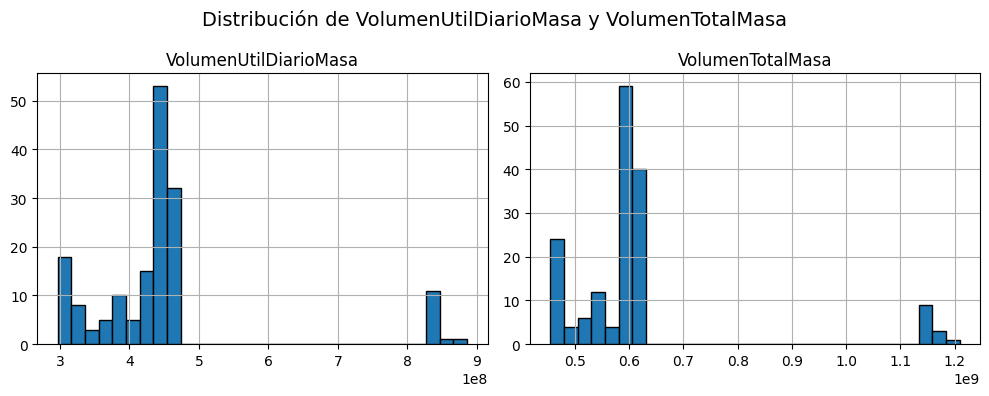

In [23]:
import matplotlib.pyplot as plt

# Lista de variables a graficar
vars_plot = ['VolumenUtilDiarioMasa', 'VolumenTotalMasa']

# Crea los histogramas uno al lado del otro
df_hidraulica_avg[vars_plot].hist(
    bins=30,           # número de barras
    figsize=(10, 4),   # tamaño del gráfico
    edgecolor='black'  # bordes para mejor visibilidad
)

plt.suptitle('Distribución de VolumenUtilDiarioMasa y VolumenTotalMasa', fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.cluster import KMeans
import pandas as pd

# 1. Seleccionar la variable
X = df_hidraulica_avg[['VolumenUtilDiarioMasa']].values

# 2. Aplicar K-Means con 12 grupos
kmeans = KMeans(n_clusters=12, random_state=42)
df_hidraulica_avg['cluster'] = kmeans.fit_predict(X)

# 3. Reordenar los clusters según el valor medio (1 = menor, 12 = mayor)
cluster_means = (
    df_hidraulica_avg.groupby('cluster')['VolumenUtilDiarioMasa']
    .mean()
    .sort_values()
)
orden_map = {old: new + 1 for new, old in enumerate(cluster_means.index)}
df_hidraulica_avg['cluster'] = df_hidraulica_avg['cluster'].map(orden_map)

# 4. Verificar
print(df_hidraulica_avg[['Fecha', 'VolumenUtilDiarioMasa', 'cluster']].head())

# 5. Resumen por cluster
resumen = (
    df_hidraulica_avg.groupby('cluster')['VolumenUtilDiarioMasa']
    .agg(['count', 'mean', 'min', 'max'])
    .sort_index()
)
print(resumen)


        Fecha  VolumenUtilDiarioMasa  cluster
0  2025-04-01           2.969186e+08        1
1  2025-04-02           2.970081e+08        1
2  2025-04-03           2.971947e+08        1
3  2025-04-04           2.981375e+08        1
4  2025-04-05           3.019760e+08        1
         count          mean           min           max
cluster                                                 
1           24  3.099078e+08  2.969186e+08  3.217660e+08
2            5  3.377511e+08  3.241564e+08  3.503973e+08
3            6  3.670548e+08  3.582817e+08  3.764841e+08
4           13  3.950024e+08  3.882780e+08  4.060557e+08
5           14  4.239925e+08  4.119788e+08  4.286237e+08
6           37  4.384967e+08  4.323997e+08  4.414406e+08
7           12  4.456888e+08  4.423426e+08  4.487055e+08
8           25  4.548213e+08  4.503221e+08  4.596065e+08
9           13  4.644893e+08  4.600609e+08  4.722815e+08
10           8  8.354724e+08  8.315556e+08  8.396919e+08
11           4  8.455813e+08  8.409993e+

In [25]:
df_hidraulica_avg

Fecha  VolumenUtilDiarioMasa  VolumenTotalMasa  cluster
0    2025-04-01           2.969186e+08      4.542842e+08        1
1    2025-04-02           2.970081e+08      4.544695e+08        1
2    2025-04-03           2.971947e+08      4.545602e+08        1
3    2025-04-04           2.981375e+08      4.564693e+08        1
4    2025-04-05           3.019760e+08      4.593416e+08        1
..          ...                    ...               ...      ...
157  2025-09-05           8.368711e+08      1.151515e+09       10
158  2025-09-06           8.368356e+08      1.151479e+09       10
159  2025-09-07           8.450015e+08      1.159645e+09       11
160  2025-09-08           8.504281e+08      1.165072e+09       11
161  2025-09-09           8.458963e+08      1.160540e+09       11

[162 rows x 4 columns]

In [26]:
df_hidraulica['Fecha'].min()

'2025-04-01'

# 2. Procesamiento de datos

In [27]:
df_oferta[['FechaHora', 'CodigoPlanta', 'Valor']]

FechaHora CodigoPlanta    Valor
0       2025-05-25 23:00:00         TEC1  1486.46
1       2025-05-25 22:00:00         TEC1  1486.46
2       2025-05-25 21:00:00         TEC1  1486.46
3       2025-05-25 20:00:00         TEC1  1486.46
4       2025-05-25 19:00:00         TEC1  1486.46
...                     ...          ...      ...
670603  2025-07-13 04:00:00         ZPA2   379.71
670604  2025-07-13 03:00:00         ZPA2   379.71
670605  2025-07-13 02:00:00         ZPA2   379.71
670606  2025-07-13 01:00:00         ZPA2   379.71
670607  2025-07-13 00:00:00         ZPA2   379.71

[670608 rows x 3 columns]

In [28]:
df_bolsa[['FechaHora', 'Valor']]

FechaHora   Valor
0      2025-06-01 00:00:00  193.75
1      2025-06-01 01:00:00  193.75
2      2025-06-01 02:00:00  193.75
3      2025-06-01 03:00:00  193.75
4      2025-06-01 04:00:00  193.75
...                    ...     ...
59443  2025-05-18 19:00:00  106.39
59444  2025-05-18 20:00:00  106.39
59445  2025-05-18 21:00:00  106.39
59446  2025-05-18 22:00:00  102.64
59447  2025-05-18 23:00:00  102.64

[59448 rows x 2 columns]

In [29]:
df_despacho_agg['daily_eq_demand']

0        8634480
1        8343930
2        8149800
3        8060810
4        8231010
          ...   
3883    11822380
3884    11697040
3885    11140860
3886    10420020
3887     9877640
Name: daily_eq_demand, Length: 3888, dtype: int64

In [30]:
df_capacity[['FechaHora','Valor', 'CodigoPlanta']]

FechaHora    Valor CodigoPlanta
0        2025-05-25 16:00:00   148.56         3ACC
1        2025-05-25 15:00:00  2706.61         3ACC
2        2025-05-25 14:00:00  3574.43         3ACC
3        2025-05-25 13:00:00  3642.49         3ACC
4        2025-05-25 12:00:00  5078.19         3ACC
...                      ...      ...          ...
2946659  2025-08-10 04:00:00  2825.03         VNTB
2946660  2025-08-10 03:00:00  2842.82         VNTB
2946661  2025-08-10 02:00:00  2855.33         VNTB
2946662  2025-08-10 01:00:00  2869.57         VNTB
2946663  2025-08-10 00:00:00  2897.92         VNTB

[2946664 rows x 3 columns]

In [31]:
# Renombrar columnas antes del merge
df_oferta_renamed = df_oferta[['FechaHora', 'CodigoPlanta', 'Valor']].rename(columns={'Valor': 'precio'})
df_capacity_renamed = df_capacity[['FechaHora','Valor', 'CodigoPlanta']].rename(columns={'Valor': 'cantidad'})

df_merged = df_oferta_renamed.merge(
    df_capacity_renamed,
    on=['FechaHora', 'CodigoPlanta'],
    how='left'
)

# Reemplazar NaN en cantidad por 0
df_merged['cantidad'] = df_merged['cantidad'].fillna(0)
df_merged = df_merged.drop_duplicates(subset=['FechaHora', 'CodigoPlanta'], keep='first')
df_merged


FechaHora CodigoPlanta   precio  cantidad
0        2025-05-25 23:00:00         TEC1  1486.46  213000.0
3        2025-05-25 22:00:00         TEC1  1486.46  213000.0
6        2025-05-25 21:00:00         TEC1  1486.46  213000.0
9        2025-05-25 20:00:00         TEC1  1486.46  213000.0
12       2025-05-25 19:00:00         TEC1  1486.46  213000.0
...                      ...          ...      ...       ...
1817655  2025-07-13 04:00:00         TGJ1   557.16       0.0
1817656  2025-07-13 03:00:00         TGJ1   557.16       0.0
1817657  2025-07-13 02:00:00         TGJ1   557.16       0.0
1817658  2025-07-13 01:00:00         TGJ1   557.16       0.0
1817659  2025-07-13 00:00:00         TGJ1   557.16       0.0

[307152 rows x 4 columns]

In [32]:
df_merged['Fecha'] = pd.to_datetime(df_merged['FechaHora']).dt.date

In [33]:
df_hidraulica_avg['Fecha'] = pd.to_datetime(df_hidraulica_avg['Fecha']).dt.date

Merges

In [34]:
df_final = pd.merge(
    df_merged,
    df_hidraulica_avg[['Fecha', 'cluster']],
    on='Fecha',
    how='inner'
)
df_final

FechaHora CodigoPlanta   precio  cantidad       Fecha  \
0       2025-05-25 23:00:00         TEC1  1486.46  213000.0  2025-05-25   
1       2025-05-25 22:00:00         TEC1  1486.46  213000.0  2025-05-25   
2       2025-05-25 21:00:00         TEC1  1486.46  213000.0  2025-05-25   
3       2025-05-25 20:00:00         TEC1  1486.46  213000.0  2025-05-25   
4       2025-05-25 19:00:00         TEC1  1486.46  213000.0  2025-05-25   
...                     ...          ...      ...       ...         ...   
307147  2025-07-13 04:00:00         TGJ1   557.16       0.0  2025-07-13   
307148  2025-07-13 03:00:00         TGJ1   557.16       0.0  2025-07-13   
307149  2025-07-13 02:00:00         TGJ1   557.16       0.0  2025-07-13   
307150  2025-07-13 01:00:00         TGJ1   557.16       0.0  2025-07-13   
307151  2025-07-13 00:00:00         TGJ1   557.16       0.0  2025-07-13   

        cluster  
0             5  
1             5  
2             5  
3             5  
4             5  
...         ...  
307147        9  
307148        9  
307149        9  
307150        9  
307151        9  

[307152 rows x 6 columns]

In [35]:
df_despacho[df_despacho['CodigoElementoGeneracion'] == 'TEC1']

FechaHora CodigoDuracion CodigoElementoGeneracion  Valor
45566    2025-04-24 00:00:00           PT1H                     TEC1      0
45942    2025-04-24 01:00:00           PT1H                     TEC1      0
46138    2025-04-24 02:00:00           PT1H                     TEC1      0
46468    2025-04-24 03:00:00           PT1H                     TEC1      0
46703    2025-04-24 04:00:00           PT1H                     TEC1      0
...                      ...            ...                      ...    ...
1263236  2025-04-05 17:00:00           PT1H                     TEC1      0
1263576  2025-04-05 19:00:00           PT1H                     TEC1      0
1263818  2025-04-05 20:00:00           PT1H                     TEC1      0
1264018  2025-04-05 21:00:00           PT1H                     TEC1      0
1264298  2025-04-05 22:00:00           PT1H                     TEC1      0

[744 rows x 4 columns]

In [36]:
#verificacion
df_despacho[
    (df_despacho['CodigoElementoGeneracion'] == 'TEC1') &
    (df_despacho['FechaHora'].str.contains('2025-05-25'))
]

#no aparece, en realidad no despacha porque es que está por encima del precio de cierre, muy por encima entonces no se toma

Empty DataFrame
Columns: [FechaHora, CodigoDuracion, CodigoElementoGeneracion, Valor]
Index: []

In [37]:
#transado en el cierre

df_transado = pd.merge(
    df_bolsa[['FechaHora', 'Valor']],
    df_despacho_agg[['FechaHora', 'daily_eq_demand']],
    on='FechaHora',
    how='left'
)
df_transado = df_transado.rename(columns={
    'Valor': 'precio',
    'daily_eq_demand': 'demanda'
})

df_transado

FechaHora  precio   demanda
0      2025-06-01 00:00:00  193.75   8415370
1      2025-06-01 01:00:00  193.75   8105260
2      2025-06-01 02:00:00  193.75   7921330
3      2025-06-01 03:00:00  193.75   7750260
4      2025-06-01 04:00:00  193.75   7630180
...                    ...     ...       ...
59443  2025-05-18 19:00:00  106.39  10162760
59444  2025-05-18 20:00:00  106.39  10115880
59445  2025-05-18 21:00:00  106.39   9423060
59446  2025-05-18 22:00:00  102.64   8997340
59447  2025-05-18 23:00:00  102.64   8515830

[59448 rows x 3 columns]

In [38]:
df_final=df_final[df_final['cantidad']!=0]

In [39]:
# Asegurarse de que las columnas 'FechaHora' sean datetime
df_final['FechaHora'] = pd.to_datetime(df_final['FechaHora'])
df_transado['FechaHora'] = pd.to_datetime(df_transado['FechaHora'])

# Filtrar df_transado: solo fechas que aparecen en df_final
df_transado_filtrado = df_transado[df_transado['FechaHora'].isin(df_final['FechaHora'])]

# Filtrar df_final: solo fechas que aparecen en df_transado_filtrado
df_final_filtrado = df_final[df_final['FechaHora'].isin(df_transado_filtrado['FechaHora'])]


C:\Users\HP\AppData\Local\Temp\ipykernel_14252\3090825170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FechaHora'] = pd.to_datetime(df_final['FechaHora'])


# 3. Estimation 

logica: miro una fecha y un bidder, miro sus competidores, busco dias similares y comportamiento de sus competidores. Despues miro M muestra boostratps, como escenarios y veo el equilibrio, de como juegan sus competidores. Después miro, en cada una de esas M muestras bootstratps para ese dia hallo la derivada, despues hago el promedio sobre todas las muestras bootstratps. Depues hago la suma sobre todas las horas y eso va a ser el phi, con los otros terminos

### 7. Correr sobre toda la base

In [40]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed
from scipy.stats import norm


# ----------------------------------------------------
# FUNCIONES AUXILIARES
# ----------------------------------------------------

def get_cluster_it(df, fecha, firma):
    """Devuelve el cluster correspondiente a una firma i en una FechaHora t."""
    row = df.loc[
        (df['FechaHora'] == fecha) & (df['CodigoPlanta'] == firma),
        'cluster'
    ]
    return row.iloc[0] if not row.empty else np.nan


def get_competitors(df, fecha, firma):
    """Devuelve los competidores (otros CodigoPlanta) presentes en la misma FechaHora."""
    df_day = df[df['FechaHora'] == fecha]
    competitors = df_day.loc[df_day['CodigoPlanta'] != firma, 'CodigoPlanta'].unique().tolist()
    return competitors


def get_similar_days_by_cluster(df, fecha, firma, max_obs=20):
    """
    Busca días similares según el cluster del competidor k != i.
    Para cada competidor en t, extrae observaciones con el mismo cluster que i.
    """
    cluster_it = get_cluster_it(df, fecha, firma)
    competitors = get_competitors(df, fecha, firma)
    similar_obs = []

    for comp in competitors:
        df_comp_similar = df[
            (df['CodigoPlanta'] == comp) & (df['cluster'] == cluster_it)
        ].copy()

        if len(df_comp_similar) > max_obs:
            df_comp_similar = df_comp_similar.sample(n=max_obs, random_state=42)

        df_comp_similar['competidor_de'] = firma
        df_comp_similar['fecha_base'] = fecha
        similar_obs.append(df_comp_similar)

    return pd.concat(similar_obs, ignore_index=True) if similar_obs else pd.DataFrame()


def bootstrap_by_planta(df, M, seed=None):
    """Genera M muestras bootstrap independientes seleccionando 1 observación por planta."""
    if seed is not None:
        np.random.seed(seed)

    plantas = df['CodigoPlanta'].unique()
    bootstrap_samples = []

    for m in range(M):
        muestras = []
        for p in plantas:
            df_p = df[df['CodigoPlanta'] == p]
            if len(df_p) == 0:
                continue
            muestra = df_p.sample(1, replace=True)
            muestra['bootstrap_id'] = m + 1
            muestras.append(muestra)
        sample_df = pd.concat(muestras).reset_index(drop=True)
        bootstrap_samples.append(sample_df)

    return bootstrap_samples


def compute_equilibrium(df_offers, df_transado_date):
    """
    Encuentra el precio y cantidad de equilibrio (p*, q*) para un conjunto de ofertas.
    df_transado_date debe contener la demanda para la FechaHora actual.
    """
    fecha = df_offers['FechaHora'].iloc[0]
    demanda_row = df_transado_date.loc[df_transado_date['FechaHora'] == fecha, 'demanda']

    if demanda_row.empty:
        return np.nan, np.nan

    demand = demanda_row.iloc[0]
    df_sorted = df_offers.sort_values('precio').copy()
    df_sorted['acum'] = df_sorted['cantidad'].cumsum()

    clearing_offers = df_sorted[df_sorted['acum'] >= demand]
    if clearing_offers.empty:
        return np.nan, demand

    p_star = clearing_offers.iloc[0]['precio']
    q_star = demand
    return p_star, q_star

# ----------------------------------------------------
# KERNELS
# ----------------------------------------------------
# --- 1. Definiciones del Kernel ---

def gaussian_kernel(u):
    """Kernel Gaussiano estándar (PDF de N(0, 1))."""
    return norm.pdf(u)

def gaussian_kernel_prime(u):
    """Derivada del Kernel Gaussiano: κ'(u) = -u * κ(u)."""
    return -u * gaussian_kernel(u)

# --- 2. Estimación de la Demanda Residual (RD(p)) ---

# Asumo que tienes una función para obtener pos_it, o que se añade como argumento

def kernel_expectation(df, p_ht, gamma, firma_i):
    """
    Calcula la Curva de Demanda Residual Neta (RD(p) - pos_it) para la firma i.
    """
    pos_it=0
    df_others = df[df['CodigoPlanta'] != firma_i]

    if df_others.empty:
        # RD(p) = 0 si no hay rivales
        return 0.0 - pos_it

    u_others = (p_ht - df_others["precio"]) / gamma
    weights_others = gaussian_kernel(u_others) 
    
    numerator = (df_others["cantidad"] * weights_others).sum()
    denominator = weights_others.sum()
    
    if denominator == 0:
        RD_p = 0.0
    else:
        RD_p = numerator / denominator

    # 2. Restar la posición pre-existente al valor esperado de la cantidad asignada
    RD_neta = RD_p - pos_it
    
    return RD_neta

# --- 3. Estimación de la Derivada de la Demanda Residual (RD'(p)) ---

def kernel_derivative(df, p_ht, gamma, firma_i):
    """
    Calcula la derivada de la Curva de Demanda Residual (RD'(p)) para la firma i en p_ht.
    Usa el Estimador de Suma Ponderada sobre *solo* los rivales.
    
    RD'(p) = (1/h) * Σ_{k≠i} Q_k * κ'(u_k)
    """
    
    df_others = df[df['CodigoPlanta'] != firma_i]

    if df_others.empty:
        return 0.0

    u_others = (p_ht - df_others["precio"]) / gamma
    
    weights_prime_others = gaussian_kernel_prime(u_others) # Derivada del kernel: κ'(u)
    
    dQ_residual = (1 / gamma) * (df_others["cantidad"] * weights_prime_others).sum()
    
    return dQ_residual

# ----------------------------------------------------
# PROMEDIO SOBRE BOOTSTRAPS
# ----------------------------------------------------

def average_numerador_denom(df_bootstrap_list, df_transado, fecha_hora_i_t, gamma, firma):
    """
    Promedia el numerador y denominador kernelizados sobre varias muestras bootstrap.
    Devuelve el promedio (numer, denom) y el último p*, q* observados.
    """
    if not df_bootstrap_list:
        return np.nan, np.nan, np.nan, np.nan

    suma_numer, suma_denom = 0.0, 0.0
    p_star_list, q_star_list = [], []
    valid_count = 0 

    df_demanda_actual = df_transado[df_transado['FechaHora'] == fecha_hora_i_t]
    if df_demanda_actual.empty:
        return np.nan, np.nan, np.nan, np.nan

    for df_sim in df_bootstrap_list:
        # 1. Obtener el precio de oferta de la firma i (b_it) en esta simulación
        df_firma = df_sim[(df_sim['CodigoPlanta'] == firma) & (df_sim['FechaHora'] == fecha_hora_i_t)]
        
        if df_firma.empty:
             continue
             
        b_it = df_firma['precio'].iloc[0] 
        
        # 2. Calcular el precio de cierre de la subasta (p*)
        p_star, q_star = compute_equilibrium(df_sim, df_demanda_actual)
        
        if np.isnan(p_star):
            continue

        # 3. CONDICIÓN: Solo promediar si el jugador i es marginal (p* == b_it)
        #if p_star == b_it: hice un back tab - valid count
        # Numerador: E[-it][Q_it | s, p_t = b_it] ≈ RD(b_it)
        numer = kernel_expectation(df_sim, b_it, gamma, firma)
        print(numer)
        # Denominador: E[-it][dQ_it/db_it | s, p_t = b_it] ≈ RD'(b_it)
        denom = kernel_derivative(df_sim, b_it, gamma, firma)
        print(denom)
        
        suma_numer += numer
        suma_denom += denom
        p_star_list.append(p_star)
        q_star_list.append(q_star)
        valid_count += 1

    if valid_count == 0:
        print('0000')
        return np.nan, np.nan, np.nan, np.nan

    avg_numer = suma_numer / valid_count
    avg_denom = suma_denom / valid_count
    
    # Promedio de p* y q* solo sobre las muestras válidas
    avg_p = np.mean(p_star_list)
    avg_q = np.mean(q_star_list)

    return avg_numer, avg_denom, avg_p, avg_q


# ----------------------------------------------------
# FUNCIÓN PRINCIPAL
# ----------------------------------------------------

import numpy as np
import pandas as pd
from tqdm import tqdm
def calcular_avg_Q_y_dQdb(df, df_transado, gamma, M=5, seed=123):
    """
    Aplica average_numerador_denom fila por fila.
    Retorna df con columnas EQpos (RD) y EdQb (RD') y además p* y Q(p*).
    """
    np.random.seed(seed)

    EQ_results = []     # Q resid (numerador)
    dQdb_results = []   # dQ/db resid (denominador)
    p_equil_list = []   # p*
    q_equil_list = []   # Q(p*)

    for idx, row in tqdm(df.iterrows(), total=len(df)):
        fecha = row['FechaHora']
        firma = row['CodigoPlanta']

        print("\n====================================================")
        print(f"[{idx}] Planta={firma}, Fecha={fecha}")
        print("====================================================")

        # 1) Días similares
        df_similares = get_similar_days_by_cluster(df, fecha, firma)

        # 2) Bootstraps
        df_bootstrap_list = bootstrap_by_planta(df_similares, M=M, seed=seed)
        
        # 3) calcular RD(b_it) y RD'(b_it) promedio sobre M
        avg_numer, avg_denom, avg_p, avg_q = average_numerador_denom(
            df_bootstrap_list,
            df_transado,
            fecha,
            gamma,
            firma
        )

        # 4) Guardar resultados (sin volver a promediar)
        EQ_results.append(avg_numer)
        dQdb_results.append(avg_denom)
        p_equil_list.append(avg_p)
        q_equil_list.append(avg_q)

        print(f" → RD(b_it)   = EQpos = {avg_numer:.4f}")
        print(f" → RD'(b_it)  = EdQb  = {avg_denom:.4f}")
        print(f" → p* promedio = {avg_p:.4f}, Q(p*) promedio = {avg_q:.4f}")
        print("----------------------------------------------------")

    df['EQpos'] = EQ_results
    df['EdQb'] = dQdb_results
    df['p_star_avg'] = p_equil_list
    df['q_star_avg'] = q_equil_list

    return df


# ejemplooo- no correr


In [250]:
# --- 4. Ejemplo de Aplicación (Tus Datos) ---
data_m1 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [1, 1, 1]
}
data_m2 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [1.0, 5.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [2, 2, 2]
}
df_m1 = pd.DataFrame(data_m1)
df_m2 = pd.DataFrame(data_m2)

P_C = 3.0
H_GAMMA = 1.0 
FIRMA_C = 'C'

# Cálculo M=1
rd_m1 = kernel_expectation(df_m1, P_C, H_GAMMA, FIRMA_C)
rd_prime_m1 = kernel_derivative(df_m1, P_C, H_GAMMA, FIRMA_C)

# Cálculo M=2
rd_m2 = kernel_expectation(df_m2, P_C, H_GAMMA, FIRMA_C)
rd_prime_m2 = kernel_derivative(df_m2, P_C, H_GAMMA, FIRMA_C)

# Promedio Final
E_RD = (rd_m1 + rd_m2) / 2
E_RD_PRIME = (rd_prime_m1 + rd_prime_m2) / 2

# --- Impresión de Resultados ---
print(f"E[RD(3)] (Promedio): {E_RD:.3f} (Verifica 9.500)")
print(f"E[RD'(3)] (Promedio): {E_RD_PRIME:.3f} (Verifica -0.175)")

E[RD(3)] (Promedio): 9.500 (Verifica 9.500)
E[RD'(3)] (Promedio): -0.175 (Verifica -0.175)


In [251]:
import pandas as pd
import numpy as np
from typing import List

# --- DataFrame Transado (df_transado) ---

data_transado = {
    'FechaHora': [1],
    'demanda': [11]
}

df_transado = pd.DataFrame(data_transado)
df_transado['FechaHora'] = df_transado['FechaHora'].astype(int)

print("--- df_transado ---")
print(df_transado)

# --- Datos de Ofertas (Fuente) ---

data = {
    'FechaHora': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'CodigoPlanta': ['A', 'B', 'C', 'A', 'B', 'C','A', 'B', 'C'],
    'precio': [2.0, 4.0, 3.0, 1.0, 5.0, 3.0,2.0, 4.0, 3.0],
    'cantidad': [10.0, 9.0, 12.0, 10.0, 9.0, 12.0,11.0, 9.0, 12.0]
}
df_fuente = pd.DataFrame(data)
df_fuente['FechaHora'] = df_fuente['FechaHora'].astype(int)

# 2. Generar las dos muestras solicitadas (M=2)
df_bootstrap_list: List[pd.DataFrame] = []

# --- MUESTRA 1: (A=Precio 2.0, B=Precio 4.0) ---
# Usando los índices 0 y 1 del DataFrame fuente
muestras_m1 = df_fuente.iloc[[0, 1, 2]].copy()
muestras_m1['bootstrap_id'] = 1
df_bootstrap_list.append(muestras_m1.reset_index(drop=True))

# --- MUESTRA 2: (A=Precio 1.0, B=Precio 5.0) ---
# Usando los índices 2 y 3 del DataFrame fuente
muestras_m2 = df_fuente.iloc[[ 3,4,5]].copy()
muestras_m2['bootstrap_id'] = 2
df_bootstrap_list.append(muestras_m2.reset_index(drop=True))

# --- MUESTRA 3: (A=Precio 1.0, B=Precio 5.0) ---
# Usando los índices 2 y 3 del DataFrame fuente
muestras_m3 = df_fuente.iloc[[6,7,8]].copy()
muestras_m3['bootstrap_id'] = 3
df_bootstrap_list.append(muestras_m3.reset_index(drop=True))


# --- Resultado (Impresión) ---
print("="*50)
print("Lista de DataFrames Bootstrap (M=3, Realizaciones):")
print("="*50)

for i, df_bs in enumerate(df_bootstrap_list):
    print(f"\n--- Bootstrap M={i+1} ---")
    print(df_bs)

--- df_transado ---
   FechaHora  demanda
0          1       11
Lista de DataFrames Bootstrap (M=3, Realizaciones):

--- Bootstrap M=1 ---
   FechaHora CodigoPlanta  precio  cantidad  bootstrap_id
0          1            A     2.0      10.0             1
1          1            B     4.0       9.0             1
2          1            C     3.0      12.0             1

--- Bootstrap M=2 ---
   FechaHora CodigoPlanta  precio  cantidad  bootstrap_id
0          1            A     1.0      10.0             2
1          1            B     5.0       9.0             2
2          1            C     3.0      12.0             2

--- Bootstrap M=3 ---
   FechaHora CodigoPlanta  precio  cantidad  bootstrap_id
0          1            A     2.0      11.0             3
1          1            B     4.0       9.0             3
2          1            C     3.0      12.0             3


In [252]:
average_numerador_denom(df_bootstrap_list, 1, gamma, 'C')
# num, den, precio cierre promedio, transado demanda

(9.666666666666666, -0.27796470219460184, 2.6666666666666665, 11.0)

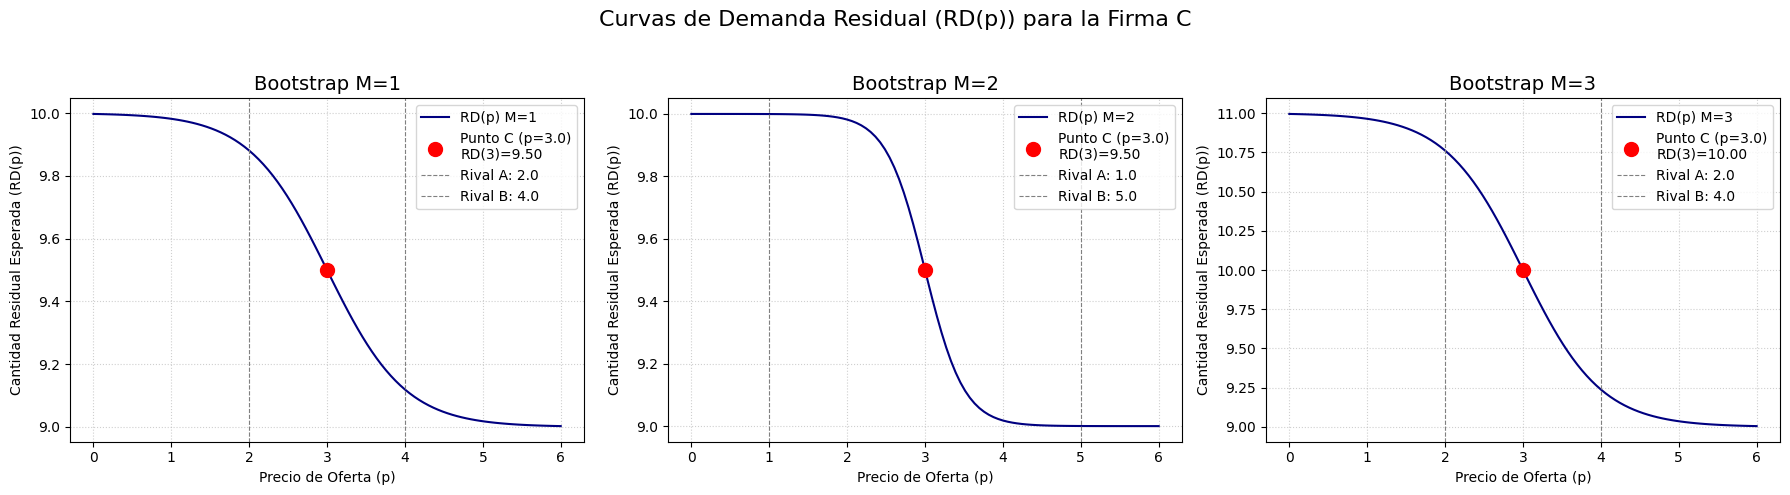

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- 1. Definiciones del Kernel (Requeridas para el cálculo) ---

def gaussian_kernel(u):
    return norm.pdf(u)

def kernel_demand_residual(df, p_ht, gamma, firma_i):
    """Calcula la Curva de Demanda Residual (RD(p)) para la firma i en p_ht."""
    df_others = df[df['CodigoPlanta'] != firma_i]

    if df_others.empty:
        return 0.0

    u_others = (p_ht - df_others["precio"]) / gamma
    weights_others = gaussian_kernel(u_others)
    
    numerator = (df_others["cantidad"] * weights_others).sum()
    denominator = weights_others.sum()
    
    if denominator == 0:
        return 0.0
    
    return numerator / denominator

# --- 2. Preparación de Datos ---

# Asumo que las variables globales P_C, H_GAMMA, FIRMA_C y las funciones están disponibles

data_m1 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [1, 1, 1]
}
data_m2 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [1.0, 5.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [2, 2, 2]
}
data_m3 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [11.0, 9.0, 12.0], 'bootstrap_id': [3, 3, 3]
}
df_m1 = pd.DataFrame(data_m1)
df_m2 = pd.DataFrame(data_m2)
df_m3 = pd.DataFrame(data_m3)

data_frames = {'M=1': df_m1, 'M=2': df_m2, 'M=3': df_m3}

# Parámetros comunes
FIRMA_C = 'C'
H_GAMMA = 1.0 
P_C = 3.0

# Rango de precios para graficar (desde el precio más bajo hasta el más alto observado)
min_p = min(df_m1['precio'].min(), df_m2['precio'].min(), df_m3['precio'].min())
max_p = max(df_m1['precio'].max(), df_m2['precio'].max(), df_m3['precio'].max())
P_GRID = np.linspace(min_p - 1.0, max_p + 1.0, 100) # Rango expandido

# --- 3. Generación de las Curvas y Gráficos ---

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Curvas de Demanda Residual (RD(p)) para la Firma C', fontsize=16)

for ax, (label, df) in zip(axes, data_frames.items()):
    
    # 3.1. Calcular RD(p) en cada punto de la grilla de precios
    RD_CURVE = [kernel_demand_residual(df, p, H_GAMMA, FIRMA_C) for p in P_GRID]
    
    # 3.2. Graficar la curva
    ax.plot(P_GRID, RD_CURVE, label=f'RD(p) {label}', color='navy')
    
    # 3.3. Marcar el punto de interés (p=3.0) y la cantidad residual estimada
    RD_AT_3 = kernel_demand_residual(df, P_C, H_GAMMA, FIRMA_C)
    ax.scatter(P_C, RD_AT_3, color='red', s=100, zorder=5, 
               label=f'Punto C (p=3.0)\nRD(3)={RD_AT_3:.2f}')
    
    # 3.4. Marcar las ofertas de los rivales (para contexto)
    df_others = df[df['CodigoPlanta'] != FIRMA_C]
    for _, row in df_others.iterrows():
        ax.axvline(x=row['precio'], color='gray', linestyle='--', linewidth=0.8, 
                   label=f"Rival {row['CodigoPlanta']}: {row['precio']:.1f}")

    # 3.5. Configuración del Gráfico
    ax.set_title(f'Bootstrap {label}', fontsize=14)
    ax.set_xlabel('Precio de Oferta (p)')
    ax.set_ylabel('Cantidad Residual Esperada (RD(p))')
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

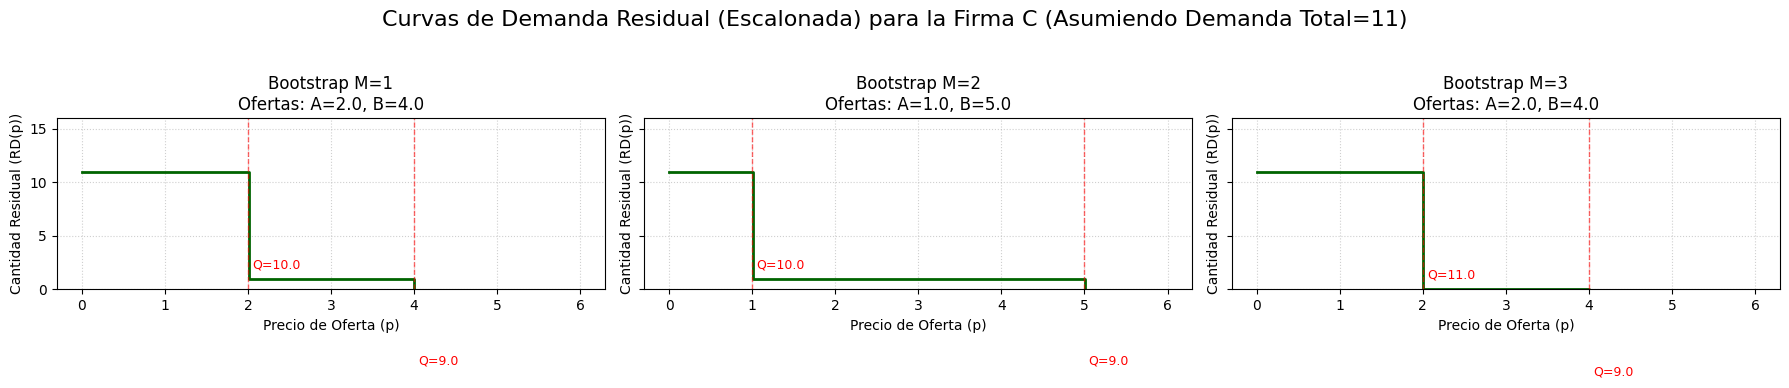

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Constante de Demanda de Mercado (Asunción) ---
# Necesitamos asumir una Demanda de Mercado (D(p)) alta y constante para visualizar la RD(p)
Q_MARKET_MAX = 11 

# --- 2. Definición de la Demanda Residual Escalonada ---

def step_demand_residual(df, p, firma_i, q_market):
    """
    Calcula la Demanda Residual Escalonada (No Suavizada)
    RD(p) = Q_MARKET_MAX - Suma de la cantidad ofrecida por rivales más baratos que p.
    """
    df_others = df[df['CodigoPlanta'] != firma_i].copy()
    
    # 1. Cantidad total de rivales ofrecida a un precio MENOR o IGUAL a p
    # Esto es S_{-i}(p)
    cantidad_rivales_despejada = df_others[df_others['precio'] <= p]['cantidad'].sum()
    
    # 2. RD(p) = D(p) - S_{-i}(p)
    return q_market - cantidad_rivales_despejada

# --- 3. Preparación de Datos (Se mantiene igual) ---

data_m1 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [1, 1, 1]
}
data_m2 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [1.0, 5.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [2, 2, 2]
}
data_m3 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [11.0, 9.0, 12.0], 'bootstrap_id': [3, 3, 3]
}
df_m1 = pd.DataFrame(data_m1)
df_m2 = pd.DataFrame(data_m2)
df_m3 = pd.DataFrame(data_m3)

data_frames = {'M=1': df_m1, 'M=2': df_m2, 'M=3': df_m3}

# Parámetros comunes
FIRMA_C = 'C'
P_C = 3.0

# Rango de precios para graficar (Ajustado a los precios relevantes)
P_GRID = np.linspace(0.0, 6.0, 500) 

# --- 4. Generación de las Curvas y Gráficos ---

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle(f'Curvas de Demanda Residual (Escalonada) para la Firma C (Asumiendo Demanda Total={Q_MARKET_MAX})', fontsize=16)

for ax, (label, df) in zip(axes, data_frames.items()):
    
    # 4.1. Calcular RD(p) en cada punto de la grilla de precios
    RD_CURVE = [step_demand_residual(df, p, FIRMA_C, Q_MARKET_MAX) for p in P_GRID]
    
    # 4.2. Graficar la curva (usando 'step' para mostrar los pedazos)
    ax.step(P_GRID, RD_CURVE, where='post', label=f'RD(p) {label}', color='darkgreen', linewidth=2.0)
    
    # 4.3. Marcar las ofertas de los rivales (los puntos de salto)
    df_others = df[df['CodigoPlanta'] != FIRMA_C]
    rival_offers = df_others.sort_values('precio')
    
    for _, row in rival_offers.iterrows():
        # Marcar los puntos donde ocurren los saltos (precios de oferta rival)
        ax.axvline(x=row['precio'], color='red', linestyle='--', linewidth=1.0, alpha=0.6)
        
        # Etiquetar el salto
        current_rd = step_demand_residual(df, row['precio'], FIRMA_C, Q_MARKET_MAX)
        ax.text(row['precio'] + 0.05, current_rd + 1, f"Q={row['cantidad']}", 
                fontsize=9, color='red')

    # 4.4. Configuración del Gráfico
    ax.set_title(f'Bootstrap {label}\nOfertas: A={df_others.iloc[0]["precio"]}, B={df_others.iloc[1]["precio"]}', fontsize=12)
    ax.set_xlabel('Precio de Oferta (p)')
    ax.set_ylabel('Cantidad Residual (RD(p))')
    ax.set_ylim(0, Q_MARKET_MAX + 5)
    ax.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

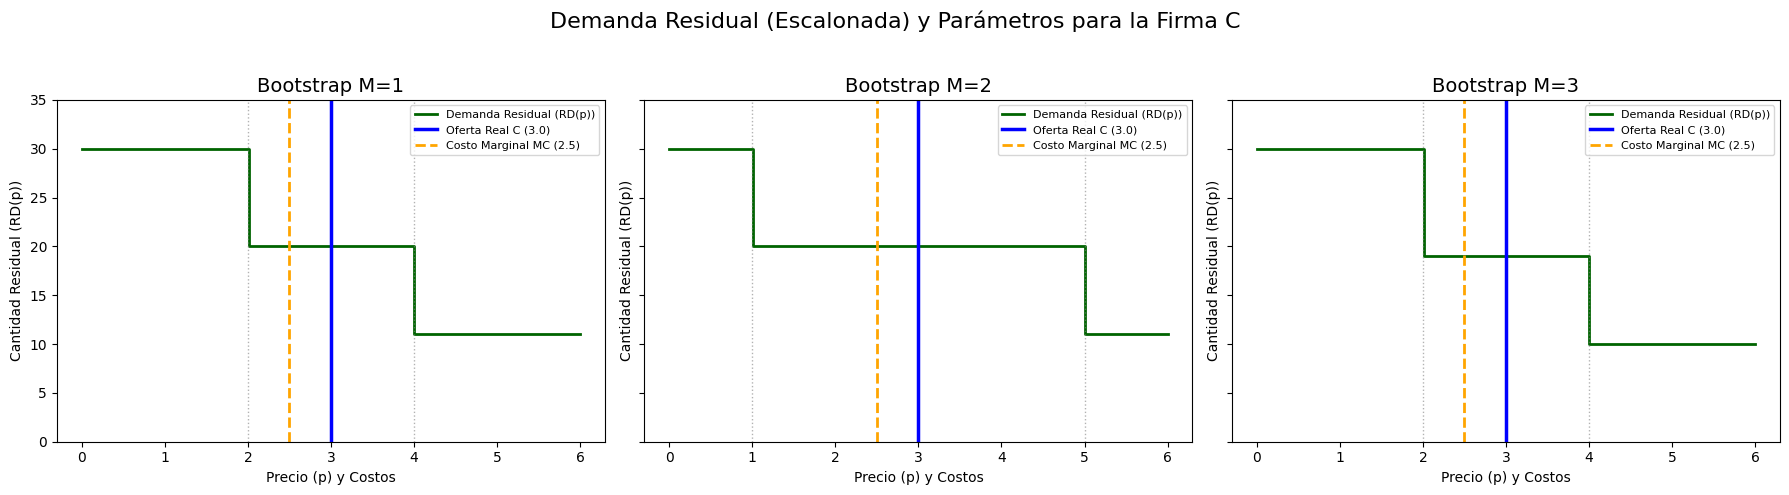

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Constantes y Parámetros ---
Q_MARKET_MAX = 30.0 
FIRMA_C = 'C'
P_C = 3.0 # Oferta Real (Actual Bidcurve)
MC_C = 2.5 # Costo Marginal Asumido (MC curve)

# --- 2. Definición de la Demanda Residual Escalonada ---

def step_demand_residual(df, p, firma_i, q_market):
    """
    Calcula la Demanda Residual Escalonada (No Suavizada)
    RD(p) = Q_MARKET_MAX - Suma de la cantidad ofrecida por rivales más baratos que p.
    """
    df_others = df[df['CodigoPlanta'] != firma_i].copy()
    
    # Cantidad total de rivales ofrecida a un precio MENOR o IGUAL a p
    cantidad_rivales_despejada = df_others[df_others['precio'] <= p]['cantidad'].sum()
    
    return q_market - cantidad_rivales_despejada

# --- 3. Preparación de Datos ---
data_m1 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [1, 1, 1]
}
data_m2 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [1.0, 5.0, 3.0], 'cantidad': [10.0, 9.0, 12.0], 'bootstrap_id': [2, 2, 2]
}
data_m3 = {
    'FechaHora': [1, 1, 1], 'CodigoPlanta': ['A', 'B', 'C'], 
    'precio': [2.0, 4.0, 3.0], 'cantidad': [11.0, 9.0, 12.0], 'bootstrap_id': [3, 3, 3]
}
df_m1 = pd.DataFrame(data_m1)
df_m2 = pd.DataFrame(data_m2)
df_m3 = pd.DataFrame(data_m3)

data_frames = {'M=1': df_m1, 'M=2': df_m2, 'M=3': df_m3}
P_GRID = np.linspace(0.0, 6.0, 500) 

# --- 4. Generación de las Curvas y Gráficos ---

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle(f'Demanda Residual (Escalonada) y Parámetros para la Firma C', fontsize=16)

for ax, (label, df) in zip(axes, data_frames.items()):
    
    # 4.1. Calcular RD(p)
    RD_CURVE = [step_demand_residual(df, p, FIRMA_C, Q_MARKET_MAX) for p in P_GRID]
    
    # 4.2. Graficar la curva escalonada
    ax.step(P_GRID, RD_CURVE, where='post', label=f'Demanda Residual (RD(p))', color='darkgreen', linewidth=2.0)
    
    # 4.3. OFERTA REAL (Actual Bidcurve): Línea vertical en el precio ofertado
    ax.axvline(x=P_C, color='blue', linestyle='-', linewidth=2.5, label='Oferta Real C (3.0)')
    
    # 4.4. COSTO MARGINAL (MC curve): Línea vertical en el costo asumido
    ax.axvline(x=MC_C, color='orange', linestyle='--', linewidth=2.0, label=f'Costo Marginal MC ({MC_C})')
    
    # 4.5. OFERTA ÓPTIMA EX-POST: En este modelo, el Mark-up es la diferencia (P_C - MC_C).
    # Como no usamos la derivada RD'(p) de la curva escalonada, simplemente marcamos el precio y costo.
    # El valor óptimo ex-post es teóricamente donde la curva de Ingreso Marginal cruza al MC.
    
    # 4.6. Marcar las ofertas de los rivales (los puntos de salto)
    df_others = df[df['CodigoPlanta'] != FIRMA_C]
    df_others = df_others.sort_values('precio')
    
    for _, row in df_others.iterrows():
        # Marcar los puntos donde ocurren los saltos (precios de oferta rival)
        ax.axvline(x=row['precio'], color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
        
    # 4.7. Configuración del Gráfico
    ax.set_title(f'Bootstrap {label}', fontsize=14)
    ax.set_xlabel('Precio (p) y Costos')
    ax.set_ylabel('Cantidad Residual (RD(p))')
    ax.set_ylim(0, Q_MARKET_MAX + 5)
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Con submuestra

In [41]:
df_transado = df_transado.drop_duplicates(subset=['FechaHora'], keep='first').reset_index(drop=True)


In [42]:
df_transado

FechaHora  precio   demanda
0    2025-06-01 00:00:00  193.75   8415370
1    2025-06-01 01:00:00  193.75   8105260
2    2025-06-01 02:00:00  193.75   7921330
3    2025-06-01 03:00:00  193.75   7750260
4    2025-06-01 04:00:00  193.75   7630180
...                  ...     ...       ...
3883 2025-05-18 19:00:00  104.00  10162760
3884 2025-05-18 20:00:00  104.00  10115880
3885 2025-05-18 21:00:00  104.00   9423060
3886 2025-05-18 22:00:00  100.25   8997340
3887 2025-05-18 23:00:00  100.25   8515830

[3888 rows x 3 columns]

In [43]:

# Filtrar solo filas del 25 de mayo de cualquier año o específico 2025
df_filtrado = df_final[
    (df_final['FechaHora'].dt.year == 2025) &
    (df_final['FechaHora'].dt.month == 5) &
    (df_final['FechaHora'].dt.day >= 5) &
    (df_final['FechaHora'].dt.day <= 6)
]


In [44]:
df_filtrado = df_filtrado.sort_values(
    by=['CodigoPlanta', 'FechaHora'], 
    ascending=[True, True]
).reset_index(drop=True)



In [47]:
df_filtrado

FechaHora CodigoPlanta  precio  cantidad       Fecha  cluster  \
0    2025-05-05 00:00:00         2QEK  102.64   35000.0  2025-05-05        3   
1    2025-05-05 01:00:00         2QEK  102.64   35000.0  2025-05-05        3   
2    2025-05-05 02:00:00         2QEK  102.64   35000.0  2025-05-05        3   
3    2025-05-05 03:00:00         2QEK  102.64   35000.0  2025-05-05        3   
4    2025-05-05 04:00:00         2QEK  102.64   35000.0  2025-05-05        3   
...                  ...          ...     ...       ...         ...      ...   
3136 2025-05-06 19:00:00         ZPA5  339.39   63000.0  2025-05-06        9   
3137 2025-05-06 20:00:00         ZPA5  339.39   63000.0  2025-05-06        9   
3138 2025-05-06 21:00:00         ZPA5  339.39   63000.0  2025-05-06        9   
3139 2025-05-06 22:00:00         ZPA5  339.39   63000.0  2025-05-06        9   
3140 2025-05-06 23:00:00         ZPA5  339.39   63000.0  2025-05-06        9   

      EQpos  EdQb  p_star_avg  q_star_avg  
0       NaN   NaN         NaN         NaN  
1       NaN   NaN         NaN         NaN  
2       NaN   NaN         NaN         NaN  
3       NaN   NaN         NaN         NaN  
4       NaN   NaN         NaN         NaN  
...     ...   ...         ...         ...  
3136    NaN   NaN         NaN         NaN  
3137    NaN   NaN         NaN         NaN  
3138    NaN   NaN         NaN         NaN  
3139    NaN   NaN         NaN         NaN  
3140    NaN   NaN         NaN         NaN  

[3141 rows x 10 columns]

### Crear carpeta

In [46]:
df_result = calcular_avg_Q_y_dQdb(
    df=df_filtrado,
    df_transado=df_transado,
    gamma=0.05,
    M=1,
    seed=42  # Muestra prints solo para las 10 primeras observaciones
)


  0%|                                                                                         | 0/3141 [00:00<?, ?it/s]


[0] Planta=2QEK, Fecha=2025-05-05 00:00:00


  0%|                                                                                 | 1/3141 [00:00<16:00,  3.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1] Planta=2QEK, Fecha=2025-05-05 01:00:00


  0%|                                                                                 | 2/3141 [00:00<15:09,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2] Planta=2QEK, Fecha=2025-05-05 02:00:00


  0%|                                                                                 | 3/3141 [00:00<15:01,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3] Planta=2QEK, Fecha=2025-05-05 03:00:00


  0%|                                                                                 | 4/3141 [00:01<16:09,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[4] Planta=2QEK, Fecha=2025-05-05 04:00:00


  0%|▏                                                                                | 5/3141 [00:01<15:34,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[5] Planta=2QEK, Fecha=2025-05-05 05:00:00


  0%|▏                                                                                | 6/3141 [00:01<15:29,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[6] Planta=2QEK, Fecha=2025-05-05 06:00:00


  0%|▏                                                                                | 7/3141 [00:02<15:55,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[7] Planta=2QEK, Fecha=2025-05-05 07:00:00


  0%|▏                                                                                | 8/3141 [00:02<15:47,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[8] Planta=2QEK, Fecha=2025-05-05 08:00:00


  0%|▏                                                                                | 9/3141 [00:02<15:39,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[9] Planta=2QEK, Fecha=2025-05-05 09:00:00


  0%|▎                                                                               | 10/3141 [00:03<16:17,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[10] Planta=2QEK, Fecha=2025-05-05 10:00:00


  0%|▎                                                                               | 11/3141 [00:03<16:40,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[11] Planta=2QEK, Fecha=2025-05-05 11:00:00


  0%|▎                                                                               | 12/3141 [00:03<16:55,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[12] Planta=2QEK, Fecha=2025-05-05 20:00:00


  0%|▎                                                                               | 13/3141 [00:04<16:39,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[13] Planta=2QEK, Fecha=2025-05-05 21:00:00


  0%|▎                                                                               | 14/3141 [00:04<18:07,  2.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[14] Planta=2QEK, Fecha=2025-05-05 22:00:00


  0%|▍                                                                               | 15/3141 [00:04<17:36,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[15] Planta=2QEK, Fecha=2025-05-05 23:00:00


  1%|▍                                                                               | 16/3141 [00:05<16:46,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[16] Planta=2QEK, Fecha=2025-05-06 00:00:00


  1%|▍                                                                               | 17/3141 [00:05<16:41,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[17] Planta=2QEK, Fecha=2025-05-06 01:00:00


  1%|▍                                                                               | 18/3141 [00:05<17:23,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[18] Planta=2QEK, Fecha=2025-05-06 02:00:00


  1%|▍                                                                               | 19/3141 [00:06<18:29,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[19] Planta=2QEK, Fecha=2025-05-06 03:00:00


  1%|▌                                                                               | 20/3141 [00:06<18:31,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[20] Planta=2QEK, Fecha=2025-05-06 04:00:00


  1%|▌                                                                               | 21/3141 [00:06<18:36,  2.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[21] Planta=2QEK, Fecha=2025-05-06 05:00:00


  1%|▌                                                                               | 22/3141 [00:07<18:31,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[22] Planta=2QEK, Fecha=2025-05-06 06:00:00


  1%|▌                                                                               | 23/3141 [00:07<18:44,  2.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[23] Planta=2QEK, Fecha=2025-05-06 07:00:00


  1%|▌                                                                               | 24/3141 [00:07<18:43,  2.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[24] Planta=2QEK, Fecha=2025-05-06 08:00:00


  1%|▋                                                                               | 25/3141 [00:08<18:09,  2.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[25] Planta=2QEK, Fecha=2025-05-06 09:00:00


  1%|▋                                                                               | 26/3141 [00:08<18:03,  2.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[26] Planta=2QEK, Fecha=2025-05-06 10:00:00


  1%|▋                                                                               | 27/3141 [00:08<17:28,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[27] Planta=2QEK, Fecha=2025-05-06 11:00:00


  1%|▋                                                                               | 28/3141 [00:09<16:35,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[28] Planta=2QEK, Fecha=2025-05-06 12:00:00


  1%|▋                                                                               | 29/3141 [00:09<17:07,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[29] Planta=2QEK, Fecha=2025-05-06 13:00:00


  1%|▊                                                                               | 30/3141 [00:09<17:30,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[30] Planta=2QEK, Fecha=2025-05-06 14:00:00


  1%|▊                                                                               | 31/3141 [00:10<17:52,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[31] Planta=2QEK, Fecha=2025-05-06 15:00:00


  1%|▊                                                                               | 32/3141 [00:10<18:22,  2.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[32] Planta=2QEK, Fecha=2025-05-06 16:00:00


  1%|▊                                                                               | 33/3141 [00:11<19:06,  2.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[33] Planta=2QEK, Fecha=2025-05-06 17:00:00


  1%|▊                                                                               | 34/3141 [00:11<18:56,  2.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[34] Planta=2QEK, Fecha=2025-05-06 18:00:00


  1%|▉                                                                               | 35/3141 [00:11<18:44,  2.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[35] Planta=2QEK, Fecha=2025-05-06 19:00:00


  1%|▉                                                                               | 36/3141 [00:12<18:27,  2.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[36] Planta=2QEK, Fecha=2025-05-06 20:00:00


  1%|▉                                                                               | 37/3141 [00:12<18:54,  2.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[37] Planta=2QEK, Fecha=2025-05-06 21:00:00


  1%|▉                                                                               | 38/3141 [00:12<18:11,  2.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[38] Planta=2QEK, Fecha=2025-05-06 22:00:00


  1%|▉                                                                               | 39/3141 [00:13<17:09,  3.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[39] Planta=2QEK, Fecha=2025-05-06 23:00:00


  1%|█                                                                               | 40/3141 [00:13<16:55,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[40] Planta=3DDT, Fecha=2025-05-05 06:00:00


  1%|█                                                                               | 41/3141 [00:13<17:20,  2.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[41] Planta=3DDT, Fecha=2025-05-05 07:00:00


  1%|█                                                                               | 42/3141 [00:14<17:16,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[42] Planta=3DDT, Fecha=2025-05-05 08:00:00


  1%|█                                                                               | 43/3141 [00:14<17:02,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[43] Planta=3DDT, Fecha=2025-05-05 09:00:00


  1%|█                                                                               | 44/3141 [00:14<16:59,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[44] Planta=3DDT, Fecha=2025-05-05 10:00:00


  1%|█▏                                                                              | 45/3141 [00:15<17:14,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[45] Planta=3DDT, Fecha=2025-05-05 11:00:00


  1%|█▏                                                                              | 46/3141 [00:15<17:00,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[46] Planta=3DDT, Fecha=2025-05-05 12:00:00


  1%|█▏                                                                              | 47/3141 [00:15<16:36,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[47] Planta=3DDT, Fecha=2025-05-05 13:00:00


  2%|█▏                                                                              | 48/3141 [00:16<17:45,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[48] Planta=3DDT, Fecha=2025-05-05 14:00:00


  2%|█▏                                                                              | 49/3141 [00:16<18:06,  2.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[49] Planta=3DDT, Fecha=2025-05-05 15:00:00


  2%|█▎                                                                              | 50/3141 [00:16<17:56,  2.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[50] Planta=3DDT, Fecha=2025-05-05 16:00:00


  2%|█▎                                                                              | 51/3141 [00:17<18:15,  2.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[51] Planta=3DDT, Fecha=2025-05-05 17:00:00


  2%|█▎                                                                              | 52/3141 [00:17<18:10,  2.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[52] Planta=3DDT, Fecha=2025-05-06 06:00:00


  2%|█▎                                                                              | 53/3141 [00:17<17:44,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[53] Planta=3DDT, Fecha=2025-05-06 07:00:00


  2%|█▍                                                                              | 54/3141 [00:18<17:10,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[54] Planta=3DDT, Fecha=2025-05-06 08:00:00


  2%|█▍                                                                              | 55/3141 [00:18<18:39,  2.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[55] Planta=3DDT, Fecha=2025-05-06 09:00:00


  2%|█▍                                                                              | 56/3141 [00:18<18:05,  2.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[56] Planta=3DDT, Fecha=2025-05-06 10:00:00


  2%|█▍                                                                              | 57/3141 [00:19<17:30,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[57] Planta=3DDT, Fecha=2025-05-06 11:00:00


  2%|█▍                                                                              | 58/3141 [00:19<17:01,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[58] Planta=3DDT, Fecha=2025-05-06 12:00:00


  2%|█▌                                                                              | 59/3141 [00:19<17:19,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[59] Planta=3DDT, Fecha=2025-05-06 13:00:00


  2%|█▌                                                                              | 60/3141 [00:20<17:57,  2.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[60] Planta=3DDT, Fecha=2025-05-06 14:00:00


  2%|█▌                                                                              | 61/3141 [00:20<17:21,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[61] Planta=3DDT, Fecha=2025-05-06 15:00:00


  2%|█▌                                                                              | 62/3141 [00:20<17:07,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[62] Planta=3DDT, Fecha=2025-05-06 16:00:00


  2%|█▌                                                                              | 63/3141 [00:21<16:45,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[63] Planta=3DDT, Fecha=2025-05-06 17:00:00


  2%|█▋                                                                              | 64/3141 [00:21<16:25,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[64] Planta=3ENA, Fecha=2025-05-05 00:00:00


  2%|█▋                                                                              | 65/3141 [00:21<16:33,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[65] Planta=3ENA, Fecha=2025-05-05 01:00:00


  2%|█▋                                                                              | 66/3141 [00:22<16:29,  3.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[66] Planta=3ENA, Fecha=2025-05-05 02:00:00


  2%|█▋                                                                              | 67/3141 [00:22<16:01,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[67] Planta=3ENA, Fecha=2025-05-05 03:00:00


  2%|█▋                                                                              | 68/3141 [00:22<15:41,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[68] Planta=3ENA, Fecha=2025-05-05 04:00:00


  2%|█▊                                                                              | 69/3141 [00:23<15:20,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[69] Planta=3ENA, Fecha=2025-05-05 05:00:00


  2%|█▊                                                                              | 70/3141 [00:23<15:25,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[70] Planta=3ENA, Fecha=2025-05-05 06:00:00


  2%|█▊                                                                              | 71/3141 [00:23<15:42,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[71] Planta=3ENA, Fecha=2025-05-05 07:00:00


  2%|█▊                                                                              | 72/3141 [00:23<16:09,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[72] Planta=3ENA, Fecha=2025-05-05 08:00:00


  2%|█▊                                                                              | 73/3141 [00:24<16:39,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[73] Planta=3ENA, Fecha=2025-05-05 09:00:00


  2%|█▉                                                                              | 74/3141 [00:24<16:48,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[74] Planta=3ENA, Fecha=2025-05-05 10:00:00


  2%|█▉                                                                              | 75/3141 [00:25<17:20,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[75] Planta=3ENA, Fecha=2025-05-05 11:00:00


  2%|█▉                                                                              | 76/3141 [00:25<17:23,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[76] Planta=3ENA, Fecha=2025-05-05 12:00:00


  2%|█▉                                                                              | 77/3141 [00:25<17:16,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[77] Planta=3ENA, Fecha=2025-05-05 13:00:00


  2%|█▉                                                                              | 78/3141 [00:26<17:13,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[78] Planta=3ENA, Fecha=2025-05-05 14:00:00


  3%|██                                                                              | 79/3141 [00:26<16:19,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[79] Planta=3ENA, Fecha=2025-05-05 15:00:00


  3%|██                                                                              | 80/3141 [00:26<16:26,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[80] Planta=3ENA, Fecha=2025-05-05 16:00:00


  3%|██                                                                              | 81/3141 [00:26<15:56,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[81] Planta=3ENA, Fecha=2025-05-05 17:00:00


  3%|██                                                                              | 82/3141 [00:27<16:08,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[82] Planta=3ENA, Fecha=2025-05-05 18:00:00


  3%|██                                                                              | 83/3141 [00:27<16:38,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[83] Planta=3ENA, Fecha=2025-05-05 19:00:00


  3%|██▏                                                                             | 84/3141 [00:27<16:35,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[84] Planta=3ENA, Fecha=2025-05-05 20:00:00


  3%|██▏                                                                             | 85/3141 [00:28<15:40,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[85] Planta=3ENA, Fecha=2025-05-05 21:00:00


  3%|██▏                                                                             | 86/3141 [00:28<15:44,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[86] Planta=3ENA, Fecha=2025-05-05 22:00:00


  3%|██▏                                                                             | 87/3141 [00:28<15:12,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[87] Planta=3ENA, Fecha=2025-05-05 23:00:00


  3%|██▏                                                                             | 88/3141 [00:29<15:29,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[88] Planta=3ENA, Fecha=2025-05-06 00:00:00


  3%|██▎                                                                             | 89/3141 [00:29<15:06,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[89] Planta=3ENA, Fecha=2025-05-06 01:00:00


  3%|██▎                                                                             | 90/3141 [00:29<14:31,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[90] Planta=3ENA, Fecha=2025-05-06 02:00:00


  3%|██▎                                                                             | 91/3141 [00:29<14:31,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[91] Planta=3ENA, Fecha=2025-05-06 03:00:00


  3%|██▎                                                                             | 92/3141 [00:30<14:21,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[92] Planta=3ENA, Fecha=2025-05-06 04:00:00


  3%|██▎                                                                             | 93/3141 [00:30<15:13,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[93] Planta=3ENA, Fecha=2025-05-06 05:00:00


  3%|██▍                                                                             | 94/3141 [00:30<15:51,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[94] Planta=3ENA, Fecha=2025-05-06 06:00:00


  3%|██▍                                                                             | 95/3141 [00:31<18:12,  2.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[95] Planta=3ENA, Fecha=2025-05-06 07:00:00


  3%|██▍                                                                             | 96/3141 [00:31<18:29,  2.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[96] Planta=3ENA, Fecha=2025-05-06 08:00:00


  3%|██▍                                                                             | 97/3141 [00:32<18:44,  2.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[97] Planta=3ENA, Fecha=2025-05-06 09:00:00


  3%|██▍                                                                             | 98/3141 [00:32<18:37,  2.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[98] Planta=3ENA, Fecha=2025-05-06 10:00:00


  3%|██▌                                                                             | 99/3141 [00:32<18:03,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[99] Planta=3ENA, Fecha=2025-05-06 11:00:00


  3%|██▌                                                                            | 100/3141 [00:33<17:24,  2.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[100] Planta=3ENA, Fecha=2025-05-06 12:00:00


  3%|██▌                                                                            | 101/3141 [00:33<17:06,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[101] Planta=3ENA, Fecha=2025-05-06 13:00:00


  3%|██▌                                                                            | 102/3141 [00:33<16:40,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[102] Planta=3ENA, Fecha=2025-05-06 14:00:00


  3%|██▌                                                                            | 103/3141 [00:34<16:34,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[103] Planta=3ENA, Fecha=2025-05-06 15:00:00


  3%|██▌                                                                            | 104/3141 [00:34<16:34,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[104] Planta=3ENA, Fecha=2025-05-06 16:00:00


  3%|██▋                                                                            | 105/3141 [00:34<16:10,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[105] Planta=3ENA, Fecha=2025-05-06 17:00:00


  3%|██▋                                                                            | 106/3141 [00:35<15:52,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[106] Planta=3ENA, Fecha=2025-05-06 18:00:00


  3%|██▋                                                                            | 107/3141 [00:35<15:10,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[107] Planta=3ENA, Fecha=2025-05-06 19:00:00


  3%|██▋                                                                            | 108/3141 [00:35<16:09,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[108] Planta=3ENA, Fecha=2025-05-06 20:00:00


  3%|██▋                                                                            | 109/3141 [00:36<16:50,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[109] Planta=3ENA, Fecha=2025-05-06 21:00:00


  4%|██▊                                                                            | 110/3141 [00:36<16:11,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[110] Planta=3ENA, Fecha=2025-05-06 22:00:00


  4%|██▊                                                                            | 111/3141 [00:36<15:43,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[111] Planta=3ENA, Fecha=2025-05-06 23:00:00


  4%|██▊                                                                            | 112/3141 [00:36<15:04,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[112] Planta=3HF5, Fecha=2025-05-05 06:00:00


  4%|██▊                                                                            | 113/3141 [00:37<15:34,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[113] Planta=3HF5, Fecha=2025-05-05 07:00:00


  4%|██▊                                                                            | 114/3141 [00:37<15:20,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[114] Planta=3HF5, Fecha=2025-05-05 08:00:00


  4%|██▉                                                                            | 115/3141 [00:37<15:21,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[115] Planta=3HF5, Fecha=2025-05-05 09:00:00


  4%|██▉                                                                            | 116/3141 [00:38<15:21,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[116] Planta=3HF5, Fecha=2025-05-05 10:00:00


  4%|██▉                                                                            | 117/3141 [00:38<15:17,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[117] Planta=3HF5, Fecha=2025-05-05 11:00:00


  4%|██▉                                                                            | 118/3141 [00:38<15:07,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[118] Planta=3HF5, Fecha=2025-05-05 12:00:00


  4%|██▉                                                                            | 119/3141 [00:39<15:22,  3.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[119] Planta=3HF5, Fecha=2025-05-05 13:00:00


  4%|███                                                                            | 120/3141 [00:39<15:14,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[120] Planta=3HF5, Fecha=2025-05-05 14:00:00


  4%|███                                                                            | 121/3141 [00:39<14:58,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[121] Planta=3HF5, Fecha=2025-05-05 15:00:00


  4%|███                                                                            | 122/3141 [00:39<14:29,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[122] Planta=3HF5, Fecha=2025-05-05 16:00:00


  4%|███                                                                            | 123/3141 [00:40<14:28,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[123] Planta=3HF5, Fecha=2025-05-06 06:00:00


  4%|███                                                                            | 124/3141 [00:40<14:28,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[124] Planta=3HF5, Fecha=2025-05-06 07:00:00


  4%|███▏                                                                           | 125/3141 [00:40<14:58,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[125] Planta=3HF5, Fecha=2025-05-06 08:00:00


  4%|███▏                                                                           | 126/3141 [00:41<15:22,  3.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[126] Planta=3HF5, Fecha=2025-05-06 09:00:00


  4%|███▏                                                                           | 127/3141 [00:41<15:15,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[127] Planta=3HF5, Fecha=2025-05-06 10:00:00


  4%|███▏                                                                           | 128/3141 [00:41<15:05,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[128] Planta=3HF5, Fecha=2025-05-06 11:00:00


  4%|███▏                                                                           | 129/3141 [00:41<14:50,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[129] Planta=3HF5, Fecha=2025-05-06 12:00:00


  4%|███▎                                                                           | 130/3141 [00:42<15:01,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[130] Planta=3HF5, Fecha=2025-05-06 13:00:00


  4%|███▎                                                                           | 131/3141 [00:42<15:09,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[131] Planta=3HF5, Fecha=2025-05-06 14:00:00


  4%|███▎                                                                           | 132/3141 [00:42<15:28,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[132] Planta=3HF5, Fecha=2025-05-06 15:00:00


  4%|███▎                                                                           | 133/3141 [00:43<15:36,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[133] Planta=3HF5, Fecha=2025-05-06 16:00:00


  4%|███▎                                                                           | 134/3141 [00:43<15:51,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[134] Planta=3INX, Fecha=2025-05-05 05:00:00


  4%|███▍                                                                           | 135/3141 [00:43<15:02,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[135] Planta=3INX, Fecha=2025-05-05 06:00:00


  4%|███▍                                                                           | 136/3141 [00:44<15:24,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[136] Planta=3INX, Fecha=2025-05-05 07:00:00


  4%|███▍                                                                           | 137/3141 [00:44<15:35,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[137] Planta=3INX, Fecha=2025-05-05 08:00:00


  4%|███▍                                                                           | 138/3141 [00:44<15:43,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[138] Planta=3INX, Fecha=2025-05-05 09:00:00


  4%|███▍                                                                           | 139/3141 [00:45<15:52,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[139] Planta=3INX, Fecha=2025-05-05 10:00:00


  4%|███▌                                                                           | 140/3141 [00:45<18:41,  2.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[140] Planta=3INX, Fecha=2025-05-05 11:00:00


  4%|███▌                                                                           | 141/3141 [00:46<19:43,  2.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[141] Planta=3INX, Fecha=2025-05-05 12:00:00


  5%|███▌                                                                           | 142/3141 [00:46<18:32,  2.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[142] Planta=3INX, Fecha=2025-05-05 13:00:00


  5%|███▌                                                                           | 143/3141 [00:46<17:46,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[143] Planta=3INX, Fecha=2025-05-05 14:00:00


  5%|███▌                                                                           | 144/3141 [00:46<17:01,  2.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[144] Planta=3INX, Fecha=2025-05-05 15:00:00


  5%|███▋                                                                           | 145/3141 [00:47<16:45,  2.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[145] Planta=3INX, Fecha=2025-05-05 16:00:00


  5%|███▋                                                                           | 146/3141 [00:47<16:21,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[146] Planta=3INX, Fecha=2025-05-05 17:00:00


  5%|███▋                                                                           | 147/3141 [00:47<15:55,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[147] Planta=3INX, Fecha=2025-05-06 06:00:00


  5%|███▋                                                                           | 148/3141 [00:48<15:55,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[148] Planta=3INX, Fecha=2025-05-06 07:00:00


  5%|███▋                                                                           | 149/3141 [00:48<16:03,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[149] Planta=3INX, Fecha=2025-05-06 08:00:00


  5%|███▊                                                                           | 150/3141 [00:48<16:22,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[150] Planta=3INX, Fecha=2025-05-06 09:00:00


  5%|███▊                                                                           | 151/3141 [00:49<15:55,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[151] Planta=3INX, Fecha=2025-05-06 10:00:00


  5%|███▊                                                                           | 152/3141 [00:49<15:36,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[152] Planta=3INX, Fecha=2025-05-06 11:00:00


  5%|███▊                                                                           | 153/3141 [00:49<15:17,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[153] Planta=3INX, Fecha=2025-05-06 12:00:00


  5%|███▊                                                                           | 154/3141 [00:50<15:23,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[154] Planta=3INX, Fecha=2025-05-06 13:00:00


  5%|███▉                                                                           | 155/3141 [00:50<15:07,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[155] Planta=3INX, Fecha=2025-05-06 14:00:00


  5%|███▉                                                                           | 156/3141 [00:50<15:22,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[156] Planta=3INX, Fecha=2025-05-06 15:00:00


  5%|███▉                                                                           | 157/3141 [00:51<15:26,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[157] Planta=3INX, Fecha=2025-05-06 16:00:00


  5%|███▉                                                                           | 158/3141 [00:51<15:45,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[158] Planta=3INX, Fecha=2025-05-06 17:00:00


  5%|███▉                                                                           | 159/3141 [00:51<15:27,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[159] Planta=3IQA, Fecha=2025-05-05 06:00:00


  5%|████                                                                           | 160/3141 [00:51<15:16,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[160] Planta=3IQA, Fecha=2025-05-05 07:00:00


  5%|████                                                                           | 161/3141 [00:52<15:33,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[161] Planta=3IQA, Fecha=2025-05-05 08:00:00


  5%|████                                                                           | 162/3141 [00:52<15:52,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[162] Planta=3IQA, Fecha=2025-05-05 09:00:00


  5%|████                                                                           | 163/3141 [00:52<15:36,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[163] Planta=3IQA, Fecha=2025-05-05 10:00:00


  5%|████                                                                           | 164/3141 [00:53<15:33,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[164] Planta=3IQA, Fecha=2025-05-05 11:00:00


  5%|████▏                                                                          | 165/3141 [00:53<14:59,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[165] Planta=3IQA, Fecha=2025-05-05 12:00:00


  5%|████▏                                                                          | 166/3141 [00:53<14:52,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[166] Planta=3IQA, Fecha=2025-05-05 13:00:00


  5%|████▏                                                                          | 167/3141 [00:54<14:49,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[167] Planta=3IQA, Fecha=2025-05-05 14:00:00


  5%|████▏                                                                          | 168/3141 [00:54<15:15,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[168] Planta=3IQA, Fecha=2025-05-05 15:00:00


  5%|████▎                                                                          | 169/3141 [00:54<14:34,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[169] Planta=3IQA, Fecha=2025-05-05 16:00:00


  5%|████▎                                                                          | 170/3141 [00:55<14:35,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[170] Planta=3IQA, Fecha=2025-05-05 17:00:00


  5%|████▎                                                                          | 171/3141 [00:55<15:02,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[171] Planta=3IRX, Fecha=2025-05-05 06:00:00


  5%|████▎                                                                          | 172/3141 [00:55<14:51,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[172] Planta=3IRX, Fecha=2025-05-05 07:00:00


  6%|████▎                                                                          | 173/3141 [00:55<15:04,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[173] Planta=3IRX, Fecha=2025-05-05 08:00:00


  6%|████▍                                                                          | 174/3141 [00:56<17:03,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[174] Planta=3IRX, Fecha=2025-05-05 09:00:00


  6%|████▍                                                                          | 175/3141 [00:56<16:45,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[175] Planta=3IRX, Fecha=2025-05-05 10:00:00


  6%|████▍                                                                          | 176/3141 [00:57<16:31,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[176] Planta=3IRX, Fecha=2025-05-05 11:00:00


  6%|████▍                                                                          | 177/3141 [00:57<16:21,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[177] Planta=3IRX, Fecha=2025-05-05 12:00:00


  6%|████▍                                                                          | 178/3141 [00:57<16:04,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[178] Planta=3IRX, Fecha=2025-05-05 13:00:00


  6%|████▌                                                                          | 179/3141 [00:57<15:31,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[179] Planta=3IRX, Fecha=2025-05-05 14:00:00


  6%|████▌                                                                          | 180/3141 [00:58<15:30,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[180] Planta=3IRX, Fecha=2025-05-05 15:00:00


  6%|████▌                                                                          | 181/3141 [00:58<15:31,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[181] Planta=3IRX, Fecha=2025-05-05 16:00:00


  6%|████▌                                                                          | 182/3141 [00:58<15:28,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[182] Planta=3IRX, Fecha=2025-05-05 17:00:00


  6%|████▌                                                                          | 183/3141 [00:59<15:25,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[183] Planta=3IRX, Fecha=2025-05-06 06:00:00


  6%|████▋                                                                          | 184/3141 [00:59<15:32,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[184] Planta=3IRX, Fecha=2025-05-06 07:00:00


  6%|████▋                                                                          | 185/3141 [00:59<15:44,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[185] Planta=3IRX, Fecha=2025-05-06 08:00:00


  6%|████▋                                                                          | 186/3141 [01:00<15:23,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[186] Planta=3IRX, Fecha=2025-05-06 09:00:00


  6%|████▋                                                                          | 187/3141 [01:00<14:58,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[187] Planta=3IRX, Fecha=2025-05-06 10:00:00


  6%|████▋                                                                          | 188/3141 [01:00<14:57,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[188] Planta=3IRX, Fecha=2025-05-06 11:00:00


  6%|████▊                                                                          | 189/3141 [01:01<15:09,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[189] Planta=3IRX, Fecha=2025-05-06 12:00:00


  6%|████▊                                                                          | 190/3141 [01:01<15:43,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[190] Planta=3IRX, Fecha=2025-05-06 13:00:00


  6%|████▊                                                                          | 191/3141 [01:01<15:33,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[191] Planta=3IRX, Fecha=2025-05-06 14:00:00


  6%|████▊                                                                          | 192/3141 [01:02<15:59,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[192] Planta=3IRX, Fecha=2025-05-06 15:00:00


  6%|████▊                                                                          | 193/3141 [01:02<16:39,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[193] Planta=3IRX, Fecha=2025-05-06 16:00:00


  6%|████▉                                                                          | 194/3141 [01:02<16:16,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[194] Planta=3IRX, Fecha=2025-05-06 17:00:00


  6%|████▉                                                                          | 195/3141 [01:03<15:49,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[195] Planta=3IZ6, Fecha=2025-05-05 07:00:00


  6%|████▉                                                                          | 196/3141 [01:03<16:11,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[196] Planta=3IZ6, Fecha=2025-05-05 08:00:00


  6%|████▉                                                                          | 197/3141 [01:03<16:18,  3.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[197] Planta=3IZ6, Fecha=2025-05-05 09:00:00


  6%|████▉                                                                          | 198/3141 [01:04<16:12,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[198] Planta=3IZ6, Fecha=2025-05-05 10:00:00


  6%|█████                                                                          | 199/3141 [01:04<15:59,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[199] Planta=3IZ6, Fecha=2025-05-05 11:00:00


  6%|█████                                                                          | 200/3141 [01:04<15:33,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[200] Planta=3IZ6, Fecha=2025-05-05 12:00:00


  6%|█████                                                                          | 201/3141 [01:04<14:40,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[201] Planta=3IZ6, Fecha=2025-05-05 13:00:00


  6%|█████                                                                          | 202/3141 [01:05<14:26,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[202] Planta=3IZ6, Fecha=2025-05-05 14:00:00


  6%|█████                                                                          | 203/3141 [01:05<14:43,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[203] Planta=3IZ6, Fecha=2025-05-05 15:00:00


  6%|█████▏                                                                         | 204/3141 [01:05<16:19,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[204] Planta=3IZ6, Fecha=2025-05-05 16:00:00


  7%|█████▏                                                                         | 205/3141 [01:06<16:34,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[205] Planta=3IZ6, Fecha=2025-05-05 17:00:00


  7%|█████▏                                                                         | 206/3141 [01:06<16:50,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[206] Planta=3IZ6, Fecha=2025-05-05 18:00:00


  7%|█████▏                                                                         | 207/3141 [01:06<15:49,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[207] Planta=3IZ6, Fecha=2025-05-06 06:00:00


  7%|█████▏                                                                         | 208/3141 [01:07<15:26,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[208] Planta=3IZ6, Fecha=2025-05-06 07:00:00


  7%|█████▎                                                                         | 209/3141 [01:07<17:04,  2.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[209] Planta=3IZ6, Fecha=2025-05-06 08:00:00


  7%|█████▎                                                                         | 210/3141 [01:07<17:00,  2.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[210] Planta=3IZ6, Fecha=2025-05-06 09:00:00


  7%|█████▎                                                                         | 211/3141 [01:08<16:32,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[211] Planta=3IZ6, Fecha=2025-05-06 10:00:00


  7%|█████▎                                                                         | 212/3141 [01:08<16:59,  2.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[212] Planta=3IZ6, Fecha=2025-05-06 11:00:00


  7%|█████▎                                                                         | 213/3141 [01:09<16:59,  2.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[213] Planta=3IZ6, Fecha=2025-05-06 12:00:00


  7%|█████▍                                                                         | 214/3141 [01:09<15:38,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[214] Planta=3IZ6, Fecha=2025-05-06 13:00:00


  7%|█████▍                                                                         | 215/3141 [01:09<15:00,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[215] Planta=3IZ6, Fecha=2025-05-06 14:00:00


  7%|█████▍                                                                         | 216/3141 [01:09<14:26,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[216] Planta=3IZ6, Fecha=2025-05-06 15:00:00


  7%|█████▍                                                                         | 217/3141 [01:10<14:02,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[217] Planta=3IZ6, Fecha=2025-05-06 16:00:00


  7%|█████▍                                                                         | 218/3141 [01:10<14:30,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[218] Planta=3IZ6, Fecha=2025-05-06 17:00:00


  7%|█████▌                                                                         | 219/3141 [01:10<14:59,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[219] Planta=ALBG, Fecha=2025-05-05 00:00:00


  7%|█████▌                                                                         | 220/3141 [01:11<14:48,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[220] Planta=ALBG, Fecha=2025-05-05 01:00:00


  7%|█████▌                                                                         | 221/3141 [01:11<15:12,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[221] Planta=ALBG, Fecha=2025-05-05 02:00:00


  7%|█████▌                                                                         | 222/3141 [01:11<14:29,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[222] Planta=ALBG, Fecha=2025-05-05 03:00:00


  7%|█████▌                                                                         | 223/3141 [01:11<14:15,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[223] Planta=ALBG, Fecha=2025-05-05 04:00:00


  7%|█████▋                                                                         | 224/3141 [01:12<13:45,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[224] Planta=ALBG, Fecha=2025-05-05 05:00:00


  7%|█████▋                                                                         | 225/3141 [01:12<13:49,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[225] Planta=ALBG, Fecha=2025-05-05 06:00:00


  7%|█████▋                                                                         | 226/3141 [01:12<14:22,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[226] Planta=ALBG, Fecha=2025-05-05 07:00:00


  7%|█████▋                                                                         | 227/3141 [01:13<14:33,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[227] Planta=ALBG, Fecha=2025-05-05 08:00:00


  7%|█████▋                                                                         | 228/3141 [01:13<14:43,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[228] Planta=ALBG, Fecha=2025-05-05 09:00:00


  7%|█████▊                                                                         | 229/3141 [01:13<15:02,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[229] Planta=ALBG, Fecha=2025-05-05 10:00:00


  7%|█████▊                                                                         | 230/3141 [01:14<15:02,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[230] Planta=ALBG, Fecha=2025-05-05 11:00:00


  7%|█████▊                                                                         | 231/3141 [01:14<14:52,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[231] Planta=ALBG, Fecha=2025-05-05 12:00:00


  7%|█████▊                                                                         | 232/3141 [01:14<14:39,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[232] Planta=ALBG, Fecha=2025-05-05 13:00:00


  7%|█████▊                                                                         | 233/3141 [01:14<14:07,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[233] Planta=ALBG, Fecha=2025-05-05 14:00:00


  7%|█████▉                                                                         | 234/3141 [01:15<13:53,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[234] Planta=ALBG, Fecha=2025-05-05 15:00:00


  7%|█████▉                                                                         | 235/3141 [01:15<14:02,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[235] Planta=ALBG, Fecha=2025-05-05 16:00:00


  8%|█████▉                                                                         | 236/3141 [01:15<13:49,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[236] Planta=ALBG, Fecha=2025-05-05 17:00:00


  8%|█████▉                                                                         | 237/3141 [01:16<13:32,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[237] Planta=ALBG, Fecha=2025-05-05 18:00:00


  8%|█████▉                                                                         | 238/3141 [01:16<13:04,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[238] Planta=ALBG, Fecha=2025-05-05 19:00:00


  8%|██████                                                                         | 239/3141 [01:16<12:40,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[239] Planta=ALBG, Fecha=2025-05-05 20:00:00


  8%|██████                                                                         | 240/3141 [01:16<12:37,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[240] Planta=ALBG, Fecha=2025-05-05 21:00:00


  8%|██████                                                                         | 241/3141 [01:17<12:32,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[241] Planta=ALBG, Fecha=2025-05-05 22:00:00


  8%|██████                                                                         | 242/3141 [01:17<12:50,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[242] Planta=ALBG, Fecha=2025-05-05 23:00:00


  8%|██████                                                                         | 243/3141 [01:17<12:43,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[243] Planta=ALBG, Fecha=2025-05-06 00:00:00


  8%|██████▏                                                                        | 244/3141 [01:17<12:54,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[244] Planta=ALBG, Fecha=2025-05-06 01:00:00


  8%|██████▏                                                                        | 245/3141 [01:18<12:55,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[245] Planta=ALBG, Fecha=2025-05-06 02:00:00


  8%|██████▏                                                                        | 246/3141 [01:18<13:01,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[246] Planta=ALBG, Fecha=2025-05-06 03:00:00


  8%|██████▏                                                                        | 247/3141 [01:18<13:05,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[247] Planta=ALBG, Fecha=2025-05-06 04:00:00


  8%|██████▏                                                                        | 248/3141 [01:18<13:06,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[248] Planta=ALBG, Fecha=2025-05-06 05:00:00


  8%|██████▎                                                                        | 249/3141 [01:19<13:16,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[249] Planta=ALBG, Fecha=2025-05-06 06:00:00


  8%|██████▎                                                                        | 250/3141 [01:19<13:48,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[250] Planta=ALBG, Fecha=2025-05-06 07:00:00


  8%|██████▎                                                                        | 251/3141 [01:19<14:12,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[251] Planta=ALBG, Fecha=2025-05-06 08:00:00


  8%|██████▎                                                                        | 252/3141 [01:20<14:45,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[252] Planta=ALBG, Fecha=2025-05-06 09:00:00


  8%|██████▎                                                                        | 253/3141 [01:20<14:55,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[253] Planta=ALBG, Fecha=2025-05-06 10:00:00


  8%|██████▍                                                                        | 254/3141 [01:20<15:15,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[254] Planta=ALBG, Fecha=2025-05-06 11:00:00


  8%|██████▍                                                                        | 255/3141 [01:21<15:39,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[255] Planta=ALBG, Fecha=2025-05-06 12:00:00


  8%|██████▍                                                                        | 256/3141 [01:21<16:44,  2.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[256] Planta=ALBG, Fecha=2025-05-06 13:00:00


  8%|██████▍                                                                        | 257/3141 [01:21<16:10,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[257] Planta=ALBG, Fecha=2025-05-06 14:00:00


  8%|██████▍                                                                        | 258/3141 [01:22<15:56,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[258] Planta=ALBG, Fecha=2025-05-06 15:00:00


  8%|██████▌                                                                        | 259/3141 [01:22<15:24,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[259] Planta=ALBG, Fecha=2025-05-06 16:00:00


  8%|██████▌                                                                        | 260/3141 [01:22<15:08,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[260] Planta=ALBG, Fecha=2025-05-06 17:00:00


  8%|██████▌                                                                        | 261/3141 [01:23<15:06,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[261] Planta=ALBG, Fecha=2025-05-06 18:00:00


  8%|██████▌                                                                        | 262/3141 [01:23<14:21,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[262] Planta=ALBG, Fecha=2025-05-06 19:00:00


  8%|██████▌                                                                        | 263/3141 [01:23<14:01,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[263] Planta=ALBG, Fecha=2025-05-06 20:00:00


  8%|██████▋                                                                        | 264/3141 [01:23<13:50,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[264] Planta=ALBG, Fecha=2025-05-06 21:00:00


  8%|██████▋                                                                        | 265/3141 [01:24<13:39,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[265] Planta=ALBG, Fecha=2025-05-06 22:00:00


  8%|██████▋                                                                        | 266/3141 [01:24<13:01,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[266] Planta=ALBG, Fecha=2025-05-06 23:00:00


  9%|██████▋                                                                        | 267/3141 [01:24<12:46,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[267] Planta=CHBG, Fecha=2025-05-05 00:00:00


  9%|██████▋                                                                        | 268/3141 [01:24<12:57,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[268] Planta=CHBG, Fecha=2025-05-05 01:00:00


  9%|██████▊                                                                        | 269/3141 [01:25<13:02,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[269] Planta=CHBG, Fecha=2025-05-05 02:00:00


  9%|██████▊                                                                        | 270/3141 [01:25<13:24,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[270] Planta=CHBG, Fecha=2025-05-05 03:00:00


  9%|██████▊                                                                        | 271/3141 [01:25<13:21,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[271] Planta=CHBG, Fecha=2025-05-05 04:00:00


  9%|██████▊                                                                        | 272/3141 [01:26<13:10,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[272] Planta=CHBG, Fecha=2025-05-05 05:00:00


  9%|██████▊                                                                        | 273/3141 [01:26<12:42,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[273] Planta=CHBG, Fecha=2025-05-05 06:00:00


  9%|██████▉                                                                        | 274/3141 [01:26<13:28,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[274] Planta=CHBG, Fecha=2025-05-05 07:00:00


  9%|██████▉                                                                        | 275/3141 [01:26<13:56,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[275] Planta=CHBG, Fecha=2025-05-05 08:00:00


  9%|██████▉                                                                        | 276/3141 [01:27<14:19,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[276] Planta=CHBG, Fecha=2025-05-05 09:00:00


  9%|██████▉                                                                        | 277/3141 [01:27<14:33,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[277] Planta=CHBG, Fecha=2025-05-05 10:00:00


  9%|██████▉                                                                        | 278/3141 [01:27<14:44,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[278] Planta=CHBG, Fecha=2025-05-05 11:00:00


  9%|███████                                                                        | 279/3141 [01:28<14:43,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[279] Planta=CHBG, Fecha=2025-05-05 12:00:00


  9%|███████                                                                        | 280/3141 [01:28<14:26,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[280] Planta=CHBG, Fecha=2025-05-05 13:00:00


  9%|███████                                                                        | 281/3141 [01:28<14:31,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[281] Planta=CHBG, Fecha=2025-05-05 14:00:00


  9%|███████                                                                        | 282/3141 [01:29<14:19,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[282] Planta=CHBG, Fecha=2025-05-05 15:00:00


  9%|███████                                                                        | 283/3141 [01:29<14:14,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[283] Planta=CHBG, Fecha=2025-05-05 16:00:00


  9%|███████▏                                                                       | 284/3141 [01:29<14:20,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[284] Planta=CHBG, Fecha=2025-05-05 17:00:00


  9%|███████▏                                                                       | 285/3141 [01:30<14:11,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[285] Planta=CHBG, Fecha=2025-05-05 18:00:00


  9%|███████▏                                                                       | 286/3141 [01:30<13:44,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[286] Planta=CHBG, Fecha=2025-05-05 19:00:00


  9%|███████▏                                                                       | 287/3141 [01:30<13:29,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[287] Planta=CHBG, Fecha=2025-05-05 20:00:00


  9%|███████▏                                                                       | 288/3141 [01:30<13:03,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[288] Planta=CHBG, Fecha=2025-05-05 21:00:00


  9%|███████▎                                                                       | 289/3141 [01:31<12:50,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[289] Planta=CHBG, Fecha=2025-05-05 22:00:00


  9%|███████▎                                                                       | 290/3141 [01:31<12:47,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[290] Planta=CHBG, Fecha=2025-05-05 23:00:00


  9%|███████▎                                                                       | 291/3141 [01:31<12:26,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[291] Planta=CHBG, Fecha=2025-05-06 00:00:00


  9%|███████▎                                                                       | 292/3141 [01:31<13:07,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[292] Planta=CHBG, Fecha=2025-05-06 01:00:00


  9%|███████▎                                                                       | 293/3141 [01:32<13:37,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[293] Planta=CHBG, Fecha=2025-05-06 02:00:00


  9%|███████▍                                                                       | 294/3141 [01:32<13:41,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[294] Planta=CHBG, Fecha=2025-05-06 03:00:00


  9%|███████▍                                                                       | 295/3141 [01:32<15:37,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[295] Planta=CHBG, Fecha=2025-05-06 04:00:00


  9%|███████▍                                                                       | 296/3141 [01:33<17:00,  2.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[296] Planta=CHBG, Fecha=2025-05-06 05:00:00


  9%|███████▍                                                                       | 297/3141 [01:33<16:51,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[297] Planta=CHBG, Fecha=2025-05-06 06:00:00


  9%|███████▍                                                                       | 298/3141 [01:34<16:41,  2.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[298] Planta=CHBG, Fecha=2025-05-06 07:00:00


 10%|███████▌                                                                       | 299/3141 [01:34<15:58,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[299] Planta=CHBG, Fecha=2025-05-06 08:00:00


 10%|███████▌                                                                       | 300/3141 [01:34<16:26,  2.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[300] Planta=CHBG, Fecha=2025-05-06 09:00:00


 10%|███████▌                                                                       | 301/3141 [01:35<16:13,  2.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[301] Planta=CHBG, Fecha=2025-05-06 10:00:00


 10%|███████▌                                                                       | 302/3141 [01:35<16:10,  2.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[302] Planta=CHBG, Fecha=2025-05-06 11:00:00


 10%|███████▌                                                                       | 303/3141 [01:35<15:53,  2.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[303] Planta=CHBG, Fecha=2025-05-06 12:00:00


 10%|███████▋                                                                       | 304/3141 [01:36<15:45,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[304] Planta=CHBG, Fecha=2025-05-06 13:00:00


 10%|███████▋                                                                       | 305/3141 [01:36<15:05,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[305] Planta=CHBG, Fecha=2025-05-06 14:00:00


 10%|███████▋                                                                       | 306/3141 [01:36<14:55,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[306] Planta=CHBG, Fecha=2025-05-06 15:00:00


 10%|███████▋                                                                       | 307/3141 [01:36<14:40,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[307] Planta=CHBG, Fecha=2025-05-06 16:00:00


 10%|███████▋                                                                       | 308/3141 [01:37<14:21,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[308] Planta=CHBG, Fecha=2025-05-06 17:00:00


 10%|███████▊                                                                       | 309/3141 [01:37<14:04,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[309] Planta=CHBG, Fecha=2025-05-06 18:00:00


 10%|███████▊                                                                       | 310/3141 [01:37<13:53,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[310] Planta=CHBG, Fecha=2025-05-06 19:00:00


 10%|███████▊                                                                       | 311/3141 [01:38<13:38,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[311] Planta=CHBG, Fecha=2025-05-06 20:00:00


 10%|███████▊                                                                       | 312/3141 [01:38<13:22,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[312] Planta=CHBG, Fecha=2025-05-06 21:00:00


 10%|███████▊                                                                       | 313/3141 [01:38<13:20,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[313] Planta=CHBG, Fecha=2025-05-06 22:00:00


 10%|███████▉                                                                       | 314/3141 [01:38<12:52,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[314] Planta=CHBG, Fecha=2025-05-06 23:00:00


 10%|███████▉                                                                       | 315/3141 [01:39<12:37,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[315] Planta=CHVR, Fecha=2025-05-05 00:00:00


 10%|███████▉                                                                       | 316/3141 [01:39<12:21,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[316] Planta=CHVR, Fecha=2025-05-05 01:00:00


 10%|███████▉                                                                       | 317/3141 [01:39<12:01,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[317] Planta=CHVR, Fecha=2025-05-05 02:00:00


 10%|███████▉                                                                       | 318/3141 [01:39<11:39,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[318] Planta=CHVR, Fecha=2025-05-05 03:00:00


 10%|████████                                                                       | 319/3141 [01:40<11:40,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[319] Planta=CHVR, Fecha=2025-05-05 04:00:00


 10%|████████                                                                       | 320/3141 [01:40<11:32,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[320] Planta=CHVR, Fecha=2025-05-05 05:00:00


 10%|████████                                                                       | 321/3141 [01:40<11:48,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[321] Planta=CHVR, Fecha=2025-05-05 06:00:00


 10%|████████                                                                       | 322/3141 [01:40<12:11,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[322] Planta=CHVR, Fecha=2025-05-05 07:00:00


 10%|████████                                                                       | 323/3141 [01:41<13:53,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[323] Planta=CHVR, Fecha=2025-05-05 08:00:00


 10%|████████▏                                                                      | 324/3141 [01:41<14:02,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[324] Planta=CHVR, Fecha=2025-05-05 09:00:00


 10%|████████▏                                                                      | 325/3141 [01:41<14:58,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[325] Planta=CHVR, Fecha=2025-05-05 10:00:00


 10%|████████▏                                                                      | 326/3141 [01:42<14:54,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[326] Planta=CHVR, Fecha=2025-05-05 11:00:00


 10%|████████▏                                                                      | 327/3141 [01:42<14:59,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[327] Planta=CHVR, Fecha=2025-05-05 12:00:00


 10%|████████▏                                                                      | 328/3141 [01:42<14:53,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[328] Planta=CHVR, Fecha=2025-05-05 13:00:00


 10%|████████▎                                                                      | 329/3141 [01:43<14:41,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[329] Planta=CHVR, Fecha=2025-05-05 14:00:00


 11%|████████▎                                                                      | 330/3141 [01:43<14:48,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[330] Planta=CHVR, Fecha=2025-05-05 15:00:00


 11%|████████▎                                                                      | 331/3141 [01:43<14:14,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[331] Planta=CHVR, Fecha=2025-05-05 16:00:00


 11%|████████▎                                                                      | 332/3141 [01:44<13:57,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[332] Planta=CHVR, Fecha=2025-05-05 17:00:00


 11%|████████▍                                                                      | 333/3141 [01:44<13:56,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[333] Planta=CHVR, Fecha=2025-05-05 18:00:00


 11%|████████▍                                                                      | 334/3141 [01:44<13:35,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[334] Planta=CHVR, Fecha=2025-05-05 19:00:00


 11%|████████▍                                                                      | 335/3141 [01:44<13:17,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[335] Planta=CHVR, Fecha=2025-05-05 20:00:00


 11%|████████▍                                                                      | 336/3141 [01:45<13:01,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[336] Planta=CHVR, Fecha=2025-05-05 21:00:00


 11%|████████▍                                                                      | 337/3141 [01:45<12:19,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[337] Planta=CHVR, Fecha=2025-05-05 22:00:00


 11%|████████▌                                                                      | 338/3141 [01:45<12:42,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[338] Planta=CHVR, Fecha=2025-05-05 23:00:00


 11%|████████▌                                                                      | 339/3141 [01:45<12:42,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[339] Planta=CHVR, Fecha=2025-05-06 00:00:00


 11%|████████▌                                                                      | 340/3141 [01:46<12:57,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[340] Planta=CHVR, Fecha=2025-05-06 01:00:00


 11%|████████▌                                                                      | 341/3141 [01:46<12:44,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[341] Planta=CHVR, Fecha=2025-05-06 02:00:00


 11%|████████▌                                                                      | 342/3141 [01:46<12:55,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[342] Planta=CHVR, Fecha=2025-05-06 03:00:00


 11%|████████▋                                                                      | 343/3141 [01:47<12:06,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[343] Planta=CHVR, Fecha=2025-05-06 04:00:00


 11%|████████▋                                                                      | 344/3141 [01:47<11:32,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[344] Planta=CHVR, Fecha=2025-05-06 05:00:00


 11%|████████▋                                                                      | 345/3141 [01:47<11:44,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[345] Planta=CHVR, Fecha=2025-05-06 06:00:00


 11%|████████▋                                                                      | 346/3141 [01:47<11:17,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[346] Planta=CHVR, Fecha=2025-05-06 07:00:00


 11%|████████▊                                                                      | 348/3141 [01:48<10:28,  4.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[347] Planta=CHVR, Fecha=2025-05-06 08:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[348] Planta=CHVR, Fecha=2025-05-06 09:00:00


 11%|████████▊                                                                      | 349/3141 [01:48<11:19,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[349] Planta=CHVR, Fecha=2025-05-06 10:00:00


 11%|████████▊                                                                      | 350/3141 [01:48<12:06,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[350] Planta=CHVR, Fecha=2025-05-06 11:00:00


 11%|████████▊                                                                      | 351/3141 [01:49<12:45,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[351] Planta=CHVR, Fecha=2025-05-06 12:00:00


 11%|████████▊                                                                      | 352/3141 [01:49<14:42,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[352] Planta=CHVR, Fecha=2025-05-06 13:00:00


 11%|████████▉                                                                      | 353/3141 [01:49<14:49,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[353] Planta=CHVR, Fecha=2025-05-06 14:00:00


 11%|████████▉                                                                      | 354/3141 [01:50<14:59,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[354] Planta=CHVR, Fecha=2025-05-06 15:00:00


 11%|████████▉                                                                      | 355/3141 [01:50<14:57,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[355] Planta=CHVR, Fecha=2025-05-06 16:00:00


 11%|████████▉                                                                      | 356/3141 [01:50<14:38,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[356] Planta=CHVR, Fecha=2025-05-06 17:00:00


 11%|████████▉                                                                      | 357/3141 [01:50<13:40,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[357] Planta=CHVR, Fecha=2025-05-06 18:00:00


 11%|█████████                                                                      | 358/3141 [01:51<14:06,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[358] Planta=CHVR, Fecha=2025-05-06 19:00:00


 11%|█████████                                                                      | 359/3141 [01:51<13:33,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[359] Planta=CHVR, Fecha=2025-05-06 20:00:00


 11%|█████████                                                                      | 360/3141 [01:51<14:07,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[360] Planta=CHVR, Fecha=2025-05-06 21:00:00


 11%|█████████                                                                      | 361/3141 [01:52<14:44,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[361] Planta=CHVR, Fecha=2025-05-06 22:00:00


 12%|█████████                                                                      | 362/3141 [01:52<14:48,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[362] Planta=CHVR, Fecha=2025-05-06 23:00:00


 12%|█████████▏                                                                     | 363/3141 [01:52<15:19,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[363] Planta=CLL1, Fecha=2025-05-05 00:00:00


 12%|█████████▏                                                                     | 364/3141 [01:53<15:35,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[364] Planta=CLL1, Fecha=2025-05-05 01:00:00


 12%|█████████▏                                                                     | 365/3141 [01:53<14:44,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[365] Planta=CLL1, Fecha=2025-05-05 02:00:00


 12%|█████████▏                                                                     | 366/3141 [01:53<14:11,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[366] Planta=CLL1, Fecha=2025-05-05 03:00:00


 12%|█████████▏                                                                     | 367/3141 [01:54<13:59,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[367] Planta=CLL1, Fecha=2025-05-05 04:00:00


 12%|█████████▎                                                                     | 368/3141 [01:54<13:55,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[368] Planta=CLL1, Fecha=2025-05-05 05:00:00


 12%|█████████▎                                                                     | 369/3141 [01:54<14:15,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[369] Planta=CLL1, Fecha=2025-05-05 06:00:00


 12%|█████████▎                                                                     | 370/3141 [01:55<14:35,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[370] Planta=CLL1, Fecha=2025-05-05 07:00:00


 12%|█████████▎                                                                     | 371/3141 [01:55<14:57,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[371] Planta=CLL1, Fecha=2025-05-05 08:00:00


 12%|█████████▎                                                                     | 372/3141 [01:55<14:46,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[372] Planta=CLL1, Fecha=2025-05-05 09:00:00


 12%|█████████▍                                                                     | 373/3141 [01:56<14:54,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[373] Planta=CLL1, Fecha=2025-05-05 10:00:00


 12%|█████████▍                                                                     | 374/3141 [01:56<15:23,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[374] Planta=CLL1, Fecha=2025-05-05 11:00:00


 12%|█████████▍                                                                     | 375/3141 [01:56<15:06,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[375] Planta=CLL1, Fecha=2025-05-05 12:00:00


 12%|█████████▍                                                                     | 376/3141 [01:57<15:22,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[376] Planta=CLL1, Fecha=2025-05-05 13:00:00


 12%|█████████▍                                                                     | 377/3141 [01:57<15:13,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[377] Planta=CLL1, Fecha=2025-05-05 14:00:00


 12%|█████████▌                                                                     | 378/3141 [01:57<14:56,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[378] Planta=CLL1, Fecha=2025-05-05 15:00:00


 12%|█████████▌                                                                     | 379/3141 [01:58<15:06,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[379] Planta=CLL1, Fecha=2025-05-05 16:00:00


 12%|█████████▌                                                                     | 380/3141 [01:58<15:08,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[380] Planta=CLL1, Fecha=2025-05-05 17:00:00


 12%|█████████▌                                                                     | 381/3141 [01:58<15:08,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[381] Planta=CLL1, Fecha=2025-05-05 18:00:00


 12%|█████████▌                                                                     | 382/3141 [01:59<15:06,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[382] Planta=CLL1, Fecha=2025-05-05 19:00:00


 12%|█████████▋                                                                     | 383/3141 [01:59<14:58,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[383] Planta=CLL1, Fecha=2025-05-05 20:00:00


 12%|█████████▋                                                                     | 384/3141 [01:59<14:51,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[384] Planta=CLL1, Fecha=2025-05-05 21:00:00


 12%|█████████▋                                                                     | 385/3141 [02:00<14:46,  3.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[385] Planta=CLL1, Fecha=2025-05-05 22:00:00


 12%|█████████▋                                                                     | 386/3141 [02:00<14:39,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[386] Planta=CLL1, Fecha=2025-05-05 23:00:00


 12%|█████████▋                                                                     | 387/3141 [02:00<14:34,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[387] Planta=CLL1, Fecha=2025-05-06 00:00:00


 12%|█████████▊                                                                     | 388/3141 [02:00<14:18,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[388] Planta=CLL1, Fecha=2025-05-06 01:00:00


 12%|█████████▊                                                                     | 389/3141 [02:01<14:45,  3.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[389] Planta=CLL1, Fecha=2025-05-06 02:00:00


 12%|█████████▊                                                                     | 390/3141 [02:01<14:29,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[390] Planta=CLL1, Fecha=2025-05-06 03:00:00


 12%|█████████▊                                                                     | 391/3141 [02:01<14:18,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[391] Planta=CLL1, Fecha=2025-05-06 04:00:00


 12%|█████████▊                                                                     | 392/3141 [02:02<14:20,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[392] Planta=CLL1, Fecha=2025-05-06 05:00:00


 13%|█████████▉                                                                     | 393/3141 [02:02<14:20,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[393] Planta=CLL1, Fecha=2025-05-06 06:00:00


 13%|█████████▉                                                                     | 394/3141 [02:02<14:36,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[394] Planta=CLL1, Fecha=2025-05-06 07:00:00


 13%|█████████▉                                                                     | 395/3141 [02:03<14:50,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[395] Planta=CLL1, Fecha=2025-05-06 11:00:00


 13%|█████████▉                                                                     | 396/3141 [02:03<14:53,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[396] Planta=CLL1, Fecha=2025-05-06 12:00:00


 13%|█████████▉                                                                     | 397/3141 [02:03<15:09,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[397] Planta=CLL1, Fecha=2025-05-06 13:00:00


 13%|██████████                                                                     | 398/3141 [02:04<15:06,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[398] Planta=CLL1, Fecha=2025-05-06 14:00:00


 13%|██████████                                                                     | 399/3141 [02:04<15:22,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[399] Planta=CLL1, Fecha=2025-05-06 15:00:00


 13%|██████████                                                                     | 400/3141 [02:04<15:21,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[400] Planta=CLL1, Fecha=2025-05-06 16:00:00


 13%|██████████                                                                     | 401/3141 [02:05<15:22,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[401] Planta=CLL1, Fecha=2025-05-06 17:00:00


 13%|██████████                                                                     | 402/3141 [02:05<15:14,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[402] Planta=CLL1, Fecha=2025-05-06 18:00:00


 13%|██████████▏                                                                    | 403/3141 [02:05<15:05,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[403] Planta=CLL1, Fecha=2025-05-06 19:00:00


 13%|██████████▏                                                                    | 404/3141 [02:06<15:55,  2.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[404] Planta=CLL1, Fecha=2025-05-06 20:00:00


 13%|██████████▏                                                                    | 405/3141 [02:06<15:05,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[405] Planta=CLL1, Fecha=2025-05-06 21:00:00


 13%|██████████▏                                                                    | 406/3141 [02:06<14:29,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[406] Planta=CLL1, Fecha=2025-05-06 22:00:00


 13%|██████████▏                                                                    | 407/3141 [02:07<13:48,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[407] Planta=CLL1, Fecha=2025-05-06 23:00:00


 13%|██████████▎                                                                    | 408/3141 [02:07<13:42,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[408] Planta=CLMG, Fecha=2025-05-05 00:00:00


 13%|██████████▎                                                                    | 409/3141 [02:07<13:46,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[409] Planta=CLMG, Fecha=2025-05-05 01:00:00


 13%|██████████▎                                                                    | 410/3141 [02:07<13:27,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[410] Planta=CLMG, Fecha=2025-05-05 02:00:00


 13%|██████████▎                                                                    | 411/3141 [02:08<13:14,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[411] Planta=CLMG, Fecha=2025-05-05 03:00:00


 13%|██████████▎                                                                    | 412/3141 [02:08<12:49,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[412] Planta=CLMG, Fecha=2025-05-05 04:00:00


 13%|██████████▍                                                                    | 413/3141 [02:08<12:42,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[413] Planta=CLMG, Fecha=2025-05-05 05:00:00


 13%|██████████▍                                                                    | 414/3141 [02:09<12:39,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[414] Planta=CLMG, Fecha=2025-05-05 06:00:00


 13%|██████████▍                                                                    | 415/3141 [02:09<12:43,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[415] Planta=CLMG, Fecha=2025-05-05 07:00:00


 13%|██████████▍                                                                    | 416/3141 [02:09<12:47,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[416] Planta=CLMG, Fecha=2025-05-05 08:00:00


 13%|██████████▍                                                                    | 417/3141 [02:09<13:45,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[417] Planta=CLMG, Fecha=2025-05-05 09:00:00


 13%|██████████▌                                                                    | 418/3141 [02:10<13:09,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[418] Planta=CLMG, Fecha=2025-05-05 10:00:00


 13%|██████████▌                                                                    | 419/3141 [02:10<12:49,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[419] Planta=CLMG, Fecha=2025-05-05 11:00:00


 13%|██████████▌                                                                    | 420/3141 [02:10<12:38,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[420] Planta=CLMG, Fecha=2025-05-05 12:00:00


 13%|██████████▌                                                                    | 421/3141 [02:11<12:44,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[421] Planta=CLMG, Fecha=2025-05-05 13:00:00


 13%|██████████▌                                                                    | 422/3141 [02:11<12:39,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[422] Planta=CLMG, Fecha=2025-05-05 14:00:00


 13%|██████████▋                                                                    | 423/3141 [02:11<12:39,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[423] Planta=CLMG, Fecha=2025-05-05 15:00:00


 13%|██████████▋                                                                    | 424/3141 [02:11<12:34,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[424] Planta=CLMG, Fecha=2025-05-05 16:00:00


 14%|██████████▋                                                                    | 425/3141 [02:12<12:22,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[425] Planta=CLMG, Fecha=2025-05-05 17:00:00


 14%|██████████▋                                                                    | 426/3141 [02:12<12:33,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[426] Planta=CLMG, Fecha=2025-05-05 18:00:00


 14%|██████████▋                                                                    | 427/3141 [02:12<12:06,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[427] Planta=CLMG, Fecha=2025-05-05 19:00:00


 14%|██████████▊                                                                    | 428/3141 [02:12<11:49,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[428] Planta=CLMG, Fecha=2025-05-05 20:00:00


 14%|██████████▊                                                                    | 429/3141 [02:13<11:28,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[429] Planta=CLMG, Fecha=2025-05-05 21:00:00


 14%|██████████▊                                                                    | 430/3141 [02:13<11:13,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[430] Planta=CLMG, Fecha=2025-05-05 22:00:00


 14%|██████████▊                                                                    | 431/3141 [02:13<11:26,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[431] Planta=CLMG, Fecha=2025-05-05 23:00:00


 14%|██████████▊                                                                    | 432/3141 [02:13<11:13,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[432] Planta=CLMG, Fecha=2025-05-06 00:00:00


 14%|██████████▉                                                                    | 433/3141 [02:14<11:08,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[433] Planta=CLMG, Fecha=2025-05-06 01:00:00


 14%|██████████▉                                                                    | 434/3141 [02:14<10:53,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[434] Planta=CLMG, Fecha=2025-05-06 02:00:00


 14%|██████████▉                                                                    | 435/3141 [02:14<11:03,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[435] Planta=CLMG, Fecha=2025-05-06 03:00:00


 14%|██████████▉                                                                    | 436/3141 [02:14<11:12,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[436] Planta=CLMG, Fecha=2025-05-06 04:00:00


 14%|██████████▉                                                                    | 437/3141 [02:15<11:19,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[437] Planta=CLMG, Fecha=2025-05-06 05:00:00


 14%|███████████                                                                    | 438/3141 [02:15<11:14,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[438] Planta=CLMG, Fecha=2025-05-06 06:00:00


 14%|███████████                                                                    | 439/3141 [02:15<11:24,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[439] Planta=CLMG, Fecha=2025-05-06 07:00:00


 14%|███████████                                                                    | 440/3141 [02:15<11:19,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[440] Planta=CLMG, Fecha=2025-05-06 08:00:00


 14%|███████████                                                                    | 441/3141 [02:16<11:33,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[441] Planta=CLMG, Fecha=2025-05-06 09:00:00


 14%|███████████                                                                    | 442/3141 [02:16<11:27,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[442] Planta=CLMG, Fecha=2025-05-06 10:00:00


 14%|███████████▏                                                                   | 443/3141 [02:16<11:11,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[443] Planta=CLMG, Fecha=2025-05-06 11:00:00


 14%|███████████▏                                                                   | 444/3141 [02:16<11:27,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[444] Planta=CLMG, Fecha=2025-05-06 12:00:00


 14%|███████████▏                                                                   | 445/3141 [02:17<12:54,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[445] Planta=CLMG, Fecha=2025-05-06 13:00:00


 14%|███████████▏                                                                   | 446/3141 [02:17<12:42,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[446] Planta=CLMG, Fecha=2025-05-06 14:00:00


 14%|███████████▏                                                                   | 447/3141 [02:17<12:37,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[447] Planta=CLMG, Fecha=2025-05-06 15:00:00


 14%|███████████▎                                                                   | 448/3141 [02:18<12:33,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[448] Planta=CLMG, Fecha=2025-05-06 16:00:00


 14%|███████████▎                                                                   | 449/3141 [02:18<12:12,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[449] Planta=CLMG, Fecha=2025-05-06 17:00:00


 14%|███████████▎                                                                   | 450/3141 [02:18<12:12,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[450] Planta=CLMG, Fecha=2025-05-06 18:00:00


 14%|███████████▎                                                                   | 451/3141 [02:18<11:46,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[451] Planta=CLMG, Fecha=2025-05-06 19:00:00


 14%|███████████▎                                                                   | 452/3141 [02:19<11:32,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[452] Planta=CLMG, Fecha=2025-05-06 20:00:00


 14%|███████████▍                                                                   | 453/3141 [02:19<11:28,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[453] Planta=CLMG, Fecha=2025-05-06 21:00:00


 14%|███████████▍                                                                   | 454/3141 [02:19<11:02,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[454] Planta=CLMG, Fecha=2025-05-06 22:00:00


 14%|███████████▍                                                                   | 455/3141 [02:19<10:56,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[455] Planta=CLMG, Fecha=2025-05-06 23:00:00


 15%|███████████▍                                                                   | 456/3141 [02:20<10:52,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[456] Planta=CTG1, Fecha=2025-05-05 00:00:00


 15%|███████████▍                                                                   | 457/3141 [02:20<10:45,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[457] Planta=CTG1, Fecha=2025-05-05 01:00:00


 15%|███████████▌                                                                   | 458/3141 [02:20<10:39,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[458] Planta=CTG1, Fecha=2025-05-05 02:00:00


 15%|███████████▌                                                                   | 459/3141 [02:20<10:53,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[459] Planta=CTG1, Fecha=2025-05-05 03:00:00


 15%|███████████▌                                                                   | 460/3141 [02:21<12:57,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[460] Planta=CTG1, Fecha=2025-05-05 04:00:00


 15%|███████████▌                                                                   | 461/3141 [02:21<12:08,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[461] Planta=CTG1, Fecha=2025-05-05 05:00:00


 15%|███████████▌                                                                   | 462/3141 [02:21<12:11,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[462] Planta=CTG1, Fecha=2025-05-05 06:00:00


 15%|███████████▋                                                                   | 463/3141 [02:21<12:09,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[463] Planta=CTG1, Fecha=2025-05-05 07:00:00


 15%|███████████▋                                                                   | 464/3141 [02:22<12:04,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[464] Planta=CTG1, Fecha=2025-05-05 08:00:00


 15%|███████████▋                                                                   | 465/3141 [02:22<12:29,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[465] Planta=CTG1, Fecha=2025-05-05 09:00:00


 15%|███████████▋                                                                   | 466/3141 [02:22<13:01,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[466] Planta=CTG1, Fecha=2025-05-05 10:00:00


 15%|███████████▋                                                                   | 467/3141 [02:23<12:30,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[467] Planta=CTG1, Fecha=2025-05-05 11:00:00


 15%|███████████▊                                                                   | 468/3141 [02:23<12:28,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[468] Planta=CTG1, Fecha=2025-05-05 12:00:00


 15%|███████████▊                                                                   | 469/3141 [02:23<12:02,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[469] Planta=CTG1, Fecha=2025-05-05 13:00:00


 15%|███████████▊                                                                   | 470/3141 [02:23<11:50,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[470] Planta=CTG1, Fecha=2025-05-05 14:00:00


 15%|███████████▊                                                                   | 471/3141 [02:24<12:14,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[471] Planta=CTG1, Fecha=2025-05-05 15:00:00


 15%|███████████▊                                                                   | 472/3141 [02:24<12:20,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[472] Planta=CTG1, Fecha=2025-05-05 16:00:00


 15%|███████████▉                                                                   | 473/3141 [02:24<12:34,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[473] Planta=CTG1, Fecha=2025-05-05 17:00:00


 15%|███████████▉                                                                   | 474/3141 [02:25<12:45,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[474] Planta=CTG1, Fecha=2025-05-05 18:00:00


 15%|███████████▉                                                                   | 475/3141 [02:25<12:49,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[475] Planta=CTG1, Fecha=2025-05-05 19:00:00


 15%|███████████▉                                                                   | 476/3141 [02:25<13:54,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[476] Planta=CTG1, Fecha=2025-05-05 20:00:00


 15%|███████████▉                                                                   | 477/3141 [02:26<13:21,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[477] Planta=CTG1, Fecha=2025-05-05 21:00:00


 15%|████████████                                                                   | 478/3141 [02:26<12:44,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[478] Planta=CTG1, Fecha=2025-05-05 22:00:00


 15%|████████████                                                                   | 479/3141 [02:26<12:50,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[479] Planta=CTG1, Fecha=2025-05-05 23:00:00


 15%|████████████                                                                   | 480/3141 [02:26<12:22,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[480] Planta=CTG1, Fecha=2025-05-06 00:00:00


 15%|████████████                                                                   | 481/3141 [02:27<12:16,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[481] Planta=CTG1, Fecha=2025-05-06 01:00:00


 15%|████████████                                                                   | 482/3141 [02:27<12:07,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[482] Planta=CTG1, Fecha=2025-05-06 02:00:00


 15%|████████████▏                                                                  | 483/3141 [02:27<12:30,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[483] Planta=CTG1, Fecha=2025-05-06 03:00:00


 15%|████████████▏                                                                  | 484/3141 [02:27<12:46,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[484] Planta=CTG1, Fecha=2025-05-06 04:00:00


 15%|████████████▏                                                                  | 485/3141 [02:28<12:50,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[485] Planta=CTG1, Fecha=2025-05-06 05:00:00


 15%|████████████▏                                                                  | 486/3141 [02:28<13:02,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[486] Planta=CTG1, Fecha=2025-05-06 06:00:00


 16%|████████████▏                                                                  | 487/3141 [02:28<13:11,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[487] Planta=CTG1, Fecha=2025-05-06 07:00:00


 16%|████████████▎                                                                  | 488/3141 [02:29<13:56,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[488] Planta=CTG1, Fecha=2025-05-06 08:00:00


 16%|████████████▎                                                                  | 489/3141 [02:29<13:53,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[489] Planta=CTG1, Fecha=2025-05-06 09:00:00


 16%|████████████▎                                                                  | 490/3141 [02:29<13:38,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[490] Planta=CTG1, Fecha=2025-05-06 10:00:00


 16%|████████████▎                                                                  | 491/3141 [02:30<13:47,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[491] Planta=CTG1, Fecha=2025-05-06 11:00:00


 16%|████████████▎                                                                  | 492/3141 [02:30<13:56,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[492] Planta=CTG1, Fecha=2025-05-06 12:00:00


 16%|████████████▍                                                                  | 493/3141 [02:30<13:59,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[493] Planta=CTG1, Fecha=2025-05-06 13:00:00


 16%|████████████▍                                                                  | 494/3141 [02:31<15:02,  2.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[494] Planta=CTG1, Fecha=2025-05-06 14:00:00


 16%|████████████▍                                                                  | 495/3141 [02:31<14:52,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[495] Planta=CTG1, Fecha=2025-05-06 15:00:00


 16%|████████████▍                                                                  | 496/3141 [02:31<15:44,  2.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[496] Planta=CTG1, Fecha=2025-05-06 16:00:00


 16%|████████████▌                                                                  | 497/3141 [02:32<15:11,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[497] Planta=CTG1, Fecha=2025-05-06 17:00:00


 16%|████████████▌                                                                  | 498/3141 [02:32<14:36,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[498] Planta=CTG1, Fecha=2025-05-06 18:00:00


 16%|████████████▌                                                                  | 499/3141 [02:32<13:51,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[499] Planta=CTG1, Fecha=2025-05-06 19:00:00


 16%|████████████▌                                                                  | 500/3141 [02:33<13:21,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[500] Planta=CTG1, Fecha=2025-05-06 20:00:00


 16%|████████████▌                                                                  | 501/3141 [02:33<13:08,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[501] Planta=CTG1, Fecha=2025-05-06 21:00:00


 16%|████████████▋                                                                  | 502/3141 [02:33<12:59,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[502] Planta=CTG1, Fecha=2025-05-06 22:00:00


 16%|████████████▋                                                                  | 503/3141 [02:33<12:47,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[503] Planta=CTG1, Fecha=2025-05-06 23:00:00


 16%|████████████▋                                                                  | 504/3141 [02:34<12:59,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[504] Planta=CTG2, Fecha=2025-05-05 00:00:00


 16%|████████████▋                                                                  | 505/3141 [02:34<13:03,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[505] Planta=CTG2, Fecha=2025-05-05 01:00:00


 16%|████████████▋                                                                  | 506/3141 [02:34<13:03,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[506] Planta=CTG2, Fecha=2025-05-05 02:00:00


 16%|████████████▊                                                                  | 507/3141 [02:35<12:47,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[507] Planta=CTG2, Fecha=2025-05-05 03:00:00


 16%|████████████▊                                                                  | 508/3141 [02:35<12:50,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[508] Planta=CTG2, Fecha=2025-05-05 04:00:00


 16%|████████████▊                                                                  | 509/3141 [02:35<12:49,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[509] Planta=CTG2, Fecha=2025-05-05 05:00:00


 16%|████████████▊                                                                  | 510/3141 [02:35<12:21,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[510] Planta=CTG2, Fecha=2025-05-05 06:00:00


 16%|████████████▊                                                                  | 511/3141 [02:36<12:43,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[511] Planta=CTG2, Fecha=2025-05-05 07:00:00


 16%|████████████▉                                                                  | 512/3141 [02:36<13:10,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[512] Planta=CTG2, Fecha=2025-05-05 08:00:00


 16%|████████████▉                                                                  | 513/3141 [02:36<13:28,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[513] Planta=CTG2, Fecha=2025-05-05 09:00:00


 16%|████████████▉                                                                  | 514/3141 [02:37<13:58,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[514] Planta=CTG2, Fecha=2025-05-05 10:00:00


 16%|████████████▉                                                                  | 515/3141 [02:37<15:22,  2.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[515] Planta=CTG2, Fecha=2025-05-05 11:00:00


 16%|████████████▉                                                                  | 516/3141 [02:38<15:02,  2.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[516] Planta=CTG2, Fecha=2025-05-05 12:00:00


 16%|█████████████                                                                  | 517/3141 [02:38<15:06,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[517] Planta=CTG2, Fecha=2025-05-05 13:00:00


 16%|█████████████                                                                  | 518/3141 [02:38<14:49,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[518] Planta=CTG2, Fecha=2025-05-05 14:00:00


 17%|█████████████                                                                  | 519/3141 [02:39<14:39,  2.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[519] Planta=CTG2, Fecha=2025-05-05 15:00:00


 17%|█████████████                                                                  | 520/3141 [02:39<13:48,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[520] Planta=CTG2, Fecha=2025-05-05 16:00:00


 17%|█████████████                                                                  | 521/3141 [02:39<13:30,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[521] Planta=CTG2, Fecha=2025-05-05 17:00:00


 17%|█████████████▏                                                                 | 522/3141 [02:39<12:55,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[522] Planta=CTG2, Fecha=2025-05-05 18:00:00


 17%|█████████████▏                                                                 | 524/3141 [02:40<11:17,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[523] Planta=CTG2, Fecha=2025-05-05 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 17%|█████████████▏                                                                 | 525/3141 [02:40<10:46,  4.05it/s]


[524] Planta=CTG2, Fecha=2025-05-05 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[525] Planta=CTG2, Fecha=2025-05-05 21:00:00


 17%|█████████████▏                                                                 | 526/3141 [02:40<11:22,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[526] Planta=CTG2, Fecha=2025-05-05 22:00:00


 17%|█████████████▎                                                                 | 527/3141 [02:41<11:52,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[527] Planta=CTG2, Fecha=2025-05-05 23:00:00


 17%|█████████████▎                                                                 | 528/3141 [02:41<12:02,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[528] Planta=CTG2, Fecha=2025-05-06 00:00:00


 17%|█████████████▎                                                                 | 529/3141 [02:41<12:37,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[529] Planta=CTG2, Fecha=2025-05-06 01:00:00


 17%|█████████████▎                                                                 | 530/3141 [02:42<12:19,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[530] Planta=CTG2, Fecha=2025-05-06 02:00:00


 17%|█████████████▎                                                                 | 531/3141 [02:42<12:15,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[531] Planta=CTG2, Fecha=2025-05-06 03:00:00


 17%|█████████████▍                                                                 | 532/3141 [02:42<12:10,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[532] Planta=CTG2, Fecha=2025-05-06 04:00:00


 17%|█████████████▍                                                                 | 533/3141 [02:42<12:09,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[533] Planta=CTG2, Fecha=2025-05-06 05:00:00


 17%|█████████████▍                                                                 | 534/3141 [02:43<12:09,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[534] Planta=CTG2, Fecha=2025-05-06 06:00:00


 17%|█████████████▍                                                                 | 535/3141 [02:43<12:28,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[535] Planta=CTG2, Fecha=2025-05-06 07:00:00


 17%|█████████████▍                                                                 | 536/3141 [02:43<12:58,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[536] Planta=CTG2, Fecha=2025-05-06 08:00:00


 17%|█████████████▌                                                                 | 537/3141 [02:44<14:16,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[537] Planta=CTG2, Fecha=2025-05-06 09:00:00


 17%|█████████████▌                                                                 | 538/3141 [02:44<14:09,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[538] Planta=CTG2, Fecha=2025-05-06 10:00:00


 17%|█████████████▌                                                                 | 539/3141 [02:44<13:54,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[539] Planta=CTG2, Fecha=2025-05-06 11:00:00


 17%|█████████████▌                                                                 | 540/3141 [02:45<14:05,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[540] Planta=CTG2, Fecha=2025-05-06 12:00:00


 17%|█████████████▌                                                                 | 541/3141 [02:45<13:36,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[541] Planta=CTG2, Fecha=2025-05-06 13:00:00


 17%|█████████████▋                                                                 | 542/3141 [02:45<12:57,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[542] Planta=CTG2, Fecha=2025-05-06 14:00:00


 17%|█████████████▋                                                                 | 543/3141 [02:45<12:19,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[543] Planta=CTG2, Fecha=2025-05-06 15:00:00


 17%|█████████████▋                                                                 | 544/3141 [02:46<12:04,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[544] Planta=CTG2, Fecha=2025-05-06 16:00:00


 17%|█████████████▋                                                                 | 545/3141 [02:46<12:04,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[545] Planta=CTG2, Fecha=2025-05-06 17:00:00


 17%|█████████████▋                                                                 | 546/3141 [02:46<12:23,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[546] Planta=CTG2, Fecha=2025-05-06 18:00:00


 17%|█████████████▊                                                                 | 547/3141 [02:47<12:17,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[547] Planta=CTG2, Fecha=2025-05-06 19:00:00


 17%|█████████████▊                                                                 | 548/3141 [02:47<11:39,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[548] Planta=CTG2, Fecha=2025-05-06 20:00:00


 17%|█████████████▊                                                                 | 549/3141 [02:47<11:23,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[549] Planta=CTG2, Fecha=2025-05-06 21:00:00


 18%|█████████████▊                                                                 | 550/3141 [02:47<11:39,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[550] Planta=CTG2, Fecha=2025-05-06 22:00:00


 18%|█████████████▊                                                                 | 551/3141 [02:48<11:36,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[551] Planta=CTG2, Fecha=2025-05-06 23:00:00


 18%|█████████████▉                                                                 | 552/3141 [02:48<11:39,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[552] Planta=CUC1, Fecha=2025-05-05 00:00:00


 18%|█████████████▉                                                                 | 553/3141 [02:48<11:30,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[553] Planta=CUC1, Fecha=2025-05-05 01:00:00


 18%|█████████████▉                                                                 | 554/3141 [02:48<11:54,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[554] Planta=CUC1, Fecha=2025-05-05 02:00:00


 18%|█████████████▉                                                                 | 555/3141 [02:49<11:40,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[555] Planta=CUC1, Fecha=2025-05-05 03:00:00


 18%|█████████████▉                                                                 | 556/3141 [02:49<11:40,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[556] Planta=CUC1, Fecha=2025-05-05 04:00:00


 18%|██████████████                                                                 | 557/3141 [02:49<11:54,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[557] Planta=CUC1, Fecha=2025-05-05 05:00:00


 18%|██████████████                                                                 | 558/3141 [02:49<11:47,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[558] Planta=CUC1, Fecha=2025-05-05 06:00:00


 18%|██████████████                                                                 | 559/3141 [02:50<12:32,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[559] Planta=CUC1, Fecha=2025-05-05 07:00:00


 18%|██████████████                                                                 | 560/3141 [02:50<12:47,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[560] Planta=CUC1, Fecha=2025-05-05 08:00:00


 18%|██████████████                                                                 | 561/3141 [02:50<13:11,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[561] Planta=CUC1, Fecha=2025-05-05 09:00:00


 18%|██████████████▏                                                                | 562/3141 [02:51<14:14,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[562] Planta=CUC1, Fecha=2025-05-05 10:00:00


 18%|██████████████▏                                                                | 563/3141 [02:51<14:01,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[563] Planta=CUC1, Fecha=2025-05-05 11:00:00


 18%|██████████████▏                                                                | 564/3141 [02:52<14:04,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[564] Planta=CUC1, Fecha=2025-05-05 12:00:00


 18%|██████████████▏                                                                | 565/3141 [02:52<13:56,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[565] Planta=CUC1, Fecha=2025-05-05 13:00:00


 18%|██████████████▏                                                                | 566/3141 [02:52<14:01,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[566] Planta=CUC1, Fecha=2025-05-05 14:00:00


 18%|██████████████▎                                                                | 567/3141 [02:53<14:21,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[567] Planta=CUC1, Fecha=2025-05-05 15:00:00


 18%|██████████████▎                                                                | 568/3141 [02:53<14:03,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[568] Planta=CUC1, Fecha=2025-05-05 16:00:00


 18%|██████████████▎                                                                | 569/3141 [02:53<14:09,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[569] Planta=CUC1, Fecha=2025-05-05 17:00:00


 18%|██████████████▎                                                                | 570/3141 [02:53<13:36,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[570] Planta=CUC1, Fecha=2025-05-05 18:00:00


 18%|██████████████▎                                                                | 571/3141 [02:54<13:00,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[571] Planta=CUC1, Fecha=2025-05-05 19:00:00


 18%|██████████████▍                                                                | 572/3141 [02:54<12:38,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[572] Planta=CUC1, Fecha=2025-05-05 20:00:00


 18%|██████████████▍                                                                | 573/3141 [02:54<12:43,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[573] Planta=CUC1, Fecha=2025-05-05 21:00:00


 18%|██████████████▍                                                                | 574/3141 [02:55<12:33,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[574] Planta=CUC1, Fecha=2025-05-05 22:00:00


 18%|██████████████▍                                                                | 575/3141 [02:55<12:43,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[575] Planta=CUC1, Fecha=2025-05-05 23:00:00


 18%|██████████████▍                                                                | 576/3141 [02:55<12:19,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[576] Planta=CUC1, Fecha=2025-05-06 00:00:00


 18%|██████████████▌                                                                | 577/3141 [02:55<11:50,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[577] Planta=CUC1, Fecha=2025-05-06 01:00:00


 18%|██████████████▌                                                                | 578/3141 [02:56<11:45,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[578] Planta=CUC1, Fecha=2025-05-06 02:00:00


 18%|██████████████▌                                                                | 579/3141 [02:56<12:38,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[579] Planta=CUC1, Fecha=2025-05-06 03:00:00


 18%|██████████████▌                                                                | 580/3141 [02:56<13:21,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[580] Planta=CUC1, Fecha=2025-05-06 04:00:00


 18%|██████████████▌                                                                | 581/3141 [02:57<13:44,  3.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[581] Planta=CUC1, Fecha=2025-05-06 05:00:00


 19%|██████████████▋                                                                | 582/3141 [02:57<13:51,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[582] Planta=CUC1, Fecha=2025-05-06 06:00:00


 19%|██████████████▋                                                                | 583/3141 [02:58<16:16,  2.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[583] Planta=CUC1, Fecha=2025-05-06 07:00:00


 19%|██████████████▋                                                                | 584/3141 [02:58<15:58,  2.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[584] Planta=CUC1, Fecha=2025-05-06 08:00:00


 19%|██████████████▋                                                                | 585/3141 [02:58<15:44,  2.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[585] Planta=CUC1, Fecha=2025-05-06 09:00:00


 19%|██████████████▋                                                                | 586/3141 [02:59<15:51,  2.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[586] Planta=CUC1, Fecha=2025-05-06 10:00:00


 19%|██████████████▊                                                                | 587/3141 [02:59<16:11,  2.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[587] Planta=CUC1, Fecha=2025-05-06 11:00:00


 19%|██████████████▊                                                                | 588/3141 [02:59<16:06,  2.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[588] Planta=CUC1, Fecha=2025-05-06 12:00:00


 19%|██████████████▊                                                                | 589/3141 [03:00<16:01,  2.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[589] Planta=CUC1, Fecha=2025-05-06 13:00:00


 19%|██████████████▊                                                                | 590/3141 [03:00<15:48,  2.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[590] Planta=CUC1, Fecha=2025-05-06 14:00:00


 19%|██████████████▊                                                                | 591/3141 [03:00<14:36,  2.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[591] Planta=CUC1, Fecha=2025-05-06 15:00:00


 19%|██████████████▉                                                                | 592/3141 [03:01<14:34,  2.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[592] Planta=CUC1, Fecha=2025-05-06 16:00:00


 19%|██████████████▉                                                                | 593/3141 [03:01<14:07,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[593] Planta=CUC1, Fecha=2025-05-06 17:00:00


 19%|██████████████▉                                                                | 594/3141 [03:01<14:11,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[594] Planta=CUC1, Fecha=2025-05-06 18:00:00


 19%|██████████████▉                                                                | 595/3141 [03:02<13:33,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[595] Planta=CUC1, Fecha=2025-05-06 19:00:00


 19%|██████████████▉                                                                | 596/3141 [03:02<13:00,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[596] Planta=CUC1, Fecha=2025-05-06 20:00:00


 19%|███████████████                                                                | 597/3141 [03:02<13:09,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[597] Planta=CUC1, Fecha=2025-05-06 21:00:00


 19%|███████████████                                                                | 598/3141 [03:03<12:34,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[598] Planta=CUC1, Fecha=2025-05-06 22:00:00


 19%|███████████████                                                                | 599/3141 [03:03<12:47,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[599] Planta=CUC1, Fecha=2025-05-06 23:00:00


 19%|███████████████                                                                | 600/3141 [03:03<13:13,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[600] Planta=DVS1, Fecha=2025-05-05 00:00:00


 19%|███████████████                                                                | 601/3141 [03:04<13:48,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[601] Planta=DVS1, Fecha=2025-05-05 01:00:00


 19%|███████████████▏                                                               | 602/3141 [03:04<13:54,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[602] Planta=DVS1, Fecha=2025-05-05 02:00:00


 19%|███████████████▏                                                               | 603/3141 [03:04<14:05,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[603] Planta=DVS1, Fecha=2025-05-05 03:00:00


 19%|███████████████▏                                                               | 604/3141 [03:05<14:08,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[604] Planta=DVS1, Fecha=2025-05-05 04:00:00


 19%|███████████████▏                                                               | 605/3141 [03:05<14:22,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[605] Planta=DVS1, Fecha=2025-05-05 05:00:00


 19%|███████████████▏                                                               | 606/3141 [03:05<14:19,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[606] Planta=DVS1, Fecha=2025-05-05 06:00:00


 19%|███████████████▎                                                               | 607/3141 [03:06<14:59,  2.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[607] Planta=DVS1, Fecha=2025-05-05 07:00:00


 19%|███████████████▎                                                               | 608/3141 [03:06<15:43,  2.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[608] Planta=DVS1, Fecha=2025-05-05 08:00:00


 19%|███████████████▎                                                               | 609/3141 [03:06<15:39,  2.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[609] Planta=DVS1, Fecha=2025-05-05 09:00:00


 19%|███████████████▎                                                               | 610/3141 [03:07<15:37,  2.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[610] Planta=DVS1, Fecha=2025-05-05 10:00:00


 19%|███████████████▎                                                               | 611/3141 [03:07<14:21,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[611] Planta=DVS1, Fecha=2025-05-05 11:00:00


 19%|███████████████▍                                                               | 612/3141 [03:07<13:47,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[612] Planta=DVS1, Fecha=2025-05-05 12:00:00


 20%|███████████████▍                                                               | 613/3141 [03:08<13:13,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[613] Planta=DVS1, Fecha=2025-05-05 13:00:00


 20%|███████████████▍                                                               | 614/3141 [03:08<13:01,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[614] Planta=DVS1, Fecha=2025-05-05 14:00:00


 20%|███████████████▍                                                               | 615/3141 [03:08<12:53,  3.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[615] Planta=DVS1, Fecha=2025-05-05 15:00:00


 20%|███████████████▍                                                               | 616/3141 [03:09<12:41,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[616] Planta=DVS1, Fecha=2025-05-05 16:00:00


 20%|███████████████▌                                                               | 617/3141 [03:09<12:10,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[617] Planta=DVS1, Fecha=2025-05-05 17:00:00


 20%|███████████████▌                                                               | 618/3141 [03:09<11:42,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[618] Planta=DVS1, Fecha=2025-05-05 18:00:00


 20%|███████████████▌                                                               | 619/3141 [03:09<11:00,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[619] Planta=DVS1, Fecha=2025-05-05 19:00:00


 20%|███████████████▌                                                               | 620/3141 [03:10<10:30,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[620] Planta=DVS1, Fecha=2025-05-05 20:00:00


 20%|███████████████▌                                                               | 621/3141 [03:10<10:30,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[621] Planta=DVS1, Fecha=2025-05-05 21:00:00


 20%|███████████████▋                                                               | 622/3141 [03:10<10:07,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[622] Planta=DVS1, Fecha=2025-05-05 22:00:00


 20%|███████████████▋                                                               | 623/3141 [03:10<10:14,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[623] Planta=DVS1, Fecha=2025-05-05 23:00:00


 20%|███████████████▋                                                               | 624/3141 [03:11<10:27,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[624] Planta=DVS1, Fecha=2025-05-06 00:00:00


 20%|███████████████▋                                                               | 625/3141 [03:11<11:31,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[625] Planta=DVS1, Fecha=2025-05-06 01:00:00


 20%|███████████████▋                                                               | 626/3141 [03:11<11:19,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[626] Planta=DVS1, Fecha=2025-05-06 02:00:00


 20%|███████████████▊                                                               | 627/3141 [03:11<12:41,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[627] Planta=DVS1, Fecha=2025-05-06 03:00:00


 20%|███████████████▊                                                               | 628/3141 [03:12<12:54,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[628] Planta=DVS1, Fecha=2025-05-06 04:00:00


 20%|███████████████▊                                                               | 629/3141 [03:12<12:36,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[629] Planta=DVS1, Fecha=2025-05-06 05:00:00


 20%|███████████████▊                                                               | 630/3141 [03:12<12:01,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[630] Planta=DVS1, Fecha=2025-05-06 06:00:00


 20%|███████████████▊                                                               | 631/3141 [03:13<12:09,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[631] Planta=DVS1, Fecha=2025-05-06 07:00:00


 20%|███████████████▉                                                               | 632/3141 [03:13<12:09,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[632] Planta=DVS1, Fecha=2025-05-06 08:00:00


 20%|███████████████▉                                                               | 633/3141 [03:13<12:09,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[633] Planta=DVS1, Fecha=2025-05-06 09:00:00


 20%|███████████████▉                                                               | 634/3141 [03:13<11:40,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[634] Planta=DVS1, Fecha=2025-05-06 10:00:00


 20%|███████████████▉                                                               | 635/3141 [03:14<11:27,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[635] Planta=DVS1, Fecha=2025-05-06 11:00:00


 20%|███████████████▉                                                               | 636/3141 [03:14<11:31,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[636] Planta=DVS1, Fecha=2025-05-06 12:00:00


 20%|████████████████                                                               | 637/3141 [03:14<11:30,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[637] Planta=DVS1, Fecha=2025-05-06 13:00:00


 20%|████████████████                                                               | 638/3141 [03:15<11:40,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[638] Planta=DVS1, Fecha=2025-05-06 14:00:00


 20%|████████████████                                                               | 639/3141 [03:15<11:46,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[639] Planta=DVS1, Fecha=2025-05-06 15:00:00


 20%|████████████████                                                               | 640/3141 [03:15<11:50,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[640] Planta=DVS1, Fecha=2025-05-06 16:00:00


 20%|████████████████                                                               | 641/3141 [03:15<11:41,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[641] Planta=DVS1, Fecha=2025-05-06 17:00:00


 20%|████████████████▏                                                              | 642/3141 [03:16<11:42,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[642] Planta=DVS1, Fecha=2025-05-06 18:00:00


 20%|████████████████▏                                                              | 643/3141 [03:16<12:05,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[643] Planta=DVS1, Fecha=2025-05-06 19:00:00


 21%|████████████████▏                                                              | 644/3141 [03:16<12:18,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[644] Planta=DVS1, Fecha=2025-05-06 20:00:00


 21%|████████████████▏                                                              | 645/3141 [03:17<12:09,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[645] Planta=DVS1, Fecha=2025-05-06 21:00:00


 21%|████████████████▏                                                              | 646/3141 [03:17<12:05,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[646] Planta=DVS1, Fecha=2025-05-06 22:00:00


 21%|████████████████▎                                                              | 647/3141 [03:17<12:27,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[647] Planta=DVS1, Fecha=2025-05-06 23:00:00


 21%|████████████████▎                                                              | 648/3141 [03:18<12:22,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[648] Planta=EPFV, Fecha=2025-05-05 06:00:00


 21%|████████████████▎                                                              | 649/3141 [03:18<12:06,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[649] Planta=EPFV, Fecha=2025-05-05 07:00:00


 21%|████████████████▎                                                              | 650/3141 [03:18<12:17,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[650] Planta=EPFV, Fecha=2025-05-05 08:00:00


 21%|████████████████▎                                                              | 651/3141 [03:18<12:04,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[651] Planta=EPFV, Fecha=2025-05-05 09:00:00


 21%|████████████████▍                                                              | 652/3141 [03:19<12:48,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[652] Planta=EPFV, Fecha=2025-05-05 10:00:00


 21%|████████████████▍                                                              | 653/3141 [03:19<12:55,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[653] Planta=EPFV, Fecha=2025-05-05 11:00:00


 21%|████████████████▍                                                              | 654/3141 [03:19<13:02,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[654] Planta=EPFV, Fecha=2025-05-05 12:00:00


 21%|████████████████▍                                                              | 655/3141 [03:20<12:52,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[655] Planta=EPFV, Fecha=2025-05-05 13:00:00


 21%|████████████████▍                                                              | 656/3141 [03:20<12:44,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[656] Planta=EPFV, Fecha=2025-05-05 14:00:00


 21%|████████████████▌                                                              | 657/3141 [03:20<12:26,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[657] Planta=EPFV, Fecha=2025-05-05 15:00:00


 21%|████████████████▌                                                              | 658/3141 [03:21<12:23,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[658] Planta=EPFV, Fecha=2025-05-05 16:00:00


 21%|████████████████▌                                                              | 659/3141 [03:21<12:28,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[659] Planta=EPFV, Fecha=2025-05-05 17:00:00


 21%|████████████████▌                                                              | 660/3141 [03:21<12:24,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[660] Planta=EPFV, Fecha=2025-05-06 06:00:00


 21%|████████████████▌                                                              | 661/3141 [03:21<12:29,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[661] Planta=EPFV, Fecha=2025-05-06 07:00:00


 21%|████████████████▋                                                              | 662/3141 [03:22<12:52,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[662] Planta=EPFV, Fecha=2025-05-06 08:00:00


 21%|████████████████▋                                                              | 663/3141 [03:22<13:00,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[663] Planta=EPFV, Fecha=2025-05-06 09:00:00


 21%|████████████████▋                                                              | 664/3141 [03:22<12:45,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[664] Planta=EPFV, Fecha=2025-05-06 10:00:00


 21%|████████████████▋                                                              | 665/3141 [03:23<12:50,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[665] Planta=EPFV, Fecha=2025-05-06 11:00:00


 21%|████████████████▊                                                              | 666/3141 [03:23<12:32,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[666] Planta=EPFV, Fecha=2025-05-06 12:00:00


 21%|████████████████▊                                                              | 667/3141 [03:23<13:28,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[667] Planta=EPFV, Fecha=2025-05-06 13:00:00


 21%|████████████████▊                                                              | 668/3141 [03:24<12:30,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[668] Planta=EPFV, Fecha=2025-05-06 14:00:00


 21%|████████████████▊                                                              | 669/3141 [03:24<12:06,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[669] Planta=EPFV, Fecha=2025-05-06 15:00:00


 21%|████████████████▊                                                              | 670/3141 [03:24<12:08,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[670] Planta=EPFV, Fecha=2025-05-06 16:00:00


 21%|████████████████▉                                                              | 671/3141 [03:25<12:50,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[671] Planta=EPFV, Fecha=2025-05-06 17:00:00


 21%|████████████████▉                                                              | 672/3141 [03:25<12:52,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[672] Planta=ESMR, Fecha=2025-05-05 00:00:00


 21%|████████████████▉                                                              | 673/3141 [03:25<13:35,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[673] Planta=ESMR, Fecha=2025-05-05 01:00:00


 21%|████████████████▉                                                              | 674/3141 [03:26<13:29,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[674] Planta=ESMR, Fecha=2025-05-05 02:00:00


 21%|████████████████▉                                                              | 675/3141 [03:26<13:02,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[675] Planta=ESMR, Fecha=2025-05-05 03:00:00


 22%|█████████████████                                                              | 676/3141 [03:26<12:54,  3.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[676] Planta=ESMR, Fecha=2025-05-05 04:00:00


 22%|█████████████████                                                              | 677/3141 [03:26<12:56,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[677] Planta=ESMR, Fecha=2025-05-05 05:00:00


 22%|█████████████████                                                              | 678/3141 [03:27<12:40,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[678] Planta=ESMR, Fecha=2025-05-05 06:00:00


 22%|█████████████████                                                              | 679/3141 [03:27<13:19,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[679] Planta=ESMR, Fecha=2025-05-05 07:00:00


 22%|█████████████████                                                              | 680/3141 [03:27<13:30,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[680] Planta=ESMR, Fecha=2025-05-05 08:00:00


 22%|█████████████████▏                                                             | 681/3141 [03:28<13:29,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[681] Planta=ESMR, Fecha=2025-05-05 09:00:00


 22%|█████████████████▏                                                             | 682/3141 [03:28<13:49,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[682] Planta=ESMR, Fecha=2025-05-05 10:00:00


 22%|█████████████████▏                                                             | 683/3141 [03:29<13:50,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[683] Planta=ESMR, Fecha=2025-05-05 11:00:00


 22%|█████████████████▏                                                             | 684/3141 [03:29<13:58,  2.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[684] Planta=ESMR, Fecha=2025-05-05 12:00:00


 22%|█████████████████▏                                                             | 685/3141 [03:29<13:48,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[685] Planta=ESMR, Fecha=2025-05-05 13:00:00


 22%|█████████████████▎                                                             | 686/3141 [03:30<13:51,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[686] Planta=ESMR, Fecha=2025-05-05 14:00:00


 22%|█████████████████▎                                                             | 687/3141 [03:30<13:41,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[687] Planta=ESMR, Fecha=2025-05-05 15:00:00


 22%|█████████████████▎                                                             | 688/3141 [03:30<14:07,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[688] Planta=ESMR, Fecha=2025-05-05 16:00:00


 22%|█████████████████▎                                                             | 689/3141 [03:31<13:13,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[689] Planta=ESMR, Fecha=2025-05-05 17:00:00


 22%|█████████████████▎                                                             | 690/3141 [03:31<13:13,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[690] Planta=ESMR, Fecha=2025-05-05 18:00:00


 22%|█████████████████▍                                                             | 691/3141 [03:31<13:10,  3.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[691] Planta=ESMR, Fecha=2025-05-05 19:00:00


 22%|█████████████████▍                                                             | 692/3141 [03:31<12:14,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[692] Planta=ESMR, Fecha=2025-05-05 20:00:00


 22%|█████████████████▍                                                             | 693/3141 [03:32<12:05,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[693] Planta=ESMR, Fecha=2025-05-05 21:00:00


 22%|█████████████████▍                                                             | 694/3141 [03:32<12:10,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[694] Planta=ESMR, Fecha=2025-05-05 22:00:00


 22%|█████████████████▍                                                             | 695/3141 [03:32<11:55,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[695] Planta=ESMR, Fecha=2025-05-05 23:00:00


 22%|█████████████████▌                                                             | 696/3141 [03:33<11:49,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[696] Planta=ESMR, Fecha=2025-05-06 00:00:00


 22%|█████████████████▌                                                             | 697/3141 [03:33<11:34,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[697] Planta=ESMR, Fecha=2025-05-06 01:00:00


 22%|█████████████████▌                                                             | 698/3141 [03:33<11:48,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[698] Planta=ESMR, Fecha=2025-05-06 02:00:00


 22%|█████████████████▌                                                             | 699/3141 [03:33<12:16,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[699] Planta=ESMR, Fecha=2025-05-06 03:00:00


 22%|█████████████████▌                                                             | 700/3141 [03:34<11:59,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[700] Planta=ESMR, Fecha=2025-05-06 04:00:00


 22%|█████████████████▋                                                             | 701/3141 [03:34<11:36,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[701] Planta=ESMR, Fecha=2025-05-06 05:00:00


 22%|█████████████████▋                                                             | 702/3141 [03:34<11:09,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[702] Planta=ESMR, Fecha=2025-05-06 06:00:00


 22%|█████████████████▋                                                             | 703/3141 [03:35<11:35,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[703] Planta=ESMR, Fecha=2025-05-06 07:00:00


 22%|█████████████████▋                                                             | 704/3141 [03:35<11:37,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[704] Planta=ESMR, Fecha=2025-05-06 08:00:00


 22%|█████████████████▋                                                             | 705/3141 [03:35<11:19,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[705] Planta=ESMR, Fecha=2025-05-06 09:00:00


 22%|█████████████████▊                                                             | 706/3141 [03:35<11:28,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[706] Planta=ESMR, Fecha=2025-05-06 10:00:00


 23%|█████████████████▊                                                             | 707/3141 [03:36<12:01,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[707] Planta=ESMR, Fecha=2025-05-06 11:00:00


 23%|█████████████████▊                                                             | 708/3141 [03:36<11:55,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[708] Planta=ESMR, Fecha=2025-05-06 12:00:00


 23%|█████████████████▊                                                             | 709/3141 [03:36<12:19,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[709] Planta=ESMR, Fecha=2025-05-06 13:00:00


 23%|█████████████████▊                                                             | 710/3141 [03:37<13:46,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[710] Planta=ESMR, Fecha=2025-05-06 14:00:00


 23%|█████████████████▉                                                             | 711/3141 [03:37<13:21,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[711] Planta=ESMR, Fecha=2025-05-06 15:00:00


 23%|█████████████████▉                                                             | 712/3141 [03:37<13:15,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[712] Planta=ESMR, Fecha=2025-05-06 16:00:00


 23%|█████████████████▉                                                             | 713/3141 [03:38<13:43,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[713] Planta=ESMR, Fecha=2025-05-06 17:00:00


 23%|█████████████████▉                                                             | 714/3141 [03:38<14:11,  2.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[714] Planta=ESMR, Fecha=2025-05-06 18:00:00


 23%|█████████████████▉                                                             | 715/3141 [03:38<13:58,  2.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[715] Planta=ESMR, Fecha=2025-05-06 19:00:00


 23%|██████████████████                                                             | 716/3141 [03:39<13:31,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[716] Planta=ESMR, Fecha=2025-05-06 20:00:00


 23%|██████████████████                                                             | 717/3141 [03:39<12:52,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[717] Planta=ESMR, Fecha=2025-05-06 21:00:00


 23%|██████████████████                                                             | 718/3141 [03:39<12:59,  3.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[718] Planta=ESMR, Fecha=2025-05-06 22:00:00


 23%|██████████████████                                                             | 719/3141 [03:40<12:08,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[719] Planta=ESMR, Fecha=2025-05-06 23:00:00


 23%|██████████████████                                                             | 720/3141 [03:40<11:54,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[720] Planta=GE32, Fecha=2025-05-05 00:00:00


 23%|██████████████████▏                                                            | 721/3141 [03:40<12:42,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[721] Planta=GE32, Fecha=2025-05-05 01:00:00


 23%|██████████████████▏                                                            | 722/3141 [03:41<12:37,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[722] Planta=GE32, Fecha=2025-05-05 02:00:00


 23%|██████████████████▏                                                            | 723/3141 [03:41<12:49,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[723] Planta=GE32, Fecha=2025-05-05 03:00:00


 23%|██████████████████▏                                                            | 724/3141 [03:41<12:38,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[724] Planta=GE32, Fecha=2025-05-05 04:00:00


 23%|██████████████████▏                                                            | 725/3141 [03:42<12:26,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[725] Planta=GE32, Fecha=2025-05-05 05:00:00


 23%|██████████████████▎                                                            | 726/3141 [03:42<12:05,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[726] Planta=GE32, Fecha=2025-05-05 06:00:00


 23%|██████████████████▎                                                            | 727/3141 [03:42<12:30,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[727] Planta=GE32, Fecha=2025-05-05 07:00:00


 23%|██████████████████▎                                                            | 728/3141 [03:42<12:49,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[728] Planta=GE32, Fecha=2025-05-05 08:00:00


 23%|██████████████████▎                                                            | 729/3141 [03:43<12:59,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[729] Planta=GE32, Fecha=2025-05-05 09:00:00


 23%|██████████████████▎                                                            | 730/3141 [03:43<13:01,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[730] Planta=GE32, Fecha=2025-05-05 10:00:00


 23%|██████████████████▍                                                            | 731/3141 [03:43<12:48,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[731] Planta=GE32, Fecha=2025-05-05 11:00:00


 23%|██████████████████▍                                                            | 732/3141 [03:44<12:05,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[732] Planta=GE32, Fecha=2025-05-05 12:00:00


 23%|██████████████████▍                                                            | 733/3141 [03:44<11:58,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[733] Planta=GE32, Fecha=2025-05-05 13:00:00


 23%|██████████████████▍                                                            | 734/3141 [03:44<12:03,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[734] Planta=GE32, Fecha=2025-05-05 14:00:00


 23%|██████████████████▍                                                            | 735/3141 [03:45<12:03,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[735] Planta=GE32, Fecha=2025-05-05 15:00:00


 23%|██████████████████▌                                                            | 736/3141 [03:45<11:54,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[736] Planta=GE32, Fecha=2025-05-05 16:00:00


 23%|██████████████████▌                                                            | 737/3141 [03:45<11:50,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[737] Planta=GE32, Fecha=2025-05-05 17:00:00


 23%|██████████████████▌                                                            | 738/3141 [03:45<11:45,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[738] Planta=GE32, Fecha=2025-05-05 18:00:00


 24%|██████████████████▌                                                            | 739/3141 [03:46<11:40,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[739] Planta=GE32, Fecha=2025-05-05 19:00:00


 24%|██████████████████▌                                                            | 740/3141 [03:46<11:40,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[740] Planta=GE32, Fecha=2025-05-05 20:00:00


 24%|██████████████████▋                                                            | 741/3141 [03:46<11:58,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[741] Planta=GE32, Fecha=2025-05-05 21:00:00


 24%|██████████████████▋                                                            | 742/3141 [03:47<11:36,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[742] Planta=GE32, Fecha=2025-05-05 22:00:00


 24%|██████████████████▋                                                            | 743/3141 [03:47<11:26,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[743] Planta=GE32, Fecha=2025-05-05 23:00:00


 24%|██████████████████▋                                                            | 744/3141 [03:47<11:16,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[744] Planta=GE32, Fecha=2025-05-06 00:00:00


 24%|██████████████████▋                                                            | 745/3141 [03:47<11:21,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[745] Planta=GE32, Fecha=2025-05-06 01:00:00


 24%|██████████████████▊                                                            | 746/3141 [03:48<11:19,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[746] Planta=GE32, Fecha=2025-05-06 02:00:00


 24%|██████████████████▊                                                            | 747/3141 [03:48<11:04,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[747] Planta=GE32, Fecha=2025-05-06 03:00:00


 24%|██████████████████▊                                                            | 748/3141 [03:48<11:04,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[748] Planta=GE32, Fecha=2025-05-06 04:00:00


 24%|██████████████████▊                                                            | 749/3141 [03:49<10:45,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[749] Planta=GE32, Fecha=2025-05-06 05:00:00


 24%|██████████████████▊                                                            | 750/3141 [03:49<10:32,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[750] Planta=GE32, Fecha=2025-05-06 06:00:00


 24%|██████████████████▉                                                            | 751/3141 [03:49<10:58,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[751] Planta=GE32, Fecha=2025-05-06 07:00:00


 24%|██████████████████▉                                                            | 752/3141 [03:49<10:58,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[752] Planta=GE32, Fecha=2025-05-06 08:00:00


 24%|██████████████████▉                                                            | 753/3141 [03:50<11:08,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[753] Planta=GE32, Fecha=2025-05-06 09:00:00


 24%|██████████████████▉                                                            | 754/3141 [03:50<11:15,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[754] Planta=GE32, Fecha=2025-05-06 10:00:00


 24%|██████████████████▉                                                            | 755/3141 [03:50<11:12,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[755] Planta=GE32, Fecha=2025-05-06 11:00:00


 24%|███████████████████                                                            | 756/3141 [03:51<11:25,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[756] Planta=GE32, Fecha=2025-05-06 12:00:00


 24%|███████████████████                                                            | 757/3141 [03:51<11:35,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[757] Planta=GE32, Fecha=2025-05-06 13:00:00


 24%|███████████████████                                                            | 758/3141 [03:51<12:01,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[758] Planta=GE32, Fecha=2025-05-06 14:00:00


 24%|███████████████████                                                            | 759/3141 [03:52<12:43,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[759] Planta=GE32, Fecha=2025-05-06 15:00:00


 24%|███████████████████                                                            | 760/3141 [03:52<12:55,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[760] Planta=GE32, Fecha=2025-05-06 16:00:00


 24%|███████████████████▏                                                           | 761/3141 [03:52<14:04,  2.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[761] Planta=GE32, Fecha=2025-05-06 17:00:00


 24%|███████████████████▏                                                           | 762/3141 [03:53<15:14,  2.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[762] Planta=GE32, Fecha=2025-05-06 18:00:00


 24%|███████████████████▏                                                           | 763/3141 [03:53<14:40,  2.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[763] Planta=GE32, Fecha=2025-05-06 19:00:00


 24%|███████████████████▏                                                           | 764/3141 [03:53<14:03,  2.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[764] Planta=GE32, Fecha=2025-05-06 20:00:00


 24%|███████████████████▏                                                           | 765/3141 [03:54<13:56,  2.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[765] Planta=GE32, Fecha=2025-05-06 21:00:00


 24%|███████████████████▎                                                           | 766/3141 [03:54<13:01,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[766] Planta=GE32, Fecha=2025-05-06 22:00:00


 24%|███████████████████▎                                                           | 767/3141 [03:54<12:38,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[767] Planta=GE32, Fecha=2025-05-06 23:00:00


 24%|███████████████████▎                                                           | 768/3141 [03:55<12:40,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[768] Planta=GEC3, Fecha=2025-05-05 00:00:00


 24%|███████████████████▎                                                           | 769/3141 [03:55<12:19,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[769] Planta=GEC3, Fecha=2025-05-05 01:00:00


 25%|███████████████████▎                                                           | 770/3141 [03:55<12:17,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[770] Planta=GEC3, Fecha=2025-05-05 02:00:00


 25%|███████████████████▍                                                           | 771/3141 [03:56<12:37,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[771] Planta=GEC3, Fecha=2025-05-05 03:00:00


 25%|███████████████████▍                                                           | 772/3141 [03:56<12:26,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[772] Planta=GEC3, Fecha=2025-05-05 04:00:00


 25%|███████████████████▍                                                           | 773/3141 [03:56<12:08,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[773] Planta=GEC3, Fecha=2025-05-05 05:00:00


 25%|███████████████████▍                                                           | 774/3141 [03:56<11:51,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[774] Planta=GEC3, Fecha=2025-05-05 06:00:00


 25%|███████████████████▍                                                           | 775/3141 [03:57<12:53,  3.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[775] Planta=GEC3, Fecha=2025-05-05 07:00:00


 25%|███████████████████▌                                                           | 776/3141 [03:57<13:00,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[776] Planta=GEC3, Fecha=2025-05-05 08:00:00


 25%|███████████████████▌                                                           | 777/3141 [03:58<13:02,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[777] Planta=GEC3, Fecha=2025-05-05 09:00:00


 25%|███████████████████▌                                                           | 778/3141 [03:58<13:20,  2.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[778] Planta=GEC3, Fecha=2025-05-05 10:00:00


 25%|███████████████████▌                                                           | 779/3141 [03:58<13:33,  2.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[779] Planta=GEC3, Fecha=2025-05-05 11:00:00


 25%|███████████████████▌                                                           | 780/3141 [03:59<13:16,  2.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[780] Planta=GEC3, Fecha=2025-05-05 12:00:00


 25%|███████████████████▋                                                           | 781/3141 [03:59<12:47,  3.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[781] Planta=GEC3, Fecha=2025-05-05 13:00:00


 25%|███████████████████▋                                                           | 782/3141 [03:59<13:02,  3.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[782] Planta=GEC3, Fecha=2025-05-05 14:00:00


 25%|███████████████████▋                                                           | 783/3141 [04:00<12:53,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[783] Planta=GEC3, Fecha=2025-05-05 15:00:00


 25%|███████████████████▋                                                           | 784/3141 [04:00<12:31,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[784] Planta=GEC3, Fecha=2025-05-05 16:00:00


 25%|███████████████████▋                                                           | 785/3141 [04:00<12:11,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[785] Planta=GEC3, Fecha=2025-05-05 17:00:00


 25%|███████████████████▊                                                           | 786/3141 [04:00<11:57,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[786] Planta=GEC3, Fecha=2025-05-05 18:00:00


 25%|███████████████████▊                                                           | 787/3141 [04:01<11:22,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[787] Planta=GEC3, Fecha=2025-05-05 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 25%|███████████████████▊                                                           | 788/3141 [04:01<10:23,  3.78it/s]


[788] Planta=GEC3, Fecha=2025-05-05 20:00:00


 25%|███████████████████▊                                                           | 789/3141 [04:01<10:21,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[789] Planta=GEC3, Fecha=2025-05-05 21:00:00


 25%|███████████████████▊                                                           | 790/3141 [04:01<10:46,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[790] Planta=GEC3, Fecha=2025-05-05 22:00:00


 25%|███████████████████▉                                                           | 791/3141 [04:02<10:46,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[791] Planta=GEC3, Fecha=2025-05-05 23:00:00


 25%|███████████████████▉                                                           | 792/3141 [04:02<10:48,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[792] Planta=GEC3, Fecha=2025-05-06 00:00:00


 25%|███████████████████▉                                                           | 793/3141 [04:02<10:50,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[793] Planta=GEC3, Fecha=2025-05-06 01:00:00


 25%|███████████████████▉                                                           | 794/3141 [04:03<10:46,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[794] Planta=GEC3, Fecha=2025-05-06 02:00:00


 25%|███████████████████▉                                                           | 795/3141 [04:03<10:49,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[795] Planta=GEC3, Fecha=2025-05-06 03:00:00


 25%|████████████████████                                                           | 796/3141 [04:03<10:40,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[796] Planta=GEC3, Fecha=2025-05-06 04:00:00


 25%|████████████████████                                                           | 797/3141 [04:03<10:41,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[797] Planta=GEC3, Fecha=2025-05-06 05:00:00


 25%|████████████████████                                                           | 798/3141 [04:04<10:32,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[798] Planta=GEC3, Fecha=2025-05-06 06:00:00


 25%|████████████████████                                                           | 799/3141 [04:04<10:44,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[799] Planta=GEC3, Fecha=2025-05-06 07:00:00


 25%|████████████████████                                                           | 800/3141 [04:04<10:53,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[800] Planta=GEC3, Fecha=2025-05-06 08:00:00


 26%|████████████████████▏                                                          | 801/3141 [04:04<10:58,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[801] Planta=GEC3, Fecha=2025-05-06 09:00:00


 26%|████████████████████▏                                                          | 802/3141 [04:05<11:00,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[802] Planta=GEC3, Fecha=2025-05-06 10:00:00


 26%|████████████████████▏                                                          | 803/3141 [04:05<11:09,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[803] Planta=GEC3, Fecha=2025-05-06 11:00:00


 26%|████████████████████▏                                                          | 804/3141 [04:05<11:02,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[804] Planta=GEC3, Fecha=2025-05-06 12:00:00


 26%|████████████████████▏                                                          | 805/3141 [04:06<11:02,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[805] Planta=GEC3, Fecha=2025-05-06 13:00:00


 26%|████████████████████▎                                                          | 806/3141 [04:06<12:21,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[806] Planta=GEC3, Fecha=2025-05-06 14:00:00


 26%|████████████████████▎                                                          | 807/3141 [04:06<12:09,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[807] Planta=GEC3, Fecha=2025-05-06 15:00:00


 26%|████████████████████▎                                                          | 808/3141 [04:07<11:55,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[808] Planta=GEC3, Fecha=2025-05-06 16:00:00


 26%|████████████████████▎                                                          | 809/3141 [04:07<11:54,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[809] Planta=GEC3, Fecha=2025-05-06 17:00:00


 26%|████████████████████▎                                                          | 810/3141 [04:07<11:44,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[810] Planta=GEC3, Fecha=2025-05-06 18:00:00


 26%|████████████████████▍                                                          | 811/3141 [04:07<11:10,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[811] Planta=GEC3, Fecha=2025-05-06 19:00:00


 26%|████████████████████▍                                                          | 812/3141 [04:08<10:58,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[812] Planta=GEC3, Fecha=2025-05-06 20:00:00


 26%|████████████████████▍                                                          | 813/3141 [04:08<10:37,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[813] Planta=GEC3, Fecha=2025-05-06 21:00:00


 26%|████████████████████▍                                                          | 814/3141 [04:08<10:14,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[814] Planta=GEC3, Fecha=2025-05-06 22:00:00


 26%|████████████████████▍                                                          | 815/3141 [04:08<09:58,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[815] Planta=GEC3, Fecha=2025-05-06 23:00:00


 26%|████████████████████▌                                                          | 816/3141 [04:09<09:42,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[816] Planta=GTPE, Fecha=2025-05-05 00:00:00


 26%|████████████████████▌                                                          | 817/3141 [04:09<09:33,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[817] Planta=GTPE, Fecha=2025-05-05 01:00:00


 26%|████████████████████▌                                                          | 818/3141 [04:09<09:27,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[818] Planta=GTPE, Fecha=2025-05-05 02:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 26%|████████████████████▌                                                          | 819/3141 [04:09<09:11,  4.21it/s]


[819] Planta=GTPE, Fecha=2025-05-05 03:00:00


 26%|████████████████████▌                                                          | 820/3141 [04:10<09:18,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[820] Planta=GTPE, Fecha=2025-05-05 04:00:00


 26%|████████████████████▋                                                          | 821/3141 [04:10<09:04,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[821] Planta=GTPE, Fecha=2025-05-05 05:00:00


 26%|████████████████████▋                                                          | 822/3141 [04:10<09:07,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[822] Planta=GTPE, Fecha=2025-05-05 06:00:00


 26%|████████████████████▋                                                          | 823/3141 [04:10<09:29,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[823] Planta=GTPE, Fecha=2025-05-05 07:00:00


 26%|████████████████████▋                                                          | 824/3141 [04:11<10:09,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[824] Planta=GTPE, Fecha=2025-05-05 08:00:00


 26%|████████████████████▋                                                          | 825/3141 [04:11<11:02,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[825] Planta=GTPE, Fecha=2025-05-05 09:00:00


 26%|████████████████████▊                                                          | 826/3141 [04:11<11:59,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[826] Planta=GTPE, Fecha=2025-05-05 10:00:00


 26%|████████████████████▊                                                          | 827/3141 [04:12<13:24,  2.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[827] Planta=GTPE, Fecha=2025-05-05 11:00:00


 26%|████████████████████▊                                                          | 828/3141 [04:12<14:17,  2.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[828] Planta=GTPE, Fecha=2025-05-05 12:00:00


 26%|████████████████████▊                                                          | 829/3141 [04:13<14:05,  2.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[829] Planta=GTPE, Fecha=2025-05-05 13:00:00


 26%|████████████████████▉                                                          | 830/3141 [04:13<14:18,  2.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[830] Planta=GTPE, Fecha=2025-05-05 14:00:00


 26%|████████████████████▉                                                          | 831/3141 [04:13<14:26,  2.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[831] Planta=GTPE, Fecha=2025-05-05 15:00:00


 26%|████████████████████▉                                                          | 832/3141 [04:14<14:26,  2.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[832] Planta=GTPE, Fecha=2025-05-05 16:00:00


 27%|████████████████████▉                                                          | 833/3141 [04:14<14:06,  2.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[833] Planta=GTPE, Fecha=2025-05-05 17:00:00


 27%|████████████████████▉                                                          | 834/3141 [04:14<14:21,  2.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[834] Planta=GTPE, Fecha=2025-05-05 18:00:00


 27%|█████████████████████                                                          | 835/3141 [04:15<13:40,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[835] Planta=GTPE, Fecha=2025-05-05 19:00:00


 27%|█████████████████████                                                          | 836/3141 [04:15<13:20,  2.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[836] Planta=GTPE, Fecha=2025-05-05 20:00:00


 27%|█████████████████████                                                          | 837/3141 [04:15<12:56,  2.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[837] Planta=GTPE, Fecha=2025-05-05 21:00:00


 27%|█████████████████████                                                          | 838/3141 [04:16<12:36,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[838] Planta=GTPE, Fecha=2025-05-05 22:00:00


 27%|█████████████████████                                                          | 839/3141 [04:16<12:16,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[839] Planta=GTPE, Fecha=2025-05-05 23:00:00


 27%|█████████████████████▏                                                         | 840/3141 [04:16<13:04,  2.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[840] Planta=GTPE, Fecha=2025-05-06 00:00:00


 27%|█████████████████████▏                                                         | 841/3141 [04:17<12:37,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[841] Planta=GTPE, Fecha=2025-05-06 01:00:00


 27%|█████████████████████▏                                                         | 842/3141 [04:17<12:01,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[842] Planta=GTPE, Fecha=2025-05-06 02:00:00


 27%|█████████████████████▏                                                         | 843/3141 [04:17<11:30,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[843] Planta=GTPE, Fecha=2025-05-06 03:00:00


 27%|█████████████████████▏                                                         | 844/3141 [04:18<11:23,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[844] Planta=GTPE, Fecha=2025-05-06 04:00:00


 27%|█████████████████████▎                                                         | 845/3141 [04:18<11:09,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[845] Planta=GTPE, Fecha=2025-05-06 05:00:00


 27%|█████████████████████▎                                                         | 846/3141 [04:18<12:08,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[846] Planta=GTPE, Fecha=2025-05-06 06:00:00


 27%|█████████████████████▎                                                         | 847/3141 [04:19<12:03,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[847] Planta=GTPE, Fecha=2025-05-06 07:00:00


 27%|█████████████████████▎                                                         | 848/3141 [04:19<12:50,  2.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[848] Planta=GTPE, Fecha=2025-05-06 08:00:00


 27%|█████████████████████▎                                                         | 849/3141 [04:19<12:37,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[849] Planta=GTPE, Fecha=2025-05-06 09:00:00


 27%|█████████████████████▍                                                         | 850/3141 [04:20<14:23,  2.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[850] Planta=GTPE, Fecha=2025-05-06 10:00:00


 27%|█████████████████████▍                                                         | 851/3141 [04:20<13:35,  2.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[851] Planta=GTPE, Fecha=2025-05-06 11:00:00


 27%|█████████████████████▍                                                         | 852/3141 [04:20<12:58,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[852] Planta=GTPE, Fecha=2025-05-06 12:00:00


 27%|█████████████████████▍                                                         | 853/3141 [04:21<12:32,  3.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[853] Planta=GTPE, Fecha=2025-05-06 13:00:00


 27%|█████████████████████▍                                                         | 854/3141 [04:21<12:13,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[854] Planta=GTPE, Fecha=2025-05-06 14:00:00


 27%|█████████████████████▌                                                         | 855/3141 [04:21<12:10,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[855] Planta=GTPE, Fecha=2025-05-06 15:00:00


 27%|█████████████████████▌                                                         | 856/3141 [04:22<11:43,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[856] Planta=GTPE, Fecha=2025-05-06 16:00:00


 27%|█████████████████████▌                                                         | 857/3141 [04:22<11:17,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[857] Planta=GTPE, Fecha=2025-05-06 17:00:00


 27%|█████████████████████▌                                                         | 858/3141 [04:22<10:55,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[858] Planta=GTPE, Fecha=2025-05-06 18:00:00


 27%|█████████████████████▌                                                         | 859/3141 [04:22<10:09,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[859] Planta=GTPE, Fecha=2025-05-06 19:00:00


 27%|█████████████████████▋                                                         | 860/3141 [04:23<09:47,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[860] Planta=GTPE, Fecha=2025-05-06 20:00:00


 27%|█████████████████████▋                                                         | 861/3141 [04:23<10:19,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[861] Planta=GTPE, Fecha=2025-05-06 21:00:00


 27%|█████████████████████▋                                                         | 862/3141 [04:23<10:28,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[862] Planta=GTPE, Fecha=2025-05-06 22:00:00


 27%|█████████████████████▋                                                         | 863/3141 [04:23<10:31,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[863] Planta=GTPE, Fecha=2025-05-06 23:00:00


 28%|█████████████████████▋                                                         | 864/3141 [04:24<10:49,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[864] Planta=GTRG, Fecha=2025-05-05 00:00:00


 28%|█████████████████████▊                                                         | 865/3141 [04:24<10:57,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[865] Planta=GTRG, Fecha=2025-05-05 01:00:00


 28%|█████████████████████▊                                                         | 866/3141 [04:24<11:02,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[866] Planta=GTRG, Fecha=2025-05-05 02:00:00


 28%|█████████████████████▊                                                         | 867/3141 [04:25<10:48,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[867] Planta=GTRG, Fecha=2025-05-05 03:00:00


 28%|█████████████████████▊                                                         | 868/3141 [04:25<10:35,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[868] Planta=GTRG, Fecha=2025-05-05 04:00:00


 28%|█████████████████████▊                                                         | 869/3141 [04:25<10:25,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[869] Planta=GTRG, Fecha=2025-05-05 05:00:00


 28%|█████████████████████▉                                                         | 870/3141 [04:25<10:16,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[870] Planta=GTRG, Fecha=2025-05-05 06:00:00


 28%|█████████████████████▉                                                         | 871/3141 [04:26<10:21,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[871] Planta=GTRG, Fecha=2025-05-05 07:00:00


 28%|█████████████████████▉                                                         | 872/3141 [04:26<10:36,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[872] Planta=GTRG, Fecha=2025-05-05 08:00:00


 28%|█████████████████████▉                                                         | 873/3141 [04:26<10:54,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[873] Planta=GTRG, Fecha=2025-05-05 09:00:00


 28%|█████████████████████▉                                                         | 874/3141 [04:27<11:42,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[874] Planta=GTRG, Fecha=2025-05-05 10:00:00


 28%|██████████████████████                                                         | 875/3141 [04:27<11:47,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[875] Planta=GTRG, Fecha=2025-05-05 11:00:00


 28%|██████████████████████                                                         | 876/3141 [04:27<12:31,  3.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[876] Planta=GTRG, Fecha=2025-05-05 12:00:00


 28%|██████████████████████                                                         | 877/3141 [04:28<12:50,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[877] Planta=GTRG, Fecha=2025-05-05 13:00:00


 28%|██████████████████████                                                         | 878/3141 [04:28<12:33,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[878] Planta=GTRG, Fecha=2025-05-05 14:00:00


 28%|██████████████████████                                                         | 879/3141 [04:28<12:27,  3.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[879] Planta=GTRG, Fecha=2025-05-05 15:00:00


 28%|██████████████████████▏                                                        | 880/3141 [04:29<12:15,  3.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[880] Planta=GTRG, Fecha=2025-05-05 16:00:00


 28%|██████████████████████▏                                                        | 881/3141 [04:29<12:00,  3.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[881] Planta=GTRG, Fecha=2025-05-05 17:00:00


 28%|██████████████████████▏                                                        | 882/3141 [04:29<11:42,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[882] Planta=GTRG, Fecha=2025-05-05 18:00:00


 28%|██████████████████████▏                                                        | 883/3141 [04:29<11:12,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[883] Planta=GTRG, Fecha=2025-05-05 19:00:00


 28%|██████████████████████▏                                                        | 884/3141 [04:30<10:44,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[884] Planta=GTRG, Fecha=2025-05-05 20:00:00


 28%|██████████████████████▎                                                        | 885/3141 [04:30<10:32,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[885] Planta=GTRG, Fecha=2025-05-05 21:00:00


 28%|██████████████████████▎                                                        | 886/3141 [04:30<10:24,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[886] Planta=GTRG, Fecha=2025-05-05 22:00:00


 28%|██████████████████████▎                                                        | 887/3141 [04:31<10:13,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[887] Planta=GTRG, Fecha=2025-05-05 23:00:00


 28%|██████████████████████▎                                                        | 888/3141 [04:31<09:58,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[888] Planta=GTRG, Fecha=2025-05-06 00:00:00


 28%|██████████████████████▎                                                        | 889/3141 [04:31<10:07,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[889] Planta=GTRG, Fecha=2025-05-06 01:00:00


 28%|██████████████████████▍                                                        | 890/3141 [04:31<09:58,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[890] Planta=GTRG, Fecha=2025-05-06 02:00:00


 28%|██████████████████████▍                                                        | 891/3141 [04:32<09:51,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[891] Planta=GTRG, Fecha=2025-05-06 03:00:00


 28%|██████████████████████▍                                                        | 892/3141 [04:32<09:49,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[892] Planta=GTRG, Fecha=2025-05-06 04:00:00


 28%|██████████████████████▍                                                        | 893/3141 [04:32<09:50,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[893] Planta=GTRG, Fecha=2025-05-06 05:00:00


 28%|██████████████████████▍                                                        | 894/3141 [04:32<09:37,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[894] Planta=GTRG, Fecha=2025-05-06 06:00:00


 28%|██████████████████████▌                                                        | 895/3141 [04:33<10:08,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[895] Planta=GTRG, Fecha=2025-05-06 07:00:00


 29%|██████████████████████▌                                                        | 896/3141 [04:33<11:34,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[896] Planta=GTRG, Fecha=2025-05-06 08:00:00


 29%|██████████████████████▌                                                        | 897/3141 [04:33<11:14,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[897] Planta=GTRG, Fecha=2025-05-06 09:00:00


 29%|██████████████████████▌                                                        | 898/3141 [04:34<10:59,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[898] Planta=GTRG, Fecha=2025-05-06 10:00:00


 29%|██████████████████████▌                                                        | 899/3141 [04:34<10:49,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[899] Planta=GTRG, Fecha=2025-05-06 11:00:00


 29%|██████████████████████▋                                                        | 900/3141 [04:34<10:48,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[900] Planta=GTRG, Fecha=2025-05-06 12:00:00


 29%|██████████████████████▋                                                        | 901/3141 [04:34<10:45,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[901] Planta=GTRG, Fecha=2025-05-06 13:00:00


 29%|██████████████████████▋                                                        | 902/3141 [04:35<10:42,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[902] Planta=GTRG, Fecha=2025-05-06 14:00:00


 29%|██████████████████████▋                                                        | 903/3141 [04:35<10:36,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[903] Planta=GTRG, Fecha=2025-05-06 15:00:00


 29%|██████████████████████▋                                                        | 904/3141 [04:35<10:37,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[904] Planta=GTRG, Fecha=2025-05-06 16:00:00


 29%|██████████████████████▊                                                        | 905/3141 [04:36<10:33,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[905] Planta=GTRG, Fecha=2025-05-06 17:00:00


 29%|██████████████████████▊                                                        | 906/3141 [04:36<10:43,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[906] Planta=GTRG, Fecha=2025-05-06 18:00:00


 29%|██████████████████████▊                                                        | 907/3141 [04:36<10:46,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[907] Planta=GTRG, Fecha=2025-05-06 19:00:00


 29%|██████████████████████▊                                                        | 908/3141 [04:36<10:20,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[908] Planta=GTRG, Fecha=2025-05-06 20:00:00


 29%|██████████████████████▊                                                        | 909/3141 [04:37<09:53,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[909] Planta=GTRG, Fecha=2025-05-06 21:00:00


 29%|██████████████████████▉                                                        | 910/3141 [04:37<09:45,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[910] Planta=GTRG, Fecha=2025-05-06 22:00:00


 29%|██████████████████████▉                                                        | 911/3141 [04:37<09:16,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[911] Planta=GTRG, Fecha=2025-05-06 23:00:00


 29%|██████████████████████▉                                                        | 912/3141 [04:37<09:09,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[912] Planta=GVIO, Fecha=2025-05-05 00:00:00


 29%|██████████████████████▉                                                        | 913/3141 [04:38<09:11,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[913] Planta=GVIO, Fecha=2025-05-05 01:00:00


 29%|██████████████████████▉                                                        | 914/3141 [04:38<09:13,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[914] Planta=GVIO, Fecha=2025-05-05 02:00:00


 29%|███████████████████████                                                        | 915/3141 [04:38<09:27,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[915] Planta=GVIO, Fecha=2025-05-05 03:00:00


 29%|███████████████████████                                                        | 916/3141 [04:38<09:33,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[916] Planta=GVIO, Fecha=2025-05-05 04:00:00


 29%|███████████████████████                                                        | 917/3141 [04:39<09:25,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[917] Planta=GVIO, Fecha=2025-05-05 05:00:00


 29%|███████████████████████                                                        | 918/3141 [04:39<09:00,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[918] Planta=GVIO, Fecha=2025-05-05 06:00:00


 29%|███████████████████████                                                        | 919/3141 [04:39<09:06,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[919] Planta=GVIO, Fecha=2025-05-05 07:00:00


 29%|███████████████████████▏                                                       | 920/3141 [04:39<09:12,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[920] Planta=GVIO, Fecha=2025-05-05 08:00:00


 29%|███████████████████████▏                                                       | 921/3141 [04:40<09:24,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[921] Planta=GVIO, Fecha=2025-05-05 09:00:00


 29%|███████████████████████▏                                                       | 922/3141 [04:40<09:20,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[922] Planta=GVIO, Fecha=2025-05-05 10:00:00


 29%|███████████████████████▏                                                       | 923/3141 [04:40<09:45,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[923] Planta=GVIO, Fecha=2025-05-05 11:00:00


 29%|███████████████████████▏                                                       | 924/3141 [04:40<10:10,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[924] Planta=GVIO, Fecha=2025-05-05 12:00:00


 29%|███████████████████████▎                                                       | 925/3141 [04:41<10:16,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[925] Planta=GVIO, Fecha=2025-05-05 13:00:00


 29%|███████████████████████▎                                                       | 926/3141 [04:41<10:30,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[926] Planta=GVIO, Fecha=2025-05-05 14:00:00


 30%|███████████████████████▎                                                       | 927/3141 [04:41<10:29,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[927] Planta=GVIO, Fecha=2025-05-05 15:00:00


 30%|███████████████████████▎                                                       | 928/3141 [04:42<10:43,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[928] Planta=GVIO, Fecha=2025-05-05 16:00:00


 30%|███████████████████████▎                                                       | 929/3141 [04:42<10:34,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[929] Planta=GVIO, Fecha=2025-05-05 17:00:00


 30%|███████████████████████▍                                                       | 930/3141 [04:42<10:27,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[930] Planta=GVIO, Fecha=2025-05-05 18:00:00


 30%|███████████████████████▍                                                       | 931/3141 [04:42<09:59,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[931] Planta=GVIO, Fecha=2025-05-05 19:00:00


 30%|███████████████████████▍                                                       | 932/3141 [04:43<09:54,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[932] Planta=GVIO, Fecha=2025-05-05 20:00:00


 30%|███████████████████████▍                                                       | 933/3141 [04:43<09:54,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[933] Planta=GVIO, Fecha=2025-05-05 21:00:00


 30%|███████████████████████▍                                                       | 934/3141 [04:43<09:56,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[934] Planta=GVIO, Fecha=2025-05-05 22:00:00


 30%|███████████████████████▌                                                       | 935/3141 [04:44<09:58,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[935] Planta=GVIO, Fecha=2025-05-05 23:00:00


 30%|███████████████████████▌                                                       | 936/3141 [04:44<09:58,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[936] Planta=GVIO, Fecha=2025-05-06 00:00:00


 30%|███████████████████████▌                                                       | 937/3141 [04:44<09:42,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[937] Planta=GVIO, Fecha=2025-05-06 01:00:00


 30%|███████████████████████▌                                                       | 938/3141 [04:44<09:34,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[938] Planta=GVIO, Fecha=2025-05-06 02:00:00


 30%|███████████████████████▌                                                       | 939/3141 [04:45<09:18,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[939] Planta=GVIO, Fecha=2025-05-06 03:00:00


 30%|███████████████████████▋                                                       | 940/3141 [04:45<09:12,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[940] Planta=GVIO, Fecha=2025-05-06 04:00:00


 30%|███████████████████████▋                                                       | 941/3141 [04:45<08:54,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[941] Planta=GVIO, Fecha=2025-05-06 05:00:00


 30%|███████████████████████▋                                                       | 942/3141 [04:45<09:09,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[942] Planta=GVIO, Fecha=2025-05-06 06:00:00


 30%|███████████████████████▋                                                       | 943/3141 [04:46<09:16,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[943] Planta=GVIO, Fecha=2025-05-06 07:00:00


 30%|███████████████████████▋                                                       | 944/3141 [04:46<09:30,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[944] Planta=GVIO, Fecha=2025-05-06 08:00:00


 30%|███████████████████████▊                                                       | 945/3141 [04:46<09:41,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[945] Planta=GVIO, Fecha=2025-05-06 09:00:00


 30%|███████████████████████▊                                                       | 946/3141 [04:46<09:45,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[946] Planta=GVIO, Fecha=2025-05-06 10:00:00


 30%|███████████████████████▊                                                       | 947/3141 [04:47<10:55,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[947] Planta=GVIO, Fecha=2025-05-06 11:00:00


 30%|███████████████████████▊                                                       | 948/3141 [04:47<10:28,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[948] Planta=GVIO, Fecha=2025-05-06 12:00:00


 30%|███████████████████████▊                                                       | 949/3141 [04:47<10:40,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[949] Planta=GVIO, Fecha=2025-05-06 13:00:00


 30%|███████████████████████▉                                                       | 950/3141 [04:48<10:34,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[950] Planta=GVIO, Fecha=2025-05-06 14:00:00


 30%|███████████████████████▉                                                       | 951/3141 [04:48<09:57,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[951] Planta=GVIO, Fecha=2025-05-06 15:00:00


 30%|███████████████████████▉                                                       | 952/3141 [04:48<09:46,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[952] Planta=GVIO, Fecha=2025-05-06 16:00:00


 30%|███████████████████████▉                                                       | 953/3141 [04:48<10:04,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[953] Planta=GVIO, Fecha=2025-05-06 17:00:00


 30%|███████████████████████▉                                                       | 954/3141 [04:49<09:58,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[954] Planta=GVIO, Fecha=2025-05-06 18:00:00


 30%|████████████████████████                                                       | 955/3141 [04:49<09:35,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[955] Planta=GVIO, Fecha=2025-05-06 19:00:00


 30%|████████████████████████                                                       | 956/3141 [04:49<09:27,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[956] Planta=GVIO, Fecha=2025-05-06 20:00:00


 30%|████████████████████████                                                       | 957/3141 [04:49<09:28,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[957] Planta=GVIO, Fecha=2025-05-06 21:00:00


 30%|████████████████████████                                                       | 958/3141 [04:50<09:16,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[958] Planta=GVIO, Fecha=2025-05-06 22:00:00


 31%|████████████████████████                                                       | 959/3141 [04:50<09:11,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[959] Planta=GVIO, Fecha=2025-05-06 23:00:00


 31%|████████████████████████▏                                                      | 960/3141 [04:50<09:16,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[960] Planta=GYPO, Fecha=2025-05-05 06:00:00


 31%|████████████████████████▏                                                      | 961/3141 [04:50<09:48,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[961] Planta=GYPO, Fecha=2025-05-05 07:00:00


 31%|████████████████████████▏                                                      | 962/3141 [04:51<10:18,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[962] Planta=GYPO, Fecha=2025-05-05 08:00:00


 31%|████████████████████████▏                                                      | 963/3141 [04:51<10:12,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[963] Planta=GYPO, Fecha=2025-05-05 09:00:00


 31%|████████████████████████▏                                                      | 964/3141 [04:51<10:31,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[964] Planta=GYPO, Fecha=2025-05-05 10:00:00


 31%|████████████████████████▎                                                      | 965/3141 [04:52<10:29,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[965] Planta=GYPO, Fecha=2025-05-05 11:00:00


 31%|████████████████████████▎                                                      | 966/3141 [04:52<10:22,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[966] Planta=GYPO, Fecha=2025-05-05 12:00:00


 31%|████████████████████████▎                                                      | 967/3141 [04:52<10:45,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[967] Planta=GYPO, Fecha=2025-05-05 13:00:00


 31%|████████████████████████▎                                                      | 968/3141 [04:53<10:43,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[968] Planta=GYPO, Fecha=2025-05-05 14:00:00


 31%|████████████████████████▎                                                      | 969/3141 [04:53<10:39,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[969] Planta=GYPO, Fecha=2025-05-05 15:00:00


 31%|████████████████████████▍                                                      | 970/3141 [04:53<10:40,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[970] Planta=GYPO, Fecha=2025-05-05 16:00:00


 31%|████████████████████████▍                                                      | 971/3141 [04:53<10:38,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[971] Planta=GYPO, Fecha=2025-05-05 17:00:00


 31%|████████████████████████▍                                                      | 972/3141 [04:54<10:34,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[972] Planta=GYPO, Fecha=2025-05-06 06:00:00


 31%|████████████████████████▍                                                      | 973/3141 [04:54<10:52,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[973] Planta=GYPO, Fecha=2025-05-06 07:00:00


 31%|████████████████████████▍                                                      | 974/3141 [04:54<10:50,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[974] Planta=GYPO, Fecha=2025-05-06 08:00:00


 31%|████████████████████████▌                                                      | 975/3141 [04:55<10:25,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[975] Planta=GYPO, Fecha=2025-05-06 09:00:00


 31%|████████████████████████▌                                                      | 976/3141 [04:55<10:03,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[976] Planta=GYPO, Fecha=2025-05-06 10:00:00


 31%|████████████████████████▌                                                      | 977/3141 [04:55<09:52,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[977] Planta=GYPO, Fecha=2025-05-06 11:00:00


 31%|████████████████████████▌                                                      | 978/3141 [04:55<09:32,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[978] Planta=GYPO, Fecha=2025-05-06 12:00:00


 31%|████████████████████████▌                                                      | 979/3141 [04:56<09:37,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[979] Planta=GYPO, Fecha=2025-05-06 13:00:00


 31%|████████████████████████▋                                                      | 980/3141 [04:56<09:57,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[980] Planta=GYPO, Fecha=2025-05-06 14:00:00


 31%|████████████████████████▋                                                      | 981/3141 [04:56<10:03,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[981] Planta=GYPO, Fecha=2025-05-06 15:00:00


 31%|████████████████████████▋                                                      | 982/3141 [04:57<10:16,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[982] Planta=GYPO, Fecha=2025-05-06 16:00:00


 31%|████████████████████████▋                                                      | 983/3141 [04:57<10:05,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[983] Planta=HMIN, Fecha=2025-05-05 00:00:00


 31%|████████████████████████▋                                                      | 984/3141 [04:57<09:37,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[984] Planta=HMIN, Fecha=2025-05-05 01:00:00


 31%|████████████████████████▊                                                      | 985/3141 [04:57<10:42,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[985] Planta=HMIN, Fecha=2025-05-05 02:00:00


 31%|████████████████████████▊                                                      | 986/3141 [04:58<10:14,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[986] Planta=HMIN, Fecha=2025-05-05 03:00:00


 31%|████████████████████████▊                                                      | 987/3141 [04:58<09:39,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[987] Planta=HMIN, Fecha=2025-05-05 04:00:00


 31%|████████████████████████▊                                                      | 988/3141 [04:58<09:27,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[988] Planta=HMIN, Fecha=2025-05-05 05:00:00


 31%|████████████████████████▊                                                      | 989/3141 [04:58<09:07,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[989] Planta=HMIN, Fecha=2025-05-05 06:00:00


 32%|████████████████████████▉                                                      | 990/3141 [04:59<09:13,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[990] Planta=HMIN, Fecha=2025-05-05 07:00:00


 32%|████████████████████████▉                                                      | 991/3141 [04:59<09:14,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[991] Planta=HMIN, Fecha=2025-05-05 08:00:00


 32%|████████████████████████▉                                                      | 992/3141 [04:59<09:14,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[992] Planta=HMIN, Fecha=2025-05-05 09:00:00


 32%|████████████████████████▉                                                      | 993/3141 [04:59<09:36,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[993] Planta=HMIN, Fecha=2025-05-05 10:00:00


 32%|█████████████████████████                                                      | 994/3141 [05:00<10:08,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[994] Planta=HMIN, Fecha=2025-05-05 11:00:00


 32%|█████████████████████████                                                      | 995/3141 [05:00<10:05,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[995] Planta=HMIN, Fecha=2025-05-05 12:00:00


 32%|█████████████████████████                                                      | 996/3141 [05:00<10:05,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[996] Planta=HMIN, Fecha=2025-05-05 13:00:00


 32%|█████████████████████████                                                      | 997/3141 [05:01<10:21,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[997] Planta=HMIN, Fecha=2025-05-05 14:00:00


 32%|█████████████████████████                                                      | 998/3141 [05:01<10:24,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[998] Planta=HMIN, Fecha=2025-05-05 15:00:00


 32%|█████████████████████████▏                                                     | 999/3141 [05:01<10:25,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[999] Planta=HMIN, Fecha=2025-05-05 16:00:00


 32%|████████████████████████▊                                                     | 1000/3141 [05:02<10:36,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1000] Planta=HMIN, Fecha=2025-05-05 17:00:00


 32%|████████████████████████▊                                                     | 1001/3141 [05:02<10:31,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1001] Planta=HMIN, Fecha=2025-05-05 18:00:00


 32%|████████████████████████▉                                                     | 1002/3141 [05:02<10:12,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1002] Planta=HMIN, Fecha=2025-05-05 19:00:00


 32%|████████████████████████▉                                                     | 1003/3141 [05:02<09:55,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1003] Planta=HMIN, Fecha=2025-05-05 20:00:00


 32%|████████████████████████▉                                                     | 1004/3141 [05:03<09:39,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1004] Planta=HMIN, Fecha=2025-05-05 21:00:00


 32%|████████████████████████▉                                                     | 1005/3141 [05:03<09:35,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1005] Planta=HMIN, Fecha=2025-05-05 22:00:00


 32%|████████████████████████▉                                                     | 1006/3141 [05:03<09:23,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1006] Planta=HMIN, Fecha=2025-05-05 23:00:00


 32%|█████████████████████████                                                     | 1007/3141 [05:03<09:22,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1007] Planta=HMIN, Fecha=2025-05-06 00:00:00


 32%|█████████████████████████                                                     | 1008/3141 [05:04<09:13,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1008] Planta=HMIN, Fecha=2025-05-06 01:00:00


 32%|█████████████████████████                                                     | 1009/3141 [05:04<09:07,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1009] Planta=HMIN, Fecha=2025-05-06 02:00:00


 32%|█████████████████████████                                                     | 1010/3141 [05:04<09:15,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1010] Planta=HMIN, Fecha=2025-05-06 03:00:00


 32%|█████████████████████████                                                     | 1011/3141 [05:04<09:01,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1011] Planta=HMIN, Fecha=2025-05-06 04:00:00


 32%|█████████████████████████▏                                                    | 1012/3141 [05:05<08:52,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1012] Planta=HMIN, Fecha=2025-05-06 05:00:00


 32%|█████████████████████████▏                                                    | 1013/3141 [05:05<08:58,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1013] Planta=HMIN, Fecha=2025-05-06 06:00:00


 32%|█████████████████████████▏                                                    | 1014/3141 [05:05<09:14,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1014] Planta=HMIN, Fecha=2025-05-06 07:00:00


 32%|█████████████████████████▏                                                    | 1015/3141 [05:05<09:07,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1015] Planta=HMIN, Fecha=2025-05-06 08:00:00


 32%|█████████████████████████▏                                                    | 1016/3141 [05:06<09:13,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1016] Planta=HMIN, Fecha=2025-05-06 09:00:00


 32%|█████████████████████████▎                                                    | 1017/3141 [05:06<09:04,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1017] Planta=HMIN, Fecha=2025-05-06 10:00:00


 32%|█████████████████████████▎                                                    | 1018/3141 [05:06<09:08,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1018] Planta=HMIN, Fecha=2025-05-06 11:00:00


 32%|█████████████████████████▎                                                    | 1019/3141 [05:06<09:24,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1019] Planta=HMIN, Fecha=2025-05-06 12:00:00


 32%|█████████████████████████▎                                                    | 1020/3141 [05:07<09:39,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1020] Planta=HMIN, Fecha=2025-05-06 13:00:00


 33%|█████████████████████████▎                                                    | 1021/3141 [05:07<09:54,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1021] Planta=HMIN, Fecha=2025-05-06 14:00:00


 33%|█████████████████████████▍                                                    | 1022/3141 [05:07<09:56,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1022] Planta=HMIN, Fecha=2025-05-06 15:00:00


 33%|█████████████████████████▍                                                    | 1023/3141 [05:08<09:59,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1023] Planta=HMIN, Fecha=2025-05-06 16:00:00


 33%|█████████████████████████▍                                                    | 1024/3141 [05:08<09:51,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1024] Planta=HMIN, Fecha=2025-05-06 17:00:00


 33%|█████████████████████████▍                                                    | 1025/3141 [05:08<09:48,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1025] Planta=HMIN, Fecha=2025-05-06 18:00:00


 33%|█████████████████████████▍                                                    | 1026/3141 [05:08<09:38,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1026] Planta=HMIN, Fecha=2025-05-06 19:00:00


 33%|█████████████████████████▌                                                    | 1027/3141 [05:09<09:11,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1027] Planta=HMIN, Fecha=2025-05-06 20:00:00


 33%|█████████████████████████▌                                                    | 1028/3141 [05:09<08:53,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1028] Planta=HMIN, Fecha=2025-05-06 21:00:00


 33%|█████████████████████████▌                                                    | 1029/3141 [05:09<08:38,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1029] Planta=HMIN, Fecha=2025-05-06 22:00:00


 33%|█████████████████████████▌                                                    | 1030/3141 [05:09<08:36,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1030] Planta=HMIN, Fecha=2025-05-06 23:00:00


 33%|█████████████████████████▌                                                    | 1031/3141 [05:10<08:27,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1031] Planta=HMLG, Fecha=2025-05-05 00:00:00


 33%|█████████████████████████▋                                                    | 1032/3141 [05:10<09:25,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1032] Planta=HMLG, Fecha=2025-05-05 01:00:00


 33%|█████████████████████████▋                                                    | 1033/3141 [05:10<09:05,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1033] Planta=HMLG, Fecha=2025-05-05 02:00:00


 33%|█████████████████████████▋                                                    | 1034/3141 [05:10<08:56,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1034] Planta=HMLG, Fecha=2025-05-05 03:00:00


 33%|█████████████████████████▋                                                    | 1035/3141 [05:11<08:48,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1035] Planta=HMLG, Fecha=2025-05-05 04:00:00


 33%|█████████████████████████▋                                                    | 1036/3141 [05:11<08:43,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1036] Planta=HMLG, Fecha=2025-05-05 05:00:00


 33%|█████████████████████████▊                                                    | 1037/3141 [05:11<08:50,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1037] Planta=HMLG, Fecha=2025-05-05 06:00:00


 33%|█████████████████████████▊                                                    | 1038/3141 [05:11<09:15,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1038] Planta=HMLG, Fecha=2025-05-05 07:00:00


 33%|█████████████████████████▊                                                    | 1039/3141 [05:12<09:45,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1039] Planta=HMLG, Fecha=2025-05-05 08:00:00


 33%|█████████████████████████▊                                                    | 1040/3141 [05:12<09:52,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1040] Planta=HMLG, Fecha=2025-05-05 09:00:00


 33%|█████████████████████████▊                                                    | 1041/3141 [05:12<09:59,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1041] Planta=HMLG, Fecha=2025-05-05 10:00:00


 33%|█████████████████████████▉                                                    | 1042/3141 [05:13<09:58,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1042] Planta=HMLG, Fecha=2025-05-05 11:00:00


 33%|█████████████████████████▉                                                    | 1043/3141 [05:13<10:07,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1043] Planta=HMLG, Fecha=2025-05-05 12:00:00


 33%|█████████████████████████▉                                                    | 1044/3141 [05:13<10:14,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1044] Planta=HMLG, Fecha=2025-05-05 13:00:00


 33%|█████████████████████████▉                                                    | 1045/3141 [05:13<09:57,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1045] Planta=HMLG, Fecha=2025-05-05 14:00:00


 33%|█████████████████████████▉                                                    | 1046/3141 [05:14<10:13,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1046] Planta=HMLG, Fecha=2025-05-05 15:00:00


 33%|██████████████████████████                                                    | 1047/3141 [05:14<10:06,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1047] Planta=HMLG, Fecha=2025-05-05 16:00:00


 33%|██████████████████████████                                                    | 1048/3141 [05:14<09:54,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1048] Planta=HMLG, Fecha=2025-05-05 17:00:00


 33%|██████████████████████████                                                    | 1049/3141 [05:15<09:51,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1049] Planta=HMLG, Fecha=2025-05-05 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 33%|██████████████████████████                                                    | 1050/3141 [05:15<09:10,  3.80it/s]


[1050] Planta=HMLG, Fecha=2025-05-05 19:00:00


 33%|██████████████████████████                                                    | 1051/3141 [05:15<09:00,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1051] Planta=HMLG, Fecha=2025-05-05 20:00:00


 33%|██████████████████████████                                                    | 1052/3141 [05:15<08:47,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1052] Planta=HMLG, Fecha=2025-05-05 21:00:00


 34%|██████████████████████████▏                                                   | 1053/3141 [05:16<08:50,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1053] Planta=HMLG, Fecha=2025-05-05 22:00:00


 34%|██████████████████████████▏                                                   | 1054/3141 [05:16<08:50,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1054] Planta=HMLG, Fecha=2025-05-05 23:00:00


 34%|██████████████████████████▏                                                   | 1055/3141 [05:16<08:43,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1055] Planta=HMLG, Fecha=2025-05-06 00:00:00


 34%|██████████████████████████▏                                                   | 1056/3141 [05:16<08:45,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1056] Planta=HMLG, Fecha=2025-05-06 01:00:00


 34%|██████████████████████████▏                                                   | 1057/3141 [05:17<09:07,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1057] Planta=HMLG, Fecha=2025-05-06 02:00:00


 34%|██████████████████████████▎                                                   | 1058/3141 [05:17<08:58,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1058] Planta=HMLG, Fecha=2025-05-06 03:00:00


 34%|██████████████████████████▎                                                   | 1059/3141 [05:17<08:58,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1059] Planta=HMLG, Fecha=2025-05-06 04:00:00


 34%|██████████████████████████▎                                                   | 1060/3141 [05:17<09:04,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1060] Planta=HMLG, Fecha=2025-05-06 05:00:00


 34%|██████████████████████████▎                                                   | 1061/3141 [05:18<09:05,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1061] Planta=HMLG, Fecha=2025-05-06 06:00:00


 34%|██████████████████████████▎                                                   | 1062/3141 [05:18<09:19,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1062] Planta=HMLG, Fecha=2025-05-06 07:00:00


 34%|██████████████████████████▍                                                   | 1063/3141 [05:18<09:22,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1063] Planta=HMLG, Fecha=2025-05-06 08:00:00


 34%|██████████████████████████▍                                                   | 1064/3141 [05:19<09:31,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1064] Planta=HMLG, Fecha=2025-05-06 09:00:00


 34%|██████████████████████████▍                                                   | 1065/3141 [05:19<09:45,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1065] Planta=HMLG, Fecha=2025-05-06 10:00:00


 34%|██████████████████████████▍                                                   | 1066/3141 [05:19<09:51,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1066] Planta=HMLG, Fecha=2025-05-06 11:00:00


 34%|██████████████████████████▍                                                   | 1067/3141 [05:19<09:42,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1067] Planta=HMLG, Fecha=2025-05-06 12:00:00


 34%|██████████████████████████▌                                                   | 1068/3141 [05:20<09:51,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1068] Planta=HMLG, Fecha=2025-05-06 13:00:00


 34%|██████████████████████████▌                                                   | 1069/3141 [05:20<09:45,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1069] Planta=HMLG, Fecha=2025-05-06 14:00:00


 34%|██████████████████████████▌                                                   | 1070/3141 [05:20<09:40,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1070] Planta=HMLG, Fecha=2025-05-06 15:00:00


 34%|██████████████████████████▌                                                   | 1071/3141 [05:21<09:39,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1071] Planta=HMLG, Fecha=2025-05-06 16:00:00


 34%|██████████████████████████▌                                                   | 1072/3141 [05:21<09:44,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1072] Planta=HMLG, Fecha=2025-05-06 17:00:00


 34%|██████████████████████████▋                                                   | 1073/3141 [05:21<09:48,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1073] Planta=HMLG, Fecha=2025-05-06 18:00:00


 34%|██████████████████████████▋                                                   | 1074/3141 [05:21<09:36,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1074] Planta=HMLG, Fecha=2025-05-06 19:00:00


 34%|██████████████████████████▋                                                   | 1075/3141 [05:22<09:18,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1075] Planta=HMLG, Fecha=2025-05-06 20:00:00


 34%|██████████████████████████▋                                                   | 1076/3141 [05:22<08:46,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1076] Planta=HMLG, Fecha=2025-05-06 21:00:00


 34%|██████████████████████████▋                                                   | 1077/3141 [05:22<08:46,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1077] Planta=HMLG, Fecha=2025-05-06 22:00:00


 34%|██████████████████████████▊                                                   | 1078/3141 [05:22<08:36,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1078] Planta=HMLG, Fecha=2025-05-06 23:00:00


 34%|██████████████████████████▊                                                   | 1079/3141 [05:23<08:41,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1079] Planta=JAGS, Fecha=2025-05-05 00:00:00


 34%|██████████████████████████▊                                                   | 1080/3141 [05:23<08:40,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1080] Planta=JAGS, Fecha=2025-05-05 01:00:00


 34%|██████████████████████████▊                                                   | 1081/3141 [05:23<08:33,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1081] Planta=JAGS, Fecha=2025-05-05 02:00:00


 34%|██████████████████████████▊                                                   | 1082/3141 [05:23<08:24,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1082] Planta=JAGS, Fecha=2025-05-05 03:00:00


 34%|██████████████████████████▉                                                   | 1083/3141 [05:24<08:22,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1083] Planta=JAGS, Fecha=2025-05-05 04:00:00


 35%|██████████████████████████▉                                                   | 1084/3141 [05:24<08:09,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1084] Planta=JAGS, Fecha=2025-05-05 05:00:00


 35%|██████████████████████████▉                                                   | 1085/3141 [05:24<08:03,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1085] Planta=JAGS, Fecha=2025-05-05 06:00:00


 35%|██████████████████████████▉                                                   | 1086/3141 [05:24<09:24,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1086] Planta=JAGS, Fecha=2025-05-05 07:00:00


 35%|██████████████████████████▉                                                   | 1087/3141 [05:25<09:27,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1087] Planta=JAGS, Fecha=2025-05-05 08:00:00


 35%|███████████████████████████                                                   | 1088/3141 [05:25<09:37,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1088] Planta=JAGS, Fecha=2025-05-05 09:00:00


 35%|███████████████████████████                                                   | 1089/3141 [05:25<09:26,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1089] Planta=JAGS, Fecha=2025-05-05 10:00:00


 35%|███████████████████████████                                                   | 1090/3141 [05:25<09:24,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1090] Planta=JAGS, Fecha=2025-05-05 11:00:00


 35%|███████████████████████████                                                   | 1091/3141 [05:26<09:27,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1091] Planta=JAGS, Fecha=2025-05-05 12:00:00


 35%|███████████████████████████                                                   | 1092/3141 [05:26<09:32,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1092] Planta=JAGS, Fecha=2025-05-05 13:00:00


 35%|███████████████████████████▏                                                  | 1093/3141 [05:26<09:34,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1093] Planta=JAGS, Fecha=2025-05-05 14:00:00


 35%|███████████████████████████▏                                                  | 1094/3141 [05:27<09:11,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1094] Planta=JAGS, Fecha=2025-05-05 15:00:00


 35%|███████████████████████████▏                                                  | 1095/3141 [05:27<09:23,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1095] Planta=JAGS, Fecha=2025-05-05 16:00:00


 35%|███████████████████████████▏                                                  | 1096/3141 [05:27<09:24,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1096] Planta=JAGS, Fecha=2025-05-05 17:00:00


 35%|███████████████████████████▏                                                  | 1097/3141 [05:27<09:30,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1097] Planta=JAGS, Fecha=2025-05-05 18:00:00


 35%|███████████████████████████▎                                                  | 1098/3141 [05:28<09:02,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1098] Planta=JAGS, Fecha=2025-05-05 19:00:00


 35%|███████████████████████████▎                                                  | 1099/3141 [05:28<08:46,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1099] Planta=JAGS, Fecha=2025-05-05 20:00:00


 35%|███████████████████████████▎                                                  | 1100/3141 [05:28<08:40,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1100] Planta=JAGS, Fecha=2025-05-05 21:00:00


 35%|███████████████████████████▎                                                  | 1101/3141 [05:28<08:43,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1101] Planta=JAGS, Fecha=2025-05-05 22:00:00


 35%|███████████████████████████▎                                                  | 1102/3141 [05:29<08:58,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1102] Planta=JAGS, Fecha=2025-05-05 23:00:00


 35%|███████████████████████████▍                                                  | 1103/3141 [05:29<08:53,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1103] Planta=JAGS, Fecha=2025-05-06 00:00:00


 35%|███████████████████████████▍                                                  | 1104/3141 [05:29<08:50,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1104] Planta=JAGS, Fecha=2025-05-06 01:00:00


 35%|███████████████████████████▍                                                  | 1105/3141 [05:29<08:54,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1105] Planta=JAGS, Fecha=2025-05-06 02:00:00


 35%|███████████████████████████▍                                                  | 1106/3141 [05:30<09:03,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1106] Planta=JAGS, Fecha=2025-05-06 03:00:00


 35%|███████████████████████████▍                                                  | 1107/3141 [05:30<09:04,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1107] Planta=JAGS, Fecha=2025-05-06 04:00:00


 35%|███████████████████████████▌                                                  | 1108/3141 [05:30<09:05,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1108] Planta=JAGS, Fecha=2025-05-06 05:00:00


 35%|███████████████████████████▌                                                  | 1109/3141 [05:31<09:05,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1109] Planta=JAGS, Fecha=2025-05-06 06:00:00


 35%|███████████████████████████▌                                                  | 1110/3141 [05:31<09:16,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1110] Planta=JAGS, Fecha=2025-05-06 07:00:00


 35%|███████████████████████████▌                                                  | 1111/3141 [05:31<09:33,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1111] Planta=JAGS, Fecha=2025-05-06 08:00:00


 35%|███████████████████████████▌                                                  | 1112/3141 [05:31<09:33,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1112] Planta=JAGS, Fecha=2025-05-06 09:00:00


 35%|███████████████████████████▋                                                  | 1113/3141 [05:32<09:27,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1113] Planta=JAGS, Fecha=2025-05-06 10:00:00


 35%|███████████████████████████▋                                                  | 1114/3141 [05:32<09:30,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1114] Planta=JAGS, Fecha=2025-05-06 11:00:00


 35%|███████████████████████████▋                                                  | 1115/3141 [05:32<09:42,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1115] Planta=JAGS, Fecha=2025-05-06 12:00:00


 36%|███████████████████████████▋                                                  | 1116/3141 [05:33<09:47,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1116] Planta=JAGS, Fecha=2025-05-06 13:00:00


 36%|███████████████████████████▋                                                  | 1117/3141 [05:33<09:41,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1117] Planta=JAGS, Fecha=2025-05-06 14:00:00


 36%|███████████████████████████▊                                                  | 1118/3141 [05:33<09:41,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1118] Planta=JAGS, Fecha=2025-05-06 15:00:00


 36%|███████████████████████████▊                                                  | 1119/3141 [05:33<09:27,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1119] Planta=JAGS, Fecha=2025-05-06 16:00:00


 36%|███████████████████████████▊                                                  | 1120/3141 [05:34<09:24,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1120] Planta=JAGS, Fecha=2025-05-06 17:00:00


 36%|███████████████████████████▊                                                  | 1121/3141 [05:34<09:20,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1121] Planta=JAGS, Fecha=2025-05-06 18:00:00


 36%|███████████████████████████▊                                                  | 1122/3141 [05:34<09:12,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1122] Planta=JAGS, Fecha=2025-05-06 19:00:00


 36%|███████████████████████████▉                                                  | 1123/3141 [05:34<08:47,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1123] Planta=JAGS, Fecha=2025-05-06 20:00:00


 36%|███████████████████████████▉                                                  | 1124/3141 [05:35<08:44,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1124] Planta=JAGS, Fecha=2025-05-06 21:00:00


 36%|███████████████████████████▉                                                  | 1125/3141 [05:35<08:30,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1125] Planta=JAGS, Fecha=2025-05-06 22:00:00


 36%|███████████████████████████▉                                                  | 1126/3141 [05:35<08:14,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1126] Planta=JAGS, Fecha=2025-05-06 23:00:00


 36%|███████████████████████████▉                                                  | 1127/3141 [05:35<08:02,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1127] Planta=LTSJ, Fecha=2025-05-05 00:00:00


 36%|████████████████████████████                                                  | 1128/3141 [05:36<07:59,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1128] Planta=LTSJ, Fecha=2025-05-05 01:00:00


 36%|████████████████████████████                                                  | 1129/3141 [05:36<08:07,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1129] Planta=LTSJ, Fecha=2025-05-05 02:00:00


 36%|████████████████████████████                                                  | 1130/3141 [05:36<08:07,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1130] Planta=LTSJ, Fecha=2025-05-05 03:00:00


 36%|████████████████████████████                                                  | 1131/3141 [05:36<08:10,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1131] Planta=LTSJ, Fecha=2025-05-05 04:00:00


 36%|████████████████████████████                                                  | 1132/3141 [05:37<08:11,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1132] Planta=LTSJ, Fecha=2025-05-05 05:00:00


 36%|████████████████████████████▏                                                 | 1133/3141 [05:37<08:07,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1133] Planta=LTSJ, Fecha=2025-05-05 06:00:00


 36%|████████████████████████████▏                                                 | 1134/3141 [05:37<08:40,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1134] Planta=LTSJ, Fecha=2025-05-05 07:00:00


 36%|████████████████████████████▏                                                 | 1135/3141 [05:37<09:02,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1135] Planta=LTSJ, Fecha=2025-05-05 08:00:00


 36%|████████████████████████████▏                                                 | 1136/3141 [05:38<09:27,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1136] Planta=LTSJ, Fecha=2025-05-05 09:00:00


 36%|████████████████████████████▏                                                 | 1137/3141 [05:38<09:25,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1137] Planta=LTSJ, Fecha=2025-05-05 10:00:00


 36%|████████████████████████████▎                                                 | 1138/3141 [05:38<09:22,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1138] Planta=LTSJ, Fecha=2025-05-05 11:00:00


 36%|████████████████████████████▎                                                 | 1139/3141 [05:39<09:32,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1139] Planta=LTSJ, Fecha=2025-05-05 12:00:00


 36%|████████████████████████████▎                                                 | 1140/3141 [05:39<09:14,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1140] Planta=LTSJ, Fecha=2025-05-05 13:00:00


 36%|████████████████████████████▎                                                 | 1141/3141 [05:39<09:00,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1141] Planta=LTSJ, Fecha=2025-05-05 14:00:00


 36%|████████████████████████████▎                                                 | 1142/3141 [05:39<09:43,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1142] Planta=LTSJ, Fecha=2025-05-05 15:00:00


 36%|████████████████████████████▍                                                 | 1143/3141 [05:40<09:34,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1143] Planta=LTSJ, Fecha=2025-05-05 16:00:00


 36%|████████████████████████████▍                                                 | 1144/3141 [05:40<09:35,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1144] Planta=LTSJ, Fecha=2025-05-05 17:00:00


 36%|████████████████████████████▍                                                 | 1145/3141 [05:40<09:13,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1145] Planta=LTSJ, Fecha=2025-05-05 18:00:00


 36%|████████████████████████████▍                                                 | 1146/3141 [05:41<08:34,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1146] Planta=LTSJ, Fecha=2025-05-05 19:00:00


 37%|████████████████████████████▍                                                 | 1147/3141 [05:41<08:23,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1147] Planta=LTSJ, Fecha=2025-05-05 20:00:00


 37%|████████████████████████████▌                                                 | 1148/3141 [05:41<08:13,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1148] Planta=LTSJ, Fecha=2025-05-05 21:00:00


 37%|████████████████████████████▌                                                 | 1149/3141 [05:41<08:07,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1149] Planta=LTSJ, Fecha=2025-05-05 22:00:00


 37%|████████████████████████████▌                                                 | 1150/3141 [05:41<07:58,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1150] Planta=LTSJ, Fecha=2025-05-05 23:00:00


 37%|████████████████████████████▌                                                 | 1151/3141 [05:42<07:59,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1151] Planta=LTSJ, Fecha=2025-05-06 00:00:00


 37%|████████████████████████████▌                                                 | 1152/3141 [05:42<08:12,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1152] Planta=LTSJ, Fecha=2025-05-06 01:00:00


 37%|████████████████████████████▋                                                 | 1153/3141 [05:42<08:11,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1153] Planta=LTSJ, Fecha=2025-05-06 02:00:00


 37%|████████████████████████████▋                                                 | 1154/3141 [05:42<08:17,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1154] Planta=LTSJ, Fecha=2025-05-06 03:00:00


 37%|████████████████████████████▋                                                 | 1155/3141 [05:43<08:29,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1155] Planta=LTSJ, Fecha=2025-05-06 04:00:00


 37%|████████████████████████████▋                                                 | 1156/3141 [05:43<08:29,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1156] Planta=LTSJ, Fecha=2025-05-06 05:00:00


 37%|████████████████████████████▋                                                 | 1157/3141 [05:43<08:23,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1157] Planta=LTSJ, Fecha=2025-05-06 06:00:00


 37%|████████████████████████████▊                                                 | 1158/3141 [05:44<08:40,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1158] Planta=LTSJ, Fecha=2025-05-06 07:00:00


 37%|████████████████████████████▊                                                 | 1159/3141 [05:44<09:04,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1159] Planta=LTSJ, Fecha=2025-05-06 08:00:00


 37%|████████████████████████████▊                                                 | 1160/3141 [05:44<09:20,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1160] Planta=LTSJ, Fecha=2025-05-06 09:00:00


 37%|████████████████████████████▊                                                 | 1161/3141 [05:44<09:23,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1161] Planta=LTSJ, Fecha=2025-05-06 10:00:00


 37%|████████████████████████████▊                                                 | 1162/3141 [05:45<09:28,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1162] Planta=LTSJ, Fecha=2025-05-06 11:00:00


 37%|████████████████████████████▉                                                 | 1163/3141 [05:45<09:37,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1163] Planta=LTSJ, Fecha=2025-05-06 12:00:00


 37%|████████████████████████████▉                                                 | 1164/3141 [05:45<09:34,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1164] Planta=LTSJ, Fecha=2025-05-06 13:00:00


 37%|████████████████████████████▉                                                 | 1165/3141 [05:46<09:33,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1165] Planta=LTSJ, Fecha=2025-05-06 14:00:00


 37%|████████████████████████████▉                                                 | 1166/3141 [05:46<09:37,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1166] Planta=LTSJ, Fecha=2025-05-06 15:00:00


 37%|████████████████████████████▉                                                 | 1167/3141 [05:46<09:32,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1167] Planta=LTSJ, Fecha=2025-05-06 16:00:00


 37%|█████████████████████████████                                                 | 1168/3141 [05:46<09:15,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1168] Planta=LTSJ, Fecha=2025-05-06 17:00:00


 37%|█████████████████████████████                                                 | 1169/3141 [05:47<09:12,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1169] Planta=LTSJ, Fecha=2025-05-06 18:00:00


 37%|█████████████████████████████                                                 | 1170/3141 [05:47<08:54,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1170] Planta=LTSJ, Fecha=2025-05-06 19:00:00


 37%|█████████████████████████████                                                 | 1171/3141 [05:47<08:31,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1171] Planta=LTSJ, Fecha=2025-05-06 20:00:00


 37%|█████████████████████████████                                                 | 1172/3141 [05:47<08:33,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1172] Planta=LTSJ, Fecha=2025-05-06 21:00:00


 37%|█████████████████████████████▏                                                | 1173/3141 [05:48<08:33,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1173] Planta=LTSJ, Fecha=2025-05-06 22:00:00


 37%|█████████████████████████████▏                                                | 1174/3141 [05:48<08:24,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1174] Planta=LTSJ, Fecha=2025-05-06 23:00:00


 37%|█████████████████████████████▏                                                | 1175/3141 [05:48<08:15,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1175] Planta=MATA, Fecha=2025-05-05 07:00:00


 37%|█████████████████████████████▏                                                | 1176/3141 [05:49<08:46,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1176] Planta=MATA, Fecha=2025-05-05 08:00:00


 37%|█████████████████████████████▏                                                | 1177/3141 [05:49<09:08,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1177] Planta=MATA, Fecha=2025-05-05 09:00:00


 38%|█████████████████████████████▎                                                | 1178/3141 [05:49<09:15,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1178] Planta=MATA, Fecha=2025-05-05 10:00:00


 38%|█████████████████████████████▎                                                | 1179/3141 [05:49<09:19,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1179] Planta=MATA, Fecha=2025-05-05 11:00:00


 38%|█████████████████████████████▎                                                | 1180/3141 [05:50<09:33,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1180] Planta=MATA, Fecha=2025-05-05 12:00:00


 38%|█████████████████████████████▎                                                | 1181/3141 [05:50<09:35,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1181] Planta=MATA, Fecha=2025-05-05 13:00:00


 38%|█████████████████████████████▎                                                | 1182/3141 [05:50<09:37,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1182] Planta=MATA, Fecha=2025-05-05 14:00:00


 38%|█████████████████████████████▍                                                | 1183/3141 [05:51<09:31,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1183] Planta=MATA, Fecha=2025-05-05 15:00:00


 38%|█████████████████████████████▍                                                | 1184/3141 [05:51<09:24,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1184] Planta=MATA, Fecha=2025-05-05 16:00:00


 38%|█████████████████████████████▍                                                | 1185/3141 [05:51<09:17,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1185] Planta=MATA, Fecha=2025-05-05 17:00:00


 38%|█████████████████████████████▍                                                | 1186/3141 [05:51<08:57,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1186] Planta=MATA, Fecha=2025-05-06 06:00:00


 38%|█████████████████████████████▍                                                | 1187/3141 [05:52<09:03,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1187] Planta=MATA, Fecha=2025-05-06 07:00:00


 38%|█████████████████████████████▌                                                | 1188/3141 [05:52<09:06,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1188] Planta=MATA, Fecha=2025-05-06 08:00:00


 38%|█████████████████████████████▌                                                | 1189/3141 [05:52<09:00,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1189] Planta=MATA, Fecha=2025-05-06 09:00:00


 38%|█████████████████████████████▌                                                | 1190/3141 [05:53<09:50,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1190] Planta=MATA, Fecha=2025-05-06 10:00:00


 38%|█████████████████████████████▌                                                | 1191/3141 [05:53<09:42,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1191] Planta=MATA, Fecha=2025-05-06 11:00:00


 38%|█████████████████████████████▌                                                | 1192/3141 [05:53<09:49,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1192] Planta=MATA, Fecha=2025-05-06 12:00:00


 38%|█████████████████████████████▋                                                | 1193/3141 [05:54<09:53,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1193] Planta=MATA, Fecha=2025-05-06 13:00:00


 38%|█████████████████████████████▋                                                | 1194/3141 [05:54<09:38,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1194] Planta=MATA, Fecha=2025-05-06 14:00:00


 38%|█████████████████████████████▋                                                | 1195/3141 [05:54<09:37,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1195] Planta=MATA, Fecha=2025-05-06 15:00:00


 38%|█████████████████████████████▋                                                | 1196/3141 [05:54<09:29,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1196] Planta=MATA, Fecha=2025-05-06 16:00:00


 38%|█████████████████████████████▋                                                | 1197/3141 [05:55<09:21,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1197] Planta=MATA, Fecha=2025-05-06 17:00:00


 38%|█████████████████████████████▋                                                | 1198/3141 [05:55<09:17,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1198] Planta=MOY1, Fecha=2025-05-05 00:00:00


 38%|█████████████████████████████▊                                                | 1199/3141 [05:55<08:55,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1199] Planta=MOY1, Fecha=2025-05-05 01:00:00


 38%|█████████████████████████████▊                                                | 1200/3141 [05:55<08:56,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1200] Planta=MOY1, Fecha=2025-05-05 02:00:00


 38%|█████████████████████████████▊                                                | 1201/3141 [05:56<08:37,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1201] Planta=MOY1, Fecha=2025-05-05 03:00:00


 38%|█████████████████████████████▊                                                | 1202/3141 [05:56<08:33,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1202] Planta=MOY1, Fecha=2025-05-05 04:00:00


 38%|█████████████████████████████▊                                                | 1203/3141 [05:56<08:33,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1203] Planta=MOY1, Fecha=2025-05-05 05:00:00


 38%|█████████████████████████████▉                                                | 1204/3141 [05:57<08:38,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1204] Planta=MOY1, Fecha=2025-05-05 06:00:00


 38%|█████████████████████████████▉                                                | 1205/3141 [05:57<08:58,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1205] Planta=MOY1, Fecha=2025-05-05 07:00:00


 38%|█████████████████████████████▉                                                | 1206/3141 [05:57<09:17,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1206] Planta=MOY1, Fecha=2025-05-05 08:00:00


 38%|█████████████████████████████▉                                                | 1207/3141 [05:57<09:21,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1207] Planta=MOY1, Fecha=2025-05-05 09:00:00


 38%|█████████████████████████████▉                                                | 1208/3141 [05:58<09:17,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1208] Planta=MOY1, Fecha=2025-05-05 10:00:00


 38%|██████████████████████████████                                                | 1209/3141 [05:58<09:22,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1209] Planta=MOY1, Fecha=2025-05-05 11:00:00


 39%|██████████████████████████████                                                | 1210/3141 [05:58<09:22,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1210] Planta=MOY1, Fecha=2025-05-05 12:00:00


 39%|██████████████████████████████                                                | 1211/3141 [05:59<09:23,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1211] Planta=MOY1, Fecha=2025-05-05 13:00:00


 39%|██████████████████████████████                                                | 1212/3141 [05:59<09:21,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1212] Planta=MOY1, Fecha=2025-05-05 14:00:00


 39%|██████████████████████████████                                                | 1213/3141 [05:59<09:19,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1213] Planta=MOY1, Fecha=2025-05-05 15:00:00


 39%|██████████████████████████████▏                                               | 1214/3141 [05:59<09:36,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1214] Planta=MOY1, Fecha=2025-05-05 16:00:00


 39%|██████████████████████████████▏                                               | 1215/3141 [06:00<09:42,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1215] Planta=MOY1, Fecha=2025-05-05 17:00:00


 39%|██████████████████████████████▏                                               | 1216/3141 [06:00<09:27,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1216] Planta=MOY1, Fecha=2025-05-05 18:00:00


 39%|██████████████████████████████▏                                               | 1217/3141 [06:00<08:45,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1217] Planta=MOY1, Fecha=2025-05-05 19:00:00


 39%|██████████████████████████████▏                                               | 1218/3141 [06:01<08:29,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1218] Planta=MOY1, Fecha=2025-05-05 20:00:00


 39%|██████████████████████████████▎                                               | 1219/3141 [06:01<08:09,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1219] Planta=MOY1, Fecha=2025-05-05 21:00:00


 39%|██████████████████████████████▎                                               | 1220/3141 [06:01<07:57,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1220] Planta=MOY1, Fecha=2025-05-05 22:00:00


 39%|██████████████████████████████▎                                               | 1221/3141 [06:01<07:51,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1221] Planta=MOY1, Fecha=2025-05-05 23:00:00


 39%|██████████████████████████████▎                                               | 1222/3141 [06:01<07:44,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1222] Planta=MOY1, Fecha=2025-05-06 00:00:00


 39%|██████████████████████████████▎                                               | 1223/3141 [06:02<07:37,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1223] Planta=MOY1, Fecha=2025-05-06 01:00:00


 39%|██████████████████████████████▍                                               | 1224/3141 [06:02<07:33,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1224] Planta=MOY1, Fecha=2025-05-06 02:00:00


 39%|██████████████████████████████▍                                               | 1225/3141 [06:02<07:30,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1225] Planta=MOY1, Fecha=2025-05-06 03:00:00


 39%|██████████████████████████████▍                                               | 1226/3141 [06:02<07:41,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1226] Planta=MOY1, Fecha=2025-05-06 04:00:00


 39%|██████████████████████████████▍                                               | 1227/3141 [06:03<08:07,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1227] Planta=MOY1, Fecha=2025-05-06 05:00:00


 39%|██████████████████████████████▍                                               | 1228/3141 [06:03<07:57,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1228] Planta=MOY1, Fecha=2025-05-06 06:00:00


 39%|██████████████████████████████▌                                               | 1229/3141 [06:03<08:14,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1229] Planta=MOY1, Fecha=2025-05-06 07:00:00


 39%|██████████████████████████████▌                                               | 1230/3141 [06:04<09:27,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1230] Planta=MOY1, Fecha=2025-05-06 08:00:00


 39%|██████████████████████████████▌                                               | 1231/3141 [06:04<09:21,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1231] Planta=MOY1, Fecha=2025-05-06 09:00:00


 39%|██████████████████████████████▌                                               | 1232/3141 [06:04<09:15,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1232] Planta=MOY1, Fecha=2025-05-06 10:00:00


 39%|██████████████████████████████▌                                               | 1233/3141 [06:04<09:08,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1233] Planta=MOY1, Fecha=2025-05-06 11:00:00


 39%|██████████████████████████████▋                                               | 1234/3141 [06:05<09:11,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1234] Planta=MOY1, Fecha=2025-05-06 12:00:00


 39%|██████████████████████████████▋                                               | 1235/3141 [06:05<09:10,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1235] Planta=MOY1, Fecha=2025-05-06 13:00:00


 39%|██████████████████████████████▋                                               | 1236/3141 [06:05<09:18,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1236] Planta=MOY1, Fecha=2025-05-06 14:00:00


 39%|██████████████████████████████▋                                               | 1237/3141 [06:06<09:17,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1237] Planta=MOY1, Fecha=2025-05-06 15:00:00


 39%|██████████████████████████████▋                                               | 1238/3141 [06:06<09:15,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1238] Planta=MOY1, Fecha=2025-05-06 16:00:00


 39%|██████████████████████████████▊                                               | 1239/3141 [06:06<09:06,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1239] Planta=MOY1, Fecha=2025-05-06 17:00:00


 39%|██████████████████████████████▊                                               | 1240/3141 [06:06<08:54,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1240] Planta=MOY1, Fecha=2025-05-06 18:00:00


 40%|██████████████████████████████▊                                               | 1241/3141 [06:07<08:33,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1241] Planta=MOY1, Fecha=2025-05-06 19:00:00


 40%|██████████████████████████████▊                                               | 1242/3141 [06:07<08:24,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1242] Planta=MOY1, Fecha=2025-05-06 20:00:00


 40%|██████████████████████████████▊                                               | 1243/3141 [06:07<08:10,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1243] Planta=MOY1, Fecha=2025-05-06 21:00:00


 40%|██████████████████████████████▉                                               | 1244/3141 [06:07<08:06,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1244] Planta=MOY1, Fecha=2025-05-06 22:00:00


 40%|██████████████████████████████▉                                               | 1245/3141 [06:08<08:00,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1245] Planta=MOY1, Fecha=2025-05-06 23:00:00


 40%|██████████████████████████████▉                                               | 1246/3141 [06:08<07:59,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1246] Planta=MRL1, Fecha=2025-05-05 00:00:00


 40%|██████████████████████████████▉                                               | 1247/3141 [06:08<08:14,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1247] Planta=MRL1, Fecha=2025-05-05 01:00:00


 40%|██████████████████████████████▉                                               | 1248/3141 [06:09<08:26,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1248] Planta=MRL1, Fecha=2025-05-05 02:00:00


 40%|███████████████████████████████                                               | 1249/3141 [06:09<08:09,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1249] Planta=MRL1, Fecha=2025-05-05 03:00:00


 40%|███████████████████████████████                                               | 1250/3141 [06:09<07:55,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1250] Planta=MRL1, Fecha=2025-05-05 04:00:00


 40%|███████████████████████████████                                               | 1251/3141 [06:09<07:37,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1251] Planta=MRL1, Fecha=2025-05-05 05:00:00


 40%|███████████████████████████████                                               | 1252/3141 [06:09<07:26,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1252] Planta=MRL1, Fecha=2025-05-05 06:00:00


 40%|███████████████████████████████                                               | 1253/3141 [06:10<07:30,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1253] Planta=MRL1, Fecha=2025-05-05 07:00:00


 40%|███████████████████████████████▏                                              | 1254/3141 [06:10<07:40,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1254] Planta=MRL1, Fecha=2025-05-05 08:00:00


 40%|███████████████████████████████▏                                              | 1255/3141 [06:10<07:39,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1255] Planta=MRL1, Fecha=2025-05-05 09:00:00


 40%|███████████████████████████████▏                                              | 1256/3141 [06:10<07:43,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1256] Planta=MRL1, Fecha=2025-05-05 10:00:00


 40%|███████████████████████████████▏                                              | 1257/3141 [06:11<07:52,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1257] Planta=MRL1, Fecha=2025-05-05 11:00:00


 40%|███████████████████████████████▏                                              | 1258/3141 [06:11<07:49,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1258] Planta=MRL1, Fecha=2025-05-05 12:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 40%|███████████████████████████████▎                                              | 1259/3141 [06:11<07:47,  4.02it/s]


[1259] Planta=MRL1, Fecha=2025-05-05 13:00:00


 40%|███████████████████████████████▎                                              | 1260/3141 [06:11<07:47,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1260] Planta=MRL1, Fecha=2025-05-05 14:00:00


 40%|███████████████████████████████▎                                              | 1261/3141 [06:12<08:08,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1261] Planta=MRL1, Fecha=2025-05-05 15:00:00


 40%|███████████████████████████████▎                                              | 1262/3141 [06:12<08:18,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1262] Planta=MRL1, Fecha=2025-05-05 16:00:00


 40%|███████████████████████████████▎                                              | 1263/3141 [06:12<08:15,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1263] Planta=MRL1, Fecha=2025-05-05 17:00:00


 40%|███████████████████████████████▍                                              | 1264/3141 [06:13<08:05,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1264] Planta=MRL1, Fecha=2025-05-05 18:00:00


 40%|███████████████████████████████▍                                              | 1265/3141 [06:13<07:55,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1265] Planta=MRL1, Fecha=2025-05-05 19:00:00


 40%|███████████████████████████████▍                                              | 1266/3141 [06:13<07:40,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1266] Planta=MRL1, Fecha=2025-05-05 20:00:00


 40%|███████████████████████████████▍                                              | 1267/3141 [06:13<07:38,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1267] Planta=MRL1, Fecha=2025-05-05 21:00:00


 40%|███████████████████████████████▍                                              | 1268/3141 [06:13<07:48,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1268] Planta=MRL1, Fecha=2025-05-05 22:00:00


 40%|███████████████████████████████▌                                              | 1269/3141 [06:14<07:47,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1269] Planta=MRL1, Fecha=2025-05-05 23:00:00


 40%|███████████████████████████████▌                                              | 1270/3141 [06:14<08:37,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1270] Planta=MRL1, Fecha=2025-05-06 00:00:00


 40%|███████████████████████████████▌                                              | 1271/3141 [06:14<08:33,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1271] Planta=MRL1, Fecha=2025-05-06 01:00:00


 40%|███████████████████████████████▌                                              | 1272/3141 [06:15<08:23,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1272] Planta=MRL1, Fecha=2025-05-06 02:00:00


 41%|███████████████████████████████▌                                              | 1273/3141 [06:15<08:22,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1273] Planta=MRL1, Fecha=2025-05-06 03:00:00


 41%|███████████████████████████████▋                                              | 1274/3141 [06:15<08:05,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1274] Planta=MRL1, Fecha=2025-05-06 04:00:00


 41%|███████████████████████████████▋                                              | 1275/3141 [06:15<07:55,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1275] Planta=MRL1, Fecha=2025-05-06 05:00:00


 41%|███████████████████████████████▋                                              | 1276/3141 [06:16<08:01,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1276] Planta=MRL1, Fecha=2025-05-06 06:00:00


 41%|███████████████████████████████▋                                              | 1277/3141 [06:16<08:26,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1277] Planta=MRL1, Fecha=2025-05-06 07:00:00


 41%|███████████████████████████████▋                                              | 1278/3141 [06:16<08:36,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1278] Planta=MRL1, Fecha=2025-05-06 08:00:00


 41%|███████████████████████████████▊                                              | 1279/3141 [06:16<08:28,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1279] Planta=MRL1, Fecha=2025-05-06 09:00:00


 41%|███████████████████████████████▊                                              | 1280/3141 [06:17<08:37,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1280] Planta=MRL1, Fecha=2025-05-06 10:00:00


 41%|███████████████████████████████▊                                              | 1281/3141 [06:17<08:16,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1281] Planta=MRL1, Fecha=2025-05-06 11:00:00


 41%|███████████████████████████████▊                                              | 1282/3141 [06:17<08:21,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1282] Planta=MRL1, Fecha=2025-05-06 12:00:00


 41%|███████████████████████████████▊                                              | 1283/3141 [06:18<08:20,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1283] Planta=MRL1, Fecha=2025-05-06 13:00:00


 41%|███████████████████████████████▉                                              | 1284/3141 [06:18<08:27,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1284] Planta=MRL1, Fecha=2025-05-06 14:00:00


 41%|███████████████████████████████▉                                              | 1285/3141 [06:18<08:28,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1285] Planta=MRL1, Fecha=2025-05-06 15:00:00


 41%|███████████████████████████████▉                                              | 1286/3141 [06:18<08:30,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1286] Planta=MRL1, Fecha=2025-05-06 16:00:00


 41%|███████████████████████████████▉                                              | 1287/3141 [06:19<08:11,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1287] Planta=MRL1, Fecha=2025-05-06 17:00:00


 41%|███████████████████████████████▉                                              | 1288/3141 [06:19<08:16,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1288] Planta=MRL1, Fecha=2025-05-06 18:00:00


 41%|████████████████████████████████                                              | 1289/3141 [06:19<08:07,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1289] Planta=MRL1, Fecha=2025-05-06 19:00:00


 41%|████████████████████████████████                                              | 1290/3141 [06:19<07:57,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1290] Planta=MRL1, Fecha=2025-05-06 20:00:00


 41%|████████████████████████████████                                              | 1291/3141 [06:20<07:59,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1291] Planta=MRL1, Fecha=2025-05-06 21:00:00


 41%|████████████████████████████████                                              | 1292/3141 [06:20<07:54,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1292] Planta=MRL1, Fecha=2025-05-06 22:00:00


 41%|████████████████████████████████                                              | 1293/3141 [06:20<07:38,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1293] Planta=MRL1, Fecha=2025-05-06 23:00:00


 41%|████████████████████████████████▏                                             | 1294/3141 [06:20<07:30,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1294] Planta=PES1, Fecha=2025-05-05 00:00:00


 41%|████████████████████████████████▏                                             | 1295/3141 [06:21<07:42,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1295] Planta=PES1, Fecha=2025-05-05 01:00:00


 41%|████████████████████████████████▏                                             | 1296/3141 [06:21<07:37,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1296] Planta=PES1, Fecha=2025-05-05 02:00:00


 41%|████████████████████████████████▏                                             | 1297/3141 [06:21<07:28,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1297] Planta=PES1, Fecha=2025-05-05 03:00:00


 41%|████████████████████████████████▏                                             | 1298/3141 [06:21<07:26,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1298] Planta=PES1, Fecha=2025-05-05 04:00:00


 41%|████████████████████████████████▎                                             | 1299/3141 [06:22<07:39,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1299] Planta=PES1, Fecha=2025-05-05 05:00:00


 41%|████████████████████████████████▎                                             | 1300/3141 [06:22<07:44,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1300] Planta=PES1, Fecha=2025-05-05 06:00:00


 41%|████████████████████████████████▎                                             | 1301/3141 [06:22<08:05,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1301] Planta=PES1, Fecha=2025-05-05 07:00:00


 41%|████████████████████████████████▎                                             | 1302/3141 [06:22<08:20,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1302] Planta=PES1, Fecha=2025-05-05 08:00:00


 41%|████████████████████████████████▎                                             | 1303/3141 [06:23<08:28,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1303] Planta=PES1, Fecha=2025-05-05 09:00:00


 42%|████████████████████████████████▍                                             | 1304/3141 [06:23<08:35,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1304] Planta=PES1, Fecha=2025-05-05 10:00:00


 42%|████████████████████████████████▍                                             | 1305/3141 [06:23<08:38,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1305] Planta=PES1, Fecha=2025-05-05 11:00:00


 42%|████████████████████████████████▍                                             | 1306/3141 [06:24<08:46,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1306] Planta=PES1, Fecha=2025-05-05 12:00:00


 42%|████████████████████████████████▍                                             | 1307/3141 [06:24<08:48,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1307] Planta=PES1, Fecha=2025-05-05 13:00:00


 42%|████████████████████████████████▍                                             | 1308/3141 [06:24<08:51,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1308] Planta=PES1, Fecha=2025-05-05 14:00:00


 42%|████████████████████████████████▌                                             | 1309/3141 [06:25<09:02,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1309] Planta=PES1, Fecha=2025-05-05 15:00:00


 42%|████████████████████████████████▌                                             | 1310/3141 [06:25<09:09,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1310] Planta=PES1, Fecha=2025-05-05 16:00:00


 42%|████████████████████████████████▌                                             | 1311/3141 [06:25<09:00,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1311] Planta=PES1, Fecha=2025-05-05 17:00:00


 42%|████████████████████████████████▌                                             | 1312/3141 [06:25<08:51,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1312] Planta=PES1, Fecha=2025-05-05 18:00:00


 42%|████████████████████████████████▌                                             | 1313/3141 [06:26<08:32,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1313] Planta=PES1, Fecha=2025-05-05 19:00:00


 42%|████████████████████████████████▋                                             | 1314/3141 [06:26<08:03,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1314] Planta=PES1, Fecha=2025-05-05 20:00:00


 42%|████████████████████████████████▋                                             | 1315/3141 [06:26<08:10,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1315] Planta=PES1, Fecha=2025-05-05 21:00:00


 42%|████████████████████████████████▋                                             | 1316/3141 [06:26<08:07,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1316] Planta=PES1, Fecha=2025-05-05 22:00:00


 42%|████████████████████████████████▋                                             | 1317/3141 [06:27<08:03,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1317] Planta=PES1, Fecha=2025-05-05 23:00:00


 42%|████████████████████████████████▋                                             | 1318/3141 [06:27<08:46,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1318] Planta=PES1, Fecha=2025-05-06 00:00:00


 42%|████████████████████████████████▊                                             | 1319/3141 [06:27<08:08,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1319] Planta=PES1, Fecha=2025-05-06 01:00:00


 42%|████████████████████████████████▊                                             | 1320/3141 [06:27<07:42,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1320] Planta=PES1, Fecha=2025-05-06 02:00:00


 42%|████████████████████████████████▊                                             | 1321/3141 [06:28<07:31,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1321] Planta=PES1, Fecha=2025-05-06 03:00:00


 42%|████████████████████████████████▊                                             | 1322/3141 [06:28<07:17,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1322] Planta=PES1, Fecha=2025-05-06 04:00:00


 42%|████████████████████████████████▊                                             | 1323/3141 [06:28<07:04,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1323] Planta=PES1, Fecha=2025-05-06 05:00:00


 42%|████████████████████████████████▉                                             | 1324/3141 [06:28<06:58,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1324] Planta=PES1, Fecha=2025-05-06 06:00:00


 42%|████████████████████████████████▉                                             | 1325/3141 [06:29<07:28,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1325] Planta=PES1, Fecha=2025-05-06 07:00:00


 42%|████████████████████████████████▉                                             | 1326/3141 [06:29<07:32,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1326] Planta=PES1, Fecha=2025-05-06 08:00:00


 42%|████████████████████████████████▉                                             | 1327/3141 [06:29<07:47,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1327] Planta=PES1, Fecha=2025-05-06 09:00:00


 42%|████████████████████████████████▉                                             | 1328/3141 [06:29<08:08,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1328] Planta=PES1, Fecha=2025-05-06 10:00:00


 42%|█████████████████████████████████                                             | 1329/3141 [06:30<08:06,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1329] Planta=PES1, Fecha=2025-05-06 11:00:00


 42%|█████████████████████████████████                                             | 1330/3141 [06:30<08:02,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1330] Planta=PES1, Fecha=2025-05-06 12:00:00


 42%|█████████████████████████████████                                             | 1331/3141 [06:30<08:04,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1331] Planta=PES1, Fecha=2025-05-06 13:00:00


 42%|█████████████████████████████████                                             | 1332/3141 [06:31<08:06,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1332] Planta=PES1, Fecha=2025-05-06 14:00:00


 42%|█████████████████████████████████                                             | 1333/3141 [06:31<07:59,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1333] Planta=PES1, Fecha=2025-05-06 15:00:00


 42%|█████████████████████████████████▏                                            | 1334/3141 [06:31<07:47,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1334] Planta=PES1, Fecha=2025-05-06 16:00:00


 43%|█████████████████████████████████▏                                            | 1335/3141 [06:31<07:35,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1335] Planta=PES1, Fecha=2025-05-06 17:00:00


 43%|█████████████████████████████████▏                                            | 1336/3141 [06:32<07:25,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1336] Planta=PES1, Fecha=2025-05-06 18:00:00


 43%|█████████████████████████████████▏                                            | 1337/3141 [06:32<07:26,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1337] Planta=PES1, Fecha=2025-05-06 19:00:00


 43%|█████████████████████████████████▏                                            | 1338/3141 [06:32<07:23,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1338] Planta=PES1, Fecha=2025-05-06 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 43%|█████████████████████████████████▎                                            | 1339/3141 [06:32<07:11,  4.18it/s]


[1339] Planta=PES1, Fecha=2025-05-06 21:00:00


 43%|█████████████████████████████████▎                                            | 1340/3141 [06:32<07:08,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1340] Planta=PES1, Fecha=2025-05-06 22:00:00


 43%|█████████████████████████████████▎                                            | 1341/3141 [06:33<07:18,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1341] Planta=PES1, Fecha=2025-05-06 23:00:00


 43%|█████████████████████████████████▎                                            | 1342/3141 [06:33<07:05,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1342] Planta=PGUG, Fecha=2025-05-05 00:00:00


 43%|█████████████████████████████████▎                                            | 1343/3141 [06:33<07:09,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1343] Planta=PGUG, Fecha=2025-05-05 01:00:00


 43%|█████████████████████████████████▍                                            | 1344/3141 [06:33<07:14,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1344] Planta=PGUG, Fecha=2025-05-05 02:00:00


 43%|█████████████████████████████████▍                                            | 1345/3141 [06:34<07:15,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1345] Planta=PGUG, Fecha=2025-05-05 03:00:00


 43%|█████████████████████████████████▍                                            | 1346/3141 [06:34<07:10,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1346] Planta=PGUG, Fecha=2025-05-05 04:00:00


 43%|█████████████████████████████████▍                                            | 1347/3141 [06:34<07:11,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1347] Planta=PGUG, Fecha=2025-05-05 05:00:00


 43%|█████████████████████████████████▍                                            | 1348/3141 [06:34<07:16,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1348] Planta=PGUG, Fecha=2025-05-05 06:00:00


 43%|█████████████████████████████████▍                                            | 1349/3141 [06:35<07:27,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1349] Planta=PGUG, Fecha=2025-05-05 07:00:00


 43%|█████████████████████████████████▌                                            | 1350/3141 [06:35<07:51,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1350] Planta=PGUG, Fecha=2025-05-05 08:00:00


 43%|█████████████████████████████████▌                                            | 1351/3141 [06:35<07:57,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1351] Planta=PGUG, Fecha=2025-05-05 09:00:00


 43%|█████████████████████████████████▌                                            | 1352/3141 [06:36<07:52,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1352] Planta=PGUG, Fecha=2025-05-05 10:00:00


 43%|█████████████████████████████████▌                                            | 1353/3141 [06:36<07:56,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1353] Planta=PGUG, Fecha=2025-05-05 11:00:00


 43%|█████████████████████████████████▌                                            | 1354/3141 [06:36<08:01,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1354] Planta=PGUG, Fecha=2025-05-05 12:00:00


 43%|█████████████████████████████████▋                                            | 1355/3141 [06:36<08:04,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1355] Planta=PGUG, Fecha=2025-05-05 13:00:00


 43%|█████████████████████████████████▋                                            | 1356/3141 [06:37<08:07,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1356] Planta=PGUG, Fecha=2025-05-05 14:00:00


 43%|█████████████████████████████████▋                                            | 1357/3141 [06:37<08:58,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1357] Planta=PGUG, Fecha=2025-05-05 15:00:00


 43%|█████████████████████████████████▋                                            | 1358/3141 [06:37<08:35,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1358] Planta=PGUG, Fecha=2025-05-05 16:00:00


 43%|█████████████████████████████████▋                                            | 1359/3141 [06:37<08:23,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1359] Planta=PGUG, Fecha=2025-05-05 17:00:00


 43%|█████████████████████████████████▊                                            | 1360/3141 [06:38<08:22,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1360] Planta=PGUG, Fecha=2025-05-05 18:00:00


 43%|█████████████████████████████████▊                                            | 1361/3141 [06:38<07:56,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1361] Planta=PGUG, Fecha=2025-05-05 19:00:00


 43%|█████████████████████████████████▊                                            | 1362/3141 [06:38<07:31,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1362] Planta=PGUG, Fecha=2025-05-05 20:00:00


 43%|█████████████████████████████████▊                                            | 1363/3141 [06:38<07:26,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1363] Planta=PGUG, Fecha=2025-05-05 21:00:00


 43%|█████████████████████████████████▊                                            | 1364/3141 [06:39<07:14,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1364] Planta=PGUG, Fecha=2025-05-05 22:00:00


 43%|█████████████████████████████████▉                                            | 1365/3141 [06:39<07:06,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1365] Planta=PGUG, Fecha=2025-05-05 23:00:00


 43%|█████████████████████████████████▉                                            | 1366/3141 [06:39<06:55,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1366] Planta=PGUG, Fecha=2025-05-06 00:00:00


 44%|█████████████████████████████████▉                                            | 1367/3141 [06:39<06:46,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1367] Planta=PGUG, Fecha=2025-05-06 01:00:00


 44%|█████████████████████████████████▉                                            | 1368/3141 [06:40<06:47,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1368] Planta=PGUG, Fecha=2025-05-06 02:00:00


 44%|█████████████████████████████████▉                                            | 1369/3141 [06:40<06:48,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1369] Planta=PGUG, Fecha=2025-05-06 03:00:00


 44%|██████████████████████████████████                                            | 1370/3141 [06:40<06:45,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1370] Planta=PGUG, Fecha=2025-05-06 04:00:00


 44%|██████████████████████████████████                                            | 1371/3141 [06:40<06:43,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1371] Planta=PGUG, Fecha=2025-05-06 05:00:00


 44%|██████████████████████████████████                                            | 1372/3141 [06:41<06:44,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1372] Planta=PGUG, Fecha=2025-05-06 06:00:00


 44%|██████████████████████████████████                                            | 1373/3141 [06:41<07:13,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1373] Planta=PGUG, Fecha=2025-05-06 07:00:00


 44%|██████████████████████████████████                                            | 1374/3141 [06:41<07:28,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1374] Planta=PGUG, Fecha=2025-05-06 08:00:00


 44%|██████████████████████████████████▏                                           | 1375/3141 [06:41<07:37,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1375] Planta=PGUG, Fecha=2025-05-06 09:00:00


 44%|██████████████████████████████████▏                                           | 1376/3141 [06:42<07:51,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1376] Planta=PGUG, Fecha=2025-05-06 10:00:00


 44%|██████████████████████████████████▏                                           | 1377/3141 [06:42<07:55,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1377] Planta=PGUG, Fecha=2025-05-06 11:00:00


 44%|██████████████████████████████████▏                                           | 1378/3141 [06:42<07:49,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1378] Planta=PGUG, Fecha=2025-05-06 12:00:00


 44%|██████████████████████████████████▏                                           | 1379/3141 [06:42<07:58,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1379] Planta=PGUG, Fecha=2025-05-06 13:00:00


 44%|██████████████████████████████████▎                                           | 1380/3141 [06:43<07:58,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1380] Planta=PGUG, Fecha=2025-05-06 14:00:00


 44%|██████████████████████████████████▎                                           | 1381/3141 [06:43<08:03,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1381] Planta=PGUG, Fecha=2025-05-06 15:00:00


 44%|██████████████████████████████████▎                                           | 1382/3141 [06:43<07:49,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1382] Planta=PGUG, Fecha=2025-05-06 16:00:00


 44%|██████████████████████████████████▎                                           | 1383/3141 [06:44<07:48,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1383] Planta=PGUG, Fecha=2025-05-06 17:00:00


 44%|██████████████████████████████████▎                                           | 1384/3141 [06:44<08:01,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1384] Planta=PGUG, Fecha=2025-05-06 18:00:00


 44%|██████████████████████████████████▍                                           | 1385/3141 [06:44<07:52,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1385] Planta=PGUG, Fecha=2025-05-06 19:00:00


 44%|██████████████████████████████████▍                                           | 1386/3141 [06:44<07:46,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1386] Planta=PGUG, Fecha=2025-05-06 20:00:00


 44%|██████████████████████████████████▍                                           | 1387/3141 [06:45<07:54,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1387] Planta=PGUG, Fecha=2025-05-06 21:00:00


 44%|██████████████████████████████████▍                                           | 1388/3141 [06:45<07:49,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1388] Planta=PGUG, Fecha=2025-05-06 22:00:00


 44%|██████████████████████████████████▍                                           | 1389/3141 [06:45<07:48,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1389] Planta=PGUG, Fecha=2025-05-06 23:00:00


 44%|██████████████████████████████████▌                                           | 1390/3141 [06:45<07:32,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1390] Planta=PLYS, Fecha=2025-05-05 00:00:00


 44%|██████████████████████████████████▌                                           | 1391/3141 [06:46<07:28,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1391] Planta=PLYS, Fecha=2025-05-05 01:00:00


 44%|██████████████████████████████████▌                                           | 1392/3141 [06:46<07:21,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1392] Planta=PLYS, Fecha=2025-05-05 02:00:00


 44%|██████████████████████████████████▌                                           | 1393/3141 [06:46<07:26,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1393] Planta=PLYS, Fecha=2025-05-05 03:00:00


 44%|██████████████████████████████████▌                                           | 1394/3141 [06:46<07:27,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1394] Planta=PLYS, Fecha=2025-05-05 04:00:00


 44%|██████████████████████████████████▋                                           | 1395/3141 [06:47<07:30,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1395] Planta=PLYS, Fecha=2025-05-05 05:00:00


 44%|██████████████████████████████████▋                                           | 1396/3141 [06:47<07:29,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1396] Planta=PLYS, Fecha=2025-05-05 06:00:00


 44%|██████████████████████████████████▋                                           | 1397/3141 [06:47<07:48,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1397] Planta=PLYS, Fecha=2025-05-05 07:00:00


 45%|██████████████████████████████████▋                                           | 1398/3141 [06:48<08:04,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1398] Planta=PLYS, Fecha=2025-05-05 08:00:00


 45%|██████████████████████████████████▋                                           | 1399/3141 [06:48<08:13,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1399] Planta=PLYS, Fecha=2025-05-05 09:00:00


 45%|██████████████████████████████████▊                                           | 1400/3141 [06:48<08:27,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1400] Planta=PLYS, Fecha=2025-05-05 10:00:00


 45%|██████████████████████████████████▊                                           | 1401/3141 [06:48<08:31,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1401] Planta=PLYS, Fecha=2025-05-05 11:00:00


 45%|██████████████████████████████████▊                                           | 1402/3141 [06:49<08:30,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1402] Planta=PLYS, Fecha=2025-05-05 12:00:00


 45%|██████████████████████████████████▊                                           | 1403/3141 [06:49<08:26,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1403] Planta=PLYS, Fecha=2025-05-05 13:00:00


 45%|██████████████████████████████████▊                                           | 1404/3141 [06:49<08:41,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1404] Planta=PLYS, Fecha=2025-05-05 14:00:00


 45%|██████████████████████████████████▉                                           | 1405/3141 [06:50<08:29,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1405] Planta=PLYS, Fecha=2025-05-05 15:00:00


 45%|██████████████████████████████████▉                                           | 1406/3141 [06:50<09:04,  3.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1406] Planta=PLYS, Fecha=2025-05-05 16:00:00


 45%|██████████████████████████████████▉                                           | 1407/3141 [06:50<08:42,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1407] Planta=PLYS, Fecha=2025-05-05 17:00:00


 45%|██████████████████████████████████▉                                           | 1408/3141 [06:51<08:37,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1408] Planta=PLYS, Fecha=2025-05-05 18:00:00


 45%|██████████████████████████████████▉                                           | 1409/3141 [06:51<08:16,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1409] Planta=PLYS, Fecha=2025-05-05 19:00:00


 45%|███████████████████████████████████                                           | 1410/3141 [06:51<08:18,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1410] Planta=PLYS, Fecha=2025-05-05 20:00:00


 45%|███████████████████████████████████                                           | 1411/3141 [06:51<07:56,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1411] Planta=PLYS, Fecha=2025-05-05 21:00:00


 45%|███████████████████████████████████                                           | 1412/3141 [06:52<07:47,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1412] Planta=PLYS, Fecha=2025-05-05 22:00:00


 45%|███████████████████████████████████                                           | 1413/3141 [06:52<07:39,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1413] Planta=PLYS, Fecha=2025-05-05 23:00:00


 45%|███████████████████████████████████                                           | 1414/3141 [06:52<07:31,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1414] Planta=PLYS, Fecha=2025-05-06 00:00:00


 45%|███████████████████████████████████▏                                          | 1415/3141 [06:52<07:26,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1415] Planta=PLYS, Fecha=2025-05-06 01:00:00


 45%|███████████████████████████████████▏                                          | 1416/3141 [06:53<07:30,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1416] Planta=PLYS, Fecha=2025-05-06 02:00:00


 45%|███████████████████████████████████▏                                          | 1417/3141 [06:53<07:20,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1417] Planta=PLYS, Fecha=2025-05-06 03:00:00


 45%|███████████████████████████████████▏                                          | 1418/3141 [06:53<07:14,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1418] Planta=PLYS, Fecha=2025-05-06 04:00:00


 45%|███████████████████████████████████▏                                          | 1419/3141 [06:53<07:17,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1419] Planta=PLYS, Fecha=2025-05-06 05:00:00


 45%|███████████████████████████████████▎                                          | 1420/3141 [06:54<07:17,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1420] Planta=PLYS, Fecha=2025-05-06 06:00:00


 45%|███████████████████████████████████▎                                          | 1421/3141 [06:54<07:43,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1421] Planta=PLYS, Fecha=2025-05-06 07:00:00


 45%|███████████████████████████████████▎                                          | 1422/3141 [06:54<07:36,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1422] Planta=PLYS, Fecha=2025-05-06 08:00:00


 45%|███████████████████████████████████▎                                          | 1423/3141 [06:54<07:46,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1423] Planta=PLYS, Fecha=2025-05-06 09:00:00


 45%|███████████████████████████████████▎                                          | 1424/3141 [06:55<07:51,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1424] Planta=PLYS, Fecha=2025-05-06 10:00:00


 45%|███████████████████████████████████▍                                          | 1425/3141 [06:55<07:41,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1425] Planta=PLYS, Fecha=2025-05-06 11:00:00


 45%|███████████████████████████████████▍                                          | 1426/3141 [06:55<07:41,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1426] Planta=PLYS, Fecha=2025-05-06 12:00:00


 45%|███████████████████████████████████▍                                          | 1427/3141 [06:56<07:34,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1427] Planta=PLYS, Fecha=2025-05-06 13:00:00


 45%|███████████████████████████████████▍                                          | 1428/3141 [06:56<07:32,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1428] Planta=PLYS, Fecha=2025-05-06 14:00:00


 45%|███████████████████████████████████▍                                          | 1429/3141 [06:56<07:39,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1429] Planta=PLYS, Fecha=2025-05-06 15:00:00


 46%|███████████████████████████████████▌                                          | 1430/3141 [06:56<07:53,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1430] Planta=PLYS, Fecha=2025-05-06 16:00:00


 46%|███████████████████████████████████▌                                          | 1431/3141 [06:57<07:52,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1431] Planta=PLYS, Fecha=2025-05-06 17:00:00


 46%|███████████████████████████████████▌                                          | 1432/3141 [06:57<07:56,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1432] Planta=PLYS, Fecha=2025-05-06 18:00:00


 46%|███████████████████████████████████▌                                          | 1433/3141 [06:57<07:37,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1433] Planta=PLYS, Fecha=2025-05-06 19:00:00


 46%|███████████████████████████████████▌                                          | 1434/3141 [06:57<07:30,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1434] Planta=PLYS, Fecha=2025-05-06 20:00:00


 46%|███████████████████████████████████▋                                          | 1435/3141 [06:58<07:26,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1435] Planta=PLYS, Fecha=2025-05-06 21:00:00


 46%|███████████████████████████████████▋                                          | 1436/3141 [06:58<07:28,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1436] Planta=PLYS, Fecha=2025-05-06 22:00:00


 46%|███████████████████████████████████▋                                          | 1437/3141 [06:58<07:17,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1437] Planta=PLYS, Fecha=2025-05-06 23:00:00


 46%|███████████████████████████████████▋                                          | 1438/3141 [06:58<07:18,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1438] Planta=PPA1, Fecha=2025-05-05 00:00:00


 46%|███████████████████████████████████▋                                          | 1439/3141 [06:59<07:16,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1439] Planta=PPA1, Fecha=2025-05-05 01:00:00


 46%|███████████████████████████████████▊                                          | 1440/3141 [06:59<07:15,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1440] Planta=PPA1, Fecha=2025-05-05 02:00:00


 46%|███████████████████████████████████▊                                          | 1441/3141 [06:59<07:17,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1441] Planta=PPA1, Fecha=2025-05-05 03:00:00


 46%|███████████████████████████████████▊                                          | 1442/3141 [06:59<07:14,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1442] Planta=PPA1, Fecha=2025-05-05 04:00:00


 46%|███████████████████████████████████▊                                          | 1443/3141 [07:00<07:16,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1443] Planta=PPA1, Fecha=2025-05-05 05:00:00


 46%|███████████████████████████████████▊                                          | 1444/3141 [07:00<07:13,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1444] Planta=PPA1, Fecha=2025-05-05 06:00:00


 46%|███████████████████████████████████▉                                          | 1445/3141 [07:00<07:11,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1445] Planta=PPA1, Fecha=2025-05-05 07:00:00


 46%|███████████████████████████████████▉                                          | 1446/3141 [07:01<07:34,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1446] Planta=PPA1, Fecha=2025-05-05 08:00:00


 46%|███████████████████████████████████▉                                          | 1447/3141 [07:01<07:56,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1447] Planta=PPA1, Fecha=2025-05-05 09:00:00


 46%|███████████████████████████████████▉                                          | 1448/3141 [07:01<08:01,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1448] Planta=PPA1, Fecha=2025-05-05 10:00:00


 46%|███████████████████████████████████▉                                          | 1449/3141 [07:01<08:08,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1449] Planta=PPA1, Fecha=2025-05-05 11:00:00


 46%|████████████████████████████████████                                          | 1450/3141 [07:02<08:12,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1450] Planta=PPA1, Fecha=2025-05-05 12:00:00


 46%|████████████████████████████████████                                          | 1451/3141 [07:02<08:04,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1451] Planta=PPA1, Fecha=2025-05-05 13:00:00


 46%|████████████████████████████████████                                          | 1452/3141 [07:02<08:05,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1452] Planta=PPA1, Fecha=2025-05-05 14:00:00


 46%|████████████████████████████████████                                          | 1453/3141 [07:03<08:05,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1453] Planta=PPA1, Fecha=2025-05-05 15:00:00


 46%|████████████████████████████████████                                          | 1454/3141 [07:03<08:13,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1454] Planta=PPA1, Fecha=2025-05-05 16:00:00


 46%|████████████████████████████████████▏                                         | 1455/3141 [07:03<08:10,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1455] Planta=PPA1, Fecha=2025-05-05 17:00:00


 46%|████████████████████████████████████▏                                         | 1456/3141 [07:03<08:08,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1456] Planta=PPA1, Fecha=2025-05-05 18:00:00


 46%|████████████████████████████████████▏                                         | 1457/3141 [07:04<07:49,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1457] Planta=PPA1, Fecha=2025-05-05 19:00:00


 46%|████████████████████████████████████▏                                         | 1458/3141 [07:04<08:02,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1458] Planta=PPA1, Fecha=2025-05-05 20:00:00


 46%|████████████████████████████████████▏                                         | 1459/3141 [07:04<08:30,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1459] Planta=PPA1, Fecha=2025-05-05 21:00:00


 46%|████████████████████████████████████▎                                         | 1460/3141 [07:05<07:49,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1460] Planta=PPA1, Fecha=2025-05-05 22:00:00


 47%|████████████████████████████████████▎                                         | 1461/3141 [07:05<07:19,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1461] Planta=PPA1, Fecha=2025-05-05 23:00:00


 47%|████████████████████████████████████▎                                         | 1462/3141 [07:05<07:01,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1462] Planta=PPA1, Fecha=2025-05-06 00:00:00


 47%|████████████████████████████████████▎                                         | 1463/3141 [07:05<06:50,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1463] Planta=PPA1, Fecha=2025-05-06 01:00:00


 47%|████████████████████████████████████▎                                         | 1464/3141 [07:05<06:52,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1464] Planta=PPA1, Fecha=2025-05-06 02:00:00


 47%|████████████████████████████████████▍                                         | 1465/3141 [07:06<06:43,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1465] Planta=PPA1, Fecha=2025-05-06 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 47%|████████████████████████████████████▍                                         | 1466/3141 [07:06<06:27,  4.32it/s]


[1466] Planta=PPA1, Fecha=2025-05-06 04:00:00


 47%|████████████████████████████████████▍                                         | 1467/3141 [07:06<06:36,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1467] Planta=PPA1, Fecha=2025-05-06 05:00:00


 47%|████████████████████████████████████▍                                         | 1468/3141 [07:06<06:45,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1468] Planta=PPA1, Fecha=2025-05-06 06:00:00


 47%|████████████████████████████████████▍                                         | 1469/3141 [07:07<07:18,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1469] Planta=PPA1, Fecha=2025-05-06 07:00:00


 47%|████████████████████████████████████▌                                         | 1470/3141 [07:07<07:40,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1470] Planta=PPA1, Fecha=2025-05-06 08:00:00


 47%|████████████████████████████████████▌                                         | 1471/3141 [07:07<08:00,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1471] Planta=PPA1, Fecha=2025-05-06 09:00:00


 47%|████████████████████████████████████▌                                         | 1472/3141 [07:08<08:06,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1472] Planta=PPA1, Fecha=2025-05-06 10:00:00


 47%|████████████████████████████████████▌                                         | 1473/3141 [07:08<07:53,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1473] Planta=PPA1, Fecha=2025-05-06 11:00:00


 47%|████████████████████████████████████▌                                         | 1474/3141 [07:08<07:54,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1474] Planta=PPA1, Fecha=2025-05-06 12:00:00


 47%|████████████████████████████████████▋                                         | 1475/3141 [07:09<08:04,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1475] Planta=PPA1, Fecha=2025-05-06 13:00:00


 47%|████████████████████████████████████▋                                         | 1476/3141 [07:09<07:42,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1476] Planta=PPA1, Fecha=2025-05-06 14:00:00


 47%|████████████████████████████████████▋                                         | 1477/3141 [07:09<07:30,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1477] Planta=PPA1, Fecha=2025-05-06 15:00:00


 47%|████████████████████████████████████▋                                         | 1478/3141 [07:09<07:18,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1478] Planta=PPA1, Fecha=2025-05-06 16:00:00


 47%|████████████████████████████████████▋                                         | 1479/3141 [07:10<07:03,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1479] Planta=PPA1, Fecha=2025-05-06 17:00:00


 47%|████████████████████████████████████▊                                         | 1480/3141 [07:10<07:02,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1480] Planta=PPA1, Fecha=2025-05-06 18:00:00


 47%|████████████████████████████████████▊                                         | 1481/3141 [07:10<06:52,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1481] Planta=PPA1, Fecha=2025-05-06 19:00:00


 47%|████████████████████████████████████▊                                         | 1482/3141 [07:10<06:47,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1482] Planta=PPA1, Fecha=2025-05-06 20:00:00


 47%|████████████████████████████████████▊                                         | 1483/3141 [07:10<06:45,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1483] Planta=PPA1, Fecha=2025-05-06 21:00:00


 47%|████████████████████████████████████▊                                         | 1484/3141 [07:11<06:32,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1484] Planta=PPA1, Fecha=2025-05-06 22:00:00


 47%|████████████████████████████████████▉                                         | 1485/3141 [07:11<06:30,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1485] Planta=PPA1, Fecha=2025-05-06 23:00:00


 47%|████████████████████████████████████▉                                         | 1486/3141 [07:11<06:24,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1486] Planta=PPA2, Fecha=2025-05-05 00:00:00


 47%|████████████████████████████████████▉                                         | 1487/3141 [07:11<06:28,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1487] Planta=PPA2, Fecha=2025-05-05 01:00:00


 47%|████████████████████████████████████▉                                         | 1488/3141 [07:12<06:19,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1488] Planta=PPA2, Fecha=2025-05-05 02:00:00


 47%|████████████████████████████████████▉                                         | 1489/3141 [07:12<06:30,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1489] Planta=PPA2, Fecha=2025-05-05 03:00:00


 47%|█████████████████████████████████████                                         | 1490/3141 [07:12<06:40,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1490] Planta=PPA2, Fecha=2025-05-05 04:00:00


 47%|█████████████████████████████████████                                         | 1491/3141 [07:12<06:46,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1491] Planta=PPA2, Fecha=2025-05-05 05:00:00


 48%|█████████████████████████████████████                                         | 1492/3141 [07:13<06:59,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1492] Planta=PPA2, Fecha=2025-05-05 06:00:00


 48%|█████████████████████████████████████                                         | 1493/3141 [07:13<07:16,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1493] Planta=PPA2, Fecha=2025-05-05 07:00:00


 48%|█████████████████████████████████████                                         | 1494/3141 [07:13<07:39,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1494] Planta=PPA2, Fecha=2025-05-05 08:00:00


 48%|█████████████████████████████████████▏                                        | 1495/3141 [07:14<07:53,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1495] Planta=PPA2, Fecha=2025-05-05 09:00:00


 48%|█████████████████████████████████████▏                                        | 1496/3141 [07:14<07:59,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1496] Planta=PPA2, Fecha=2025-05-05 10:00:00


 48%|█████████████████████████████████████▏                                        | 1497/3141 [07:14<08:04,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1497] Planta=PPA2, Fecha=2025-05-05 11:00:00


 48%|█████████████████████████████████████▏                                        | 1498/3141 [07:14<08:10,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1498] Planta=PPA2, Fecha=2025-05-05 12:00:00


 48%|█████████████████████████████████████▏                                        | 1499/3141 [07:15<08:15,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1499] Planta=PPA2, Fecha=2025-05-05 13:00:00


 48%|█████████████████████████████████████▏                                        | 1500/3141 [07:15<08:04,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1500] Planta=PPA2, Fecha=2025-05-05 14:00:00


 48%|█████████████████████████████████████▎                                        | 1501/3141 [07:15<07:59,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1501] Planta=PPA2, Fecha=2025-05-05 15:00:00


 48%|█████████████████████████████████████▎                                        | 1502/3141 [07:16<07:56,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1502] Planta=PPA2, Fecha=2025-05-05 16:00:00


 48%|█████████████████████████████████████▎                                        | 1503/3141 [07:16<08:00,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1503] Planta=PPA2, Fecha=2025-05-05 17:00:00


 48%|█████████████████████████████████████▎                                        | 1504/3141 [07:16<07:55,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1504] Planta=PPA2, Fecha=2025-05-05 18:00:00


 48%|█████████████████████████████████████▎                                        | 1505/3141 [07:16<07:36,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1505] Planta=PPA2, Fecha=2025-05-05 19:00:00


 48%|█████████████████████████████████████▍                                        | 1506/3141 [07:17<08:06,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1506] Planta=PPA2, Fecha=2025-05-05 20:00:00


 48%|█████████████████████████████████████▍                                        | 1507/3141 [07:17<07:47,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1507] Planta=PPA2, Fecha=2025-05-05 21:00:00


 48%|█████████████████████████████████████▍                                        | 1508/3141 [07:17<07:21,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1508] Planta=PPA2, Fecha=2025-05-05 22:00:00


 48%|█████████████████████████████████████▍                                        | 1509/3141 [07:18<06:57,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1509] Planta=PPA2, Fecha=2025-05-05 23:00:00


 48%|█████████████████████████████████████▍                                        | 1510/3141 [07:18<06:50,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1510] Planta=PPA2, Fecha=2025-05-06 00:00:00


 48%|█████████████████████████████████████▌                                        | 1511/3141 [07:18<06:33,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1511] Planta=PPA2, Fecha=2025-05-06 01:00:00


 48%|█████████████████████████████████████▌                                        | 1512/3141 [07:18<06:37,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1512] Planta=PPA2, Fecha=2025-05-06 02:00:00


 48%|█████████████████████████████████████▌                                        | 1513/3141 [07:18<06:40,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1513] Planta=PPA2, Fecha=2025-05-06 03:00:00


 48%|█████████████████████████████████████▌                                        | 1514/3141 [07:19<06:45,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1514] Planta=PPA2, Fecha=2025-05-06 04:00:00


 48%|█████████████████████████████████████▌                                        | 1515/3141 [07:19<06:48,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1515] Planta=PPA2, Fecha=2025-05-06 05:00:00


 48%|█████████████████████████████████████▋                                        | 1516/3141 [07:19<06:49,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1516] Planta=PPA2, Fecha=2025-05-06 06:00:00


 48%|█████████████████████████████████████▋                                        | 1517/3141 [07:20<07:11,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1517] Planta=PPA2, Fecha=2025-05-06 07:00:00


 48%|█████████████████████████████████████▋                                        | 1518/3141 [07:20<07:20,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1518] Planta=PPA2, Fecha=2025-05-06 08:00:00


 48%|█████████████████████████████████████▋                                        | 1519/3141 [07:20<07:23,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1519] Planta=PPA2, Fecha=2025-05-06 09:00:00


 48%|█████████████████████████████████████▋                                        | 1520/3141 [07:20<07:29,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1520] Planta=PPA2, Fecha=2025-05-06 10:00:00


 48%|█████████████████████████████████████▊                                        | 1521/3141 [07:21<07:36,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1521] Planta=PPA2, Fecha=2025-05-06 11:00:00


 48%|█████████████████████████████████████▊                                        | 1522/3141 [07:21<07:36,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1522] Planta=PPA2, Fecha=2025-05-06 12:00:00


 48%|█████████████████████████████████████▊                                        | 1523/3141 [07:21<07:33,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1523] Planta=PPA2, Fecha=2025-05-06 13:00:00


 49%|█████████████████████████████████████▊                                        | 1524/3141 [07:22<07:33,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1524] Planta=PPA2, Fecha=2025-05-06 14:00:00


 49%|█████████████████████████████████████▊                                        | 1525/3141 [07:22<07:39,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1525] Planta=PPA2, Fecha=2025-05-06 15:00:00


 49%|█████████████████████████████████████▉                                        | 1526/3141 [07:22<07:31,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1526] Planta=PPA2, Fecha=2025-05-06 16:00:00


 49%|█████████████████████████████████████▉                                        | 1527/3141 [07:22<07:27,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1527] Planta=PPA2, Fecha=2025-05-06 17:00:00


 49%|█████████████████████████████████████▉                                        | 1528/3141 [07:23<07:23,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1528] Planta=PPA2, Fecha=2025-05-06 18:00:00


 49%|█████████████████████████████████████▉                                        | 1529/3141 [07:23<07:09,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1529] Planta=PPA2, Fecha=2025-05-06 19:00:00


 49%|█████████████████████████████████████▉                                        | 1530/3141 [07:23<07:03,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1530] Planta=PPA2, Fecha=2025-05-06 20:00:00


 49%|██████████████████████████████████████                                        | 1531/3141 [07:23<07:00,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1531] Planta=PPA2, Fecha=2025-05-06 21:00:00


 49%|██████████████████████████████████████                                        | 1532/3141 [07:24<07:03,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1532] Planta=PPA2, Fecha=2025-05-06 22:00:00


 49%|██████████████████████████████████████                                        | 1533/3141 [07:24<06:48,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1533] Planta=PPA2, Fecha=2025-05-06 23:00:00


 49%|██████████████████████████████████████                                        | 1534/3141 [07:24<06:48,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1534] Planta=PPA3, Fecha=2025-05-05 00:00:00


 49%|██████████████████████████████████████                                        | 1535/3141 [07:24<06:54,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1535] Planta=PPA3, Fecha=2025-05-05 01:00:00


 49%|██████████████████████████████████████▏                                       | 1536/3141 [07:25<06:51,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1536] Planta=PPA3, Fecha=2025-05-05 02:00:00


 49%|██████████████████████████████████████▏                                       | 1537/3141 [07:25<06:51,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1537] Planta=PPA3, Fecha=2025-05-05 03:00:00


 49%|██████████████████████████████████████▏                                       | 1538/3141 [07:25<06:52,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1538] Planta=PPA3, Fecha=2025-05-05 04:00:00


 49%|██████████████████████████████████████▏                                       | 1539/3141 [07:25<06:45,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1539] Planta=PPA3, Fecha=2025-05-05 05:00:00


 49%|██████████████████████████████████████▏                                       | 1540/3141 [07:26<06:56,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1540] Planta=PPA3, Fecha=2025-05-05 06:00:00


 49%|██████████████████████████████████████▎                                       | 1541/3141 [07:26<07:15,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1541] Planta=PPA3, Fecha=2025-05-05 07:00:00


 49%|██████████████████████████████████████▎                                       | 1542/3141 [07:26<07:41,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1542] Planta=PPA3, Fecha=2025-05-05 08:00:00


 49%|██████████████████████████████████████▎                                       | 1543/3141 [07:27<07:44,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1543] Planta=PPA3, Fecha=2025-05-05 09:00:00


 49%|██████████████████████████████████████▎                                       | 1544/3141 [07:27<07:44,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1544] Planta=PPA3, Fecha=2025-05-05 10:00:00


 49%|██████████████████████████████████████▎                                       | 1545/3141 [07:27<08:10,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1545] Planta=PPA3, Fecha=2025-05-05 11:00:00


 49%|██████████████████████████████████████▍                                       | 1546/3141 [07:28<08:26,  3.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1546] Planta=PPA3, Fecha=2025-05-05 12:00:00


 49%|██████████████████████████████████████▍                                       | 1547/3141 [07:28<08:24,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1547] Planta=PPA3, Fecha=2025-05-05 13:00:00


 49%|██████████████████████████████████████▍                                       | 1548/3141 [07:28<08:11,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1548] Planta=PPA3, Fecha=2025-05-05 14:00:00


 49%|██████████████████████████████████████▍                                       | 1549/3141 [07:29<08:29,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1549] Planta=PPA3, Fecha=2025-05-05 15:00:00


 49%|██████████████████████████████████████▍                                       | 1550/3141 [07:29<08:21,  3.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1550] Planta=PPA3, Fecha=2025-05-05 16:00:00


 49%|██████████████████████████████████████▌                                       | 1551/3141 [07:29<08:15,  3.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1551] Planta=PPA3, Fecha=2025-05-05 17:00:00


 49%|██████████████████████████████████████▌                                       | 1552/3141 [07:29<07:59,  3.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1552] Planta=PPA3, Fecha=2025-05-05 18:00:00


 49%|██████████████████████████████████████▌                                       | 1553/3141 [07:30<07:36,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1553] Planta=PPA3, Fecha=2025-05-05 19:00:00


 49%|██████████████████████████████████████▌                                       | 1554/3141 [07:30<07:17,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1554] Planta=PPA3, Fecha=2025-05-05 20:00:00


 50%|██████████████████████████████████████▌                                       | 1555/3141 [07:30<07:08,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1555] Planta=PPA3, Fecha=2025-05-05 21:00:00


 50%|██████████████████████████████████████▋                                       | 1556/3141 [07:30<06:59,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1556] Planta=PPA3, Fecha=2025-05-05 22:00:00


 50%|██████████████████████████████████████▋                                       | 1557/3141 [07:31<06:55,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1557] Planta=PPA3, Fecha=2025-05-05 23:00:00


 50%|██████████████████████████████████████▋                                       | 1558/3141 [07:31<06:56,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1558] Planta=PPA3, Fecha=2025-05-06 00:00:00


 50%|██████████████████████████████████████▋                                       | 1559/3141 [07:31<06:53,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1559] Planta=PPA3, Fecha=2025-05-06 01:00:00


 50%|██████████████████████████████████████▋                                       | 1560/3141 [07:32<07:45,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1560] Planta=PPA3, Fecha=2025-05-06 02:00:00


 50%|██████████████████████████████████████▊                                       | 1561/3141 [07:32<07:33,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1561] Planta=PPA3, Fecha=2025-05-06 03:00:00


 50%|██████████████████████████████████████▊                                       | 1562/3141 [07:32<07:35,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1562] Planta=PPA3, Fecha=2025-05-06 04:00:00


 50%|██████████████████████████████████████▊                                       | 1563/3141 [07:32<07:24,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1563] Planta=PPA3, Fecha=2025-05-06 05:00:00


 50%|██████████████████████████████████████▊                                       | 1564/3141 [07:33<07:19,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1564] Planta=PPA3, Fecha=2025-05-06 06:00:00


 50%|██████████████████████████████████████▊                                       | 1565/3141 [07:33<07:27,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1565] Planta=PPA3, Fecha=2025-05-06 07:00:00


 50%|██████████████████████████████████████▉                                       | 1566/3141 [07:33<07:15,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1566] Planta=PPA3, Fecha=2025-05-06 08:00:00


 50%|██████████████████████████████████████▉                                       | 1567/3141 [07:34<07:13,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1567] Planta=PPA3, Fecha=2025-05-06 09:00:00


 50%|██████████████████████████████████████▉                                       | 1568/3141 [07:34<07:13,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1568] Planta=PPA3, Fecha=2025-05-06 10:00:00


 50%|██████████████████████████████████████▉                                       | 1569/3141 [07:34<07:15,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1569] Planta=PPA3, Fecha=2025-05-06 11:00:00


 50%|██████████████████████████████████████▉                                       | 1570/3141 [07:34<07:11,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1570] Planta=PPA3, Fecha=2025-05-06 12:00:00


 50%|███████████████████████████████████████                                       | 1571/3141 [07:35<07:18,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1571] Planta=PPA3, Fecha=2025-05-06 13:00:00


 50%|███████████████████████████████████████                                       | 1572/3141 [07:35<07:25,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1572] Planta=PPA3, Fecha=2025-05-06 14:00:00


 50%|███████████████████████████████████████                                       | 1573/3141 [07:35<07:36,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1573] Planta=PPA3, Fecha=2025-05-06 15:00:00


 50%|███████████████████████████████████████                                       | 1574/3141 [07:36<07:33,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1574] Planta=PPA3, Fecha=2025-05-06 16:00:00


 50%|███████████████████████████████████████                                       | 1575/3141 [07:36<07:37,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1575] Planta=PPA3, Fecha=2025-05-06 17:00:00


 50%|███████████████████████████████████████▏                                      | 1576/3141 [07:36<07:24,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1576] Planta=PPA3, Fecha=2025-05-06 18:00:00


 50%|███████████████████████████████████████▏                                      | 1577/3141 [07:36<07:05,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1577] Planta=PPA3, Fecha=2025-05-06 19:00:00


 50%|███████████████████████████████████████▏                                      | 1578/3141 [07:37<06:58,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1578] Planta=PPA3, Fecha=2025-05-06 20:00:00


 50%|███████████████████████████████████████▏                                      | 1579/3141 [07:37<06:56,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1579] Planta=PPA3, Fecha=2025-05-06 21:00:00


 50%|███████████████████████████████████████▏                                      | 1580/3141 [07:37<06:58,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1580] Planta=PPA3, Fecha=2025-05-06 22:00:00


 50%|███████████████████████████████████████▎                                      | 1581/3141 [07:37<06:55,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1581] Planta=PPA3, Fecha=2025-05-06 23:00:00


 50%|███████████████████████████████████████▎                                      | 1582/3141 [07:38<06:52,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1582] Planta=PPA4, Fecha=2025-05-05 00:00:00


 50%|███████████████████████████████████████▎                                      | 1583/3141 [07:38<06:49,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1583] Planta=PPA4, Fecha=2025-05-05 01:00:00


 50%|███████████████████████████████████████▎                                      | 1584/3141 [07:38<06:57,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1584] Planta=PPA4, Fecha=2025-05-05 02:00:00


 50%|███████████████████████████████████████▎                                      | 1585/3141 [07:38<06:55,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1585] Planta=PPA4, Fecha=2025-05-05 03:00:00


 50%|███████████████████████████████████████▍                                      | 1586/3141 [07:39<06:44,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1586] Planta=PPA4, Fecha=2025-05-05 04:00:00


 51%|███████████████████████████████████████▍                                      | 1587/3141 [07:39<06:29,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1587] Planta=PPA4, Fecha=2025-05-05 05:00:00


 51%|███████████████████████████████████████▍                                      | 1588/3141 [07:39<06:24,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1588] Planta=PPA4, Fecha=2025-05-05 06:00:00


 51%|███████████████████████████████████████▍                                      | 1589/3141 [07:39<06:38,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1589] Planta=PPA4, Fecha=2025-05-05 07:00:00


 51%|███████████████████████████████████████▍                                      | 1590/3141 [07:40<06:43,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1590] Planta=PPA4, Fecha=2025-05-05 08:00:00


 51%|███████████████████████████████████████▌                                      | 1591/3141 [07:40<06:38,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1591] Planta=PPA4, Fecha=2025-05-05 09:00:00


 51%|███████████████████████████████████████▌                                      | 1592/3141 [07:40<06:43,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1592] Planta=PPA4, Fecha=2025-05-05 10:00:00


 51%|███████████████████████████████████████▌                                      | 1593/3141 [07:40<06:37,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1593] Planta=PPA4, Fecha=2025-05-05 11:00:00


 51%|███████████████████████████████████████▌                                      | 1594/3141 [07:41<06:34,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1594] Planta=PPA4, Fecha=2025-05-05 12:00:00


 51%|███████████████████████████████████████▌                                      | 1595/3141 [07:41<06:25,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1595] Planta=PPA4, Fecha=2025-05-05 13:00:00


 51%|███████████████████████████████████████▋                                      | 1596/3141 [07:41<06:26,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1596] Planta=PPA4, Fecha=2025-05-05 14:00:00


 51%|███████████████████████████████████████▋                                      | 1597/3141 [07:41<06:32,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1597] Planta=PPA4, Fecha=2025-05-05 15:00:00


 51%|███████████████████████████████████████▋                                      | 1598/3141 [07:42<06:51,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1598] Planta=PPA4, Fecha=2025-05-05 16:00:00


 51%|███████████████████████████████████████▋                                      | 1599/3141 [07:42<07:02,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1599] Planta=PPA4, Fecha=2025-05-05 17:00:00


 51%|███████████████████████████████████████▋                                      | 1600/3141 [07:42<07:06,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1600] Planta=PPA4, Fecha=2025-05-05 18:00:00


 51%|███████████████████████████████████████▊                                      | 1601/3141 [07:43<06:56,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1601] Planta=PPA4, Fecha=2025-05-05 19:00:00


 51%|███████████████████████████████████████▊                                      | 1602/3141 [07:43<06:48,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1602] Planta=PPA4, Fecha=2025-05-05 20:00:00


 51%|███████████████████████████████████████▊                                      | 1603/3141 [07:43<06:41,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1603] Planta=PPA4, Fecha=2025-05-05 21:00:00


 51%|███████████████████████████████████████▊                                      | 1604/3141 [07:43<06:26,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1604] Planta=PPA4, Fecha=2025-05-05 22:00:00


 51%|███████████████████████████████████████▊                                      | 1605/3141 [07:44<06:35,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1605] Planta=PPA4, Fecha=2025-05-05 23:00:00


 51%|███████████████████████████████████████▉                                      | 1606/3141 [07:44<06:29,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1606] Planta=PPA4, Fecha=2025-05-06 00:00:00


 51%|███████████████████████████████████████▉                                      | 1607/3141 [07:44<06:21,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1607] Planta=PPA4, Fecha=2025-05-06 01:00:00


 51%|███████████████████████████████████████▉                                      | 1608/3141 [07:44<06:18,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1608] Planta=PPA4, Fecha=2025-05-06 02:00:00


 51%|███████████████████████████████████████▉                                      | 1609/3141 [07:45<06:16,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1609] Planta=PPA4, Fecha=2025-05-06 03:00:00


 51%|███████████████████████████████████████▉                                      | 1610/3141 [07:45<06:58,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1610] Planta=PPA4, Fecha=2025-05-06 04:00:00


 51%|████████████████████████████████████████                                      | 1611/3141 [07:45<06:48,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1611] Planta=PPA4, Fecha=2025-05-06 05:00:00


 51%|████████████████████████████████████████                                      | 1612/3141 [07:45<06:27,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1612] Planta=PPA4, Fecha=2025-05-06 06:00:00


 51%|████████████████████████████████████████                                      | 1613/3141 [07:46<06:45,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1613] Planta=PPA4, Fecha=2025-05-06 07:00:00


 51%|████████████████████████████████████████                                      | 1614/3141 [07:46<06:34,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1614] Planta=PPA4, Fecha=2025-05-06 08:00:00


 51%|████████████████████████████████████████                                      | 1615/3141 [07:46<06:45,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1615] Planta=PPA4, Fecha=2025-05-06 09:00:00


 51%|████████████████████████████████████████▏                                     | 1616/3141 [07:46<06:54,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1616] Planta=PPA4, Fecha=2025-05-06 10:00:00


 51%|████████████████████████████████████████▏                                     | 1617/3141 [07:47<07:05,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1617] Planta=PPA4, Fecha=2025-05-06 11:00:00


 52%|████████████████████████████████████████▏                                     | 1618/3141 [07:47<07:13,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1618] Planta=PPA4, Fecha=2025-05-06 12:00:00


 52%|████████████████████████████████████████▏                                     | 1619/3141 [07:47<07:11,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1619] Planta=PPA4, Fecha=2025-05-06 13:00:00


 52%|████████████████████████████████████████▏                                     | 1620/3141 [07:48<07:17,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1620] Planta=PPA4, Fecha=2025-05-06 14:00:00


 52%|████████████████████████████████████████▎                                     | 1621/3141 [07:48<07:09,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1621] Planta=PPA4, Fecha=2025-05-06 15:00:00


 52%|████████████████████████████████████████▎                                     | 1622/3141 [07:48<07:08,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1622] Planta=PPA4, Fecha=2025-05-06 16:00:00


 52%|████████████████████████████████████████▎                                     | 1623/3141 [07:48<07:06,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1623] Planta=PPA4, Fecha=2025-05-06 17:00:00


 52%|████████████████████████████████████████▎                                     | 1624/3141 [07:49<07:10,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1624] Planta=PPA4, Fecha=2025-05-06 18:00:00


 52%|████████████████████████████████████████▎                                     | 1625/3141 [07:49<07:02,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1625] Planta=PPA4, Fecha=2025-05-06 19:00:00


 52%|████████████████████████████████████████▍                                     | 1626/3141 [07:49<06:49,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1626] Planta=PPA4, Fecha=2025-05-06 20:00:00


 52%|████████████████████████████████████████▍                                     | 1627/3141 [07:50<06:43,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1627] Planta=PPA4, Fecha=2025-05-06 21:00:00


 52%|████████████████████████████████████████▍                                     | 1628/3141 [07:50<06:40,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1628] Planta=PPA4, Fecha=2025-05-06 22:00:00


 52%|████████████████████████████████████████▍                                     | 1629/3141 [07:50<06:43,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1629] Planta=PPA4, Fecha=2025-05-06 23:00:00


 52%|████████████████████████████████████████▍                                     | 1630/3141 [07:50<06:43,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1630] Planta=PRC2, Fecha=2025-05-05 00:00:00


 52%|████████████████████████████████████████▌                                     | 1631/3141 [07:51<06:41,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1631] Planta=PRC2, Fecha=2025-05-05 01:00:00


 52%|████████████████████████████████████████▌                                     | 1632/3141 [07:51<06:32,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1632] Planta=PRC2, Fecha=2025-05-05 02:00:00


 52%|████████████████████████████████████████▌                                     | 1633/3141 [07:51<06:39,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1633] Planta=PRC2, Fecha=2025-05-05 03:00:00


 52%|████████████████████████████████████████▌                                     | 1634/3141 [07:51<06:33,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1634] Planta=PRC2, Fecha=2025-05-05 04:00:00


 52%|████████████████████████████████████████▌                                     | 1635/3141 [07:52<06:34,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1635] Planta=PRC2, Fecha=2025-05-05 05:00:00


 52%|████████████████████████████████████████▋                                     | 1636/3141 [07:52<06:36,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1636] Planta=PRC2, Fecha=2025-05-05 06:00:00


 52%|████████████████████████████████████████▋                                     | 1637/3141 [07:52<06:54,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1637] Planta=PRC2, Fecha=2025-05-05 07:00:00


 52%|████████████████████████████████████████▋                                     | 1638/3141 [07:53<07:06,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1638] Planta=PRC2, Fecha=2025-05-05 08:00:00


 52%|████████████████████████████████████████▋                                     | 1639/3141 [07:53<07:18,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1639] Planta=PRC2, Fecha=2025-05-05 09:00:00


 52%|████████████████████████████████████████▋                                     | 1640/3141 [07:53<07:45,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1640] Planta=PRC2, Fecha=2025-05-05 10:00:00


 52%|████████████████████████████████████████▊                                     | 1641/3141 [07:54<07:59,  3.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1641] Planta=PRC2, Fecha=2025-05-05 11:00:00


 52%|████████████████████████████████████████▊                                     | 1642/3141 [07:54<08:31,  2.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1642] Planta=PRC2, Fecha=2025-05-05 12:00:00


 52%|████████████████████████████████████████▊                                     | 1643/3141 [07:54<08:21,  2.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1643] Planta=PRC2, Fecha=2025-05-05 13:00:00


 52%|████████████████████████████████████████▊                                     | 1644/3141 [07:55<08:11,  3.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1644] Planta=PRC2, Fecha=2025-05-05 14:00:00


 52%|████████████████████████████████████████▊                                     | 1645/3141 [07:55<07:59,  3.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1645] Planta=PRC2, Fecha=2025-05-05 15:00:00


 52%|████████████████████████████████████████▊                                     | 1646/3141 [07:55<07:43,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1646] Planta=PRC2, Fecha=2025-05-05 16:00:00


 52%|████████████████████████████████████████▉                                     | 1647/3141 [07:55<07:41,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1647] Planta=PRC2, Fecha=2025-05-05 17:00:00


 52%|████████████████████████████████████████▉                                     | 1648/3141 [07:56<07:24,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1648] Planta=PRC2, Fecha=2025-05-05 18:00:00


 52%|████████████████████████████████████████▉                                     | 1649/3141 [07:56<07:12,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1649] Planta=PRC2, Fecha=2025-05-05 19:00:00


 53%|████████████████████████████████████████▉                                     | 1650/3141 [07:56<06:45,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1650] Planta=PRC2, Fecha=2025-05-05 20:00:00


 53%|████████████████████████████████████████▉                                     | 1651/3141 [07:57<06:42,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1651] Planta=PRC2, Fecha=2025-05-05 21:00:00


 53%|█████████████████████████████████████████                                     | 1652/3141 [07:57<06:35,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1652] Planta=PRC2, Fecha=2025-05-05 22:00:00


 53%|█████████████████████████████████████████                                     | 1653/3141 [07:57<06:18,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1653] Planta=PRC2, Fecha=2025-05-05 23:00:00


 53%|█████████████████████████████████████████                                     | 1654/3141 [07:57<06:58,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1654] Planta=PRC2, Fecha=2025-05-06 00:00:00


 53%|█████████████████████████████████████████                                     | 1655/3141 [07:58<06:52,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1655] Planta=PRC2, Fecha=2025-05-06 01:00:00


 53%|█████████████████████████████████████████                                     | 1656/3141 [07:58<06:39,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1656] Planta=PRC2, Fecha=2025-05-06 02:00:00


 53%|█████████████████████████████████████████▏                                    | 1657/3141 [07:58<06:31,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1657] Planta=PRC2, Fecha=2025-05-06 03:00:00


 53%|█████████████████████████████████████████▏                                    | 1658/3141 [07:58<06:20,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1658] Planta=PRC2, Fecha=2025-05-06 04:00:00


 53%|█████████████████████████████████████████▏                                    | 1659/3141 [07:59<06:23,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1659] Planta=PRC2, Fecha=2025-05-06 05:00:00


 53%|█████████████████████████████████████████▏                                    | 1660/3141 [07:59<06:23,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1660] Planta=PRC2, Fecha=2025-05-06 06:00:00


 53%|█████████████████████████████████████████▏                                    | 1661/3141 [07:59<06:37,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1661] Planta=PRC3, Fecha=2025-05-05 00:00:00


 53%|█████████████████████████████████████████▎                                    | 1662/3141 [07:59<06:28,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1662] Planta=PRC3, Fecha=2025-05-05 01:00:00


 53%|█████████████████████████████████████████▎                                    | 1663/3141 [08:00<06:27,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1663] Planta=PRC3, Fecha=2025-05-05 02:00:00


 53%|█████████████████████████████████████████▎                                    | 1664/3141 [08:00<06:12,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1664] Planta=PRC3, Fecha=2025-05-05 03:00:00


 53%|█████████████████████████████████████████▎                                    | 1665/3141 [08:00<06:05,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1665] Planta=PRC3, Fecha=2025-05-05 04:00:00


 53%|█████████████████████████████████████████▎                                    | 1666/3141 [08:00<06:05,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1666] Planta=PRC3, Fecha=2025-05-05 05:00:00


 53%|█████████████████████████████████████████▍                                    | 1667/3141 [08:01<06:07,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1667] Planta=PRC3, Fecha=2025-05-05 06:00:00


 53%|█████████████████████████████████████████▍                                    | 1668/3141 [08:01<06:15,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1668] Planta=PRC3, Fecha=2025-05-05 07:00:00


 53%|█████████████████████████████████████████▍                                    | 1669/3141 [08:01<06:19,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1669] Planta=PRC3, Fecha=2025-05-05 08:00:00


 53%|█████████████████████████████████████████▍                                    | 1670/3141 [08:01<06:34,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1670] Planta=PRC3, Fecha=2025-05-05 09:00:00


 53%|█████████████████████████████████████████▍                                    | 1671/3141 [08:02<06:41,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1671] Planta=PRC3, Fecha=2025-05-05 10:00:00


 53%|█████████████████████████████████████████▌                                    | 1672/3141 [08:02<06:43,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1672] Planta=PRC3, Fecha=2025-05-05 11:00:00


 53%|█████████████████████████████████████████▌                                    | 1673/3141 [08:02<06:43,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1673] Planta=PRC3, Fecha=2025-05-05 12:00:00


 53%|█████████████████████████████████████████▌                                    | 1674/3141 [08:03<06:45,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1674] Planta=PRC3, Fecha=2025-05-05 13:00:00


 53%|█████████████████████████████████████████▌                                    | 1675/3141 [08:03<06:44,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1675] Planta=PRC3, Fecha=2025-05-05 14:00:00


 53%|█████████████████████████████████████████▌                                    | 1676/3141 [08:03<06:39,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1676] Planta=PRC3, Fecha=2025-05-05 15:00:00


 53%|█████████████████████████████████████████▋                                    | 1677/3141 [08:03<07:00,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1677] Planta=PRC3, Fecha=2025-05-05 16:00:00


 53%|█████████████████████████████████████████▋                                    | 1678/3141 [08:04<07:06,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1678] Planta=PRC3, Fecha=2025-05-05 17:00:00


 53%|█████████████████████████████████████████▋                                    | 1679/3141 [08:04<07:06,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1679] Planta=PRC3, Fecha=2025-05-05 18:00:00


 53%|█████████████████████████████████████████▋                                    | 1680/3141 [08:04<07:01,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1680] Planta=PRC3, Fecha=2025-05-05 19:00:00


 54%|█████████████████████████████████████████▋                                    | 1681/3141 [08:05<06:57,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1681] Planta=PRC3, Fecha=2025-05-05 20:00:00


 54%|█████████████████████████████████████████▊                                    | 1682/3141 [08:05<06:41,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1682] Planta=PRC3, Fecha=2025-05-05 21:00:00


 54%|█████████████████████████████████████████▊                                    | 1683/3141 [08:05<06:37,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1683] Planta=PRC3, Fecha=2025-05-05 22:00:00


 54%|█████████████████████████████████████████▊                                    | 1684/3141 [08:05<06:33,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1684] Planta=PRC3, Fecha=2025-05-05 23:00:00


 54%|█████████████████████████████████████████▊                                    | 1685/3141 [08:06<06:30,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1685] Planta=PRC3, Fecha=2025-05-06 00:00:00


 54%|█████████████████████████████████████████▊                                    | 1686/3141 [08:06<06:19,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1686] Planta=PRC3, Fecha=2025-05-06 01:00:00


 54%|█████████████████████████████████████████▉                                    | 1687/3141 [08:06<06:01,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1687] Planta=PRC3, Fecha=2025-05-06 02:00:00


 54%|█████████████████████████████████████████▉                                    | 1688/3141 [08:06<05:51,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1688] Planta=PRC3, Fecha=2025-05-06 03:00:00


 54%|█████████████████████████████████████████▉                                    | 1689/3141 [08:07<05:49,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1689] Planta=PRC3, Fecha=2025-05-06 04:00:00


 54%|█████████████████████████████████████████▉                                    | 1690/3141 [08:07<05:49,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1690] Planta=PRC3, Fecha=2025-05-06 05:00:00


 54%|█████████████████████████████████████████▉                                    | 1691/3141 [08:07<05:48,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1691] Planta=PRC3, Fecha=2025-05-06 06:00:00


 54%|██████████████████████████████████████████                                    | 1692/3141 [08:07<06:12,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1692] Planta=PRC3, Fecha=2025-05-06 07:00:00


 54%|██████████████████████████████████████████                                    | 1693/3141 [08:08<06:16,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1693] Planta=PRC3, Fecha=2025-05-06 08:00:00


 54%|██████████████████████████████████████████                                    | 1694/3141 [08:08<06:28,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1694] Planta=PRC3, Fecha=2025-05-06 09:00:00


 54%|██████████████████████████████████████████                                    | 1695/3141 [08:08<06:29,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1695] Planta=PRC3, Fecha=2025-05-06 10:00:00


 54%|██████████████████████████████████████████                                    | 1696/3141 [08:08<06:27,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1696] Planta=PRC3, Fecha=2025-05-06 11:00:00


 54%|██████████████████████████████████████████▏                                   | 1697/3141 [08:09<06:23,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1697] Planta=PRC3, Fecha=2025-05-06 12:00:00


 54%|██████████████████████████████████████████▏                                   | 1698/3141 [08:09<06:09,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1698] Planta=PRC3, Fecha=2025-05-06 13:00:00


 54%|██████████████████████████████████████████▏                                   | 1699/3141 [08:09<06:08,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1699] Planta=PRC3, Fecha=2025-05-06 14:00:00


 54%|██████████████████████████████████████████▏                                   | 1700/3141 [08:09<06:07,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1700] Planta=PRC3, Fecha=2025-05-06 15:00:00


 54%|██████████████████████████████████████████▏                                   | 1701/3141 [08:10<06:47,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1701] Planta=PRC3, Fecha=2025-05-06 16:00:00


 54%|██████████████████████████████████████████▎                                   | 1702/3141 [08:10<06:26,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1702] Planta=PRC3, Fecha=2025-05-06 17:00:00


 54%|██████████████████████████████████████████▎                                   | 1703/3141 [08:10<06:24,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1703] Planta=PRC3, Fecha=2025-05-06 18:00:00


 54%|██████████████████████████████████████████▎                                   | 1704/3141 [08:11<06:06,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1704] Planta=PRC3, Fecha=2025-05-06 19:00:00


 54%|██████████████████████████████████████████▎                                   | 1705/3141 [08:11<06:08,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1705] Planta=PRC3, Fecha=2025-05-06 20:00:00


 54%|██████████████████████████████████████████▎                                   | 1706/3141 [08:11<06:02,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1706] Planta=PRC3, Fecha=2025-05-06 21:00:00


 54%|██████████████████████████████████████████▍                                   | 1707/3141 [08:11<05:55,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1707] Planta=PRC3, Fecha=2025-05-06 22:00:00


 54%|██████████████████████████████████████████▍                                   | 1708/3141 [08:11<05:44,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1708] Planta=PRC3, Fecha=2025-05-06 23:00:00


 54%|██████████████████████████████████████████▍                                   | 1709/3141 [08:12<05:41,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1709] Planta=PRDO, Fecha=2025-05-05 00:00:00


 54%|██████████████████████████████████████████▍                                   | 1710/3141 [08:12<05:36,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1710] Planta=PRDO, Fecha=2025-05-05 01:00:00


 54%|██████████████████████████████████████████▍                                   | 1711/3141 [08:12<05:38,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1711] Planta=PRDO, Fecha=2025-05-05 02:00:00


 55%|██████████████████████████████████████████▌                                   | 1712/3141 [08:12<05:40,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1712] Planta=PRDO, Fecha=2025-05-05 03:00:00


 55%|██████████████████████████████████████████▌                                   | 1713/3141 [08:13<05:36,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1713] Planta=PRDO, Fecha=2025-05-05 04:00:00


 55%|██████████████████████████████████████████▌                                   | 1714/3141 [08:13<05:32,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1714] Planta=PRDO, Fecha=2025-05-05 05:00:00


 55%|██████████████████████████████████████████▌                                   | 1715/3141 [08:13<05:30,  4.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1715] Planta=PRDO, Fecha=2025-05-05 06:00:00


 55%|██████████████████████████████████████████▌                                   | 1716/3141 [08:13<05:47,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1716] Planta=PRDO, Fecha=2025-05-05 07:00:00


 55%|██████████████████████████████████████████▋                                   | 1717/3141 [08:14<06:09,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1717] Planta=PRDO, Fecha=2025-05-05 08:00:00


 55%|██████████████████████████████████████████▋                                   | 1718/3141 [08:14<06:16,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1718] Planta=PRDO, Fecha=2025-05-05 09:00:00


 55%|██████████████████████████████████████████▋                                   | 1719/3141 [08:14<06:24,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1719] Planta=PRDO, Fecha=2025-05-05 10:00:00


 55%|██████████████████████████████████████████▋                                   | 1720/3141 [08:15<06:29,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1720] Planta=PRDO, Fecha=2025-05-05 11:00:00


 55%|██████████████████████████████████████████▋                                   | 1721/3141 [08:15<06:38,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1721] Planta=PRDO, Fecha=2025-05-05 12:00:00


 55%|██████████████████████████████████████████▊                                   | 1722/3141 [08:15<06:34,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1722] Planta=PRDO, Fecha=2025-05-05 13:00:00


 55%|██████████████████████████████████████████▊                                   | 1723/3141 [08:15<06:36,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1723] Planta=PRDO, Fecha=2025-05-05 14:00:00


 55%|██████████████████████████████████████████▊                                   | 1724/3141 [08:16<06:30,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1724] Planta=PRDO, Fecha=2025-05-05 15:00:00


 55%|██████████████████████████████████████████▊                                   | 1725/3141 [08:16<06:32,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1725] Planta=PRDO, Fecha=2025-05-05 16:00:00


 55%|██████████████████████████████████████████▊                                   | 1726/3141 [08:16<06:34,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1726] Planta=PRDO, Fecha=2025-05-05 17:00:00


 55%|██████████████████████████████████████████▉                                   | 1727/3141 [08:16<06:28,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1727] Planta=PRDO, Fecha=2025-05-05 18:00:00


 55%|██████████████████████████████████████████▉                                   | 1728/3141 [08:17<06:20,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1728] Planta=PRDO, Fecha=2025-05-05 19:00:00


 55%|██████████████████████████████████████████▉                                   | 1729/3141 [08:17<06:34,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1729] Planta=PRDO, Fecha=2025-05-05 20:00:00


 55%|██████████████████████████████████████████▉                                   | 1730/3141 [08:17<06:40,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1730] Planta=PRDO, Fecha=2025-05-05 21:00:00


 55%|██████████████████████████████████████████▉                                   | 1731/3141 [08:18<06:47,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1731] Planta=PRDO, Fecha=2025-05-05 22:00:00


 55%|███████████████████████████████████████████                                   | 1732/3141 [08:18<06:34,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1732] Planta=PRDO, Fecha=2025-05-05 23:00:00


 55%|███████████████████████████████████████████                                   | 1733/3141 [08:18<06:26,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1733] Planta=PRDO, Fecha=2025-05-06 00:00:00


 55%|███████████████████████████████████████████                                   | 1734/3141 [08:18<06:21,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1734] Planta=PRDO, Fecha=2025-05-06 01:00:00


 55%|███████████████████████████████████████████                                   | 1735/3141 [08:19<06:14,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1735] Planta=PRDO, Fecha=2025-05-06 02:00:00


 55%|███████████████████████████████████████████                                   | 1736/3141 [08:19<06:00,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1736] Planta=PRDO, Fecha=2025-05-06 03:00:00


 55%|███████████████████████████████████████████▏                                  | 1737/3141 [08:19<05:57,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1737] Planta=PRDO, Fecha=2025-05-06 04:00:00


 55%|███████████████████████████████████████████▏                                  | 1738/3141 [08:19<06:00,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1738] Planta=PRDO, Fecha=2025-05-06 05:00:00


 55%|███████████████████████████████████████████▏                                  | 1739/3141 [08:20<05:55,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1739] Planta=PRDO, Fecha=2025-05-06 06:00:00


 55%|███████████████████████████████████████████▏                                  | 1740/3141 [08:20<06:34,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1740] Planta=PRDO, Fecha=2025-05-06 07:00:00


 55%|███████████████████████████████████████████▏                                  | 1741/3141 [08:20<06:46,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1741] Planta=PRDO, Fecha=2025-05-06 08:00:00


 55%|███████████████████████████████████████████▎                                  | 1742/3141 [08:21<07:03,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1742] Planta=PRDO, Fecha=2025-05-06 09:00:00


 55%|███████████████████████████████████████████▎                                  | 1743/3141 [08:21<07:03,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1743] Planta=PRDO, Fecha=2025-05-06 10:00:00


 56%|███████████████████████████████████████████▎                                  | 1744/3141 [08:21<07:11,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1744] Planta=PRDO, Fecha=2025-05-06 11:00:00


 56%|███████████████████████████████████████████▎                                  | 1745/3141 [08:22<07:16,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1745] Planta=PRDO, Fecha=2025-05-06 12:00:00


 56%|███████████████████████████████████████████▎                                  | 1746/3141 [08:22<08:00,  2.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1746] Planta=PRDO, Fecha=2025-05-06 13:00:00


 56%|███████████████████████████████████████████▍                                  | 1747/3141 [08:22<07:21,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1747] Planta=PRDO, Fecha=2025-05-06 14:00:00


 56%|███████████████████████████████████████████▍                                  | 1748/3141 [08:23<07:02,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1748] Planta=PRDO, Fecha=2025-05-06 15:00:00


 56%|███████████████████████████████████████████▍                                  | 1749/3141 [08:23<07:01,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1749] Planta=PRDO, Fecha=2025-05-06 16:00:00


 56%|███████████████████████████████████████████▍                                  | 1750/3141 [08:23<07:04,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1750] Planta=PRDO, Fecha=2025-05-06 17:00:00


 56%|███████████████████████████████████████████▍                                  | 1751/3141 [08:23<06:57,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1751] Planta=PRDO, Fecha=2025-05-06 18:00:00


 56%|███████████████████████████████████████████▌                                  | 1752/3141 [08:24<06:41,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1752] Planta=PRDO, Fecha=2025-05-06 19:00:00


 56%|███████████████████████████████████████████▌                                  | 1753/3141 [08:24<06:33,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1753] Planta=PRDO, Fecha=2025-05-06 20:00:00


 56%|███████████████████████████████████████████▌                                  | 1754/3141 [08:24<06:31,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1754] Planta=PRDO, Fecha=2025-05-06 21:00:00


 56%|███████████████████████████████████████████▌                                  | 1755/3141 [08:25<06:24,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1755] Planta=PRDO, Fecha=2025-05-06 22:00:00


 56%|███████████████████████████████████████████▌                                  | 1756/3141 [08:25<06:14,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1756] Planta=PRDO, Fecha=2025-05-06 23:00:00


 56%|███████████████████████████████████████████▋                                  | 1757/3141 [08:25<06:08,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1757] Planta=PRG2, Fecha=2025-05-05 00:00:00


 56%|███████████████████████████████████████████▋                                  | 1758/3141 [08:25<06:01,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1758] Planta=PRG2, Fecha=2025-05-05 01:00:00


 56%|███████████████████████████████████████████▋                                  | 1759/3141 [08:26<05:55,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1759] Planta=PRG2, Fecha=2025-05-05 02:00:00


 56%|███████████████████████████████████████████▋                                  | 1760/3141 [08:26<05:57,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1760] Planta=PRG2, Fecha=2025-05-05 03:00:00


 56%|███████████████████████████████████████████▋                                  | 1761/3141 [08:26<06:02,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1761] Planta=PRG2, Fecha=2025-05-05 04:00:00


 56%|███████████████████████████████████████████▊                                  | 1762/3141 [08:26<06:02,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1762] Planta=PRG2, Fecha=2025-05-05 05:00:00


 56%|███████████████████████████████████████████▊                                  | 1763/3141 [08:27<06:00,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1763] Planta=PRG2, Fecha=2025-05-05 06:00:00


 56%|███████████████████████████████████████████▊                                  | 1764/3141 [08:27<06:07,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1764] Planta=PRG2, Fecha=2025-05-05 07:00:00


 56%|███████████████████████████████████████████▊                                  | 1765/3141 [08:27<06:06,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1765] Planta=PRG2, Fecha=2025-05-05 08:00:00


 56%|███████████████████████████████████████████▊                                  | 1766/3141 [08:27<06:12,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1766] Planta=PRG2, Fecha=2025-05-05 09:00:00


 56%|███████████████████████████████████████████▉                                  | 1767/3141 [08:28<06:30,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1767] Planta=PRG2, Fecha=2025-05-05 10:00:00


 56%|███████████████████████████████████████████▉                                  | 1768/3141 [08:28<06:37,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1768] Planta=PRG2, Fecha=2025-05-05 11:00:00


 56%|███████████████████████████████████████████▉                                  | 1769/3141 [08:28<06:37,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1769] Planta=PRG2, Fecha=2025-05-05 12:00:00


 56%|███████████████████████████████████████████▉                                  | 1770/3141 [08:29<06:41,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1770] Planta=PRG2, Fecha=2025-05-05 13:00:00


 56%|███████████████████████████████████████████▉                                  | 1771/3141 [08:29<06:40,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1771] Planta=PRG2, Fecha=2025-05-05 14:00:00


 56%|████████████████████████████████████████████                                  | 1772/3141 [08:29<06:40,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1772] Planta=PRG2, Fecha=2025-05-05 15:00:00


 56%|████████████████████████████████████████████                                  | 1773/3141 [08:29<06:50,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1773] Planta=PRG2, Fecha=2025-05-05 16:00:00


 56%|████████████████████████████████████████████                                  | 1774/3141 [08:30<06:56,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1774] Planta=PRG2, Fecha=2025-05-05 17:00:00


 57%|████████████████████████████████████████████                                  | 1775/3141 [08:30<06:56,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1775] Planta=PRG2, Fecha=2025-05-05 18:00:00


 57%|████████████████████████████████████████████                                  | 1776/3141 [08:30<06:46,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1776] Planta=PRG2, Fecha=2025-05-05 19:00:00


 57%|████████████████████████████████████████████▏                                 | 1777/3141 [08:31<06:36,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1777] Planta=PRG2, Fecha=2025-05-05 20:00:00


 57%|████████████████████████████████████████████▏                                 | 1778/3141 [08:31<06:29,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1778] Planta=PRG2, Fecha=2025-05-05 21:00:00


 57%|████████████████████████████████████████████▏                                 | 1779/3141 [08:31<06:25,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1779] Planta=PRG2, Fecha=2025-05-05 22:00:00


 57%|████████████████████████████████████████████▏                                 | 1780/3141 [08:32<06:23,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1780] Planta=PRG2, Fecha=2025-05-05 23:00:00


 57%|████████████████████████████████████████████▏                                 | 1781/3141 [08:32<06:14,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1781] Planta=PRG2, Fecha=2025-05-06 00:00:00


 57%|████████████████████████████████████████████▎                                 | 1782/3141 [08:32<06:00,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1782] Planta=PRG2, Fecha=2025-05-06 01:00:00


 57%|████████████████████████████████████████████▎                                 | 1783/3141 [08:32<06:00,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1783] Planta=PRG2, Fecha=2025-05-06 02:00:00


 57%|████████████████████████████████████████████▎                                 | 1784/3141 [08:33<06:02,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1784] Planta=PRG2, Fecha=2025-05-06 03:00:00


 57%|████████████████████████████████████████████▎                                 | 1785/3141 [08:33<05:57,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1785] Planta=PRG2, Fecha=2025-05-06 04:00:00


 57%|████████████████████████████████████████████▎                                 | 1786/3141 [08:33<05:56,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1786] Planta=PRG2, Fecha=2025-05-06 05:00:00


 57%|████████████████████████████████████████████▍                                 | 1787/3141 [08:33<05:51,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1787] Planta=PRG2, Fecha=2025-05-06 06:00:00


 57%|████████████████████████████████████████████▍                                 | 1788/3141 [08:34<06:57,  3.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1788] Planta=PRG2, Fecha=2025-05-06 07:00:00


 57%|████████████████████████████████████████████▍                                 | 1789/3141 [08:34<06:54,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1789] Planta=PRG2, Fecha=2025-05-06 08:00:00


 57%|████████████████████████████████████████████▍                                 | 1790/3141 [08:34<06:51,  3.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1790] Planta=PRG2, Fecha=2025-05-06 09:00:00


 57%|████████████████████████████████████████████▍                                 | 1791/3141 [08:35<07:02,  3.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1791] Planta=PRG2, Fecha=2025-05-06 10:00:00


 57%|████████████████████████████████████████████▌                                 | 1792/3141 [08:35<06:53,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1792] Planta=PRG2, Fecha=2025-05-06 11:00:00


 57%|████████████████████████████████████████████▌                                 | 1793/3141 [08:35<06:44,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1793] Planta=PRG2, Fecha=2025-05-06 12:00:00


 57%|████████████████████████████████████████████▌                                 | 1794/3141 [08:36<06:48,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1794] Planta=PRG2, Fecha=2025-05-06 13:00:00


 57%|████████████████████████████████████████████▌                                 | 1795/3141 [08:36<06:57,  3.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1795] Planta=PRG2, Fecha=2025-05-06 14:00:00


 57%|████████████████████████████████████████████▌                                 | 1796/3141 [08:36<06:55,  3.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1796] Planta=PRG2, Fecha=2025-05-06 15:00:00


 57%|████████████████████████████████████████████▌                                 | 1797/3141 [08:36<06:53,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1797] Planta=PRG2, Fecha=2025-05-06 16:00:00


 57%|████████████████████████████████████████████▋                                 | 1798/3141 [08:37<06:43,  3.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1798] Planta=PRG2, Fecha=2025-05-06 17:00:00


 57%|████████████████████████████████████████████▋                                 | 1799/3141 [08:37<06:34,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1799] Planta=PRG2, Fecha=2025-05-06 18:00:00


 57%|████████████████████████████████████████████▋                                 | 1800/3141 [08:37<06:14,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1800] Planta=PRG2, Fecha=2025-05-06 19:00:00


 57%|████████████████████████████████████████████▋                                 | 1801/3141 [08:38<06:03,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1801] Planta=PRG2, Fecha=2025-05-06 20:00:00


 57%|████████████████████████████████████████████▋                                 | 1802/3141 [08:38<06:03,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1802] Planta=PRG2, Fecha=2025-05-06 21:00:00


 57%|████████████████████████████████████████████▊                                 | 1803/3141 [08:38<05:57,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1803] Planta=PRG2, Fecha=2025-05-06 22:00:00


 57%|████████████████████████████████████████████▊                                 | 1804/3141 [08:38<05:51,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1804] Planta=PRG2, Fecha=2025-05-06 23:00:00


 57%|████████████████████████████████████████████▊                                 | 1805/3141 [08:39<05:49,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1805] Planta=QUI1, Fecha=2025-05-05 00:00:00


 57%|████████████████████████████████████████████▊                                 | 1806/3141 [08:39<05:29,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1806] Planta=QUI1, Fecha=2025-05-05 01:00:00


 58%|████████████████████████████████████████████▊                                 | 1807/3141 [08:39<05:21,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1807] Planta=QUI1, Fecha=2025-05-05 02:00:00


 58%|████████████████████████████████████████████▉                                 | 1808/3141 [08:39<05:17,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1808] Planta=QUI1, Fecha=2025-05-05 03:00:00


 58%|████████████████████████████████████████████▉                                 | 1809/3141 [08:39<05:14,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1809] Planta=QUI1, Fecha=2025-05-05 04:00:00


 58%|████████████████████████████████████████████▉                                 | 1810/3141 [08:40<05:04,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1810] Planta=QUI1, Fecha=2025-05-05 05:00:00


 58%|████████████████████████████████████████████▉                                 | 1811/3141 [08:40<05:08,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1811] Planta=QUI1, Fecha=2025-05-05 06:00:00


 58%|████████████████████████████████████████████▉                                 | 1812/3141 [08:40<05:21,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1812] Planta=QUI1, Fecha=2025-05-05 07:00:00


 58%|█████████████████████████████████████████████                                 | 1813/3141 [08:41<05:44,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1813] Planta=QUI1, Fecha=2025-05-05 08:00:00


 58%|█████████████████████████████████████████████                                 | 1814/3141 [08:41<05:56,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1814] Planta=QUI1, Fecha=2025-05-05 09:00:00


 58%|█████████████████████████████████████████████                                 | 1815/3141 [08:41<06:12,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1815] Planta=QUI1, Fecha=2025-05-05 10:00:00


 58%|█████████████████████████████████████████████                                 | 1816/3141 [08:41<06:19,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1816] Planta=QUI1, Fecha=2025-05-05 11:00:00


 58%|█████████████████████████████████████████████                                 | 1817/3141 [08:42<06:22,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1817] Planta=QUI1, Fecha=2025-05-05 12:00:00


 58%|█████████████████████████████████████████████▏                                | 1818/3141 [08:42<06:36,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1818] Planta=QUI1, Fecha=2025-05-05 13:00:00


 58%|█████████████████████████████████████████████▏                                | 1819/3141 [08:42<06:25,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1819] Planta=QUI1, Fecha=2025-05-05 14:00:00


 58%|█████████████████████████████████████████████▏                                | 1820/3141 [08:43<06:29,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1820] Planta=QUI1, Fecha=2025-05-05 15:00:00


 58%|█████████████████████████████████████████████▏                                | 1821/3141 [08:43<06:29,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1821] Planta=QUI1, Fecha=2025-05-05 16:00:00


 58%|█████████████████████████████████████████████▏                                | 1822/3141 [08:43<06:25,  3.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1822] Planta=QUI1, Fecha=2025-05-05 17:00:00


 58%|█████████████████████████████████████████████▎                                | 1823/3141 [08:43<06:28,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1823] Planta=QUI1, Fecha=2025-05-05 18:00:00


 58%|█████████████████████████████████████████████▎                                | 1824/3141 [08:44<06:13,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1824] Planta=QUI1, Fecha=2025-05-05 19:00:00


 58%|█████████████████████████████████████████████▎                                | 1825/3141 [08:44<05:59,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1825] Planta=QUI1, Fecha=2025-05-05 20:00:00


 58%|█████████████████████████████████████████████▎                                | 1826/3141 [08:44<05:47,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1826] Planta=QUI1, Fecha=2025-05-05 21:00:00


 58%|█████████████████████████████████████████████▎                                | 1827/3141 [08:44<05:43,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1827] Planta=QUI1, Fecha=2025-05-05 22:00:00


 58%|█████████████████████████████████████████████▍                                | 1828/3141 [08:45<05:33,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1828] Planta=QUI1, Fecha=2025-05-05 23:00:00


 58%|█████████████████████████████████████████████▍                                | 1829/3141 [08:45<05:35,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1829] Planta=QUI1, Fecha=2025-05-06 00:00:00


 58%|█████████████████████████████████████████████▍                                | 1830/3141 [08:45<05:35,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1830] Planta=QUI1, Fecha=2025-05-06 01:00:00


 58%|█████████████████████████████████████████████▍                                | 1831/3141 [08:46<05:40,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1831] Planta=QUI1, Fecha=2025-05-06 02:00:00


 58%|█████████████████████████████████████████████▍                                | 1832/3141 [08:46<05:46,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1832] Planta=QUI1, Fecha=2025-05-06 03:00:00


 58%|█████████████████████████████████████████████▌                                | 1834/3141 [08:46<05:16,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1833] Planta=QUI1, Fecha=2025-05-06 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1834] Planta=QUI1, Fecha=2025-05-06 05:00:00


 58%|█████████████████████████████████████████████▌                                | 1835/3141 [08:46<05:20,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1835] Planta=QUI1, Fecha=2025-05-06 06:00:00


 58%|█████████████████████████████████████████████▌                                | 1836/3141 [08:47<06:13,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1836] Planta=QUI1, Fecha=2025-05-06 07:00:00


 58%|█████████████████████████████████████████████▌                                | 1837/3141 [08:47<07:14,  3.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1837] Planta=QUI1, Fecha=2025-05-06 08:00:00


 59%|█████████████████████████████████████████████▋                                | 1838/3141 [08:48<07:33,  2.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1838] Planta=QUI1, Fecha=2025-05-06 09:00:00


 59%|█████████████████████████████████████████████▋                                | 1839/3141 [08:48<07:23,  2.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1839] Planta=QUI1, Fecha=2025-05-06 10:00:00


 59%|█████████████████████████████████████████████▋                                | 1840/3141 [08:48<07:01,  3.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1840] Planta=QUI1, Fecha=2025-05-06 11:00:00


 59%|█████████████████████████████████████████████▋                                | 1841/3141 [08:49<06:51,  3.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1841] Planta=QUI1, Fecha=2025-05-06 12:00:00


 59%|█████████████████████████████████████████████▋                                | 1842/3141 [08:49<06:38,  3.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1842] Planta=QUI1, Fecha=2025-05-06 13:00:00


 59%|█████████████████████████████████████████████▊                                | 1843/3141 [08:49<06:39,  3.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1843] Planta=QUI1, Fecha=2025-05-06 14:00:00


 59%|█████████████████████████████████████████████▊                                | 1844/3141 [08:49<06:33,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1844] Planta=QUI1, Fecha=2025-05-06 15:00:00


 59%|█████████████████████████████████████████████▊                                | 1845/3141 [08:50<06:24,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1845] Planta=QUI1, Fecha=2025-05-06 16:00:00


 59%|█████████████████████████████████████████████▊                                | 1846/3141 [08:50<06:21,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1846] Planta=QUI1, Fecha=2025-05-06 17:00:00


 59%|█████████████████████████████████████████████▊                                | 1847/3141 [08:50<06:25,  3.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1847] Planta=QUI1, Fecha=2025-05-06 18:00:00


 59%|█████████████████████████████████████████████▉                                | 1848/3141 [08:51<06:11,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1848] Planta=QUI1, Fecha=2025-05-06 19:00:00


 59%|█████████████████████████████████████████████▉                                | 1849/3141 [08:51<06:03,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1849] Planta=QUI1, Fecha=2025-05-06 20:00:00


 59%|█████████████████████████████████████████████▉                                | 1850/3141 [08:51<06:09,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1850] Planta=QUI1, Fecha=2025-05-06 21:00:00


 59%|█████████████████████████████████████████████▉                                | 1851/3141 [08:51<05:50,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1851] Planta=QUI1, Fecha=2025-05-06 22:00:00


 59%|█████████████████████████████████████████████▉                                | 1852/3141 [08:52<05:48,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1852] Planta=QUI1, Fecha=2025-05-06 23:00:00


 59%|██████████████████████████████████████████████                                | 1853/3141 [08:52<05:45,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1853] Planta=SLVJ, Fecha=2025-05-05 00:00:00


 59%|██████████████████████████████████████████████                                | 1854/3141 [08:52<05:47,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1854] Planta=SLVJ, Fecha=2025-05-05 01:00:00


 59%|██████████████████████████████████████████████                                | 1855/3141 [08:53<05:45,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1855] Planta=SLVJ, Fecha=2025-05-05 02:00:00


 59%|██████████████████████████████████████████████                                | 1856/3141 [08:53<05:36,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1856] Planta=SLVJ, Fecha=2025-05-05 03:00:00


 59%|██████████████████████████████████████████████                                | 1857/3141 [08:53<05:36,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1857] Planta=SLVJ, Fecha=2025-05-05 04:00:00


 59%|██████████████████████████████████████████████▏                               | 1858/3141 [08:53<05:34,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1858] Planta=SLVJ, Fecha=2025-05-05 05:00:00


 59%|██████████████████████████████████████████████▏                               | 1859/3141 [08:54<05:35,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1859] Planta=SLVJ, Fecha=2025-05-05 06:00:00


 59%|██████████████████████████████████████████████▏                               | 1860/3141 [08:54<05:51,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1860] Planta=SLVJ, Fecha=2025-05-05 07:00:00


 59%|██████████████████████████████████████████████▏                               | 1861/3141 [08:54<06:09,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1861] Planta=SLVJ, Fecha=2025-05-05 08:00:00


 59%|██████████████████████████████████████████████▏                               | 1862/3141 [08:54<06:13,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1862] Planta=SLVJ, Fecha=2025-05-05 09:00:00


 59%|██████████████████████████████████████████████▎                               | 1863/3141 [08:55<06:17,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1863] Planta=SLVJ, Fecha=2025-05-05 10:00:00


 59%|██████████████████████████████████████████████▎                               | 1864/3141 [08:55<06:22,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1864] Planta=SLVJ, Fecha=2025-05-05 11:00:00


 59%|██████████████████████████████████████████████▎                               | 1865/3141 [08:55<06:11,  3.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1865] Planta=SLVJ, Fecha=2025-05-05 12:00:00


 59%|██████████████████████████████████████████████▎                               | 1866/3141 [08:56<06:04,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1866] Planta=SLVJ, Fecha=2025-05-05 13:00:00


 59%|██████████████████████████████████████████████▎                               | 1867/3141 [08:56<06:07,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1867] Planta=SLVJ, Fecha=2025-05-05 14:00:00


 59%|██████████████████████████████████████████████▍                               | 1868/3141 [08:56<06:05,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1868] Planta=SLVJ, Fecha=2025-05-05 15:00:00


 60%|██████████████████████████████████████████████▍                               | 1869/3141 [08:56<06:04,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1869] Planta=SLVJ, Fecha=2025-05-05 16:00:00


 60%|██████████████████████████████████████████████▍                               | 1870/3141 [08:57<05:55,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1870] Planta=SLVJ, Fecha=2025-05-05 17:00:00


 60%|██████████████████████████████████████████████▍                               | 1871/3141 [08:57<05:40,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1871] Planta=SLVJ, Fecha=2025-05-05 18:00:00


 60%|██████████████████████████████████████████████▍                               | 1872/3141 [08:57<05:33,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1872] Planta=SLVJ, Fecha=2025-05-05 19:00:00


 60%|██████████████████████████████████████████████▌                               | 1873/3141 [08:57<05:26,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1873] Planta=SLVJ, Fecha=2025-05-05 20:00:00


 60%|██████████████████████████████████████████████▌                               | 1874/3141 [08:58<05:20,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1874] Planta=SLVJ, Fecha=2025-05-05 21:00:00


 60%|██████████████████████████████████████████████▌                               | 1875/3141 [08:58<05:26,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1875] Planta=SLVJ, Fecha=2025-05-05 22:00:00


 60%|██████████████████████████████████████████████▌                               | 1876/3141 [08:58<05:20,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1876] Planta=SLVJ, Fecha=2025-05-05 23:00:00


 60%|██████████████████████████████████████████████▌                               | 1877/3141 [08:58<05:19,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1877] Planta=SLVJ, Fecha=2025-05-06 00:00:00


 60%|██████████████████████████████████████████████▋                               | 1878/3141 [08:59<05:14,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1878] Planta=SLVJ, Fecha=2025-05-06 01:00:00


 60%|██████████████████████████████████████████████▋                               | 1879/3141 [08:59<05:47,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1879] Planta=SLVJ, Fecha=2025-05-06 02:00:00


 60%|██████████████████████████████████████████████▋                               | 1880/3141 [08:59<05:34,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1880] Planta=SLVJ, Fecha=2025-05-06 03:00:00


 60%|██████████████████████████████████████████████▋                               | 1881/3141 [09:00<05:33,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1881] Planta=SLVJ, Fecha=2025-05-06 04:00:00


 60%|██████████████████████████████████████████████▋                               | 1882/3141 [09:00<05:34,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1882] Planta=SLVJ, Fecha=2025-05-06 05:00:00


 60%|██████████████████████████████████████████████▊                               | 1883/3141 [09:00<05:37,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1883] Planta=SLVJ, Fecha=2025-05-06 06:00:00


 60%|██████████████████████████████████████████████▊                               | 1884/3141 [09:00<05:51,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1884] Planta=SLVJ, Fecha=2025-05-06 07:00:00


 60%|██████████████████████████████████████████████▊                               | 1885/3141 [09:01<05:59,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1885] Planta=SLVJ, Fecha=2025-05-06 08:00:00


 60%|██████████████████████████████████████████████▊                               | 1886/3141 [09:01<06:08,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1886] Planta=SLVJ, Fecha=2025-05-06 09:00:00


 60%|██████████████████████████████████████████████▊                               | 1887/3141 [09:01<06:07,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1887] Planta=SLVJ, Fecha=2025-05-06 10:00:00


 60%|██████████████████████████████████████████████▉                               | 1888/3141 [09:02<06:05,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1888] Planta=SLVJ, Fecha=2025-05-06 11:00:00


 60%|██████████████████████████████████████████████▉                               | 1889/3141 [09:02<06:01,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1889] Planta=SLVJ, Fecha=2025-05-06 12:00:00


 60%|██████████████████████████████████████████████▉                               | 1890/3141 [09:02<06:04,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1890] Planta=SLVJ, Fecha=2025-05-06 13:00:00


 60%|██████████████████████████████████████████████▉                               | 1891/3141 [09:02<06:06,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1891] Planta=SLVJ, Fecha=2025-05-06 14:00:00


 60%|██████████████████████████████████████████████▉                               | 1892/3141 [09:03<06:16,  3.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1892] Planta=SLVJ, Fecha=2025-05-06 15:00:00


 60%|███████████████████████████████████████████████                               | 1893/3141 [09:03<06:13,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1893] Planta=SLVJ, Fecha=2025-05-06 16:00:00


 60%|███████████████████████████████████████████████                               | 1894/3141 [09:03<06:06,  3.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1894] Planta=SLVJ, Fecha=2025-05-06 17:00:00


 60%|███████████████████████████████████████████████                               | 1895/3141 [09:04<05:55,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1895] Planta=SLVJ, Fecha=2025-05-06 18:00:00


 60%|███████████████████████████████████████████████                               | 1896/3141 [09:04<05:32,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1896] Planta=SLVJ, Fecha=2025-05-06 19:00:00


 60%|███████████████████████████████████████████████                               | 1897/3141 [09:04<05:19,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1897] Planta=SLVJ, Fecha=2025-05-06 20:00:00


 60%|███████████████████████████████████████████████▏                              | 1898/3141 [09:04<05:06,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1898] Planta=SLVJ, Fecha=2025-05-06 21:00:00


 60%|███████████████████████████████████████████████▏                              | 1899/3141 [09:05<05:06,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1899] Planta=SLVJ, Fecha=2025-05-06 22:00:00


 60%|███████████████████████████████████████████████▏                              | 1900/3141 [09:05<04:55,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1900] Planta=SLVJ, Fecha=2025-05-06 23:00:00


 61%|███████████████████████████████████████████████▏                              | 1901/3141 [09:05<04:51,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1901] Planta=SMI1, Fecha=2025-05-05 00:00:00


 61%|███████████████████████████████████████████████▏                              | 1902/3141 [09:05<04:46,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1902] Planta=SMI1, Fecha=2025-05-05 01:00:00


 61%|███████████████████████████████████████████████▎                              | 1903/3141 [09:05<04:41,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1903] Planta=SMI1, Fecha=2025-05-05 02:00:00


 61%|███████████████████████████████████████████████▎                              | 1904/3141 [09:06<04:38,  4.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1904] Planta=SMI1, Fecha=2025-05-05 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 61%|███████████████████████████████████████████████▎                              | 1905/3141 [09:06<04:34,  4.50it/s]


[1905] Planta=SMI1, Fecha=2025-05-05 04:00:00


 61%|███████████████████████████████████████████████▎                              | 1906/3141 [09:06<04:35,  4.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1906] Planta=SMI1, Fecha=2025-05-05 05:00:00


 61%|███████████████████████████████████████████████▎                              | 1907/3141 [09:06<04:57,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1907] Planta=SMI1, Fecha=2025-05-05 06:00:00


 61%|███████████████████████████████████████████████▍                              | 1908/3141 [09:07<05:13,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1908] Planta=SMI1, Fecha=2025-05-05 07:00:00


 61%|███████████████████████████████████████████████▍                              | 1909/3141 [09:07<05:24,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1909] Planta=SMI1, Fecha=2025-05-05 08:00:00


 61%|███████████████████████████████████████████████▍                              | 1910/3141 [09:07<05:34,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1910] Planta=SMI1, Fecha=2025-05-05 09:00:00


 61%|███████████████████████████████████████████████▍                              | 1911/3141 [09:08<05:24,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1911] Planta=SMI1, Fecha=2025-05-05 10:00:00


 61%|███████████████████████████████████████████████▍                              | 1912/3141 [09:08<05:25,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1912] Planta=SMI1, Fecha=2025-05-05 11:00:00


 61%|███████████████████████████████████████████████▌                              | 1913/3141 [09:08<05:22,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1913] Planta=SMI1, Fecha=2025-05-05 12:00:00


 61%|███████████████████████████████████████████████▌                              | 1914/3141 [09:08<05:20,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1914] Planta=SMI1, Fecha=2025-05-05 13:00:00


 61%|███████████████████████████████████████████████▌                              | 1915/3141 [09:09<05:18,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1915] Planta=SMI1, Fecha=2025-05-05 14:00:00


 61%|███████████████████████████████████████████████▌                              | 1916/3141 [09:09<05:16,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1916] Planta=SMI1, Fecha=2025-05-05 15:00:00


 61%|███████████████████████████████████████████████▌                              | 1917/3141 [09:09<05:12,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1917] Planta=SMI1, Fecha=2025-05-05 16:00:00


 61%|███████████████████████████████████████████████▋                              | 1918/3141 [09:09<05:05,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1918] Planta=SMI1, Fecha=2025-05-05 17:00:00


 61%|███████████████████████████████████████████████▋                              | 1920/3141 [09:10<04:47,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1919] Planta=SMI1, Fecha=2025-05-05 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 61%|███████████████████████████████████████████████▋                              | 1921/3141 [09:10<04:37,  4.40it/s]


[1920] Planta=SMI1, Fecha=2025-05-05 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1921] Planta=SMI1, Fecha=2025-05-05 20:00:00


 61%|███████████████████████████████████████████████▋                              | 1922/3141 [09:10<04:33,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1922] Planta=SMI1, Fecha=2025-05-05 21:00:00


 61%|███████████████████████████████████████████████▊                              | 1923/3141 [09:10<04:38,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1923] Planta=SMI1, Fecha=2025-05-05 22:00:00


 61%|███████████████████████████████████████████████▊                              | 1924/3141 [09:11<04:34,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1924] Planta=SMI1, Fecha=2025-05-05 23:00:00


 61%|███████████████████████████████████████████████▊                              | 1925/3141 [09:11<04:41,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1925] Planta=SMI1, Fecha=2025-05-06 00:00:00


 61%|███████████████████████████████████████████████▊                              | 1926/3141 [09:11<04:40,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1926] Planta=SMI1, Fecha=2025-05-06 01:00:00


 61%|███████████████████████████████████████████████▊                              | 1927/3141 [09:11<04:38,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1927] Planta=SMI1, Fecha=2025-05-06 02:00:00


 61%|███████████████████████████████████████████████▉                              | 1928/3141 [09:12<04:40,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1928] Planta=SMI1, Fecha=2025-05-06 03:00:00


 61%|███████████████████████████████████████████████▉                              | 1929/3141 [09:12<05:11,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1929] Planta=SMI1, Fecha=2025-05-06 04:00:00


 61%|███████████████████████████████████████████████▉                              | 1930/3141 [09:12<05:02,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1930] Planta=SMI1, Fecha=2025-05-06 05:00:00


 61%|███████████████████████████████████████████████▉                              | 1931/3141 [09:12<04:58,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1931] Planta=SMI1, Fecha=2025-05-06 06:00:00


 62%|███████████████████████████████████████████████▉                              | 1932/3141 [09:13<05:07,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1932] Planta=SMI1, Fecha=2025-05-06 07:00:00


 62%|████████████████████████████████████████████████                              | 1933/3141 [09:13<05:14,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1933] Planta=SMI1, Fecha=2025-05-06 08:00:00


 62%|████████████████████████████████████████████████                              | 1934/3141 [09:13<05:17,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1934] Planta=SMI1, Fecha=2025-05-06 09:00:00


 62%|████████████████████████████████████████████████                              | 1935/3141 [09:13<05:16,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1935] Planta=SMI1, Fecha=2025-05-06 10:00:00


 62%|████████████████████████████████████████████████                              | 1936/3141 [09:14<05:20,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1936] Planta=SMI1, Fecha=2025-05-06 11:00:00


 62%|████████████████████████████████████████████████                              | 1937/3141 [09:14<05:18,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1937] Planta=SMI1, Fecha=2025-05-06 12:00:00


 62%|████████████████████████████████████████████████▏                             | 1938/3141 [09:14<05:18,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1938] Planta=SMI1, Fecha=2025-05-06 13:00:00


 62%|████████████████████████████████████████████████▏                             | 1939/3141 [09:15<05:24,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1939] Planta=SMI1, Fecha=2025-05-06 14:00:00


 62%|████████████████████████████████████████████████▏                             | 1940/3141 [09:15<05:18,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1940] Planta=SMI1, Fecha=2025-05-06 15:00:00


 62%|████████████████████████████████████████████████▏                             | 1941/3141 [09:15<05:16,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1941] Planta=SMI1, Fecha=2025-05-06 16:00:00


 62%|████████████████████████████████████████████████▏                             | 1942/3141 [09:15<05:17,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1942] Planta=SMI1, Fecha=2025-05-06 17:00:00


 62%|████████████████████████████████████████████████▎                             | 1943/3141 [09:16<05:14,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1943] Planta=SMI1, Fecha=2025-05-06 18:00:00


 62%|████████████████████████████████████████████████▎                             | 1944/3141 [09:16<05:09,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1944] Planta=SMI1, Fecha=2025-05-06 19:00:00


 62%|████████████████████████████████████████████████▎                             | 1945/3141 [09:16<04:59,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1945] Planta=SMI1, Fecha=2025-05-06 20:00:00


 62%|████████████████████████████████████████████████▎                             | 1946/3141 [09:16<05:02,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1946] Planta=SMI1, Fecha=2025-05-06 21:00:00


 62%|████████████████████████████████████████████████▎                             | 1947/3141 [09:17<05:04,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1947] Planta=SMI1, Fecha=2025-05-06 22:00:00


 62%|████████████████████████████████████████████████▎                             | 1948/3141 [09:17<04:58,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1948] Planta=SMI1, Fecha=2025-05-06 23:00:00


 62%|████████████████████████████████████████████████▍                             | 1949/3141 [09:17<04:58,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1949] Planta=SNCR, Fecha=2025-05-05 00:00:00


 62%|████████████████████████████████████████████████▍                             | 1950/3141 [09:17<05:01,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1950] Planta=SNCR, Fecha=2025-05-05 01:00:00


 62%|████████████████████████████████████████████████▍                             | 1951/3141 [09:18<04:59,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1951] Planta=SNCR, Fecha=2025-05-05 02:00:00


 62%|████████████████████████████████████████████████▍                             | 1952/3141 [09:18<04:52,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1952] Planta=SNCR, Fecha=2025-05-05 03:00:00


 62%|████████████████████████████████████████████████▍                             | 1953/3141 [09:18<04:48,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1953] Planta=SNCR, Fecha=2025-05-05 04:00:00


 62%|████████████████████████████████████████████████▌                             | 1954/3141 [09:18<04:45,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1954] Planta=SNCR, Fecha=2025-05-05 05:00:00


 62%|████████████████████████████████████████████████▌                             | 1955/3141 [09:19<04:49,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1955] Planta=SNCR, Fecha=2025-05-05 06:00:00


 62%|████████████████████████████████████████████████▌                             | 1956/3141 [09:19<04:53,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1956] Planta=SNCR, Fecha=2025-05-05 07:00:00


 62%|████████████████████████████████████████████████▌                             | 1957/3141 [09:19<05:03,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1957] Planta=SNCR, Fecha=2025-05-05 08:00:00


 62%|████████████████████████████████████████████████▌                             | 1958/3141 [09:19<05:07,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1958] Planta=SNCR, Fecha=2025-05-05 09:00:00


 62%|████████████████████████████████████████████████▋                             | 1959/3141 [09:20<05:17,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1959] Planta=SNCR, Fecha=2025-05-05 10:00:00


 62%|████████████████████████████████████████████████▋                             | 1960/3141 [09:20<05:20,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1960] Planta=SNCR, Fecha=2025-05-05 11:00:00


 62%|████████████████████████████████████████████████▋                             | 1961/3141 [09:20<05:11,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1961] Planta=SNCR, Fecha=2025-05-05 12:00:00


 62%|████████████████████████████████████████████████▋                             | 1962/3141 [09:20<05:06,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1962] Planta=SNCR, Fecha=2025-05-05 13:00:00


 62%|████████████████████████████████████████████████▋                             | 1963/3141 [09:21<05:01,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1963] Planta=SNCR, Fecha=2025-05-05 14:00:00


 63%|████████████████████████████████████████████████▊                             | 1964/3141 [09:21<05:09,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1964] Planta=SNCR, Fecha=2025-05-05 15:00:00


 63%|████████████████████████████████████████████████▊                             | 1965/3141 [09:21<05:11,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1965] Planta=SNCR, Fecha=2025-05-05 16:00:00


 63%|████████████████████████████████████████████████▊                             | 1966/3141 [09:21<05:10,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1966] Planta=SNCR, Fecha=2025-05-05 17:00:00


 63%|████████████████████████████████████████████████▊                             | 1967/3141 [09:22<05:10,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1967] Planta=SNCR, Fecha=2025-05-05 18:00:00


 63%|████████████████████████████████████████████████▊                             | 1968/3141 [09:22<05:00,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1968] Planta=SNCR, Fecha=2025-05-05 19:00:00


 63%|████████████████████████████████████████████████▉                             | 1969/3141 [09:22<04:49,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1969] Planta=SNCR, Fecha=2025-05-05 20:00:00


 63%|████████████████████████████████████████████████▉                             | 1970/3141 [09:22<04:43,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1970] Planta=SNCR, Fecha=2025-05-05 21:00:00


 63%|████████████████████████████████████████████████▉                             | 1971/3141 [09:23<04:45,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1971] Planta=SNCR, Fecha=2025-05-05 22:00:00


 63%|████████████████████████████████████████████████▉                             | 1972/3141 [09:23<04:44,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1972] Planta=SNCR, Fecha=2025-05-05 23:00:00


 63%|████████████████████████████████████████████████▉                             | 1973/3141 [09:23<04:33,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1973] Planta=SNCR, Fecha=2025-05-06 00:00:00


 63%|█████████████████████████████████████████████████                             | 1975/3141 [09:24<04:17,  4.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1974] Planta=SNCR, Fecha=2025-05-06 01:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1975] Planta=SNCR, Fecha=2025-05-06 02:00:00


 63%|█████████████████████████████████████████████████                             | 1976/3141 [09:24<04:51,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1976] Planta=SNCR, Fecha=2025-05-06 03:00:00


 63%|█████████████████████████████████████████████████                             | 1977/3141 [09:24<04:47,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1977] Planta=SNCR, Fecha=2025-05-06 04:00:00


 63%|█████████████████████████████████████████████████                             | 1978/3141 [09:24<04:44,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1978] Planta=SNCR, Fecha=2025-05-06 05:00:00


 63%|█████████████████████████████████████████████████▏                            | 1979/3141 [09:25<04:42,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1979] Planta=SNCR, Fecha=2025-05-06 06:00:00


 63%|█████████████████████████████████████████████████▏                            | 1980/3141 [09:25<04:56,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1980] Planta=SNCR, Fecha=2025-05-06 07:00:00


 63%|█████████████████████████████████████████████████▏                            | 1981/3141 [09:25<05:03,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1981] Planta=SNCR, Fecha=2025-05-06 08:00:00


 63%|█████████████████████████████████████████████████▏                            | 1982/3141 [09:25<05:03,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1982] Planta=SNCR, Fecha=2025-05-06 09:00:00


 63%|█████████████████████████████████████████████████▏                            | 1983/3141 [09:26<05:07,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1983] Planta=SNCR, Fecha=2025-05-06 10:00:00


 63%|█████████████████████████████████████████████████▎                            | 1984/3141 [09:26<05:08,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1984] Planta=SNCR, Fecha=2025-05-06 11:00:00


 63%|█████████████████████████████████████████████████▎                            | 1985/3141 [09:26<05:20,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1985] Planta=SNCR, Fecha=2025-05-06 12:00:00


 63%|█████████████████████████████████████████████████▎                            | 1986/3141 [09:27<05:23,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1986] Planta=SNCR, Fecha=2025-05-06 13:00:00


 63%|█████████████████████████████████████████████████▎                            | 1987/3141 [09:27<05:30,  3.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1987] Planta=SNCR, Fecha=2025-05-06 14:00:00


 63%|█████████████████████████████████████████████████▎                            | 1988/3141 [09:27<05:26,  3.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1988] Planta=SNCR, Fecha=2025-05-06 15:00:00


 63%|█████████████████████████████████████████████████▍                            | 1989/3141 [09:27<05:19,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1989] Planta=SNCR, Fecha=2025-05-06 16:00:00


 63%|█████████████████████████████████████████████████▍                            | 1990/3141 [09:28<05:17,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1990] Planta=SNCR, Fecha=2025-05-06 17:00:00


 63%|█████████████████████████████████████████████████▍                            | 1991/3141 [09:28<05:12,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1991] Planta=SNCR, Fecha=2025-05-06 18:00:00


 63%|█████████████████████████████████████████████████▍                            | 1992/3141 [09:28<05:05,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1992] Planta=SNCR, Fecha=2025-05-06 19:00:00


 63%|█████████████████████████████████████████████████▍                            | 1993/3141 [09:28<05:00,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1993] Planta=SNCR, Fecha=2025-05-06 20:00:00


 63%|█████████████████████████████████████████████████▌                            | 1994/3141 [09:29<04:50,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1994] Planta=SNCR, Fecha=2025-05-06 21:00:00


 64%|█████████████████████████████████████████████████▌                            | 1995/3141 [09:29<04:44,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1995] Planta=SNCR, Fecha=2025-05-06 22:00:00


 64%|█████████████████████████████████████████████████▌                            | 1996/3141 [09:29<04:40,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1996] Planta=SNCR, Fecha=2025-05-06 23:00:00


 64%|█████████████████████████████████████████████████▌                            | 1997/3141 [09:29<04:35,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1997] Planta=SNFR, Fecha=2025-05-05 06:00:00


 64%|█████████████████████████████████████████████████▌                            | 1998/3141 [09:30<04:45,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1998] Planta=SNFR, Fecha=2025-05-05 07:00:00


 64%|█████████████████████████████████████████████████▋                            | 1999/3141 [09:30<04:48,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[1999] Planta=SNFR, Fecha=2025-05-05 08:00:00


 64%|█████████████████████████████████████████████████▋                            | 2000/3141 [09:30<04:48,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2000] Planta=SNFR, Fecha=2025-05-05 09:00:00


 64%|█████████████████████████████████████████████████▋                            | 2001/3141 [09:30<04:51,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2001] Planta=SNFR, Fecha=2025-05-05 18:00:00


 64%|█████████████████████████████████████████████████▋                            | 2002/3141 [09:31<04:41,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2002] Planta=SNFR, Fecha=2025-05-05 19:00:00


 64%|█████████████████████████████████████████████████▋                            | 2003/3141 [09:31<04:33,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2003] Planta=SNFR, Fecha=2025-05-05 20:00:00


 64%|█████████████████████████████████████████████████▊                            | 2004/3141 [09:31<04:30,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2004] Planta=SNFR, Fecha=2025-05-05 21:00:00


 64%|█████████████████████████████████████████████████▊                            | 2005/3141 [09:31<04:25,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2005] Planta=SNFR, Fecha=2025-05-06 06:00:00


 64%|█████████████████████████████████████████████████▊                            | 2006/3141 [09:32<04:37,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2006] Planta=SNFR, Fecha=2025-05-06 07:00:00


 64%|█████████████████████████████████████████████████▊                            | 2007/3141 [09:32<04:45,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2007] Planta=SNFR, Fecha=2025-05-06 08:00:00


 64%|█████████████████████████████████████████████████▊                            | 2008/3141 [09:32<04:43,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2008] Planta=SNFR, Fecha=2025-05-06 09:00:00


 64%|█████████████████████████████████████████████████▉                            | 2009/3141 [09:32<04:39,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2009] Planta=SNFR, Fecha=2025-05-06 18:00:00


 64%|█████████████████████████████████████████████████▉                            | 2010/3141 [09:33<04:25,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2010] Planta=SNFR, Fecha=2025-05-06 19:00:00


 64%|█████████████████████████████████████████████████▉                            | 2011/3141 [09:33<04:21,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2011] Planta=SNFR, Fecha=2025-05-06 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 64%|█████████████████████████████████████████████████▉                            | 2012/3141 [09:33<04:14,  4.44it/s]


[2012] Planta=SNFR, Fecha=2025-05-06 21:00:00


 64%|█████████████████████████████████████████████████▉                            | 2013/3141 [09:33<04:16,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2013] Planta=SOG1, Fecha=2025-05-05 00:00:00


 64%|██████████████████████████████████████████████████                            | 2014/3141 [09:33<04:13,  4.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2014] Planta=SOG1, Fecha=2025-05-05 01:00:00


 64%|██████████████████████████████████████████████████                            | 2015/3141 [09:34<04:11,  4.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2015] Planta=SOG1, Fecha=2025-05-05 02:00:00


 64%|██████████████████████████████████████████████████                            | 2016/3141 [09:34<04:16,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2016] Planta=SOG1, Fecha=2025-05-05 03:00:00


 64%|██████████████████████████████████████████████████                            | 2017/3141 [09:34<04:08,  4.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2017] Planta=SOG1, Fecha=2025-05-05 04:00:00


 64%|██████████████████████████████████████████████████                            | 2018/3141 [09:34<04:45,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2018] Planta=SOG1, Fecha=2025-05-05 05:00:00


 64%|██████████████████████████████████████████████████▏                           | 2019/3141 [09:35<04:36,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2019] Planta=SOG1, Fecha=2025-05-05 06:00:00


 64%|██████████████████████████████████████████████████▏                           | 2020/3141 [09:35<04:42,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2020] Planta=SOG1, Fecha=2025-05-05 07:00:00


 64%|██████████████████████████████████████████████████▏                           | 2021/3141 [09:35<04:46,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2021] Planta=SOG1, Fecha=2025-05-05 08:00:00


 64%|██████████████████████████████████████████████████▏                           | 2022/3141 [09:35<04:44,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2022] Planta=SOG1, Fecha=2025-05-05 09:00:00


 64%|██████████████████████████████████████████████████▏                           | 2023/3141 [09:36<04:51,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2023] Planta=SOG1, Fecha=2025-05-05 10:00:00


 64%|██████████████████████████████████████████████████▎                           | 2024/3141 [09:36<04:47,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2024] Planta=SOG1, Fecha=2025-05-05 11:00:00


 64%|██████████████████████████████████████████████████▎                           | 2025/3141 [09:36<04:49,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2025] Planta=SOG1, Fecha=2025-05-05 12:00:00


 65%|██████████████████████████████████████████████████▎                           | 2026/3141 [09:36<04:59,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2026] Planta=SOG1, Fecha=2025-05-05 13:00:00


 65%|██████████████████████████████████████████████████▎                           | 2027/3141 [09:37<05:01,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2027] Planta=SOG1, Fecha=2025-05-05 14:00:00


 65%|██████████████████████████████████████████████████▎                           | 2028/3141 [09:37<05:00,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2028] Planta=SOG1, Fecha=2025-05-05 15:00:00


 65%|██████████████████████████████████████████████████▍                           | 2029/3141 [09:37<04:57,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2029] Planta=SOG1, Fecha=2025-05-05 16:00:00


 65%|██████████████████████████████████████████████████▍                           | 2030/3141 [09:38<05:10,  3.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2030] Planta=SOG1, Fecha=2025-05-05 17:00:00


 65%|██████████████████████████████████████████████████▍                           | 2031/3141 [09:38<05:28,  3.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2031] Planta=SOG1, Fecha=2025-05-05 18:00:00


 65%|██████████████████████████████████████████████████▍                           | 2033/3141 [09:38<04:51,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2032] Planta=SOG1, Fecha=2025-05-05 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2033] Planta=SOG1, Fecha=2025-05-05 20:00:00


 65%|██████████████████████████████████████████████████▌                           | 2034/3141 [09:39<04:36,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2034] Planta=SOG1, Fecha=2025-05-05 21:00:00


 65%|██████████████████████████████████████████████████▌                           | 2036/3141 [09:39<04:09,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2035] Planta=SOG1, Fecha=2025-05-05 22:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2036] Planta=SOG1, Fecha=2025-05-05 23:00:00


 65%|██████████████████████████████████████████████████▌                           | 2038/3141 [09:39<03:45,  4.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2037] Planta=SOG1, Fecha=2025-05-06 00:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2038] Planta=SOG1, Fecha=2025-05-06 01:00:00


 65%|██████████████████████████████████████████████████▋                           | 2040/3141 [09:40<03:31,  5.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2039] Planta=SOG1, Fecha=2025-05-06 02:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2040] Planta=SOG1, Fecha=2025-05-06 03:00:00


 65%|██████████████████████████████████████████████████▋                           | 2042/3141 [09:40<03:24,  5.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2041] Planta=SOG1, Fecha=2025-05-06 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2042] Planta=SOG1, Fecha=2025-05-06 05:00:00


 65%|██████████████████████████████████████████████████▋                           | 2043/3141 [09:40<03:30,  5.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2043] Planta=SOG1, Fecha=2025-05-06 06:00:00


 65%|██████████████████████████████████████████████████▊                           | 2044/3141 [09:41<03:54,  4.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2044] Planta=SOG1, Fecha=2025-05-06 07:00:00


 65%|██████████████████████████████████████████████████▊                           | 2045/3141 [09:41<04:18,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2045] Planta=SOG1, Fecha=2025-05-06 08:00:00


 65%|██████████████████████████████████████████████████▊                           | 2046/3141 [09:41<04:23,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2046] Planta=SOG1, Fecha=2025-05-06 09:00:00


 65%|██████████████████████████████████████████████████▊                           | 2047/3141 [09:41<04:31,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2047] Planta=SOG1, Fecha=2025-05-06 10:00:00


 65%|██████████████████████████████████████████████████▊                           | 2048/3141 [09:42<04:41,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2048] Planta=SOG1, Fecha=2025-05-06 11:00:00


 65%|██████████████████████████████████████████████████▉                           | 2049/3141 [09:42<04:41,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2049] Planta=SOG1, Fecha=2025-05-06 12:00:00


 65%|██████████████████████████████████████████████████▉                           | 2050/3141 [09:42<04:43,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2050] Planta=SOG1, Fecha=2025-05-06 13:00:00


 65%|██████████████████████████████████████████████████▉                           | 2051/3141 [09:42<04:36,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2051] Planta=SOG1, Fecha=2025-05-06 14:00:00


 65%|██████████████████████████████████████████████████▉                           | 2052/3141 [09:43<04:30,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2052] Planta=SOG1, Fecha=2025-05-06 15:00:00


 65%|██████████████████████████████████████████████████▉                           | 2053/3141 [09:43<04:29,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2053] Planta=SOG1, Fecha=2025-05-06 16:00:00


 65%|███████████████████████████████████████████████████                           | 2054/3141 [09:43<04:36,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2054] Planta=SOG1, Fecha=2025-05-06 17:00:00


 65%|███████████████████████████████████████████████████                           | 2056/3141 [09:44<04:17,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2055] Planta=SOG1, Fecha=2025-05-06 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 65%|███████████████████████████████████████████████████                           | 2057/3141 [09:44<04:06,  4.39it/s]


[2056] Planta=SOG1, Fecha=2025-05-06 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 66%|███████████████████████████████████████████████████                           | 2058/3141 [09:44<03:59,  4.51it/s]


[2057] Planta=SOG1, Fecha=2025-05-06 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2058] Planta=SOG1, Fecha=2025-05-06 21:00:00


 66%|███████████████████████████████████████████████████▏                          | 2059/3141 [09:44<04:32,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2059] Planta=SOG1, Fecha=2025-05-06 22:00:00


 66%|███████████████████████████████████████████████████▏                          | 2060/3141 [09:45<04:17,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2060] Planta=SOG1, Fecha=2025-05-06 23:00:00


 66%|███████████████████████████████████████████████████▏                          | 2061/3141 [09:45<04:11,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2061] Planta=TBQ3, Fecha=2025-05-05 00:00:00


 66%|███████████████████████████████████████████████████▏                          | 2062/3141 [09:45<04:06,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2062] Planta=TBQ3, Fecha=2025-05-05 01:00:00


 66%|███████████████████████████████████████████████████▎                          | 2064/3141 [09:45<03:53,  4.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2063] Planta=TBQ3, Fecha=2025-05-05 02:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2064] Planta=TBQ3, Fecha=2025-05-05 03:00:00


 66%|███████████████████████████████████████████████████▎                          | 2065/3141 [09:46<04:00,  4.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2065] Planta=TBQ3, Fecha=2025-05-05 04:00:00


 66%|███████████████████████████████████████████████████▎                          | 2066/3141 [09:46<03:56,  4.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2066] Planta=TBQ3, Fecha=2025-05-05 05:00:00


 66%|███████████████████████████████████████████████████▎                          | 2067/3141 [09:46<04:01,  4.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2067] Planta=TBQ3, Fecha=2025-05-05 06:00:00


 66%|███████████████████████████████████████████████████▎                          | 2068/3141 [09:46<04:21,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2068] Planta=TBQ3, Fecha=2025-05-05 07:00:00


 66%|███████████████████████████████████████████████████▍                          | 2069/3141 [09:47<04:31,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2069] Planta=TBQ3, Fecha=2025-05-05 08:00:00


 66%|███████████████████████████████████████████████████▍                          | 2070/3141 [09:47<04:33,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2070] Planta=TBQ3, Fecha=2025-05-05 09:00:00


 66%|███████████████████████████████████████████████████▍                          | 2071/3141 [09:47<04:36,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2071] Planta=TBQ3, Fecha=2025-05-05 10:00:00


 66%|███████████████████████████████████████████████████▍                          | 2072/3141 [09:47<04:36,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2072] Planta=TBQ3, Fecha=2025-05-05 11:00:00


 66%|███████████████████████████████████████████████████▍                          | 2073/3141 [09:48<04:38,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2073] Planta=TBQ3, Fecha=2025-05-05 12:00:00


 66%|███████████████████████████████████████████████████▌                          | 2074/3141 [09:48<04:38,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2074] Planta=TBQ3, Fecha=2025-05-05 13:00:00


 66%|███████████████████████████████████████████████████▌                          | 2075/3141 [09:48<04:40,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2075] Planta=TBQ3, Fecha=2025-05-05 14:00:00


 66%|███████████████████████████████████████████████████▌                          | 2076/3141 [09:49<04:39,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2076] Planta=TBQ3, Fecha=2025-05-05 15:00:00


 66%|███████████████████████████████████████████████████▌                          | 2077/3141 [09:49<04:36,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2077] Planta=TBQ3, Fecha=2025-05-05 16:00:00


 66%|███████████████████████████████████████████████████▌                          | 2078/3141 [09:49<04:36,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2078] Planta=TBQ3, Fecha=2025-05-05 17:00:00


 66%|███████████████████████████████████████████████████▋                          | 2079/3141 [09:49<04:40,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2079] Planta=TBQ3, Fecha=2025-05-05 18:00:00


 66%|███████████████████████████████████████████████████▋                          | 2080/3141 [09:50<04:33,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2080] Planta=TBQ3, Fecha=2025-05-05 19:00:00


 66%|███████████████████████████████████████████████████▋                          | 2081/3141 [09:50<04:28,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2081] Planta=TBQ3, Fecha=2025-05-05 20:00:00


 66%|███████████████████████████████████████████████████▋                          | 2082/3141 [09:50<04:25,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2082] Planta=TBQ3, Fecha=2025-05-05 21:00:00


 66%|███████████████████████████████████████████████████▋                          | 2083/3141 [09:50<04:25,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2083] Planta=TBQ3, Fecha=2025-05-05 22:00:00


 66%|███████████████████████████████████████████████████▊                          | 2084/3141 [09:51<04:23,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2084] Planta=TBQ3, Fecha=2025-05-05 23:00:00


 66%|███████████████████████████████████████████████████▊                          | 2085/3141 [09:51<04:21,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2085] Planta=TBQ3, Fecha=2025-05-06 00:00:00


 66%|███████████████████████████████████████████████████▊                          | 2086/3141 [09:51<04:16,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2086] Planta=TBQ3, Fecha=2025-05-06 01:00:00


 66%|███████████████████████████████████████████████████▊                          | 2087/3141 [09:51<04:16,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2087] Planta=TBQ3, Fecha=2025-05-06 02:00:00


 66%|███████████████████████████████████████████████████▊                          | 2088/3141 [09:51<04:12,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2088] Planta=TBQ3, Fecha=2025-05-06 03:00:00


 67%|███████████████████████████████████████████████████▉                          | 2089/3141 [09:52<04:12,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2089] Planta=TBQ3, Fecha=2025-05-06 04:00:00


 67%|███████████████████████████████████████████████████▉                          | 2090/3141 [09:52<04:10,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2090] Planta=TBQ3, Fecha=2025-05-06 05:00:00


 67%|███████████████████████████████████████████████████▉                          | 2091/3141 [09:52<04:10,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2091] Planta=TBQ3, Fecha=2025-05-06 06:00:00


 67%|███████████████████████████████████████████████████▉                          | 2092/3141 [09:52<04:25,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2092] Planta=TBQ3, Fecha=2025-05-06 07:00:00


 67%|███████████████████████████████████████████████████▉                          | 2093/3141 [09:53<04:32,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2093] Planta=TBQ3, Fecha=2025-05-06 08:00:00


 67%|████████████████████████████████████████████████████                          | 2094/3141 [09:53<04:38,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2094] Planta=TBQ3, Fecha=2025-05-06 09:00:00


 67%|████████████████████████████████████████████████████                          | 2095/3141 [09:53<04:35,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2095] Planta=TBQ3, Fecha=2025-05-06 10:00:00


 67%|████████████████████████████████████████████████████                          | 2096/3141 [09:54<04:31,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2096] Planta=TBQ3, Fecha=2025-05-06 11:00:00


 67%|████████████████████████████████████████████████████                          | 2097/3141 [09:54<04:27,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2097] Planta=TBQ3, Fecha=2025-05-06 12:00:00


 67%|████████████████████████████████████████████████████                          | 2098/3141 [09:54<04:22,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2098] Planta=TBQ3, Fecha=2025-05-06 13:00:00


 67%|████████████████████████████████████████████████████                          | 2099/3141 [09:54<04:21,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2099] Planta=TBQ3, Fecha=2025-05-06 14:00:00


 67%|████████████████████████████████████████████████████▏                         | 2100/3141 [09:55<04:20,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2100] Planta=TBQ3, Fecha=2025-05-06 15:00:00


 67%|████████████████████████████████████████████████████▏                         | 2101/3141 [09:55<04:53,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2101] Planta=TBQ3, Fecha=2025-05-06 16:00:00


 67%|████████████████████████████████████████████████████▏                         | 2102/3141 [09:55<04:39,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2102] Planta=TBQ3, Fecha=2025-05-06 17:00:00


 67%|████████████████████████████████████████████████████▏                         | 2103/3141 [09:55<04:34,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2103] Planta=TBQ3, Fecha=2025-05-06 18:00:00


 67%|████████████████████████████████████████████████████▎                         | 2105/3141 [09:56<04:11,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2104] Planta=TBQ3, Fecha=2025-05-06 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2105] Planta=TBQ3, Fecha=2025-05-06 20:00:00


 67%|████████████████████████████████████████████████████▎                         | 2106/3141 [09:56<04:13,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2106] Planta=TBQ3, Fecha=2025-05-06 21:00:00


 67%|████████████████████████████████████████████████████▎                         | 2107/3141 [09:56<04:10,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2107] Planta=TBQ3, Fecha=2025-05-06 22:00:00


 67%|████████████████████████████████████████████████████▎                         | 2108/3141 [09:57<04:09,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2108] Planta=TBQ3, Fecha=2025-05-06 23:00:00


 67%|████████████████████████████████████████████████████▎                         | 2109/3141 [09:57<04:07,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2109] Planta=TBQ4, Fecha=2025-05-05 00:00:00


 67%|████████████████████████████████████████████████████▍                         | 2110/3141 [09:57<04:04,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2110] Planta=TBQ4, Fecha=2025-05-05 01:00:00


 67%|████████████████████████████████████████████████████▍                         | 2111/3141 [09:57<04:03,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2111] Planta=TBQ4, Fecha=2025-05-05 02:00:00


 67%|████████████████████████████████████████████████████▍                         | 2112/3141 [09:58<04:13,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2112] Planta=TBQ4, Fecha=2025-05-05 03:00:00


 67%|████████████████████████████████████████████████████▍                         | 2113/3141 [09:58<04:14,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2113] Planta=TBQ4, Fecha=2025-05-05 04:00:00


 67%|████████████████████████████████████████████████████▍                         | 2114/3141 [09:58<04:15,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2114] Planta=TBQ4, Fecha=2025-05-05 05:00:00


 67%|████████████████████████████████████████████████████▌                         | 2115/3141 [09:58<04:13,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2115] Planta=TBQ4, Fecha=2025-05-05 06:00:00


 67%|████████████████████████████████████████████████████▌                         | 2116/3141 [09:59<04:15,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2116] Planta=TBQ4, Fecha=2025-05-05 07:00:00


 67%|████████████████████████████████████████████████████▌                         | 2117/3141 [09:59<04:17,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2117] Planta=TBQ4, Fecha=2025-05-05 08:00:00


 67%|████████████████████████████████████████████████████▌                         | 2118/3141 [09:59<04:20,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2118] Planta=TBQ4, Fecha=2025-05-05 09:00:00


 67%|████████████████████████████████████████████████████▌                         | 2119/3141 [09:59<04:20,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2119] Planta=TBQ4, Fecha=2025-05-05 10:00:00


 67%|████████████████████████████████████████████████████▋                         | 2120/3141 [10:00<04:31,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2120] Planta=TBQ4, Fecha=2025-05-05 11:00:00


 68%|████████████████████████████████████████████████████▋                         | 2121/3141 [10:00<04:29,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2121] Planta=TBQ4, Fecha=2025-05-05 12:00:00


 68%|████████████████████████████████████████████████████▋                         | 2122/3141 [10:00<04:26,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2122] Planta=TBQ4, Fecha=2025-05-05 13:00:00


 68%|████████████████████████████████████████████████████▋                         | 2123/3141 [10:00<04:23,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2123] Planta=TBQ4, Fecha=2025-05-05 14:00:00


 68%|████████████████████████████████████████████████████▋                         | 2124/3141 [10:01<04:21,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2124] Planta=TBQ4, Fecha=2025-05-05 15:00:00


 68%|████████████████████████████████████████████████████▊                         | 2125/3141 [10:01<04:21,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2125] Planta=TBQ4, Fecha=2025-05-05 16:00:00


 68%|████████████████████████████████████████████████████▊                         | 2126/3141 [10:01<04:16,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2126] Planta=TBQ4, Fecha=2025-05-05 17:00:00


 68%|████████████████████████████████████████████████████▊                         | 2127/3141 [10:01<04:12,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2127] Planta=TBQ4, Fecha=2025-05-05 18:00:00


 68%|████████████████████████████████████████████████████▊                         | 2128/3141 [10:02<04:06,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2128] Planta=TBQ4, Fecha=2025-05-05 19:00:00


 68%|████████████████████████████████████████████████████▊                         | 2129/3141 [10:02<03:58,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2129] Planta=TBQ4, Fecha=2025-05-05 20:00:00


 68%|████████████████████████████████████████████████████▉                         | 2130/3141 [10:02<03:52,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2130] Planta=TBQ4, Fecha=2025-05-05 21:00:00


 68%|████████████████████████████████████████████████████▉                         | 2131/3141 [10:02<03:51,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2131] Planta=TBQ4, Fecha=2025-05-05 22:00:00


 68%|████████████████████████████████████████████████████▉                         | 2132/3141 [10:02<03:48,  4.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2132] Planta=TBQ4, Fecha=2025-05-05 23:00:00


 68%|████████████████████████████████████████████████████▉                         | 2133/3141 [10:03<03:52,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2133] Planta=TBQ4, Fecha=2025-05-06 00:00:00


 68%|████████████████████████████████████████████████████▉                         | 2134/3141 [10:03<03:53,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2134] Planta=TBQ4, Fecha=2025-05-06 01:00:00


 68%|█████████████████████████████████████████████████████                         | 2135/3141 [10:03<03:59,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2135] Planta=TBQ4, Fecha=2025-05-06 02:00:00


 68%|█████████████████████████████████████████████████████                         | 2136/3141 [10:03<04:01,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2136] Planta=TBQ4, Fecha=2025-05-06 03:00:00


 68%|█████████████████████████████████████████████████████                         | 2137/3141 [10:04<04:04,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2137] Planta=TBQ4, Fecha=2025-05-06 04:00:00


 68%|█████████████████████████████████████████████████████                         | 2138/3141 [10:04<04:03,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2138] Planta=TBQ4, Fecha=2025-05-06 05:00:00


 68%|█████████████████████████████████████████████████████                         | 2139/3141 [10:04<04:04,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2139] Planta=TBQ4, Fecha=2025-05-06 06:00:00


 68%|█████████████████████████████████████████████████████▏                        | 2140/3141 [10:04<04:13,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2140] Planta=TBQ4, Fecha=2025-05-06 07:00:00


 68%|█████████████████████████████████████████████████████▏                        | 2141/3141 [10:05<04:20,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2141] Planta=TBQ4, Fecha=2025-05-06 08:00:00


 68%|█████████████████████████████████████████████████████▏                        | 2142/3141 [10:05<04:56,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2142] Planta=TBQ4, Fecha=2025-05-06 09:00:00


 68%|█████████████████████████████████████████████████████▏                        | 2143/3141 [10:05<04:45,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2143] Planta=TBQ4, Fecha=2025-05-06 10:00:00


 68%|█████████████████████████████████████████████████████▏                        | 2144/3141 [10:06<04:36,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2144] Planta=TBQ4, Fecha=2025-05-06 11:00:00


 68%|█████████████████████████████████████████████████████▎                        | 2145/3141 [10:06<04:35,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2145] Planta=TBQ4, Fecha=2025-05-06 12:00:00


 68%|█████████████████████████████████████████████████████▎                        | 2146/3141 [10:06<04:30,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2146] Planta=TBQ4, Fecha=2025-05-06 13:00:00


 68%|█████████████████████████████████████████████████████▎                        | 2147/3141 [10:06<04:29,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2147] Planta=TBQ4, Fecha=2025-05-06 14:00:00


 68%|█████████████████████████████████████████████████████▎                        | 2148/3141 [10:07<04:27,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2148] Planta=TBQ4, Fecha=2025-05-06 15:00:00


 68%|█████████████████████████████████████████████████████▎                        | 2149/3141 [10:07<04:25,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2149] Planta=TBQ4, Fecha=2025-05-06 16:00:00


 68%|█████████████████████████████████████████████████████▍                        | 2150/3141 [10:07<04:24,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2150] Planta=TBQ4, Fecha=2025-05-06 17:00:00


 68%|█████████████████████████████████████████████████████▍                        | 2151/3141 [10:07<04:18,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2151] Planta=TBQ4, Fecha=2025-05-06 18:00:00


 69%|█████████████████████████████████████████████████████▍                        | 2152/3141 [10:08<04:07,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2152] Planta=TBQ4, Fecha=2025-05-06 19:00:00


 69%|█████████████████████████████████████████████████████▍                        | 2153/3141 [10:08<03:58,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2153] Planta=TBQ4, Fecha=2025-05-06 20:00:00


 69%|█████████████████████████████████████████████████████▍                        | 2154/3141 [10:08<03:52,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2154] Planta=TBQ4, Fecha=2025-05-06 21:00:00


 69%|█████████████████████████████████████████████████████▌                        | 2155/3141 [10:08<03:54,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2155] Planta=TBQ4, Fecha=2025-05-06 22:00:00


 69%|█████████████████████████████████████████████████████▌                        | 2156/3141 [10:09<03:50,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2156] Planta=TBQ4, Fecha=2025-05-06 23:00:00


 69%|█████████████████████████████████████████████████████▌                        | 2157/3141 [10:09<03:44,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2157] Planta=TBST, Fecha=2025-05-05 00:00:00


 69%|█████████████████████████████████████████████████████▌                        | 2158/3141 [10:09<03:40,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2158] Planta=TBST, Fecha=2025-05-05 01:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 69%|█████████████████████████████████████████████████████▋                        | 2160/3141 [10:09<03:30,  4.66it/s]


[2159] Planta=TBST, Fecha=2025-05-05 02:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 69%|█████████████████████████████████████████████████████▋                        | 2161/3141 [10:10<03:30,  4.65it/s]


[2160] Planta=TBST, Fecha=2025-05-05 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2161] Planta=TBST, Fecha=2025-05-05 04:00:00


 69%|█████████████████████████████████████████████████████▋                        | 2162/3141 [10:10<03:28,  4.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2162] Planta=TBST, Fecha=2025-05-05 05:00:00


 69%|█████████████████████████████████████████████████████▋                        | 2163/3141 [10:10<03:27,  4.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2163] Planta=TBST, Fecha=2025-05-05 06:00:00


 69%|█████████████████████████████████████████████████████▋                        | 2164/3141 [10:10<03:42,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2164] Planta=TBST, Fecha=2025-05-05 07:00:00


 69%|█████████████████████████████████████████████████████▊                        | 2165/3141 [10:11<03:49,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2165] Planta=TBST, Fecha=2025-05-05 08:00:00


 69%|█████████████████████████████████████████████████████▊                        | 2166/3141 [10:11<03:52,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2166] Planta=TBST, Fecha=2025-05-05 09:00:00


 69%|█████████████████████████████████████████████████████▊                        | 2167/3141 [10:11<03:53,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2167] Planta=TBST, Fecha=2025-05-05 10:00:00


 69%|█████████████████████████████████████████████████████▊                        | 2168/3141 [10:11<03:56,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2168] Planta=TBST, Fecha=2025-05-05 11:00:00


 69%|█████████████████████████████████████████████████████▊                        | 2169/3141 [10:12<04:05,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2169] Planta=TBST, Fecha=2025-05-05 12:00:00


 69%|█████████████████████████████████████████████████████▉                        | 2170/3141 [10:12<04:00,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2170] Planta=TBST, Fecha=2025-05-05 13:00:00


 69%|█████████████████████████████████████████████████████▉                        | 2171/3141 [10:12<04:00,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2171] Planta=TBST, Fecha=2025-05-05 14:00:00


 69%|█████████████████████████████████████████████████████▉                        | 2172/3141 [10:12<03:57,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2172] Planta=TBST, Fecha=2025-05-05 15:00:00


 69%|█████████████████████████████████████████████████████▉                        | 2173/3141 [10:13<03:54,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2173] Planta=TBST, Fecha=2025-05-05 16:00:00


 69%|█████████████████████████████████████████████████████▉                        | 2174/3141 [10:13<03:54,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2174] Planta=TBST, Fecha=2025-05-05 17:00:00


 69%|██████████████████████████████████████████████████████                        | 2175/3141 [10:13<03:59,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2175] Planta=TBST, Fecha=2025-05-05 18:00:00


 69%|██████████████████████████████████████████████████████                        | 2176/3141 [10:13<03:55,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2176] Planta=TBST, Fecha=2025-05-05 19:00:00


 69%|██████████████████████████████████████████████████████                        | 2177/3141 [10:14<04:01,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2177] Planta=TBST, Fecha=2025-05-05 20:00:00


 69%|██████████████████████████████████████████████████████                        | 2178/3141 [10:14<04:02,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2178] Planta=TBST, Fecha=2025-05-05 21:00:00


 69%|██████████████████████████████████████████████████████                        | 2179/3141 [10:14<03:59,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2179] Planta=TBST, Fecha=2025-05-05 22:00:00


 69%|██████████████████████████████████████████████████████▏                       | 2180/3141 [10:14<03:55,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2180] Planta=TBST, Fecha=2025-05-05 23:00:00


 69%|██████████████████████████████████████████████████████▏                       | 2181/3141 [10:15<04:02,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2181] Planta=TBST, Fecha=2025-05-06 00:00:00


 69%|██████████████████████████████████████████████████████▏                       | 2182/3141 [10:15<04:01,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2182] Planta=TBST, Fecha=2025-05-06 01:00:00


 70%|██████████████████████████████████████████████████████▏                       | 2183/3141 [10:15<03:58,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2183] Planta=TBST, Fecha=2025-05-06 02:00:00


 70%|██████████████████████████████████████████████████████▏                       | 2184/3141 [10:15<03:53,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2184] Planta=TBST, Fecha=2025-05-06 03:00:00


 70%|██████████████████████████████████████████████████████▎                       | 2185/3141 [10:16<03:50,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2185] Planta=TBST, Fecha=2025-05-06 04:00:00


 70%|██████████████████████████████████████████████████████▎                       | 2186/3141 [10:16<03:49,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2186] Planta=TBST, Fecha=2025-05-06 05:00:00


 70%|██████████████████████████████████████████████████████▎                       | 2187/3141 [10:16<03:48,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2187] Planta=TBST, Fecha=2025-05-06 06:00:00


 70%|██████████████████████████████████████████████████████▎                       | 2188/3141 [10:16<04:22,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2188] Planta=TBST, Fecha=2025-05-06 07:00:00


 70%|██████████████████████████████████████████████████████▎                       | 2189/3141 [10:17<04:26,  3.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2189] Planta=TBST, Fecha=2025-05-06 08:00:00


 70%|██████████████████████████████████████████████████████▍                       | 2190/3141 [10:17<04:33,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2190] Planta=TBST, Fecha=2025-05-06 09:00:00


 70%|██████████████████████████████████████████████████████▍                       | 2191/3141 [10:17<04:27,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2191] Planta=TBST, Fecha=2025-05-06 10:00:00


 70%|██████████████████████████████████████████████████████▍                       | 2192/3141 [10:18<04:21,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2192] Planta=TBST, Fecha=2025-05-06 11:00:00


 70%|██████████████████████████████████████████████████████▍                       | 2193/3141 [10:18<04:19,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2193] Planta=TBST, Fecha=2025-05-06 12:00:00


 70%|██████████████████████████████████████████████████████▍                       | 2194/3141 [10:18<04:15,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2194] Planta=TBST, Fecha=2025-05-06 13:00:00


 70%|██████████████████████████████████████████████████████▌                       | 2195/3141 [10:18<04:13,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2195] Planta=TBST, Fecha=2025-05-06 14:00:00


 70%|██████████████████████████████████████████████████████▌                       | 2196/3141 [10:19<04:10,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2196] Planta=TBST, Fecha=2025-05-06 15:00:00


 70%|██████████████████████████████████████████████████████▌                       | 2197/3141 [10:19<04:06,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2197] Planta=TBST, Fecha=2025-05-06 16:00:00


 70%|██████████████████████████████████████████████████████▌                       | 2198/3141 [10:19<03:58,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2198] Planta=TBST, Fecha=2025-05-06 17:00:00


 70%|██████████████████████████████████████████████████████▌                       | 2199/3141 [10:19<03:56,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2199] Planta=TBST, Fecha=2025-05-06 18:00:00


 70%|██████████████████████████████████████████████████████▋                       | 2200/3141 [10:20<03:50,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2200] Planta=TBST, Fecha=2025-05-06 19:00:00


 70%|██████████████████████████████████████████████████████▋                       | 2202/3141 [10:20<03:33,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2201] Planta=TBST, Fecha=2025-05-06 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 70%|██████████████████████████████████████████████████████▋                       | 2203/3141 [10:20<03:33,  4.39it/s]


[2202] Planta=TBST, Fecha=2025-05-06 21:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2203] Planta=TBST, Fecha=2025-05-06 22:00:00


 70%|██████████████████████████████████████████████████████▋                       | 2204/3141 [10:20<04:00,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2204] Planta=TBST, Fecha=2025-05-06 23:00:00


 70%|██████████████████████████████████████████████████████▊                       | 2205/3141 [10:21<04:00,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2205] Planta=TCDT, Fecha=2025-05-05 00:00:00


 70%|██████████████████████████████████████████████████████▊                       | 2206/3141 [10:21<03:56,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2206] Planta=TCDT, Fecha=2025-05-05 01:00:00


 70%|██████████████████████████████████████████████████████▊                       | 2207/3141 [10:21<04:02,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2207] Planta=TCDT, Fecha=2025-05-05 02:00:00


 70%|██████████████████████████████████████████████████████▊                       | 2208/3141 [10:22<04:07,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2208] Planta=TCDT, Fecha=2025-05-05 03:00:00


 70%|██████████████████████████████████████████████████████▊                       | 2209/3141 [10:22<04:10,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2209] Planta=TCDT, Fecha=2025-05-05 04:00:00


 70%|██████████████████████████████████████████████████████▉                       | 2210/3141 [10:22<04:01,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2210] Planta=TCDT, Fecha=2025-05-05 05:00:00


 70%|██████████████████████████████████████████████████████▉                       | 2211/3141 [10:22<04:02,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2211] Planta=TCDT, Fecha=2025-05-05 06:00:00


 70%|██████████████████████████████████████████████████████▉                       | 2212/3141 [10:23<04:16,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2212] Planta=TCDT, Fecha=2025-05-05 07:00:00


 70%|██████████████████████████████████████████████████████▉                       | 2213/3141 [10:23<04:24,  3.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2213] Planta=TCDT, Fecha=2025-05-05 08:00:00


 70%|██████████████████████████████████████████████████████▉                       | 2214/3141 [10:23<04:20,  3.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2214] Planta=TCDT, Fecha=2025-05-05 09:00:00


 71%|███████████████████████████████████████████████████████                       | 2215/3141 [10:23<04:15,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2215] Planta=TCDT, Fecha=2025-05-05 10:00:00


 71%|███████████████████████████████████████████████████████                       | 2216/3141 [10:24<04:17,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2216] Planta=TCDT, Fecha=2025-05-05 11:00:00


 71%|███████████████████████████████████████████████████████                       | 2217/3141 [10:24<04:16,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2217] Planta=TCDT, Fecha=2025-05-05 12:00:00


 71%|███████████████████████████████████████████████████████                       | 2218/3141 [10:24<04:22,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2218] Planta=TCDT, Fecha=2025-05-05 13:00:00


 71%|███████████████████████████████████████████████████████                       | 2219/3141 [10:25<04:39,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2219] Planta=TCDT, Fecha=2025-05-05 14:00:00


 71%|███████████████████████████████████████████████████████▏                      | 2220/3141 [10:25<04:34,  3.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2220] Planta=TCDT, Fecha=2025-05-05 15:00:00


 71%|███████████████████████████████████████████████████████▏                      | 2221/3141 [10:25<04:39,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2221] Planta=TCDT, Fecha=2025-05-05 16:00:00


 71%|███████████████████████████████████████████████████████▏                      | 2222/3141 [10:26<04:38,  3.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2222] Planta=TCDT, Fecha=2025-05-05 17:00:00


 71%|███████████████████████████████████████████████████████▏                      | 2223/3141 [10:26<04:30,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2223] Planta=TCDT, Fecha=2025-05-05 18:00:00


 71%|███████████████████████████████████████████████████████▏                      | 2224/3141 [10:26<04:25,  3.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2224] Planta=TCDT, Fecha=2025-05-05 19:00:00


 71%|███████████████████████████████████████████████████████▎                      | 2225/3141 [10:26<04:12,  3.62it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2225] Planta=TCDT, Fecha=2025-05-05 20:00:00


 71%|███████████████████████████████████████████████████████▎                      | 2226/3141 [10:27<04:09,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2226] Planta=TCDT, Fecha=2025-05-05 21:00:00


 71%|███████████████████████████████████████████████████████▎                      | 2227/3141 [10:27<04:04,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2227] Planta=TCDT, Fecha=2025-05-05 22:00:00


 71%|███████████████████████████████████████████████████████▎                      | 2228/3141 [10:27<03:59,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2228] Planta=TCDT, Fecha=2025-05-05 23:00:00


 71%|███████████████████████████████████████████████████████▎                      | 2229/3141 [10:27<04:01,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2229] Planta=TCDT, Fecha=2025-05-06 00:00:00


 71%|███████████████████████████████████████████████████████▍                      | 2230/3141 [10:28<03:59,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2230] Planta=TCDT, Fecha=2025-05-06 01:00:00


 71%|███████████████████████████████████████████████████████▍                      | 2231/3141 [10:28<04:21,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2231] Planta=TCDT, Fecha=2025-05-06 02:00:00


 71%|███████████████████████████████████████████████████████▍                      | 2232/3141 [10:28<04:05,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2232] Planta=TCDT, Fecha=2025-05-06 03:00:00


 71%|███████████████████████████████████████████████████████▍                      | 2233/3141 [10:29<04:00,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2233] Planta=TCDT, Fecha=2025-05-06 04:00:00


 71%|███████████████████████████████████████████████████████▍                      | 2234/3141 [10:29<03:58,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2234] Planta=TCDT, Fecha=2025-05-06 05:00:00


 71%|███████████████████████████████████████████████████████▌                      | 2235/3141 [10:29<03:49,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2235] Planta=TCDT, Fecha=2025-05-06 06:00:00


 71%|███████████████████████████████████████████████████████▌                      | 2236/3141 [10:29<03:55,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2236] Planta=TCDT, Fecha=2025-05-06 07:00:00


 71%|███████████████████████████████████████████████████████▌                      | 2237/3141 [10:30<04:00,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2237] Planta=TCDT, Fecha=2025-05-06 08:00:00


 71%|███████████████████████████████████████████████████████▌                      | 2238/3141 [10:30<04:10,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2238] Planta=TCDT, Fecha=2025-05-06 09:00:00


 71%|███████████████████████████████████████████████████████▌                      | 2239/3141 [10:30<04:03,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2239] Planta=TCDT, Fecha=2025-05-06 10:00:00


 71%|███████████████████████████████████████████████████████▋                      | 2240/3141 [10:30<03:57,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2240] Planta=TCDT, Fecha=2025-05-06 11:00:00


 71%|███████████████████████████████████████████████████████▋                      | 2241/3141 [10:31<03:56,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2241] Planta=TCDT, Fecha=2025-05-06 12:00:00


 71%|███████████████████████████████████████████████████████▋                      | 2242/3141 [10:31<03:56,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2242] Planta=TCDT, Fecha=2025-05-06 13:00:00


 71%|███████████████████████████████████████████████████████▋                      | 2243/3141 [10:31<03:56,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2243] Planta=TCDT, Fecha=2025-05-06 14:00:00


 71%|███████████████████████████████████████████████████████▋                      | 2244/3141 [10:31<04:00,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2244] Planta=TCDT, Fecha=2025-05-06 15:00:00


 71%|███████████████████████████████████████████████████████▋                      | 2245/3141 [10:32<04:03,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2245] Planta=TCDT, Fecha=2025-05-06 16:00:00


 72%|███████████████████████████████████████████████████████▊                      | 2246/3141 [10:32<03:55,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2246] Planta=TCDT, Fecha=2025-05-06 17:00:00


 72%|███████████████████████████████████████████████████████▊                      | 2247/3141 [10:32<03:54,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2247] Planta=TCDT, Fecha=2025-05-06 18:00:00


 72%|███████████████████████████████████████████████████████▊                      | 2248/3141 [10:32<03:53,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2248] Planta=TCDT, Fecha=2025-05-06 19:00:00


 72%|███████████████████████████████████████████████████████▊                      | 2249/3141 [10:33<03:49,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2249] Planta=TCDT, Fecha=2025-05-06 20:00:00


 72%|███████████████████████████████████████████████████████▊                      | 2250/3141 [10:33<03:43,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2250] Planta=TCDT, Fecha=2025-05-06 21:00:00


 72%|███████████████████████████████████████████████████████▉                      | 2251/3141 [10:33<03:41,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2251] Planta=TCDT, Fecha=2025-05-06 22:00:00


 72%|███████████████████████████████████████████████████████▉                      | 2252/3141 [10:33<03:36,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2252] Planta=TCDT, Fecha=2025-05-06 23:00:00


 72%|███████████████████████████████████████████████████████▉                      | 2253/3141 [10:34<03:35,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2253] Planta=TDR1, Fecha=2025-05-05 00:00:00


 72%|███████████████████████████████████████████████████████▉                      | 2254/3141 [10:34<03:35,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2254] Planta=TDR1, Fecha=2025-05-05 01:00:00


 72%|███████████████████████████████████████████████████████▉                      | 2255/3141 [10:34<03:34,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2255] Planta=TDR1, Fecha=2025-05-05 02:00:00


 72%|████████████████████████████████████████████████████████                      | 2257/3141 [10:35<03:21,  4.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2256] Planta=TDR1, Fecha=2025-05-05 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2257] Planta=TDR1, Fecha=2025-05-05 04:00:00


 72%|████████████████████████████████████████████████████████                      | 2258/3141 [10:35<03:29,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2258] Planta=TDR1, Fecha=2025-05-05 05:00:00


 72%|████████████████████████████████████████████████████████                      | 2259/3141 [10:35<03:36,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2259] Planta=TDR1, Fecha=2025-05-05 06:00:00


 72%|████████████████████████████████████████████████████████                      | 2260/3141 [10:35<03:50,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2260] Planta=TDR1, Fecha=2025-05-05 07:00:00


 72%|████████████████████████████████████████████████████████▏                     | 2261/3141 [10:36<04:02,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2261] Planta=TDR1, Fecha=2025-05-05 08:00:00


 72%|████████████████████████████████████████████████████████▏                     | 2262/3141 [10:36<04:08,  3.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2262] Planta=TDR1, Fecha=2025-05-05 09:00:00


 72%|████████████████████████████████████████████████████████▏                     | 2263/3141 [10:36<04:10,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2263] Planta=TDR1, Fecha=2025-05-05 10:00:00


 72%|████████████████████████████████████████████████████████▏                     | 2264/3141 [10:37<04:11,  3.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2264] Planta=TDR1, Fecha=2025-05-05 11:00:00


 72%|████████████████████████████████████████████████████████▏                     | 2265/3141 [10:37<04:20,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2265] Planta=TDR1, Fecha=2025-05-05 12:00:00


 72%|████████████████████████████████████████████████████████▎                     | 2266/3141 [10:37<04:22,  3.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2266] Planta=TDR1, Fecha=2025-05-05 13:00:00


 72%|████████████████████████████████████████████████████████▎                     | 2267/3141 [10:38<04:17,  3.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2267] Planta=TDR1, Fecha=2025-05-05 14:00:00


 72%|████████████████████████████████████████████████████████▎                     | 2268/3141 [10:38<04:14,  3.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2268] Planta=TDR1, Fecha=2025-05-05 15:00:00


 72%|████████████████████████████████████████████████████████▎                     | 2269/3141 [10:38<04:08,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2269] Planta=TDR1, Fecha=2025-05-05 16:00:00


 72%|████████████████████████████████████████████████████████▎                     | 2270/3141 [10:38<04:01,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2270] Planta=TDR1, Fecha=2025-05-05 17:00:00


 72%|████████████████████████████████████████████████████████▍                     | 2271/3141 [10:39<03:59,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2271] Planta=TDR1, Fecha=2025-05-05 18:00:00


 72%|████████████████████████████████████████████████████████▍                     | 2272/3141 [10:39<03:46,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2272] Planta=TDR1, Fecha=2025-05-05 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 72%|████████████████████████████████████████████████████████▍                     | 2273/3141 [10:39<03:33,  4.07it/s]


[2273] Planta=TDR1, Fecha=2025-05-05 20:00:00


 72%|████████████████████████████████████████████████████████▍                     | 2274/3141 [10:39<03:23,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2274] Planta=TDR1, Fecha=2025-05-05 21:00:00


 72%|████████████████████████████████████████████████████████▍                     | 2275/3141 [10:40<03:43,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2275] Planta=TDR1, Fecha=2025-05-05 22:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 72%|████████████████████████████████████████████████████████▌                     | 2276/3141 [10:40<03:30,  4.12it/s]


[2276] Planta=TDR1, Fecha=2025-05-05 23:00:00


 72%|████████████████████████████████████████████████████████▌                     | 2277/3141 [10:40<03:22,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2277] Planta=TDR1, Fecha=2025-05-06 00:00:00


 73%|████████████████████████████████████████████████████████▌                     | 2278/3141 [10:40<03:18,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2278] Planta=TDR1, Fecha=2025-05-06 01:00:00


 73%|████████████████████████████████████████████████████████▌                     | 2279/3141 [10:40<03:14,  4.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2279] Planta=TDR1, Fecha=2025-05-06 02:00:00


 73%|████████████████████████████████████████████████████████▌                     | 2280/3141 [10:41<03:11,  4.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2280] Planta=TDR1, Fecha=2025-05-06 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 73%|████████████████████████████████████████████████████████▋                     | 2282/3141 [10:41<03:05,  4.64it/s]


[2281] Planta=TDR1, Fecha=2025-05-06 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 73%|████████████████████████████████████████████████████████▋                     | 2283/3141 [10:41<03:02,  4.71it/s]


[2282] Planta=TDR1, Fecha=2025-05-06 05:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2283] Planta=TDR1, Fecha=2025-05-06 06:00:00


 73%|████████████████████████████████████████████████████████▋                     | 2284/3141 [10:41<03:10,  4.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2284] Planta=TDR1, Fecha=2025-05-06 07:00:00


 73%|████████████████████████████████████████████████████████▋                     | 2285/3141 [10:42<03:14,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2285] Planta=TDR1, Fecha=2025-05-06 08:00:00


 73%|████████████████████████████████████████████████████████▊                     | 2286/3141 [10:42<03:25,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2286] Planta=TDR1, Fecha=2025-05-06 09:00:00


 73%|████████████████████████████████████████████████████████▊                     | 2287/3141 [10:42<03:41,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2287] Planta=TDR1, Fecha=2025-05-06 10:00:00


 73%|████████████████████████████████████████████████████████▊                     | 2288/3141 [10:43<03:42,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2288] Planta=TDR1, Fecha=2025-05-06 11:00:00


 73%|████████████████████████████████████████████████████████▊                     | 2289/3141 [10:43<03:45,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2289] Planta=TDR1, Fecha=2025-05-06 12:00:00


 73%|████████████████████████████████████████████████████████▊                     | 2290/3141 [10:43<03:48,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2290] Planta=TDR1, Fecha=2025-05-06 13:00:00


 73%|████████████████████████████████████████████████████████▉                     | 2291/3141 [10:43<03:50,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2291] Planta=TDR1, Fecha=2025-05-06 14:00:00


 73%|████████████████████████████████████████████████████████▉                     | 2292/3141 [10:44<03:49,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2292] Planta=TDR1, Fecha=2025-05-06 15:00:00


 73%|████████████████████████████████████████████████████████▉                     | 2293/3141 [10:44<03:42,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2293] Planta=TDR1, Fecha=2025-05-06 16:00:00


 73%|████████████████████████████████████████████████████████▉                     | 2294/3141 [10:44<03:36,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2294] Planta=TDR1, Fecha=2025-05-06 17:00:00


 73%|████████████████████████████████████████████████████████▉                     | 2295/3141 [10:44<03:34,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2295] Planta=TDR1, Fecha=2025-05-06 18:00:00


 73%|█████████████████████████████████████████████████████████                     | 2296/3141 [10:45<03:24,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2296] Planta=TDR1, Fecha=2025-05-06 19:00:00


 73%|█████████████████████████████████████████████████████████                     | 2297/3141 [10:45<03:18,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2297] Planta=TDR1, Fecha=2025-05-06 20:00:00


 73%|█████████████████████████████████████████████████████████                     | 2298/3141 [10:45<03:16,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2298] Planta=TDR1, Fecha=2025-05-06 21:00:00


 73%|█████████████████████████████████████████████████████████                     | 2299/3141 [10:45<03:13,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2299] Planta=TDR1, Fecha=2025-05-06 22:00:00


 73%|█████████████████████████████████████████████████████████                     | 2300/3141 [10:46<03:13,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2300] Planta=TDR1, Fecha=2025-05-06 23:00:00


 73%|█████████████████████████████████████████████████████████▏                    | 2301/3141 [10:46<03:10,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2301] Planta=TEC1, Fecha=2025-05-05 00:00:00


 73%|█████████████████████████████████████████████████████████▏                    | 2302/3141 [10:46<03:09,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2302] Planta=TEC1, Fecha=2025-05-05 01:00:00


 73%|█████████████████████████████████████████████████████████▏                    | 2303/3141 [10:46<03:08,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2303] Planta=TEC1, Fecha=2025-05-05 02:00:00


 73%|█████████████████████████████████████████████████████████▏                    | 2304/3141 [10:46<03:11,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2304] Planta=TEC1, Fecha=2025-05-05 03:00:00


 73%|█████████████████████████████████████████████████████████▏                    | 2305/3141 [10:47<03:15,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2305] Planta=TEC1, Fecha=2025-05-05 04:00:00


 73%|█████████████████████████████████████████████████████████▎                    | 2306/3141 [10:47<03:13,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2306] Planta=TEC1, Fecha=2025-05-05 05:00:00


 73%|█████████████████████████████████████████████████████████▎                    | 2307/3141 [10:47<03:12,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2307] Planta=TEC1, Fecha=2025-05-05 06:00:00


 73%|█████████████████████████████████████████████████████████▎                    | 2308/3141 [10:47<03:15,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2308] Planta=TEC1, Fecha=2025-05-05 07:00:00


 74%|█████████████████████████████████████████████████████████▎                    | 2309/3141 [10:48<03:23,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2309] Planta=TEC1, Fecha=2025-05-05 08:00:00


 74%|█████████████████████████████████████████████████████████▎                    | 2310/3141 [10:48<03:22,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2310] Planta=TEC1, Fecha=2025-05-05 09:00:00


 74%|█████████████████████████████████████████████████████████▍                    | 2311/3141 [10:48<03:19,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2311] Planta=TEC1, Fecha=2025-05-05 10:00:00


 74%|█████████████████████████████████████████████████████████▍                    | 2312/3141 [10:48<03:20,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2312] Planta=TEC1, Fecha=2025-05-05 11:00:00


 74%|█████████████████████████████████████████████████████████▍                    | 2313/3141 [10:49<03:29,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2313] Planta=TEC1, Fecha=2025-05-05 12:00:00


 74%|█████████████████████████████████████████████████████████▍                    | 2314/3141 [10:49<03:39,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2314] Planta=TEC1, Fecha=2025-05-05 13:00:00


 74%|█████████████████████████████████████████████████████████▍                    | 2315/3141 [10:49<03:45,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2315] Planta=TEC1, Fecha=2025-05-05 14:00:00


 74%|█████████████████████████████████████████████████████████▌                    | 2316/3141 [10:49<03:41,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2316] Planta=TEC1, Fecha=2025-05-05 15:00:00


 74%|█████████████████████████████████████████████████████████▌                    | 2317/3141 [10:50<03:44,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2317] Planta=TEC1, Fecha=2025-05-05 16:00:00


 74%|█████████████████████████████████████████████████████████▌                    | 2318/3141 [10:50<03:42,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2318] Planta=TEC1, Fecha=2025-05-05 17:00:00


 74%|█████████████████████████████████████████████████████████▌                    | 2319/3141 [10:50<03:44,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2319] Planta=TEC1, Fecha=2025-05-05 18:00:00


 74%|█████████████████████████████████████████████████████████▌                    | 2320/3141 [10:51<04:09,  3.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2320] Planta=TEC1, Fecha=2025-05-05 19:00:00


 74%|█████████████████████████████████████████████████████████▋                    | 2321/3141 [10:51<04:00,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2321] Planta=TEC1, Fecha=2025-05-05 20:00:00


 74%|█████████████████████████████████████████████████████████▋                    | 2322/3141 [10:51<03:44,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2322] Planta=TEC1, Fecha=2025-05-05 21:00:00


 74%|█████████████████████████████████████████████████████████▋                    | 2323/3141 [10:51<03:42,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2323] Planta=TEC1, Fecha=2025-05-05 22:00:00


 74%|█████████████████████████████████████████████████████████▋                    | 2324/3141 [10:52<03:34,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2324] Planta=TEC1, Fecha=2025-05-05 23:00:00


 74%|█████████████████████████████████████████████████████████▋                    | 2325/3141 [10:52<03:23,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2325] Planta=TEC1, Fecha=2025-05-06 00:00:00


 74%|█████████████████████████████████████████████████████████▊                    | 2326/3141 [10:52<03:21,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2326] Planta=TEC1, Fecha=2025-05-06 01:00:00


 74%|█████████████████████████████████████████████████████████▊                    | 2327/3141 [10:52<03:18,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2327] Planta=TEC1, Fecha=2025-05-06 02:00:00


 74%|█████████████████████████████████████████████████████████▊                    | 2328/3141 [10:53<03:20,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2328] Planta=TEC1, Fecha=2025-05-06 03:00:00


 74%|█████████████████████████████████████████████████████████▊                    | 2329/3141 [10:53<03:20,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2329] Planta=TEC1, Fecha=2025-05-06 04:00:00


 74%|█████████████████████████████████████████████████████████▊                    | 2330/3141 [10:53<03:18,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2330] Planta=TEC1, Fecha=2025-05-06 05:00:00


 74%|█████████████████████████████████████████████████████████▉                    | 2331/3141 [10:53<03:15,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2331] Planta=TEC1, Fecha=2025-05-06 06:00:00


 74%|█████████████████████████████████████████████████████████▉                    | 2332/3141 [10:54<03:22,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2332] Planta=TEC1, Fecha=2025-05-06 07:00:00


 74%|█████████████████████████████████████████████████████████▉                    | 2333/3141 [10:54<03:28,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2333] Planta=TEC1, Fecha=2025-05-06 08:00:00


 74%|█████████████████████████████████████████████████████████▉                    | 2334/3141 [10:54<03:30,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2334] Planta=TEC1, Fecha=2025-05-06 09:00:00


 74%|█████████████████████████████████████████████████████████▉                    | 2335/3141 [10:54<03:27,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2335] Planta=TEC1, Fecha=2025-05-06 10:00:00


 74%|██████████████████████████████████████████████████████████                    | 2336/3141 [10:55<03:28,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2336] Planta=TEC1, Fecha=2025-05-06 11:00:00


 74%|██████████████████████████████████████████████████████████                    | 2337/3141 [10:55<03:30,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2337] Planta=TEC1, Fecha=2025-05-06 12:00:00


 74%|██████████████████████████████████████████████████████████                    | 2338/3141 [10:55<03:28,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2338] Planta=TEC1, Fecha=2025-05-06 13:00:00


 74%|██████████████████████████████████████████████████████████                    | 2339/3141 [10:55<03:28,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2339] Planta=TEC1, Fecha=2025-05-06 14:00:00


 74%|██████████████████████████████████████████████████████████                    | 2340/3141 [10:56<03:28,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2340] Planta=TEC1, Fecha=2025-05-06 15:00:00


 75%|██████████████████████████████████████████████████████████▏                   | 2341/3141 [10:56<03:28,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2341] Planta=TEC1, Fecha=2025-05-06 16:00:00


 75%|██████████████████████████████████████████████████████████▏                   | 2342/3141 [10:56<03:28,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2342] Planta=TEC1, Fecha=2025-05-06 17:00:00


 75%|██████████████████████████████████████████████████████████▏                   | 2343/3141 [10:57<03:28,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2343] Planta=TEC1, Fecha=2025-05-06 18:00:00


 75%|██████████████████████████████████████████████████████████▏                   | 2344/3141 [10:57<03:24,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2344] Planta=TEC1, Fecha=2025-05-06 19:00:00


 75%|██████████████████████████████████████████████████████████▏                   | 2345/3141 [10:57<03:18,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2345] Planta=TEC1, Fecha=2025-05-06 20:00:00


 75%|██████████████████████████████████████████████████████████▎                   | 2346/3141 [10:57<03:15,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2346] Planta=TEC1, Fecha=2025-05-06 21:00:00


 75%|██████████████████████████████████████████████████████████▎                   | 2347/3141 [10:57<03:14,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2347] Planta=TEC1, Fecha=2025-05-06 22:00:00


 75%|██████████████████████████████████████████████████████████▎                   | 2349/3141 [10:58<03:00,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2348] Planta=TEC1, Fecha=2025-05-06 23:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2349] Planta=TFL1, Fecha=2025-05-05 00:00:00


 75%|██████████████████████████████████████████████████████████▎                   | 2350/3141 [10:58<03:00,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2350] Planta=TFL1, Fecha=2025-05-05 01:00:00


 75%|██████████████████████████████████████████████████████████▍                   | 2351/3141 [10:58<02:56,  4.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2351] Planta=TFL1, Fecha=2025-05-05 02:00:00


 75%|██████████████████████████████████████████████████████████▍                   | 2353/3141 [10:59<02:50,  4.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2352] Planta=TFL1, Fecha=2025-05-05 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 75%|██████████████████████████████████████████████████████████▍                   | 2354/3141 [10:59<02:50,  4.60it/s]


[2353] Planta=TFL1, Fecha=2025-05-05 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2354] Planta=TFL1, Fecha=2025-05-05 05:00:00


 75%|██████████████████████████████████████████████████████████▍                   | 2355/3141 [10:59<02:59,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2355] Planta=TFL1, Fecha=2025-05-05 06:00:00


 75%|██████████████████████████████████████████████████████████▌                   | 2356/3141 [10:59<03:06,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2356] Planta=TFL1, Fecha=2025-05-05 07:00:00


 75%|██████████████████████████████████████████████████████████▌                   | 2357/3141 [11:00<03:10,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2357] Planta=TFL1, Fecha=2025-05-05 08:00:00


 75%|██████████████████████████████████████████████████████████▌                   | 2358/3141 [11:00<03:23,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2358] Planta=TFL1, Fecha=2025-05-05 09:00:00


 75%|██████████████████████████████████████████████████████████▌                   | 2359/3141 [11:00<03:29,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2359] Planta=TFL1, Fecha=2025-05-05 10:00:00


 75%|██████████████████████████████████████████████████████████▌                   | 2360/3141 [11:01<03:27,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2360] Planta=TFL1, Fecha=2025-05-05 11:00:00


 75%|██████████████████████████████████████████████████████████▋                   | 2361/3141 [11:01<03:29,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2361] Planta=TFL1, Fecha=2025-05-05 12:00:00


 75%|██████████████████████████████████████████████████████████▋                   | 2362/3141 [11:01<03:25,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2362] Planta=TFL1, Fecha=2025-05-05 13:00:00


 75%|██████████████████████████████████████████████████████████▋                   | 2363/3141 [11:01<03:26,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2363] Planta=TFL1, Fecha=2025-05-05 14:00:00


 75%|██████████████████████████████████████████████████████████▋                   | 2364/3141 [11:02<03:24,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2364] Planta=TFL1, Fecha=2025-05-05 15:00:00


 75%|██████████████████████████████████████████████████████████▋                   | 2365/3141 [11:02<03:26,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2365] Planta=TFL1, Fecha=2025-05-05 16:00:00


 75%|██████████████████████████████████████████████████████████▊                   | 2366/3141 [11:02<03:25,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2366] Planta=TFL1, Fecha=2025-05-05 17:00:00


 75%|██████████████████████████████████████████████████████████▊                   | 2367/3141 [11:02<03:21,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2367] Planta=TFL1, Fecha=2025-05-05 18:00:00


 75%|██████████████████████████████████████████████████████████▊                   | 2368/3141 [11:03<03:17,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2368] Planta=TFL1, Fecha=2025-05-05 19:00:00


 75%|██████████████████████████████████████████████████████████▊                   | 2369/3141 [11:03<03:16,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2369] Planta=TFL1, Fecha=2025-05-05 20:00:00


 75%|██████████████████████████████████████████████████████████▊                   | 2370/3141 [11:03<03:39,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2370] Planta=TFL1, Fecha=2025-05-05 21:00:00


 75%|██████████████████████████████████████████████████████████▉                   | 2371/3141 [11:04<03:30,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2371] Planta=TFL1, Fecha=2025-05-05 22:00:00


 76%|██████████████████████████████████████████████████████████▉                   | 2372/3141 [11:04<03:23,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2372] Planta=TFL1, Fecha=2025-05-05 23:00:00


 76%|██████████████████████████████████████████████████████████▉                   | 2373/3141 [11:04<03:16,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2373] Planta=TFL1, Fecha=2025-05-06 00:00:00


 76%|██████████████████████████████████████████████████████████▉                   | 2374/3141 [11:04<03:09,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2374] Planta=TFL1, Fecha=2025-05-06 01:00:00


 76%|██████████████████████████████████████████████████████████▉                   | 2375/3141 [11:04<03:09,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2375] Planta=TFL1, Fecha=2025-05-06 02:00:00


 76%|███████████████████████████████████████████████████████████                   | 2376/3141 [11:05<03:09,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2376] Planta=TFL1, Fecha=2025-05-06 03:00:00


 76%|███████████████████████████████████████████████████████████                   | 2377/3141 [11:05<03:07,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2377] Planta=TFL1, Fecha=2025-05-06 04:00:00


 76%|███████████████████████████████████████████████████████████                   | 2378/3141 [11:05<03:05,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2378] Planta=TFL1, Fecha=2025-05-06 05:00:00


 76%|███████████████████████████████████████████████████████████                   | 2379/3141 [11:05<03:05,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2379] Planta=TFL1, Fecha=2025-05-06 06:00:00


 76%|███████████████████████████████████████████████████████████                   | 2380/3141 [11:06<03:17,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2380] Planta=TFL1, Fecha=2025-05-06 07:00:00


 76%|███████████████████████████████████████████████████████████▏                  | 2381/3141 [11:06<03:17,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2381] Planta=TFL1, Fecha=2025-05-06 08:00:00


 76%|███████████████████████████████████████████████████████████▏                  | 2382/3141 [11:06<03:18,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2382] Planta=TFL1, Fecha=2025-05-06 09:00:00


 76%|███████████████████████████████████████████████████████████▏                  | 2383/3141 [11:07<03:15,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2383] Planta=TFL1, Fecha=2025-05-06 10:00:00


 76%|███████████████████████████████████████████████████████████▏                  | 2384/3141 [11:07<03:13,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2384] Planta=TFL1, Fecha=2025-05-06 11:00:00


 76%|███████████████████████████████████████████████████████████▏                  | 2385/3141 [11:07<03:12,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2385] Planta=TFL1, Fecha=2025-05-06 12:00:00


 76%|███████████████████████████████████████████████████████████▎                  | 2386/3141 [11:07<03:12,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2386] Planta=TFL1, Fecha=2025-05-06 13:00:00


 76%|███████████████████████████████████████████████████████████▎                  | 2387/3141 [11:08<03:15,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2387] Planta=TFL1, Fecha=2025-05-06 14:00:00


 76%|███████████████████████████████████████████████████████████▎                  | 2388/3141 [11:08<03:13,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2388] Planta=TFL1, Fecha=2025-05-06 15:00:00


 76%|███████████████████████████████████████████████████████████▎                  | 2389/3141 [11:08<03:13,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2389] Planta=TFL1, Fecha=2025-05-06 16:00:00


 76%|███████████████████████████████████████████████████████████▎                  | 2390/3141 [11:08<03:12,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2390] Planta=TFL1, Fecha=2025-05-06 17:00:00


 76%|███████████████████████████████████████████████████████████▍                  | 2391/3141 [11:09<03:08,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2391] Planta=TFL1, Fecha=2025-05-06 18:00:00


 76%|███████████████████████████████████████████████████████████▍                  | 2393/3141 [11:09<02:49,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2392] Planta=TFL1, Fecha=2025-05-06 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2393] Planta=TFL1, Fecha=2025-05-06 20:00:00


 76%|███████████████████████████████████████████████████████████▍                  | 2395/3141 [11:09<02:30,  4.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2394] Planta=TFL1, Fecha=2025-05-06 21:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2395] Planta=TFL1, Fecha=2025-05-06 22:00:00


 76%|███████████████████████████████████████████████████████████▌                  | 2397/3141 [11:10<02:23,  5.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2396] Planta=TFL1, Fecha=2025-05-06 23:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2397] Planta=TGJ1, Fecha=2025-05-05 00:00:00


 76%|███████████████████████████████████████████████████████████▌                  | 2398/3141 [11:10<02:34,  4.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2398] Planta=TGJ1, Fecha=2025-05-05 01:00:00


 76%|███████████████████████████████████████████████████████████▌                  | 2399/3141 [11:10<02:49,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2399] Planta=TGJ1, Fecha=2025-05-05 02:00:00


 76%|███████████████████████████████████████████████████████████▌                  | 2400/3141 [11:10<02:47,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2400] Planta=TGJ1, Fecha=2025-05-05 03:00:00


 76%|███████████████████████████████████████████████████████████▌                  | 2401/3141 [11:11<02:52,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2401] Planta=TGJ1, Fecha=2025-05-05 04:00:00


 76%|███████████████████████████████████████████████████████████▋                  | 2402/3141 [11:11<02:48,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2402] Planta=TGJ1, Fecha=2025-05-05 05:00:00


 77%|███████████████████████████████████████████████████████████▋                  | 2403/3141 [11:11<02:48,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2403] Planta=TGJ1, Fecha=2025-05-05 06:00:00


 77%|███████████████████████████████████████████████████████████▋                  | 2404/3141 [11:11<02:56,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2404] Planta=TGJ1, Fecha=2025-05-05 07:00:00


 77%|███████████████████████████████████████████████████████████▋                  | 2405/3141 [11:12<03:00,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2405] Planta=TGJ1, Fecha=2025-05-05 08:00:00


 77%|███████████████████████████████████████████████████████████▋                  | 2406/3141 [11:12<03:05,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2406] Planta=TGJ1, Fecha=2025-05-05 09:00:00


 77%|███████████████████████████████████████████████████████████▊                  | 2407/3141 [11:12<03:03,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2407] Planta=TGJ1, Fecha=2025-05-05 10:00:00


 77%|███████████████████████████████████████████████████████████▊                  | 2408/3141 [11:12<03:03,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2408] Planta=TGJ1, Fecha=2025-05-05 11:00:00


 77%|███████████████████████████████████████████████████████████▊                  | 2409/3141 [11:13<03:05,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2409] Planta=TGJ1, Fecha=2025-05-05 12:00:00


 77%|███████████████████████████████████████████████████████████▊                  | 2410/3141 [11:13<03:04,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2410] Planta=TGJ1, Fecha=2025-05-05 13:00:00


 77%|███████████████████████████████████████████████████████████▊                  | 2411/3141 [11:13<03:06,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2411] Planta=TGJ1, Fecha=2025-05-05 14:00:00


 77%|███████████████████████████████████████████████████████████▉                  | 2412/3141 [11:13<03:02,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2412] Planta=TGJ1, Fecha=2025-05-05 15:00:00


 77%|███████████████████████████████████████████████████████████▉                  | 2413/3141 [11:14<03:04,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2413] Planta=TGJ1, Fecha=2025-05-05 16:00:00


 77%|███████████████████████████████████████████████████████████▉                  | 2414/3141 [11:14<03:05,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2414] Planta=TGJ1, Fecha=2025-05-05 17:00:00


 77%|███████████████████████████████████████████████████████████▉                  | 2415/3141 [11:14<03:02,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2415] Planta=TGJ1, Fecha=2025-05-05 18:00:00


 77%|███████████████████████████████████████████████████████████▉                  | 2416/3141 [11:14<03:01,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2416] Planta=TGJ1, Fecha=2025-05-05 19:00:00


 77%|████████████████████████████████████████████████████████████                  | 2417/3141 [11:15<02:55,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2417] Planta=TGJ1, Fecha=2025-05-05 20:00:00


 77%|████████████████████████████████████████████████████████████                  | 2418/3141 [11:15<02:49,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2418] Planta=TGJ1, Fecha=2025-05-05 21:00:00


 77%|████████████████████████████████████████████████████████████                  | 2419/3141 [11:15<02:51,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2419] Planta=TGJ1, Fecha=2025-05-05 22:00:00


 77%|████████████████████████████████████████████████████████████                  | 2420/3141 [11:15<02:49,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2420] Planta=TGJ1, Fecha=2025-05-05 23:00:00


 77%|████████████████████████████████████████████████████████████                  | 2421/3141 [11:16<03:07,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2421] Planta=TGJ1, Fecha=2025-05-06 00:00:00


 77%|████████████████████████████████████████████████████████████▏                 | 2422/3141 [11:16<02:59,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2422] Planta=TGJ1, Fecha=2025-05-06 01:00:00


 77%|████████████████████████████████████████████████████████████▏                 | 2423/3141 [11:16<02:54,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2423] Planta=TGJ1, Fecha=2025-05-06 02:00:00


 77%|████████████████████████████████████████████████████████████▏                 | 2424/3141 [11:16<02:51,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2424] Planta=TGJ1, Fecha=2025-05-06 03:00:00


 77%|████████████████████████████████████████████████████████████▏                 | 2425/3141 [11:17<02:51,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2425] Planta=TGJ1, Fecha=2025-05-06 04:00:00


 77%|████████████████████████████████████████████████████████████▏                 | 2426/3141 [11:17<02:51,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2426] Planta=TGJ1, Fecha=2025-05-06 05:00:00


 77%|████████████████████████████████████████████████████████████▎                 | 2427/3141 [11:17<02:52,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2427] Planta=TGJ1, Fecha=2025-05-06 06:00:00


 77%|████████████████████████████████████████████████████████████▎                 | 2428/3141 [11:17<02:55,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2428] Planta=TGJ1, Fecha=2025-05-06 07:00:00


 77%|████████████████████████████████████████████████████████████▎                 | 2429/3141 [11:18<03:06,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2429] Planta=TGJ1, Fecha=2025-05-06 08:00:00


 77%|████████████████████████████████████████████████████████████▎                 | 2430/3141 [11:18<03:03,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2430] Planta=TGJ1, Fecha=2025-05-06 09:00:00


 77%|████████████████████████████████████████████████████████████▎                 | 2431/3141 [11:18<03:00,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2431] Planta=TGJ1, Fecha=2025-05-06 10:00:00


 77%|████████████████████████████████████████████████████████████▍                 | 2432/3141 [11:18<03:00,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2432] Planta=TGJ1, Fecha=2025-05-06 11:00:00


 77%|████████████████████████████████████████████████████████████▍                 | 2433/3141 [11:19<02:59,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2433] Planta=TGJ1, Fecha=2025-05-06 12:00:00


 77%|████████████████████████████████████████████████████████████▍                 | 2434/3141 [11:19<02:57,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2434] Planta=TGJ1, Fecha=2025-05-06 13:00:00


 78%|████████████████████████████████████████████████████████████▍                 | 2435/3141 [11:19<02:56,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2435] Planta=TGJ1, Fecha=2025-05-06 14:00:00


 78%|████████████████████████████████████████████████████████████▍                 | 2436/3141 [11:19<02:53,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2436] Planta=TGJ1, Fecha=2025-05-06 15:00:00


 78%|████████████████████████████████████████████████████████████▌                 | 2437/3141 [11:20<02:53,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2437] Planta=TGJ1, Fecha=2025-05-06 16:00:00


 78%|████████████████████████████████████████████████████████████▌                 | 2438/3141 [11:20<02:54,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2438] Planta=TGJ1, Fecha=2025-05-06 17:00:00


 78%|████████████████████████████████████████████████████████████▌                 | 2439/3141 [11:20<02:53,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2439] Planta=TGJ1, Fecha=2025-05-06 18:00:00


 78%|████████████████████████████████████████████████████████████▌                 | 2440/3141 [11:20<02:46,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2440] Planta=TGJ1, Fecha=2025-05-06 19:00:00


 78%|████████████████████████████████████████████████████████████▌                 | 2441/3141 [11:21<02:44,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2441] Planta=TGJ1, Fecha=2025-05-06 20:00:00


 78%|████████████████████████████████████████████████████████████▋                 | 2442/3141 [11:21<02:42,  4.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2442] Planta=TGJ1, Fecha=2025-05-06 21:00:00


 78%|████████████████████████████████████████████████████████████▋                 | 2443/3141 [11:21<02:41,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2443] Planta=TGJ1, Fecha=2025-05-06 22:00:00


 78%|████████████████████████████████████████████████████████████▋                 | 2444/3141 [11:21<02:40,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2444] Planta=TGJ1, Fecha=2025-05-06 23:00:00


 78%|████████████████████████████████████████████████████████████▋                 | 2445/3141 [11:21<02:40,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2445] Planta=TGJ2, Fecha=2025-05-05 00:00:00


 78%|████████████████████████████████████████████████████████████▋                 | 2446/3141 [11:22<02:43,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2446] Planta=TGJ2, Fecha=2025-05-05 01:00:00


 78%|████████████████████████████████████████████████████████████▊                 | 2447/3141 [11:22<02:44,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2447] Planta=TGJ2, Fecha=2025-05-05 02:00:00


 78%|████████████████████████████████████████████████████████████▊                 | 2448/3141 [11:22<02:43,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2448] Planta=TGJ2, Fecha=2025-05-05 03:00:00


 78%|████████████████████████████████████████████████████████████▊                 | 2449/3141 [11:22<02:41,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2449] Planta=TGJ2, Fecha=2025-05-05 04:00:00


 78%|████████████████████████████████████████████████████████████▊                 | 2450/3141 [11:23<02:42,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2450] Planta=TGJ2, Fecha=2025-05-05 05:00:00


 78%|████████████████████████████████████████████████████████████▊                 | 2451/3141 [11:23<02:42,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2451] Planta=TGJ2, Fecha=2025-05-05 06:00:00


 78%|████████████████████████████████████████████████████████████▉                 | 2452/3141 [11:23<02:52,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2452] Planta=TGJ2, Fecha=2025-05-05 07:00:00


 78%|████████████████████████████████████████████████████████████▉                 | 2453/3141 [11:23<02:54,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2453] Planta=TGJ2, Fecha=2025-05-05 08:00:00


 78%|████████████████████████████████████████████████████████████▉                 | 2454/3141 [11:24<03:01,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2454] Planta=TGJ2, Fecha=2025-05-05 09:00:00


 78%|████████████████████████████████████████████████████████████▉                 | 2455/3141 [11:24<03:01,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2455] Planta=TGJ2, Fecha=2025-05-05 10:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 78%|████████████████████████████████████████████████████████████▉                 | 2456/3141 [11:24<02:51,  3.98it/s]


[2456] Planta=TGJ2, Fecha=2025-05-05 11:00:00


 78%|█████████████████████████████████████████████████████████████                 | 2457/3141 [11:24<02:49,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2457] Planta=TGJ2, Fecha=2025-05-05 12:00:00


 78%|█████████████████████████████████████████████████████████████                 | 2458/3141 [11:25<02:51,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2458] Planta=TGJ2, Fecha=2025-05-05 13:00:00


 78%|█████████████████████████████████████████████████████████████                 | 2459/3141 [11:25<02:47,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2459] Planta=TGJ2, Fecha=2025-05-05 14:00:00


 78%|█████████████████████████████████████████████████████████████                 | 2460/3141 [11:25<02:45,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2460] Planta=TGJ2, Fecha=2025-05-05 15:00:00


 78%|█████████████████████████████████████████████████████████████                 | 2461/3141 [11:25<02:48,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2461] Planta=TGJ2, Fecha=2025-05-05 16:00:00


 78%|█████████████████████████████████████████████████████████████▏                | 2462/3141 [11:26<02:51,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2462] Planta=TGJ2, Fecha=2025-05-05 17:00:00


 78%|█████████████████████████████████████████████████████████████▏                | 2463/3141 [11:26<02:47,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2463] Planta=TGJ2, Fecha=2025-05-05 18:00:00


 78%|█████████████████████████████████████████████████████████████▏                | 2464/3141 [11:26<02:46,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2464] Planta=TGJ2, Fecha=2025-05-05 19:00:00


 78%|█████████████████████████████████████████████████████████████▏                | 2465/3141 [11:26<02:46,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2465] Planta=TGJ2, Fecha=2025-05-05 20:00:00


 79%|█████████████████████████████████████████████████████████████▏                | 2466/3141 [11:27<02:48,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2466] Planta=TGJ2, Fecha=2025-05-05 21:00:00


 79%|█████████████████████████████████████████████████████████████▎                | 2467/3141 [11:27<02:42,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2467] Planta=TGJ2, Fecha=2025-05-05 22:00:00


 79%|█████████████████████████████████████████████████████████████▎                | 2468/3141 [11:27<02:55,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2468] Planta=TGJ2, Fecha=2025-05-05 23:00:00


 79%|█████████████████████████████████████████████████████████████▎                | 2469/3141 [11:27<02:45,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2469] Planta=TGJ2, Fecha=2025-05-06 00:00:00


 79%|█████████████████████████████████████████████████████████████▎                | 2470/3141 [11:28<02:47,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2470] Planta=TGJ2, Fecha=2025-05-06 01:00:00


 79%|█████████████████████████████████████████████████████████████▎                | 2471/3141 [11:28<02:44,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2471] Planta=TGJ2, Fecha=2025-05-06 02:00:00


 79%|█████████████████████████████████████████████████████████████▍                | 2472/3141 [11:28<02:42,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2472] Planta=TGJ2, Fecha=2025-05-06 03:00:00


 79%|█████████████████████████████████████████████████████████████▍                | 2473/3141 [11:28<02:43,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2473] Planta=TGJ2, Fecha=2025-05-06 04:00:00


 79%|█████████████████████████████████████████████████████████████▍                | 2474/3141 [11:29<02:42,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2474] Planta=TGJ2, Fecha=2025-05-06 05:00:00


 79%|█████████████████████████████████████████████████████████████▍                | 2475/3141 [11:29<02:39,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2475] Planta=TGJ2, Fecha=2025-05-06 06:00:00


 79%|█████████████████████████████████████████████████████████████▍                | 2476/3141 [11:29<02:44,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2476] Planta=TGJ2, Fecha=2025-05-06 07:00:00


 79%|█████████████████████████████████████████████████████████████▌                | 2477/3141 [11:29<02:48,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2477] Planta=TGJ2, Fecha=2025-05-06 08:00:00


 79%|█████████████████████████████████████████████████████████████▌                | 2478/3141 [11:30<02:50,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2478] Planta=TGJ2, Fecha=2025-05-06 09:00:00


 79%|█████████████████████████████████████████████████████████████▌                | 2479/3141 [11:30<02:50,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2479] Planta=TGJ2, Fecha=2025-05-06 10:00:00


 79%|█████████████████████████████████████████████████████████████▌                | 2480/3141 [11:30<02:51,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2480] Planta=TGJ2, Fecha=2025-05-06 11:00:00


 79%|█████████████████████████████████████████████████████████████▌                | 2481/3141 [11:30<02:54,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2481] Planta=TGJ2, Fecha=2025-05-06 12:00:00


 79%|█████████████████████████████████████████████████████████████▋                | 2482/3141 [11:31<02:55,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2482] Planta=TGJ2, Fecha=2025-05-06 13:00:00


 79%|█████████████████████████████████████████████████████████████▋                | 2483/3141 [11:31<02:54,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2483] Planta=TGJ2, Fecha=2025-05-06 14:00:00


 79%|█████████████████████████████████████████████████████████████▋                | 2484/3141 [11:31<02:54,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2484] Planta=TGJ2, Fecha=2025-05-06 15:00:00


 79%|█████████████████████████████████████████████████████████████▋                | 2485/3141 [11:32<02:54,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2485] Planta=TGJ2, Fecha=2025-05-06 16:00:00


 79%|█████████████████████████████████████████████████████████████▋                | 2486/3141 [11:32<02:54,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2486] Planta=TGJ2, Fecha=2025-05-06 17:00:00


 79%|█████████████████████████████████████████████████████████████▊                | 2487/3141 [11:32<02:54,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2487] Planta=TGJ2, Fecha=2025-05-06 18:00:00


 79%|█████████████████████████████████████████████████████████████▊                | 2488/3141 [11:32<02:48,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2488] Planta=TGJ2, Fecha=2025-05-06 19:00:00


 79%|█████████████████████████████████████████████████████████████▊                | 2489/3141 [11:33<02:43,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2489] Planta=TGJ2, Fecha=2025-05-06 20:00:00


 79%|█████████████████████████████████████████████████████████████▊                | 2490/3141 [11:33<02:43,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2490] Planta=TGJ2, Fecha=2025-05-06 21:00:00


 79%|█████████████████████████████████████████████████████████████▊                | 2491/3141 [11:33<02:40,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2491] Planta=TGJ2, Fecha=2025-05-06 22:00:00


 79%|█████████████████████████████████████████████████████████████▉                | 2492/3141 [11:33<02:36,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2492] Planta=TGJ2, Fecha=2025-05-06 23:00:00


 79%|█████████████████████████████████████████████████████████████▉                | 2493/3141 [11:34<02:37,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2493] Planta=TPUY, Fecha=2025-05-05 06:00:00


 79%|█████████████████████████████████████████████████████████████▉                | 2494/3141 [11:34<02:41,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2494] Planta=TPUY, Fecha=2025-05-05 07:00:00


 79%|█████████████████████████████████████████████████████████████▉                | 2495/3141 [11:34<02:43,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2495] Planta=TPUY, Fecha=2025-05-05 08:00:00


 79%|█████████████████████████████████████████████████████████████▉                | 2496/3141 [11:34<02:48,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2496] Planta=TPUY, Fecha=2025-05-05 09:00:00


 79%|██████████████████████████████████████████████████████████████                | 2497/3141 [11:35<02:47,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2497] Planta=TPUY, Fecha=2025-05-05 10:00:00


 80%|██████████████████████████████████████████████████████████████                | 2498/3141 [11:35<02:47,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2498] Planta=TPUY, Fecha=2025-05-05 11:00:00


 80%|██████████████████████████████████████████████████████████████                | 2499/3141 [11:35<02:46,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2499] Planta=TPUY, Fecha=2025-05-05 12:00:00


 80%|██████████████████████████████████████████████████████████████                | 2500/3141 [11:35<02:42,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2500] Planta=TPUY, Fecha=2025-05-05 13:00:00


 80%|██████████████████████████████████████████████████████████████                | 2501/3141 [11:36<02:38,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2501] Planta=TPUY, Fecha=2025-05-05 14:00:00


 80%|██████████████████████████████████████████████████████████████▏               | 2502/3141 [11:36<02:39,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2502] Planta=TPUY, Fecha=2025-05-05 15:00:00


 80%|██████████████████████████████████████████████████████████████▏               | 2503/3141 [11:36<02:38,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2503] Planta=TPUY, Fecha=2025-05-05 16:00:00


 80%|██████████████████████████████████████████████████████████████▏               | 2504/3141 [11:36<02:39,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2504] Planta=TPUY, Fecha=2025-05-05 17:00:00


 80%|██████████████████████████████████████████████████████████████▏               | 2505/3141 [11:37<02:38,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2505] Planta=TPUY, Fecha=2025-05-06 06:00:00


 80%|██████████████████████████████████████████████████████████████▏               | 2506/3141 [11:37<02:39,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2506] Planta=TPUY, Fecha=2025-05-06 07:00:00


 80%|██████████████████████████████████████████████████████████████▎               | 2507/3141 [11:37<02:43,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2507] Planta=TPUY, Fecha=2025-05-06 08:00:00


 80%|██████████████████████████████████████████████████████████████▎               | 2508/3141 [11:37<02:44,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2508] Planta=TPUY, Fecha=2025-05-06 09:00:00


 80%|██████████████████████████████████████████████████████████████▎               | 2509/3141 [11:38<02:43,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2509] Planta=TPUY, Fecha=2025-05-06 10:00:00


 80%|██████████████████████████████████████████████████████████████▎               | 2510/3141 [11:38<02:45,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2510] Planta=TPUY, Fecha=2025-05-06 11:00:00


 80%|██████████████████████████████████████████████████████████████▎               | 2511/3141 [11:38<03:01,  3.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2511] Planta=TPUY, Fecha=2025-05-06 12:00:00


 80%|██████████████████████████████████████████████████████████████▍               | 2512/3141 [11:38<02:54,  3.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2512] Planta=TPUY, Fecha=2025-05-06 13:00:00


 80%|██████████████████████████████████████████████████████████████▍               | 2513/3141 [11:39<02:48,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2513] Planta=TPUY, Fecha=2025-05-06 14:00:00


 80%|██████████████████████████████████████████████████████████████▍               | 2514/3141 [11:39<02:42,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2514] Planta=TPUY, Fecha=2025-05-06 15:00:00


 80%|██████████████████████████████████████████████████████████████▍               | 2515/3141 [11:39<02:37,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2515] Planta=TPUY, Fecha=2025-05-06 16:00:00


 80%|██████████████████████████████████████████████████████████████▍               | 2516/3141 [11:39<02:32,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2516] Planta=TPUY, Fecha=2025-05-06 17:00:00


 80%|██████████████████████████████████████████████████████████████▌               | 2517/3141 [11:40<02:29,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2517] Planta=TRM1, Fecha=2025-05-05 00:00:00


 80%|██████████████████████████████████████████████████████████████▌               | 2518/3141 [11:40<02:22,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2518] Planta=TRM1, Fecha=2025-05-05 01:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 80%|██████████████████████████████████████████████████████████████▌               | 2519/3141 [11:40<02:18,  4.49it/s]


[2519] Planta=TRM1, Fecha=2025-05-05 02:00:00


 80%|██████████████████████████████████████████████████████████████▌               | 2520/3141 [11:40<02:17,  4.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2520] Planta=TRM1, Fecha=2025-05-05 03:00:00


 80%|██████████████████████████████████████████████████████████████▌               | 2521/3141 [11:41<02:22,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2521] Planta=TRM1, Fecha=2025-05-05 04:00:00


 80%|██████████████████████████████████████████████████████████████▋               | 2522/3141 [11:41<02:23,  4.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2522] Planta=TRM1, Fecha=2025-05-05 05:00:00


 80%|██████████████████████████████████████████████████████████████▋               | 2523/3141 [11:41<02:23,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2523] Planta=TRM1, Fecha=2025-05-05 06:00:00


 80%|██████████████████████████████████████████████████████████████▋               | 2524/3141 [11:41<02:28,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2524] Planta=TRM1, Fecha=2025-05-05 07:00:00


 80%|██████████████████████████████████████████████████████████████▋               | 2525/3141 [11:42<02:32,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2525] Planta=TRM1, Fecha=2025-05-05 08:00:00


 80%|██████████████████████████████████████████████████████████████▋               | 2526/3141 [11:42<02:36,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2526] Planta=TRM1, Fecha=2025-05-05 09:00:00


 80%|██████████████████████████████████████████████████████████████▊               | 2527/3141 [11:42<02:38,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2527] Planta=TRM1, Fecha=2025-05-05 10:00:00


 80%|██████████████████████████████████████████████████████████████▊               | 2528/3141 [11:42<02:36,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2528] Planta=TRM1, Fecha=2025-05-05 11:00:00


 81%|██████████████████████████████████████████████████████████████▊               | 2529/3141 [11:43<02:37,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2529] Planta=TRM1, Fecha=2025-05-05 12:00:00


 81%|██████████████████████████████████████████████████████████████▊               | 2530/3141 [11:43<02:37,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2530] Planta=TRM1, Fecha=2025-05-05 13:00:00


 81%|██████████████████████████████████████████████████████████████▊               | 2531/3141 [11:43<02:38,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2531] Planta=TRM1, Fecha=2025-05-05 14:00:00


 81%|██████████████████████████████████████████████████████████████▉               | 2532/3141 [11:43<02:38,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2532] Planta=TRM1, Fecha=2025-05-05 15:00:00


 81%|██████████████████████████████████████████████████████████████▉               | 2533/3141 [11:44<02:37,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2533] Planta=TRM1, Fecha=2025-05-05 16:00:00


 81%|██████████████████████████████████████████████████████████████▉               | 2534/3141 [11:44<02:37,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2534] Planta=TRM1, Fecha=2025-05-05 17:00:00


 81%|██████████████████████████████████████████████████████████████▉               | 2535/3141 [11:44<02:37,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2535] Planta=TRM1, Fecha=2025-05-05 18:00:00


 81%|██████████████████████████████████████████████████████████████▉               | 2536/3141 [11:44<02:33,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2536] Planta=TRM1, Fecha=2025-05-05 19:00:00


 81%|███████████████████████████████████████████████████████████████               | 2537/3141 [11:45<02:30,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2537] Planta=TRM1, Fecha=2025-05-05 20:00:00


 81%|███████████████████████████████████████████████████████████████               | 2538/3141 [11:45<02:26,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2538] Planta=TRM1, Fecha=2025-05-05 21:00:00


 81%|███████████████████████████████████████████████████████████████               | 2539/3141 [11:45<02:25,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2539] Planta=TRM1, Fecha=2025-05-05 22:00:00


 81%|███████████████████████████████████████████████████████████████               | 2540/3141 [11:45<02:21,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2540] Planta=TRM1, Fecha=2025-05-05 23:00:00


 81%|███████████████████████████████████████████████████████████████               | 2541/3141 [11:46<02:19,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2541] Planta=TRM1, Fecha=2025-05-06 00:00:00


 81%|███████████████████████████████████████████████████████████████▏              | 2542/3141 [11:46<02:20,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2542] Planta=TRM1, Fecha=2025-05-06 01:00:00


 81%|███████████████████████████████████████████████████████████████▏              | 2543/3141 [11:46<02:21,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2543] Planta=TRM1, Fecha=2025-05-06 02:00:00


 81%|███████████████████████████████████████████████████████████████▏              | 2544/3141 [11:46<02:20,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2544] Planta=TRM1, Fecha=2025-05-06 03:00:00


 81%|███████████████████████████████████████████████████████████████▏              | 2545/3141 [11:46<02:20,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2545] Planta=TRM1, Fecha=2025-05-06 04:00:00


 81%|███████████████████████████████████████████████████████████████▏              | 2546/3141 [11:47<02:20,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2546] Planta=TRM1, Fecha=2025-05-06 05:00:00


 81%|███████████████████████████████████████████████████████████████▏              | 2547/3141 [11:47<02:22,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2547] Planta=TRM1, Fecha=2025-05-06 06:00:00


 81%|███████████████████████████████████████████████████████████████▎              | 2548/3141 [11:47<02:28,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2548] Planta=TRM1, Fecha=2025-05-06 07:00:00


 81%|███████████████████████████████████████████████████████████████▎              | 2549/3141 [11:48<02:32,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2549] Planta=TRM1, Fecha=2025-05-06 08:00:00


 81%|███████████████████████████████████████████████████████████████▎              | 2550/3141 [11:48<02:33,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2550] Planta=TRM1, Fecha=2025-05-06 09:00:00


 81%|███████████████████████████████████████████████████████████████▎              | 2551/3141 [11:48<02:32,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2551] Planta=TRM1, Fecha=2025-05-06 10:00:00


 81%|███████████████████████████████████████████████████████████████▎              | 2552/3141 [11:48<02:31,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2552] Planta=TRM1, Fecha=2025-05-06 11:00:00


 81%|███████████████████████████████████████████████████████████████▍              | 2553/3141 [11:49<02:29,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2553] Planta=TRM1, Fecha=2025-05-06 12:00:00


 81%|███████████████████████████████████████████████████████████████▍              | 2554/3141 [11:49<02:29,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2554] Planta=TRM1, Fecha=2025-05-06 13:00:00


 81%|███████████████████████████████████████████████████████████████▍              | 2555/3141 [11:49<02:31,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2555] Planta=TRM1, Fecha=2025-05-06 14:00:00


 81%|███████████████████████████████████████████████████████████████▍              | 2556/3141 [11:49<02:30,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2556] Planta=TRM1, Fecha=2025-05-06 15:00:00


 81%|███████████████████████████████████████████████████████████████▍              | 2557/3141 [11:50<02:30,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2557] Planta=TRM1, Fecha=2025-05-06 16:00:00


 81%|███████████████████████████████████████████████████████████████▌              | 2558/3141 [11:50<02:29,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2558] Planta=TRM1, Fecha=2025-05-06 17:00:00


 81%|███████████████████████████████████████████████████████████████▌              | 2559/3141 [11:50<02:30,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2559] Planta=TRM1, Fecha=2025-05-06 18:00:00


 82%|███████████████████████████████████████████████████████████████▌              | 2560/3141 [11:50<02:22,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2560] Planta=TRM1, Fecha=2025-05-06 19:00:00


 82%|███████████████████████████████████████████████████████████████▌              | 2561/3141 [11:51<02:18,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2561] Planta=TRM1, Fecha=2025-05-06 20:00:00


 82%|███████████████████████████████████████████████████████████████▌              | 2562/3141 [11:51<02:13,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2562] Planta=TRM1, Fecha=2025-05-06 21:00:00


 82%|███████████████████████████████████████████████████████████████▋              | 2563/3141 [11:51<02:10,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2563] Planta=TRM1, Fecha=2025-05-06 22:00:00


 82%|███████████████████████████████████████████████████████████████▋              | 2565/3141 [11:51<02:15,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2564] Planta=TRM1, Fecha=2025-05-06 23:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2565] Planta=TRN1, Fecha=2025-05-05 00:00:00


 82%|███████████████████████████████████████████████████████████████▋              | 2566/3141 [11:52<02:11,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2566] Planta=TRN1, Fecha=2025-05-05 01:00:00


 82%|███████████████████████████████████████████████████████████████▋              | 2567/3141 [11:52<02:09,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2567] Planta=TRN1, Fecha=2025-05-05 02:00:00


 82%|███████████████████████████████████████████████████████████████▊              | 2568/3141 [11:52<02:07,  4.48it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2568] Planta=TRN1, Fecha=2025-05-05 03:00:00


 82%|███████████████████████████████████████████████████████████████▊              | 2569/3141 [11:52<02:05,  4.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2569] Planta=TRN1, Fecha=2025-05-05 04:00:00


 82%|███████████████████████████████████████████████████████████████▊              | 2571/3141 [11:53<02:04,  4.58it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2570] Planta=TRN1, Fecha=2025-05-05 05:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2571] Planta=TRN1, Fecha=2025-05-05 06:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 82%|███████████████████████████████████████████████████████████████▊              | 2572/3141 [11:53<02:08,  4.42it/s]


[2572] Planta=TRN1, Fecha=2025-05-05 07:00:00


 82%|███████████████████████████████████████████████████████████████▉              | 2573/3141 [11:53<02:14,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2573] Planta=TRN1, Fecha=2025-05-05 08:00:00


 82%|███████████████████████████████████████████████████████████████▉              | 2574/3141 [11:54<02:16,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2574] Planta=TRN1, Fecha=2025-05-05 09:00:00


 82%|███████████████████████████████████████████████████████████████▉              | 2575/3141 [11:54<02:18,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2575] Planta=TRN1, Fecha=2025-05-05 10:00:00


 82%|███████████████████████████████████████████████████████████████▉              | 2576/3141 [11:54<02:19,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2576] Planta=TRN1, Fecha=2025-05-05 11:00:00


 82%|███████████████████████████████████████████████████████████████▉              | 2577/3141 [11:54<02:24,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2577] Planta=TRN1, Fecha=2025-05-05 12:00:00


 82%|████████████████████████████████████████████████████████████████              | 2578/3141 [11:55<02:26,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2578] Planta=TRN1, Fecha=2025-05-05 13:00:00


 82%|████████████████████████████████████████████████████████████████              | 2579/3141 [11:55<02:29,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2579] Planta=TRN1, Fecha=2025-05-05 14:00:00


 82%|████████████████████████████████████████████████████████████████              | 2580/3141 [11:55<02:29,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2580] Planta=TRN1, Fecha=2025-05-05 15:00:00


 82%|████████████████████████████████████████████████████████████████              | 2581/3141 [11:55<02:30,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2581] Planta=TRN1, Fecha=2025-05-05 16:00:00


 82%|████████████████████████████████████████████████████████████████              | 2582/3141 [11:56<02:32,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2582] Planta=TRN1, Fecha=2025-05-05 17:00:00


 82%|████████████████████████████████████████████████████████████████▏             | 2583/3141 [11:56<02:32,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2583] Planta=TRN1, Fecha=2025-05-05 18:00:00


 82%|████████████████████████████████████████████████████████████████▏             | 2584/3141 [11:56<02:26,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2584] Planta=TRN1, Fecha=2025-05-05 19:00:00


 82%|████████████████████████████████████████████████████████████████▏             | 2585/3141 [11:56<02:23,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2585] Planta=TRN1, Fecha=2025-05-05 20:00:00


 82%|████████████████████████████████████████████████████████████████▏             | 2586/3141 [11:57<02:20,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2586] Planta=TRN1, Fecha=2025-05-05 21:00:00


 82%|████████████████████████████████████████████████████████████████▏             | 2587/3141 [11:57<02:16,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2587] Planta=TRN1, Fecha=2025-05-05 22:00:00


 82%|████████████████████████████████████████████████████████████████▎             | 2588/3141 [11:57<02:14,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2588] Planta=TRN1, Fecha=2025-05-05 23:00:00


 82%|████████████████████████████████████████████████████████████████▎             | 2589/3141 [11:57<02:12,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2589] Planta=TRN1, Fecha=2025-05-06 00:00:00


 82%|████████████████████████████████████████████████████████████████▎             | 2590/3141 [11:58<02:11,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2590] Planta=TRN1, Fecha=2025-05-06 01:00:00


 82%|████████████████████████████████████████████████████████████████▎             | 2591/3141 [11:58<02:10,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2591] Planta=TRN1, Fecha=2025-05-06 02:00:00


 83%|████████████████████████████████████████████████████████████████▎             | 2592/3141 [11:58<02:12,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2592] Planta=TRN1, Fecha=2025-05-06 03:00:00


 83%|████████████████████████████████████████████████████████████████▍             | 2593/3141 [11:58<02:12,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2593] Planta=TRN1, Fecha=2025-05-06 04:00:00


 83%|████████████████████████████████████████████████████████████████▍             | 2594/3141 [11:59<02:08,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2594] Planta=TRN1, Fecha=2025-05-06 05:00:00


 83%|████████████████████████████████████████████████████████████████▍             | 2595/3141 [11:59<02:07,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2595] Planta=TRN1, Fecha=2025-05-06 06:00:00


 83%|████████████████████████████████████████████████████████████████▍             | 2596/3141 [11:59<02:13,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2596] Planta=TRN1, Fecha=2025-05-06 07:00:00


 83%|████████████████████████████████████████████████████████████████▍             | 2597/3141 [11:59<02:16,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2597] Planta=TRN1, Fecha=2025-05-06 08:00:00


 83%|████████████████████████████████████████████████████████████████▌             | 2598/3141 [12:00<02:19,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2598] Planta=TRN1, Fecha=2025-05-06 09:00:00


 83%|████████████████████████████████████████████████████████████████▌             | 2599/3141 [12:00<02:15,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2599] Planta=TRN1, Fecha=2025-05-06 10:00:00


 83%|████████████████████████████████████████████████████████████████▌             | 2600/3141 [12:00<02:18,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2600] Planta=TRN1, Fecha=2025-05-06 11:00:00


 83%|████████████████████████████████████████████████████████████████▌             | 2601/3141 [12:00<02:13,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2601] Planta=TRN1, Fecha=2025-05-06 12:00:00


 83%|████████████████████████████████████████████████████████████████▌             | 2602/3141 [12:01<02:14,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2602] Planta=TRN1, Fecha=2025-05-06 13:00:00


 83%|████████████████████████████████████████████████████████████████▋             | 2603/3141 [12:01<02:14,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2603] Planta=TRN1, Fecha=2025-05-06 14:00:00


 83%|████████████████████████████████████████████████████████████████▋             | 2604/3141 [12:01<02:13,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2604] Planta=TRN1, Fecha=2025-05-06 15:00:00


 83%|████████████████████████████████████████████████████████████████▋             | 2605/3141 [12:01<02:14,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2605] Planta=TRN1, Fecha=2025-05-06 16:00:00


 83%|████████████████████████████████████████████████████████████████▋             | 2606/3141 [12:02<02:12,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2606] Planta=TRN1, Fecha=2025-05-06 17:00:00


 83%|████████████████████████████████████████████████████████████████▊             | 2608/3141 [12:02<02:04,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2607] Planta=TRN1, Fecha=2025-05-06 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 83%|████████████████████████████████████████████████████████████████▊             | 2609/3141 [12:02<01:59,  4.47it/s]


[2608] Planta=TRN1, Fecha=2025-05-06 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2609] Planta=TRN1, Fecha=2025-05-06 20:00:00


 83%|████████████████████████████████████████████████████████████████▊             | 2610/3141 [12:02<01:57,  4.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2610] Planta=TRN1, Fecha=2025-05-06 21:00:00


 83%|████████████████████████████████████████████████████████████████▊             | 2611/3141 [12:03<02:13,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2611] Planta=TRN1, Fecha=2025-05-06 22:00:00


 83%|████████████████████████████████████████████████████████████████▊             | 2612/3141 [12:03<02:10,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2612] Planta=TRN1, Fecha=2025-05-06 23:00:00


 83%|████████████████████████████████████████████████████████████████▉             | 2613/3141 [12:03<02:06,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2613] Planta=TSJ1, Fecha=2025-05-05 00:00:00


 83%|████████████████████████████████████████████████████████████████▉             | 2614/3141 [12:03<02:05,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2614] Planta=TSJ1, Fecha=2025-05-05 01:00:00


 83%|████████████████████████████████████████████████████████████████▉             | 2615/3141 [12:04<01:59,  4.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2615] Planta=TSJ1, Fecha=2025-05-05 02:00:00


 83%|████████████████████████████████████████████████████████████████▉             | 2616/3141 [12:04<01:57,  4.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2616] Planta=TSJ1, Fecha=2025-05-05 03:00:00


 83%|████████████████████████████████████████████████████████████████▉             | 2617/3141 [12:04<01:57,  4.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2617] Planta=TSJ1, Fecha=2025-05-05 04:00:00


 83%|█████████████████████████████████████████████████████████████████             | 2618/3141 [12:04<01:57,  4.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2618] Planta=TSJ1, Fecha=2025-05-05 05:00:00


 83%|█████████████████████████████████████████████████████████████████             | 2619/3141 [12:05<01:59,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2619] Planta=TSJ1, Fecha=2025-05-05 06:00:00


 83%|█████████████████████████████████████████████████████████████████             | 2620/3141 [12:05<02:05,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2620] Planta=TSJ1, Fecha=2025-05-05 07:00:00


 83%|█████████████████████████████████████████████████████████████████             | 2621/3141 [12:05<02:10,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2621] Planta=TSJ1, Fecha=2025-05-05 08:00:00


 83%|█████████████████████████████████████████████████████████████████             | 2622/3141 [12:05<02:09,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2622] Planta=TSJ1, Fecha=2025-05-05 09:00:00


 84%|█████████████████████████████████████████████████████████████████▏            | 2623/3141 [12:06<02:07,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2623] Planta=TSJ1, Fecha=2025-05-05 10:00:00


 84%|█████████████████████████████████████████████████████████████████▏            | 2624/3141 [12:06<02:11,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2624] Planta=TSJ1, Fecha=2025-05-05 11:00:00


 84%|█████████████████████████████████████████████████████████████████▏            | 2625/3141 [12:06<02:13,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2625] Planta=TSJ1, Fecha=2025-05-05 12:00:00


 84%|█████████████████████████████████████████████████████████████████▏            | 2626/3141 [12:06<02:13,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2626] Planta=TSJ1, Fecha=2025-05-05 13:00:00


 84%|█████████████████████████████████████████████████████████████████▏            | 2627/3141 [12:07<02:10,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2627] Planta=TSJ1, Fecha=2025-05-05 14:00:00


 84%|█████████████████████████████████████████████████████████████████▎            | 2628/3141 [12:07<02:09,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2628] Planta=TSJ1, Fecha=2025-05-05 15:00:00


 84%|█████████████████████████████████████████████████████████████████▎            | 2629/3141 [12:07<02:10,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2629] Planta=TSJ1, Fecha=2025-05-05 16:00:00


 84%|█████████████████████████████████████████████████████████████████▎            | 2630/3141 [12:07<02:10,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2630] Planta=TSJ1, Fecha=2025-05-05 17:00:00


 84%|█████████████████████████████████████████████████████████████████▎            | 2631/3141 [12:08<02:10,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2631] Planta=TSJ1, Fecha=2025-05-05 18:00:00


 84%|█████████████████████████████████████████████████████████████████▎            | 2632/3141 [12:08<02:03,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2632] Planta=TSJ1, Fecha=2025-05-05 19:00:00


 84%|█████████████████████████████████████████████████████████████████▍            | 2633/3141 [12:08<02:00,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2633] Planta=TSJ1, Fecha=2025-05-05 20:00:00


 84%|█████████████████████████████████████████████████████████████████▍            | 2634/3141 [12:08<02:01,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2634] Planta=TSJ1, Fecha=2025-05-05 21:00:00


 84%|█████████████████████████████████████████████████████████████████▍            | 2635/3141 [12:09<01:59,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2635] Planta=TSJ1, Fecha=2025-05-05 22:00:00


 84%|█████████████████████████████████████████████████████████████████▍            | 2637/3141 [12:09<01:51,  4.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2636] Planta=TSJ1, Fecha=2025-05-05 23:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 84%|█████████████████████████████████████████████████████████████████▌            | 2638/3141 [12:09<01:49,  4.59it/s]


[2637] Planta=TSJ1, Fecha=2025-05-06 00:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2638] Planta=TSJ1, Fecha=2025-05-06 01:00:00


 84%|█████████████████████████████████████████████████████████████████▌            | 2639/3141 [12:09<01:47,  4.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2639] Planta=TSJ1, Fecha=2025-05-06 02:00:00


 84%|█████████████████████████████████████████████████████████████████▌            | 2641/3141 [12:10<01:44,  4.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2640] Planta=TSJ1, Fecha=2025-05-06 03:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 84%|█████████████████████████████████████████████████████████████████▌            | 2642/3141 [12:10<01:44,  4.79it/s]


[2641] Planta=TSJ1, Fecha=2025-05-06 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2642] Planta=TSJ1, Fecha=2025-05-06 05:00:00


 84%|█████████████████████████████████████████████████████████████████▋            | 2643/3141 [12:10<01:44,  4.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2643] Planta=TSJ1, Fecha=2025-05-06 06:00:00


 84%|█████████████████████████████████████████████████████████████████▋            | 2644/3141 [12:11<01:53,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2644] Planta=TSJ1, Fecha=2025-05-06 07:00:00


 84%|█████████████████████████████████████████████████████████████████▋            | 2645/3141 [12:11<01:59,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2645] Planta=TSJ1, Fecha=2025-05-06 08:00:00


 84%|█████████████████████████████████████████████████████████████████▋            | 2646/3141 [12:11<02:02,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2646] Planta=TSJ1, Fecha=2025-05-06 09:00:00


 84%|█████████████████████████████████████████████████████████████████▋            | 2647/3141 [12:11<02:05,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2647] Planta=TSJ1, Fecha=2025-05-06 10:00:00


 84%|█████████████████████████████████████████████████████████████████▊            | 2648/3141 [12:12<02:07,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2648] Planta=TSJ1, Fecha=2025-05-06 11:00:00


 84%|█████████████████████████████████████████████████████████████████▊            | 2649/3141 [12:12<02:09,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2649] Planta=TSJ1, Fecha=2025-05-06 12:00:00


 84%|█████████████████████████████████████████████████████████████████▊            | 2650/3141 [12:12<02:08,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2650] Planta=TSJ1, Fecha=2025-05-06 13:00:00


 84%|█████████████████████████████████████████████████████████████████▊            | 2651/3141 [12:12<02:07,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2651] Planta=TSJ1, Fecha=2025-05-06 14:00:00


 84%|█████████████████████████████████████████████████████████████████▊            | 2652/3141 [12:13<02:06,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2652] Planta=TSJ1, Fecha=2025-05-06 15:00:00


 84%|█████████████████████████████████████████████████████████████████▉            | 2653/3141 [12:13<02:05,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2653] Planta=TSJ1, Fecha=2025-05-06 17:00:00


 84%|█████████████████████████████████████████████████████████████████▉            | 2654/3141 [12:13<02:03,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2654] Planta=TSJ1, Fecha=2025-05-06 18:00:00


 85%|█████████████████████████████████████████████████████████████████▉            | 2655/3141 [12:13<02:00,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2655] Planta=TSJ1, Fecha=2025-05-06 19:00:00


 85%|█████████████████████████████████████████████████████████████████▉            | 2656/3141 [12:14<02:11,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2656] Planta=TSJ1, Fecha=2025-05-06 20:00:00


 85%|██████████████████████████████████████████████████████████████████            | 2658/3141 [12:14<01:57,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2657] Planta=TSJ1, Fecha=2025-05-06 21:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2658] Planta=TSJ1, Fecha=2025-05-06 22:00:00


 85%|██████████████████████████████████████████████████████████████████            | 2659/3141 [12:14<01:58,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2659] Planta=TSJ1, Fecha=2025-05-06 23:00:00


 85%|██████████████████████████████████████████████████████████████████            | 2660/3141 [12:15<01:53,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2660] Planta=TSJ2, Fecha=2025-05-05 00:00:00


 85%|██████████████████████████████████████████████████████████████████            | 2661/3141 [12:15<01:56,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2661] Planta=TSJ2, Fecha=2025-05-05 01:00:00


 85%|██████████████████████████████████████████████████████████████████            | 2662/3141 [12:15<01:52,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2662] Planta=TSJ2, Fecha=2025-05-05 02:00:00


 85%|██████████████████████████████████████████████████████████████████▏           | 2663/3141 [12:15<01:52,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2663] Planta=TSJ2, Fecha=2025-05-05 03:00:00


 85%|██████████████████████████████████████████████████████████████████▏           | 2664/3141 [12:16<01:49,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2664] Planta=TSJ2, Fecha=2025-05-05 04:00:00


 85%|██████████████████████████████████████████████████████████████████▏           | 2665/3141 [12:16<01:52,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2665] Planta=TSJ2, Fecha=2025-05-05 05:00:00


 85%|██████████████████████████████████████████████████████████████████▏           | 2666/3141 [12:16<01:52,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2666] Planta=TSJ2, Fecha=2025-05-05 06:00:00


 85%|██████████████████████████████████████████████████████████████████▏           | 2667/3141 [12:16<01:58,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2667] Planta=TSJ2, Fecha=2025-05-05 07:00:00


 85%|██████████████████████████████████████████████████████████████████▎           | 2668/3141 [12:17<02:04,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2668] Planta=TSJ2, Fecha=2025-05-05 08:00:00


 85%|██████████████████████████████████████████████████████████████████▎           | 2669/3141 [12:17<02:05,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2669] Planta=TSJ2, Fecha=2025-05-05 09:00:00


 85%|██████████████████████████████████████████████████████████████████▎           | 2670/3141 [12:17<02:05,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2670] Planta=TSJ2, Fecha=2025-05-05 10:00:00


 85%|██████████████████████████████████████████████████████████████████▎           | 2671/3141 [12:17<02:07,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2671] Planta=TSJ2, Fecha=2025-05-05 11:00:00


 85%|██████████████████████████████████████████████████████████████████▎           | 2672/3141 [12:18<02:07,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2672] Planta=TSJ2, Fecha=2025-05-05 12:00:00


 85%|██████████████████████████████████████████████████████████████████▍           | 2673/3141 [12:18<02:04,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2673] Planta=TSJ2, Fecha=2025-05-05 13:00:00


 85%|██████████████████████████████████████████████████████████████████▍           | 2674/3141 [12:18<02:03,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2674] Planta=TSJ2, Fecha=2025-05-05 14:00:00


 85%|██████████████████████████████████████████████████████████████████▍           | 2675/3141 [12:18<02:00,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2675] Planta=TSJ2, Fecha=2025-05-05 15:00:00


 85%|██████████████████████████████████████████████████████████████████▍           | 2676/3141 [12:19<01:57,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2676] Planta=TSJ2, Fecha=2025-05-05 16:00:00


 85%|██████████████████████████████████████████████████████████████████▍           | 2677/3141 [12:19<01:53,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2677] Planta=TSJ2, Fecha=2025-05-05 17:00:00


 85%|██████████████████████████████████████████████████████████████████▌           | 2678/3141 [12:19<01:52,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2678] Planta=TSJ2, Fecha=2025-05-05 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 85%|██████████████████████████████████████████████████████████████████▌           | 2679/3141 [12:19<01:47,  4.30it/s]


[2679] Planta=TSJ2, Fecha=2025-05-05 19:00:00


 85%|██████████████████████████████████████████████████████████████████▌           | 2680/3141 [12:20<01:47,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2680] Planta=TSJ2, Fecha=2025-05-05 20:00:00


 85%|██████████████████████████████████████████████████████████████████▌           | 2681/3141 [12:20<01:46,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2681] Planta=TSJ2, Fecha=2025-05-05 21:00:00


 85%|██████████████████████████████████████████████████████████████████▌           | 2682/3141 [12:20<01:45,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2682] Planta=TSJ2, Fecha=2025-05-05 22:00:00


 85%|██████████████████████████████████████████████████████████████████▋           | 2683/3141 [12:20<01:44,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2683] Planta=TSJ2, Fecha=2025-05-05 23:00:00


 85%|██████████████████████████████████████████████████████████████████▋           | 2684/3141 [12:20<01:43,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2684] Planta=TSJ2, Fecha=2025-05-06 00:00:00


 85%|██████████████████████████████████████████████████████████████████▋           | 2685/3141 [12:21<01:45,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2685] Planta=TSJ2, Fecha=2025-05-06 01:00:00


 86%|██████████████████████████████████████████████████████████████████▋           | 2686/3141 [12:21<01:46,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2686] Planta=TSJ2, Fecha=2025-05-06 02:00:00


 86%|██████████████████████████████████████████████████████████████████▋           | 2687/3141 [12:21<01:45,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2687] Planta=TSJ2, Fecha=2025-05-06 03:00:00


 86%|██████████████████████████████████████████████████████████████████▊           | 2688/3141 [12:21<01:44,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2688] Planta=TSJ2, Fecha=2025-05-06 04:00:00


 86%|██████████████████████████████████████████████████████████████████▊           | 2689/3141 [12:22<01:43,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2689] Planta=TSJ2, Fecha=2025-05-06 05:00:00


 86%|██████████████████████████████████████████████████████████████████▊           | 2690/3141 [12:22<01:41,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2690] Planta=TSJ2, Fecha=2025-05-06 06:00:00


 86%|██████████████████████████████████████████████████████████████████▊           | 2691/3141 [12:22<01:47,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2691] Planta=TSJ2, Fecha=2025-05-06 07:00:00


 86%|██████████████████████████████████████████████████████████████████▊           | 2692/3141 [12:22<01:49,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2692] Planta=TSJ2, Fecha=2025-05-06 08:00:00


 86%|██████████████████████████████████████████████████████████████████▊           | 2693/3141 [12:23<01:50,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2693] Planta=TSJ2, Fecha=2025-05-06 09:00:00


 86%|██████████████████████████████████████████████████████████████████▉           | 2694/3141 [12:23<01:50,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2694] Planta=TSJ2, Fecha=2025-05-06 10:00:00


 86%|██████████████████████████████████████████████████████████████████▉           | 2695/3141 [12:23<01:54,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2695] Planta=TSJ2, Fecha=2025-05-06 11:00:00


 86%|██████████████████████████████████████████████████████████████████▉           | 2696/3141 [12:23<01:56,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2696] Planta=TSJ2, Fecha=2025-05-06 12:00:00


 86%|██████████████████████████████████████████████████████████████████▉           | 2697/3141 [12:24<01:52,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2697] Planta=TSJ2, Fecha=2025-05-06 13:00:00


 86%|██████████████████████████████████████████████████████████████████▉           | 2698/3141 [12:24<02:06,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2698] Planta=TSJ2, Fecha=2025-05-06 14:00:00


 86%|███████████████████████████████████████████████████████████████████           | 2699/3141 [12:24<02:01,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2699] Planta=TSJ2, Fecha=2025-05-06 15:00:00


 86%|███████████████████████████████████████████████████████████████████           | 2700/3141 [12:25<01:57,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2700] Planta=TSJ2, Fecha=2025-05-06 16:00:00


 86%|███████████████████████████████████████████████████████████████████           | 2701/3141 [12:25<01:55,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2701] Planta=TSJ2, Fecha=2025-05-06 17:00:00


 86%|███████████████████████████████████████████████████████████████████           | 2702/3141 [12:25<01:51,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2702] Planta=TSJ2, Fecha=2025-05-06 18:00:00


 86%|███████████████████████████████████████████████████████████████████           | 2703/3141 [12:25<01:46,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2703] Planta=TSJ2, Fecha=2025-05-06 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 86%|███████████████████████████████████████████████████████████████████▏          | 2705/3141 [12:26<01:36,  4.52it/s]


[2704] Planta=TSJ2, Fecha=2025-05-06 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2705] Planta=TSJ2, Fecha=2025-05-06 21:00:00


 86%|███████████████████████████████████████████████████████████████████▏          | 2706/3141 [12:26<01:37,  4.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2706] Planta=TSJ2, Fecha=2025-05-06 22:00:00


 86%|███████████████████████████████████████████████████████████████████▏          | 2707/3141 [12:26<01:41,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2707] Planta=TSJ2, Fecha=2025-05-06 23:00:00


 86%|███████████████████████████████████████████████████████████████████▏          | 2708/3141 [12:26<01:45,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2708] Planta=TSR1, Fecha=2025-05-05 00:00:00


 86%|███████████████████████████████████████████████████████████████████▎          | 2710/3141 [12:27<01:41,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2709] Planta=TSR1, Fecha=2025-05-05 01:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 86%|███████████████████████████████████████████████████████████████████▎          | 2711/3141 [12:27<01:37,  4.42it/s]


[2710] Planta=TSR1, Fecha=2025-05-05 02:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2711] Planta=TSR1, Fecha=2025-05-05 03:00:00


 86%|███████████████████████████████████████████████████████████████████▎          | 2712/3141 [12:27<01:35,  4.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2712] Planta=TSR1, Fecha=2025-05-05 04:00:00


 86%|███████████████████████████████████████████████████████████████████▎          | 2713/3141 [12:28<01:34,  4.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2713] Planta=TSR1, Fecha=2025-05-05 05:00:00


 86%|███████████████████████████████████████████████████████████████████▍          | 2714/3141 [12:28<01:34,  4.54it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2714] Planta=TSR1, Fecha=2025-05-05 06:00:00


 86%|███████████████████████████████████████████████████████████████████▍          | 2715/3141 [12:28<01:38,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2715] Planta=TSR1, Fecha=2025-05-05 07:00:00


 86%|███████████████████████████████████████████████████████████████████▍          | 2716/3141 [12:28<01:42,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2716] Planta=TSR1, Fecha=2025-05-05 08:00:00


 87%|███████████████████████████████████████████████████████████████████▍          | 2717/3141 [12:29<01:44,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2717] Planta=TSR1, Fecha=2025-05-05 09:00:00


 87%|███████████████████████████████████████████████████████████████████▍          | 2718/3141 [12:29<01:43,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2718] Planta=TSR1, Fecha=2025-05-05 10:00:00


 87%|███████████████████████████████████████████████████████████████████▌          | 2719/3141 [12:29<01:46,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2719] Planta=TSR1, Fecha=2025-05-05 11:00:00


 87%|███████████████████████████████████████████████████████████████████▌          | 2720/3141 [12:29<01:47,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2720] Planta=TSR1, Fecha=2025-05-05 12:00:00


 87%|███████████████████████████████████████████████████████████████████▌          | 2721/3141 [12:30<01:47,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2721] Planta=TSR1, Fecha=2025-05-05 13:00:00


 87%|███████████████████████████████████████████████████████████████████▌          | 2722/3141 [12:30<01:47,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2722] Planta=TSR1, Fecha=2025-05-05 14:00:00


 87%|███████████████████████████████████████████████████████████████████▌          | 2723/3141 [12:30<01:45,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2723] Planta=TSR1, Fecha=2025-05-05 15:00:00


 87%|███████████████████████████████████████████████████████████████████▋          | 2724/3141 [12:30<01:43,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2724] Planta=TSR1, Fecha=2025-05-05 16:00:00


 87%|███████████████████████████████████████████████████████████████████▋          | 2725/3141 [12:31<01:43,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2725] Planta=TSR1, Fecha=2025-05-05 17:00:00


 87%|███████████████████████████████████████████████████████████████████▋          | 2726/3141 [12:31<01:42,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2726] Planta=TSR1, Fecha=2025-05-05 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 87%|███████████████████████████████████████████████████████████████████▋          | 2727/3141 [12:31<01:37,  4.22it/s]


[2727] Planta=TSR1, Fecha=2025-05-05 19:00:00


 87%|███████████████████████████████████████████████████████████████████▋          | 2728/3141 [12:31<01:38,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2728] Planta=TSR1, Fecha=2025-05-05 20:00:00


 87%|███████████████████████████████████████████████████████████████████▊          | 2729/3141 [12:31<01:39,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2729] Planta=TSR1, Fecha=2025-05-05 21:00:00


 87%|███████████████████████████████████████████████████████████████████▊          | 2730/3141 [12:32<01:39,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2730] Planta=TSR1, Fecha=2025-05-05 22:00:00


 87%|███████████████████████████████████████████████████████████████████▊          | 2731/3141 [12:32<01:40,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2731] Planta=TSR1, Fecha=2025-05-05 23:00:00


 87%|███████████████████████████████████████████████████████████████████▊          | 2732/3141 [12:32<01:40,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2732] Planta=TSR1, Fecha=2025-05-06 00:00:00


 87%|███████████████████████████████████████████████████████████████████▊          | 2733/3141 [12:32<01:38,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2733] Planta=TSR1, Fecha=2025-05-06 01:00:00


 87%|███████████████████████████████████████████████████████████████████▉          | 2734/3141 [12:33<01:38,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2734] Planta=TSR1, Fecha=2025-05-06 02:00:00


 87%|███████████████████████████████████████████████████████████████████▉          | 2735/3141 [12:33<01:36,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2735] Planta=TSR1, Fecha=2025-05-06 03:00:00


 87%|███████████████████████████████████████████████████████████████████▉          | 2736/3141 [12:33<01:37,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2736] Planta=TSR1, Fecha=2025-05-06 04:00:00


 87%|███████████████████████████████████████████████████████████████████▉          | 2737/3141 [12:33<01:37,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2737] Planta=TSR1, Fecha=2025-05-06 05:00:00


 87%|███████████████████████████████████████████████████████████████████▉          | 2738/3141 [12:34<01:37,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2738] Planta=TSR1, Fecha=2025-05-06 06:00:00


 87%|████████████████████████████████████████████████████████████████████          | 2739/3141 [12:34<01:39,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2739] Planta=TSR1, Fecha=2025-05-06 07:00:00


 87%|████████████████████████████████████████████████████████████████████          | 2740/3141 [12:34<01:41,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2740] Planta=TSR1, Fecha=2025-05-06 08:00:00


 87%|████████████████████████████████████████████████████████████████████          | 2741/3141 [12:34<01:42,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2741] Planta=TSR1, Fecha=2025-05-06 09:00:00


 87%|████████████████████████████████████████████████████████████████████          | 2742/3141 [12:35<01:41,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2742] Planta=TSR1, Fecha=2025-05-06 10:00:00


 87%|████████████████████████████████████████████████████████████████████          | 2743/3141 [12:35<01:39,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2743] Planta=TSR1, Fecha=2025-05-06 11:00:00


 87%|████████████████████████████████████████████████████████████████████▏         | 2744/3141 [12:35<01:50,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2744] Planta=TSR1, Fecha=2025-05-06 12:00:00


 87%|████████████████████████████████████████████████████████████████████▏         | 2745/3141 [12:36<01:47,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2745] Planta=TSR1, Fecha=2025-05-06 13:00:00


 87%|████████████████████████████████████████████████████████████████████▏         | 2746/3141 [12:36<01:45,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2746] Planta=TSR1, Fecha=2025-05-06 14:00:00


 87%|████████████████████████████████████████████████████████████████████▏         | 2747/3141 [12:36<01:45,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2747] Planta=TSR1, Fecha=2025-05-06 15:00:00


 87%|████████████████████████████████████████████████████████████████████▏         | 2748/3141 [12:36<01:45,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2748] Planta=TSR1, Fecha=2025-05-06 16:00:00


 88%|████████████████████████████████████████████████████████████████████▎         | 2749/3141 [12:37<01:44,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2749] Planta=TSR1, Fecha=2025-05-06 17:00:00


 88%|████████████████████████████████████████████████████████████████████▎         | 2750/3141 [12:37<01:42,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2750] Planta=TSR1, Fecha=2025-05-06 18:00:00


 88%|████████████████████████████████████████████████████████████████████▎         | 2751/3141 [12:37<01:38,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2751] Planta=TSR1, Fecha=2025-05-06 19:00:00


 88%|████████████████████████████████████████████████████████████████████▎         | 2752/3141 [12:37<01:33,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2752] Planta=TSR1, Fecha=2025-05-06 20:00:00


 88%|████████████████████████████████████████████████████████████████████▎         | 2753/3141 [12:38<01:33,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2753] Planta=TSR1, Fecha=2025-05-06 21:00:00


 88%|████████████████████████████████████████████████████████████████████▍         | 2755/3141 [12:38<01:25,  4.53it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2754] Planta=TSR1, Fecha=2025-05-06 22:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2755] Planta=TSR1, Fecha=2025-05-06 23:00:00


 88%|████████████████████████████████████████████████████████████████████▍         | 2756/3141 [12:38<01:25,  4.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2756] Planta=TVL1, Fecha=2025-05-05 00:00:00


 88%|████████████████████████████████████████████████████████████████████▍         | 2757/3141 [12:38<01:24,  4.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2757] Planta=TVL1, Fecha=2025-05-05 01:00:00


 88%|████████████████████████████████████████████████████████████████████▍         | 2758/3141 [12:39<01:24,  4.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2758] Planta=TVL1, Fecha=2025-05-05 02:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 88%|████████████████████████████████████████████████████████████████████▌         | 2759/3141 [12:39<01:22,  4.63it/s]


[2759] Planta=TVL1, Fecha=2025-05-05 03:00:00


 88%|████████████████████████████████████████████████████████████████████▌         | 2761/3141 [12:39<01:20,  4.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2760] Planta=TVL1, Fecha=2025-05-05 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 88%|████████████████████████████████████████████████████████████████████▌         | 2762/3141 [12:39<01:19,  4.75it/s]


[2761] Planta=TVL1, Fecha=2025-05-05 05:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2762] Planta=TVL1, Fecha=2025-05-05 06:00:00


 88%|████████████████████████████████████████████████████████████████████▌         | 2763/3141 [12:40<01:22,  4.57it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2763] Planta=TVL1, Fecha=2025-05-05 07:00:00


 88%|████████████████████████████████████████████████████████████████████▋         | 2764/3141 [12:40<01:24,  4.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2764] Planta=TVL1, Fecha=2025-05-05 08:00:00


 88%|████████████████████████████████████████████████████████████████████▋         | 2765/3141 [12:40<01:26,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2765] Planta=TVL1, Fecha=2025-05-05 09:00:00


 88%|████████████████████████████████████████████████████████████████████▋         | 2766/3141 [12:40<01:28,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2766] Planta=TVL1, Fecha=2025-05-05 10:00:00


 88%|████████████████████████████████████████████████████████████████████▋         | 2767/3141 [12:41<01:29,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2767] Planta=TVL1, Fecha=2025-05-05 11:00:00


 88%|████████████████████████████████████████████████████████████████████▋         | 2768/3141 [12:41<01:29,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2768] Planta=TVL1, Fecha=2025-05-05 12:00:00


 88%|████████████████████████████████████████████████████████████████████▊         | 2769/3141 [12:41<01:29,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2769] Planta=TVL1, Fecha=2025-05-05 13:00:00


 88%|████████████████████████████████████████████████████████████████████▊         | 2770/3141 [12:41<01:28,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2770] Planta=TVL1, Fecha=2025-05-05 14:00:00


 88%|████████████████████████████████████████████████████████████████████▊         | 2771/3141 [12:42<01:31,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2771] Planta=TVL1, Fecha=2025-05-05 15:00:00


 88%|████████████████████████████████████████████████████████████████████▊         | 2772/3141 [12:42<01:31,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2772] Planta=TVL1, Fecha=2025-05-05 16:00:00


 88%|████████████████████████████████████████████████████████████████████▊         | 2773/3141 [12:42<01:33,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2773] Planta=TVL1, Fecha=2025-05-05 17:00:00


 88%|████████████████████████████████████████████████████████████████████▉         | 2774/3141 [12:42<01:33,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2774] Planta=TVL1, Fecha=2025-05-05 18:00:00


 88%|████████████████████████████████████████████████████████████████████▉         | 2775/3141 [12:43<01:32,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2775] Planta=TVL1, Fecha=2025-05-05 19:00:00


 88%|████████████████████████████████████████████████████████████████████▉         | 2776/3141 [12:43<01:30,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2776] Planta=TVL1, Fecha=2025-05-05 20:00:00


 88%|████████████████████████████████████████████████████████████████████▉         | 2777/3141 [12:43<01:29,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2777] Planta=TVL1, Fecha=2025-05-05 21:00:00


 88%|████████████████████████████████████████████████████████████████████▉         | 2778/3141 [12:43<01:30,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2778] Planta=TVL1, Fecha=2025-05-05 22:00:00


 88%|█████████████████████████████████████████████████████████████████████         | 2779/3141 [12:44<01:28,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2779] Planta=TVL1, Fecha=2025-05-05 23:00:00


 89%|█████████████████████████████████████████████████████████████████████         | 2780/3141 [12:44<01:26,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2780] Planta=TVL1, Fecha=2025-05-06 00:00:00


 89%|█████████████████████████████████████████████████████████████████████         | 2781/3141 [12:44<01:24,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2781] Planta=TVL1, Fecha=2025-05-06 01:00:00


 89%|█████████████████████████████████████████████████████████████████████         | 2782/3141 [12:44<01:22,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2782] Planta=TVL1, Fecha=2025-05-06 02:00:00


 89%|█████████████████████████████████████████████████████████████████████         | 2783/3141 [12:45<01:21,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2783] Planta=TVL1, Fecha=2025-05-06 03:00:00


 89%|█████████████████████████████████████████████████████████████████████▏        | 2784/3141 [12:45<01:21,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2784] Planta=TVL1, Fecha=2025-05-06 04:00:00


 89%|█████████████████████████████████████████████████████████████████████▏        | 2785/3141 [12:45<01:19,  4.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2785] Planta=TVL1, Fecha=2025-05-06 05:00:00


 89%|█████████████████████████████████████████████████████████████████████▏        | 2786/3141 [12:45<01:18,  4.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2786] Planta=TVL1, Fecha=2025-05-06 06:00:00


 89%|█████████████████████████████████████████████████████████████████████▏        | 2787/3141 [12:46<01:32,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2787] Planta=TVL1, Fecha=2025-05-06 07:00:00


 89%|█████████████████████████████████████████████████████████████████████▏        | 2788/3141 [12:46<01:32,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2788] Planta=TVL1, Fecha=2025-05-06 08:00:00


 89%|█████████████████████████████████████████████████████████████████████▎        | 2789/3141 [12:46<01:28,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2789] Planta=TVL1, Fecha=2025-05-06 09:00:00


 89%|█████████████████████████████████████████████████████████████████████▎        | 2790/3141 [12:46<01:25,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2790] Planta=TVL1, Fecha=2025-05-06 10:00:00


 89%|█████████████████████████████████████████████████████████████████████▎        | 2791/3141 [12:46<01:22,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2791] Planta=TVL1, Fecha=2025-05-06 11:00:00


 89%|█████████████████████████████████████████████████████████████████████▎        | 2792/3141 [12:47<01:23,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2792] Planta=TVL1, Fecha=2025-05-06 12:00:00


 89%|█████████████████████████████████████████████████████████████████████▎        | 2793/3141 [12:47<01:21,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2793] Planta=TVL1, Fecha=2025-05-06 13:00:00


 89%|█████████████████████████████████████████████████████████████████████▍        | 2794/3141 [12:47<01:21,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2794] Planta=TVL1, Fecha=2025-05-06 14:00:00


 89%|█████████████████████████████████████████████████████████████████████▍        | 2795/3141 [12:47<01:25,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2795] Planta=TVL1, Fecha=2025-05-06 15:00:00


 89%|█████████████████████████████████████████████████████████████████████▍        | 2796/3141 [12:48<01:25,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2796] Planta=TVL1, Fecha=2025-05-06 16:00:00


 89%|█████████████████████████████████████████████████████████████████████▍        | 2797/3141 [12:48<01:23,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2797] Planta=TVL1, Fecha=2025-05-06 17:00:00


 89%|█████████████████████████████████████████████████████████████████████▌        | 2799/3141 [12:48<01:17,  4.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2798] Planta=TVL1, Fecha=2025-05-06 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2799] Planta=TVL1, Fecha=2025-05-06 19:00:00


 89%|█████████████████████████████████████████████████████████████████████▌        | 2800/3141 [12:49<01:17,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2800] Planta=TVL1, Fecha=2025-05-06 20:00:00


 89%|█████████████████████████████████████████████████████████████████████▌        | 2801/3141 [12:49<01:16,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2801] Planta=TVL1, Fecha=2025-05-06 21:00:00


 89%|█████████████████████████████████████████████████████████████████████▌        | 2802/3141 [12:49<01:16,  4.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2802] Planta=TVL1, Fecha=2025-05-06 22:00:00


 89%|█████████████████████████████████████████████████████████████████████▌        | 2803/3141 [12:49<01:15,  4.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2803] Planta=TVL1, Fecha=2025-05-06 23:00:00


 89%|█████████████████████████████████████████████████████████████████████▋        | 2804/3141 [12:49<01:14,  4.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2804] Planta=TYP1, Fecha=2025-05-05 00:00:00


 89%|█████████████████████████████████████████████████████████████████████▋        | 2805/3141 [12:50<01:15,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2805] Planta=TYP2, Fecha=2025-05-05 00:00:00


 89%|█████████████████████████████████████████████████████████████████████▋        | 2806/3141 [12:50<01:15,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2806] Planta=TYP2, Fecha=2025-05-05 01:00:00


 89%|█████████████████████████████████████████████████████████████████████▋        | 2807/3141 [12:50<01:15,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2807] Planta=TYP2, Fecha=2025-05-05 02:00:00


 89%|█████████████████████████████████████████████████████████████████████▋        | 2808/3141 [12:50<01:16,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2808] Planta=TYP2, Fecha=2025-05-05 03:00:00


 89%|█████████████████████████████████████████████████████████████████████▊        | 2809/3141 [12:51<01:16,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2809] Planta=TYP2, Fecha=2025-05-05 04:00:00


 89%|█████████████████████████████████████████████████████████████████████▊        | 2810/3141 [12:51<01:17,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2810] Planta=TYP2, Fecha=2025-05-05 05:00:00


 89%|█████████████████████████████████████████████████████████████████████▊        | 2811/3141 [12:51<01:20,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2811] Planta=TYP2, Fecha=2025-05-05 06:00:00


 90%|█████████████████████████████████████████████████████████████████████▊        | 2812/3141 [12:51<01:26,  3.81it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2812] Planta=TYP2, Fecha=2025-05-05 07:00:00


 90%|█████████████████████████████████████████████████████████████████████▊        | 2813/3141 [12:52<01:29,  3.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2813] Planta=TYP2, Fecha=2025-05-05 08:00:00


 90%|█████████████████████████████████████████████████████████████████████▉        | 2814/3141 [12:52<01:28,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2814] Planta=TYP2, Fecha=2025-05-05 09:00:00


 90%|█████████████████████████████████████████████████████████████████████▉        | 2815/3141 [12:52<01:29,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2815] Planta=TYP2, Fecha=2025-05-05 10:00:00


 90%|█████████████████████████████████████████████████████████████████████▉        | 2816/3141 [12:53<01:29,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2816] Planta=TYP2, Fecha=2025-05-05 11:00:00


 90%|█████████████████████████████████████████████████████████████████████▉        | 2817/3141 [12:53<01:29,  3.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2817] Planta=TYP2, Fecha=2025-05-05 12:00:00


 90%|█████████████████████████████████████████████████████████████████████▉        | 2818/3141 [12:53<01:27,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2818] Planta=TYP2, Fecha=2025-05-05 13:00:00


 90%|██████████████████████████████████████████████████████████████████████        | 2819/3141 [12:53<01:27,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2819] Planta=TYP2, Fecha=2025-05-05 14:00:00


 90%|██████████████████████████████████████████████████████████████████████        | 2820/3141 [12:54<01:27,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2820] Planta=TYP2, Fecha=2025-05-05 15:00:00


 90%|██████████████████████████████████████████████████████████████████████        | 2821/3141 [12:54<01:26,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2821] Planta=TYP2, Fecha=2025-05-05 16:00:00


 90%|██████████████████████████████████████████████████████████████████████        | 2822/3141 [12:54<01:25,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2822] Planta=TYP2, Fecha=2025-05-05 17:00:00


 90%|██████████████████████████████████████████████████████████████████████        | 2823/3141 [12:54<01:23,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2823] Planta=TYP2, Fecha=2025-05-05 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 90%|██████████████████████████████████████████████████████████████████████▏       | 2824/3141 [12:55<01:18,  4.05it/s]


[2824] Planta=TYP2, Fecha=2025-05-05 19:00:00


 90%|██████████████████████████████████████████████████████████████████████▏       | 2825/3141 [12:55<01:16,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2825] Planta=TYP2, Fecha=2025-05-05 20:00:00


 90%|██████████████████████████████████████████████████████████████████████▏       | 2827/3141 [12:55<01:10,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2826] Planta=TYP2, Fecha=2025-05-05 21:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2827] Planta=TYP2, Fecha=2025-05-05 22:00:00


 90%|██████████████████████████████████████████████████████████████████████▎       | 2829/3141 [12:56<01:06,  4.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2828] Planta=TYP2, Fecha=2025-05-05 23:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2829] Planta=TYP2, Fecha=2025-05-06 00:00:00


 90%|██████████████████████████████████████████████████████████████████████▎       | 2830/3141 [12:56<01:15,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2830] Planta=TYP2, Fecha=2025-05-06 01:00:00


 90%|██████████████████████████████████████████████████████████████████████▎       | 2831/3141 [12:56<01:12,  4.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2831] Planta=TYP2, Fecha=2025-05-06 02:00:00


 90%|██████████████████████████████████████████████████████████████████████▎       | 2832/3141 [12:56<01:10,  4.39it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2832] Planta=TYP2, Fecha=2025-05-06 03:00:00


 90%|██████████████████████████████████████████████████████████████████████▍       | 2834/3141 [12:57<01:06,  4.63it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2833] Planta=TYP2, Fecha=2025-05-06 04:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2834] Planta=TYP2, Fecha=2025-05-06 05:00:00


 90%|██████████████████████████████████████████████████████████████████████▍       | 2835/3141 [12:57<01:05,  4.65it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2835] Planta=TYP2, Fecha=2025-05-06 06:00:00


 90%|██████████████████████████████████████████████████████████████████████▍       | 2836/3141 [12:57<01:10,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2836] Planta=TYP2, Fecha=2025-05-06 07:00:00


 90%|██████████████████████████████████████████████████████████████████████▍       | 2837/3141 [12:58<01:12,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2837] Planta=TYP2, Fecha=2025-05-06 08:00:00


 90%|██████████████████████████████████████████████████████████████████████▍       | 2838/3141 [12:58<01:10,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2838] Planta=TYP2, Fecha=2025-05-06 09:00:00


 90%|██████████████████████████████████████████████████████████████████████▌       | 2839/3141 [12:58<01:11,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2839] Planta=TYP2, Fecha=2025-05-06 10:00:00


 90%|██████████████████████████████████████████████████████████████████████▌       | 2840/3141 [12:58<01:11,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2840] Planta=TYP2, Fecha=2025-05-06 11:00:00


 90%|██████████████████████████████████████████████████████████████████████▌       | 2841/3141 [12:59<01:11,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2841] Planta=TYP2, Fecha=2025-05-06 12:00:00


 90%|██████████████████████████████████████████████████████████████████████▌       | 2842/3141 [12:59<01:13,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2842] Planta=TYP2, Fecha=2025-05-06 13:00:00


 91%|██████████████████████████████████████████████████████████████████████▌       | 2843/3141 [12:59<01:14,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2843] Planta=TYP2, Fecha=2025-05-06 14:00:00


 91%|██████████████████████████████████████████████████████████████████████▌       | 2844/3141 [12:59<01:15,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2844] Planta=TYP2, Fecha=2025-05-06 15:00:00


 91%|██████████████████████████████████████████████████████████████████████▋       | 2845/3141 [13:00<01:18,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2845] Planta=TYP2, Fecha=2025-05-06 16:00:00


 91%|██████████████████████████████████████████████████████████████████████▋       | 2846/3141 [13:00<01:18,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2846] Planta=TYP2, Fecha=2025-05-06 17:00:00


 91%|██████████████████████████████████████████████████████████████████████▋       | 2847/3141 [13:00<01:18,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2847] Planta=TYP2, Fecha=2025-05-06 18:00:00


 91%|██████████████████████████████████████████████████████████████████████▋       | 2848/3141 [13:00<01:16,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2848] Planta=TYP2, Fecha=2025-05-06 19:00:00


 91%|██████████████████████████████████████████████████████████████████████▋       | 2849/3141 [13:01<01:16,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2849] Planta=TYP2, Fecha=2025-05-06 20:00:00


 91%|██████████████████████████████████████████████████████████████████████▊       | 2850/3141 [13:01<01:13,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2850] Planta=TYP2, Fecha=2025-05-06 21:00:00


 91%|██████████████████████████████████████████████████████████████████████▊       | 2851/3141 [13:01<01:11,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2851] Planta=TYP2, Fecha=2025-05-06 22:00:00


 91%|██████████████████████████████████████████████████████████████████████▊       | 2852/3141 [13:01<01:10,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2852] Planta=TYP2, Fecha=2025-05-06 23:00:00


 91%|██████████████████████████████████████████████████████████████████████▊       | 2853/3141 [13:02<01:08,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2853] Planta=TYP3, Fecha=2025-05-05 00:00:00


 91%|██████████████████████████████████████████████████████████████████████▊       | 2854/3141 [13:02<01:08,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2854] Planta=TYP3, Fecha=2025-05-05 01:00:00


 91%|██████████████████████████████████████████████████████████████████████▉       | 2855/3141 [13:02<01:07,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2855] Planta=TYP3, Fecha=2025-05-05 02:00:00


 91%|██████████████████████████████████████████████████████████████████████▉       | 2856/3141 [13:02<01:06,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2856] Planta=TYP3, Fecha=2025-05-05 03:00:00


 91%|██████████████████████████████████████████████████████████████████████▉       | 2857/3141 [13:02<01:05,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2857] Planta=TYP3, Fecha=2025-05-05 04:00:00


 91%|██████████████████████████████████████████████████████████████████████▉       | 2858/3141 [13:03<01:05,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2858] Planta=TYP3, Fecha=2025-05-05 05:00:00


 91%|██████████████████████████████████████████████████████████████████████▉       | 2859/3141 [13:03<01:04,  4.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2859] Planta=TYP3, Fecha=2025-05-05 06:00:00


 91%|███████████████████████████████████████████████████████████████████████       | 2860/3141 [13:03<01:04,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2860] Planta=TYP3, Fecha=2025-05-05 07:00:00


 91%|███████████████████████████████████████████████████████████████████████       | 2861/3141 [13:03<01:07,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2861] Planta=TYP3, Fecha=2025-05-05 08:00:00


 91%|███████████████████████████████████████████████████████████████████████       | 2862/3141 [13:04<01:08,  4.07it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2862] Planta=TYP3, Fecha=2025-05-05 09:00:00


 91%|███████████████████████████████████████████████████████████████████████       | 2863/3141 [13:04<01:08,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2863] Planta=TYP3, Fecha=2025-05-05 10:00:00


 91%|███████████████████████████████████████████████████████████████████████       | 2864/3141 [13:04<01:09,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2864] Planta=TYP3, Fecha=2025-05-05 11:00:00


 91%|███████████████████████████████████████████████████████████████████████▏      | 2865/3141 [13:04<01:09,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2865] Planta=TYP3, Fecha=2025-05-05 12:00:00


 91%|███████████████████████████████████████████████████████████████████████▏      | 2866/3141 [13:05<01:09,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2866] Planta=TYP3, Fecha=2025-05-05 13:00:00


 91%|███████████████████████████████████████████████████████████████████████▏      | 2867/3141 [13:05<01:10,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2867] Planta=TYP3, Fecha=2025-05-05 14:00:00


 91%|███████████████████████████████████████████████████████████████████████▏      | 2868/3141 [13:05<01:12,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2868] Planta=TYP3, Fecha=2025-05-05 15:00:00


 91%|███████████████████████████████████████████████████████████████████████▏      | 2869/3141 [13:06<01:11,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2869] Planta=TYP3, Fecha=2025-05-05 16:00:00


 91%|███████████████████████████████████████████████████████████████████████▎      | 2870/3141 [13:06<01:12,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2870] Planta=TYP3, Fecha=2025-05-05 17:00:00


 91%|███████████████████████████████████████████████████████████████████████▎      | 2871/3141 [13:06<01:20,  3.37it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2871] Planta=TYP3, Fecha=2025-05-05 18:00:00


 91%|███████████████████████████████████████████████████████████████████████▎      | 2873/3141 [13:07<01:06,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2872] Planta=TYP3, Fecha=2025-05-05 19:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2873] Planta=TYP3, Fecha=2025-05-05 20:00:00


 91%|███████████████████████████████████████████████████████████████████████▎      | 2874/3141 [13:07<01:04,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2874] Planta=TYP3, Fecha=2025-05-05 21:00:00


 92%|███████████████████████████████████████████████████████████████████████▍      | 2875/3141 [13:07<01:05,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2875] Planta=TYP3, Fecha=2025-05-05 22:00:00


 92%|███████████████████████████████████████████████████████████████████████▍      | 2876/3141 [13:07<01:07,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2876] Planta=TYP3, Fecha=2025-05-05 23:00:00


 92%|███████████████████████████████████████████████████████████████████████▍      | 2877/3141 [13:08<01:10,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2877] Planta=TYP3, Fecha=2025-05-06 00:00:00


 92%|███████████████████████████████████████████████████████████████████████▍      | 2878/3141 [13:08<01:10,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2878] Planta=TYP3, Fecha=2025-05-06 01:00:00


 92%|███████████████████████████████████████████████████████████████████████▍      | 2879/3141 [13:08<01:10,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2879] Planta=TYP3, Fecha=2025-05-06 02:00:00


 92%|███████████████████████████████████████████████████████████████████████▌      | 2880/3141 [13:08<01:09,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2880] Planta=TYP3, Fecha=2025-05-06 03:00:00


 92%|███████████████████████████████████████████████████████████████████████▌      | 2881/3141 [13:09<01:08,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2881] Planta=TYP3, Fecha=2025-05-06 04:00:00


 92%|███████████████████████████████████████████████████████████████████████▌      | 2883/3141 [13:09<01:01,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2882] Planta=TYP3, Fecha=2025-05-06 05:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2883] Planta=TYP3, Fecha=2025-05-06 06:00:00


 92%|███████████████████████████████████████████████████████████████████████▌      | 2884/3141 [13:09<01:01,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2884] Planta=TYP3, Fecha=2025-05-06 07:00:00


 92%|███████████████████████████████████████████████████████████████████████▋      | 2886/3141 [13:10<00:55,  4.60it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2885] Planta=TYP3, Fecha=2025-05-06 08:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2886] Planta=TYP3, Fecha=2025-05-06 09:00:00


 92%|███████████████████████████████████████████████████████████████████████▋      | 2887/3141 [13:10<00:57,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2887] Planta=TYP3, Fecha=2025-05-06 10:00:00


 92%|███████████████████████████████████████████████████████████████████████▋      | 2888/3141 [13:10<00:58,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2888] Planta=TYP3, Fecha=2025-05-06 11:00:00


 92%|███████████████████████████████████████████████████████████████████████▋      | 2889/3141 [13:10<00:59,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2889] Planta=TYP3, Fecha=2025-05-06 12:00:00


 92%|███████████████████████████████████████████████████████████████████████▊      | 2890/3141 [13:11<00:59,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2890] Planta=TYP3, Fecha=2025-05-06 13:00:00


 92%|███████████████████████████████████████████████████████████████████████▊      | 2891/3141 [13:11<01:01,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2891] Planta=TYP3, Fecha=2025-05-06 14:00:00


 92%|███████████████████████████████████████████████████████████████████████▊      | 2892/3141 [13:11<01:01,  4.04it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2892] Planta=TYP3, Fecha=2025-05-06 15:00:00


 92%|███████████████████████████████████████████████████████████████████████▊      | 2893/3141 [13:12<01:01,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2893] Planta=TYP3, Fecha=2025-05-06 16:00:00


 92%|███████████████████████████████████████████████████████████████████████▊      | 2894/3141 [13:12<01:02,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2894] Planta=TYP3, Fecha=2025-05-06 17:00:00


 92%|███████████████████████████████████████████████████████████████████████▉      | 2895/3141 [13:12<01:00,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2895] Planta=TYP3, Fecha=2025-05-06 18:00:00


 92%|███████████████████████████████████████████████████████████████████████▉      | 2896/3141 [13:12<00:58,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2896] Planta=TYP3, Fecha=2025-05-06 19:00:00


 92%|███████████████████████████████████████████████████████████████████████▉      | 2897/3141 [13:12<00:57,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2897] Planta=TYP3, Fecha=2025-05-06 20:00:00


 92%|███████████████████████████████████████████████████████████████████████▉      | 2898/3141 [13:13<00:56,  4.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2898] Planta=TYP3, Fecha=2025-05-06 21:00:00


 92%|███████████████████████████████████████████████████████████████████████▉      | 2899/3141 [13:13<00:55,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2899] Planta=TYP3, Fecha=2025-05-06 22:00:00


 92%|████████████████████████████████████████████████████████████████████████      | 2900/3141 [13:13<00:54,  4.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2900] Planta=TYP3, Fecha=2025-05-06 23:00:00


 92%|████████████████████████████████████████████████████████████████████████      | 2901/3141 [13:13<00:53,  4.50it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2901] Planta=TYP4, Fecha=2025-05-05 00:00:00


 92%|████████████████████████████████████████████████████████████████████████      | 2902/3141 [13:14<00:53,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2902] Planta=TYP4, Fecha=2025-05-05 01:00:00


 92%|████████████████████████████████████████████████████████████████████████      | 2903/3141 [13:14<00:53,  4.42it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2903] Planta=TYP4, Fecha=2025-05-05 02:00:00


 92%|████████████████████████████████████████████████████████████████████████      | 2904/3141 [13:14<00:54,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2904] Planta=TYP4, Fecha=2025-05-05 03:00:00


 92%|████████████████████████████████████████████████████████████████████████▏     | 2905/3141 [13:14<00:53,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2905] Planta=TYP4, Fecha=2025-05-05 04:00:00


 93%|████████████████████████████████████████████████████████████████████████▏     | 2906/3141 [13:14<00:54,  4.32it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2906] Planta=TYP4, Fecha=2025-05-05 05:00:00


 93%|████████████████████████████████████████████████████████████████████████▏     | 2907/3141 [13:15<00:54,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2907] Planta=TYP4, Fecha=2025-05-05 06:00:00


 93%|████████████████████████████████████████████████████████████████████████▏     | 2908/3141 [13:15<00:56,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2908] Planta=TYP4, Fecha=2025-05-05 07:00:00


 93%|████████████████████████████████████████████████████████████████████████▏     | 2909/3141 [13:15<00:58,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2909] Planta=TYP4, Fecha=2025-05-05 08:00:00


 93%|████████████████████████████████████████████████████████████████████████▎     | 2910/3141 [13:16<01:00,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2910] Planta=TYP4, Fecha=2025-05-05 09:00:00


 93%|████████████████████████████████████████████████████████████████████████▎     | 2911/3141 [13:16<01:00,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2911] Planta=TYP4, Fecha=2025-05-05 10:00:00


 93%|████████████████████████████████████████████████████████████████████████▎     | 2912/3141 [13:16<01:00,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2912] Planta=TYP4, Fecha=2025-05-05 11:00:00


 93%|████████████████████████████████████████████████████████████████████████▎     | 2913/3141 [13:16<00:59,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2913] Planta=TYP4, Fecha=2025-05-05 12:00:00


 93%|████████████████████████████████████████████████████████████████████████▎     | 2914/3141 [13:17<01:01,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2914] Planta=TYP4, Fecha=2025-05-05 13:00:00


 93%|████████████████████████████████████████████████████████████████████████▍     | 2915/3141 [13:17<01:01,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2915] Planta=TYP4, Fecha=2025-05-05 14:00:00


 93%|████████████████████████████████████████████████████████████████████████▍     | 2916/3141 [13:17<01:01,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2916] Planta=TYP4, Fecha=2025-05-05 15:00:00


 93%|████████████████████████████████████████████████████████████████████████▍     | 2917/3141 [13:17<01:02,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2917] Planta=TYP4, Fecha=2025-05-05 16:00:00


 93%|████████████████████████████████████████████████████████████████████████▍     | 2918/3141 [13:18<01:00,  3.70it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2918] Planta=TYP4, Fecha=2025-05-05 17:00:00


 93%|████████████████████████████████████████████████████████████████████████▍     | 2919/3141 [13:18<01:04,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2919] Planta=TYP4, Fecha=2025-05-05 18:00:00


 93%|████████████████████████████████████████████████████████████████████████▌     | 2920/3141 [13:18<01:02,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2920] Planta=TYP4, Fecha=2025-05-05 19:00:00


 93%|████████████████████████████████████████████████████████████████████████▌     | 2921/3141 [13:19<01:00,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2921] Planta=TYP4, Fecha=2025-05-05 20:00:00


 93%|████████████████████████████████████████████████████████████████████████▌     | 2922/3141 [13:19<00:58,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2922] Planta=TYP4, Fecha=2025-05-05 21:00:00


 93%|████████████████████████████████████████████████████████████████████████▌     | 2923/3141 [13:19<00:55,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2923] Planta=TYP4, Fecha=2025-05-05 22:00:00


 93%|████████████████████████████████████████████████████████████████████████▌     | 2924/3141 [13:19<00:53,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2924] Planta=TYP4, Fecha=2025-05-05 23:00:00


 93%|████████████████████████████████████████████████████████████████████████▋     | 2925/3141 [13:19<00:51,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2925] Planta=TYP4, Fecha=2025-05-06 00:00:00


 93%|████████████████████████████████████████████████████████████████████████▋     | 2926/3141 [13:20<00:51,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2926] Planta=TYP4, Fecha=2025-05-06 01:00:00


 93%|████████████████████████████████████████████████████████████████████████▋     | 2927/3141 [13:20<00:51,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2927] Planta=TYP4, Fecha=2025-05-06 02:00:00


 93%|████████████████████████████████████████████████████████████████████████▋     | 2928/3141 [13:20<00:50,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2928] Planta=TYP4, Fecha=2025-05-06 03:00:00


 93%|████████████████████████████████████████████████████████████████████████▋     | 2929/3141 [13:20<00:50,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2929] Planta=TYP4, Fecha=2025-05-06 04:00:00


 93%|████████████████████████████████████████████████████████████████████████▊     | 2930/3141 [13:21<00:49,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2930] Planta=TYP4, Fecha=2025-05-06 05:00:00


 93%|████████████████████████████████████████████████████████████████████████▊     | 2931/3141 [13:21<00:50,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2931] Planta=TYP4, Fecha=2025-05-06 06:00:00


 93%|████████████████████████████████████████████████████████████████████████▊     | 2932/3141 [13:21<00:51,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2932] Planta=TYP4, Fecha=2025-05-06 07:00:00


 93%|████████████████████████████████████████████████████████████████████████▊     | 2933/3141 [13:21<00:52,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2933] Planta=TYP4, Fecha=2025-05-06 08:00:00


 93%|████████████████████████████████████████████████████████████████████████▊     | 2934/3141 [13:22<00:52,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2934] Planta=TYP4, Fecha=2025-05-06 09:00:00


 93%|████████████████████████████████████████████████████████████████████████▉     | 2935/3141 [13:22<00:53,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2935] Planta=TYP4, Fecha=2025-05-06 10:00:00


 93%|████████████████████████████████████████████████████████████████████████▉     | 2936/3141 [13:22<00:52,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2936] Planta=TYP4, Fecha=2025-05-06 11:00:00


 94%|████████████████████████████████████████████████████████████████████████▉     | 2937/3141 [13:22<00:51,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2937] Planta=TYP4, Fecha=2025-05-06 12:00:00


 94%|████████████████████████████████████████████████████████████████████████▉     | 2938/3141 [13:23<00:51,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2938] Planta=TYP4, Fecha=2025-05-06 13:00:00


 94%|████████████████████████████████████████████████████████████████████████▉     | 2939/3141 [13:23<00:50,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2939] Planta=TYP4, Fecha=2025-05-06 14:00:00


 94%|█████████████████████████████████████████████████████████████████████████     | 2940/3141 [13:23<00:50,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2940] Planta=TYP4, Fecha=2025-05-06 15:00:00


 94%|█████████████████████████████████████████████████████████████████████████     | 2941/3141 [13:23<00:50,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2941] Planta=TYP4, Fecha=2025-05-06 16:00:00


 94%|█████████████████████████████████████████████████████████████████████████     | 2942/3141 [13:24<00:51,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2942] Planta=TYP4, Fecha=2025-05-06 17:00:00


 94%|█████████████████████████████████████████████████████████████████████████     | 2943/3141 [13:24<00:51,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2943] Planta=TYP4, Fecha=2025-05-06 18:00:00


 94%|█████████████████████████████████████████████████████████████████████████     | 2944/3141 [13:24<00:48,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2944] Planta=TYP4, Fecha=2025-05-06 19:00:00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2945/3141 [13:24<00:47,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2945] Planta=TYP4, Fecha=2025-05-06 20:00:00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2946/3141 [13:25<00:46,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2946] Planta=TYP4, Fecha=2025-05-06 21:00:00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2947/3141 [13:25<00:46,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2947] Planta=TYP4, Fecha=2025-05-06 22:00:00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2948/3141 [13:25<00:45,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2948] Planta=TYP4, Fecha=2025-05-06 23:00:00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2949/3141 [13:25<00:44,  4.31it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2949] Planta=URA1, Fecha=2025-05-05 00:00:00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2950/3141 [13:26<00:44,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2950] Planta=URA1, Fecha=2025-05-05 01:00:00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2951/3141 [13:26<00:44,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2951] Planta=URA1, Fecha=2025-05-05 02:00:00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2952/3141 [13:26<00:45,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2952] Planta=URA1, Fecha=2025-05-05 03:00:00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2953/3141 [13:26<00:46,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2953] Planta=URA1, Fecha=2025-05-05 04:00:00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2954/3141 [13:27<00:47,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2954] Planta=URA1, Fecha=2025-05-05 05:00:00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2955/3141 [13:27<00:47,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2955] Planta=URA1, Fecha=2025-05-05 06:00:00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2956/3141 [13:27<00:46,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2956] Planta=URA1, Fecha=2025-05-05 07:00:00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2957/3141 [13:27<00:46,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2957] Planta=URA1, Fecha=2025-05-05 08:00:00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2958/3141 [13:28<00:47,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2958] Planta=URA1, Fecha=2025-05-05 09:00:00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2959/3141 [13:28<00:48,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2959] Planta=URA1, Fecha=2025-05-05 10:00:00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2960/3141 [13:28<00:47,  3.77it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2960] Planta=URA1, Fecha=2025-05-05 11:00:00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2961/3141 [13:29<00:47,  3.75it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2961] Planta=URA1, Fecha=2025-05-05 12:00:00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2962/3141 [13:29<00:47,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2962] Planta=URA1, Fecha=2025-05-05 13:00:00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2963/3141 [13:29<00:47,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2963] Planta=URA1, Fecha=2025-05-05 14:00:00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2964/3141 [13:29<00:47,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2964] Planta=URA1, Fecha=2025-05-05 15:00:00


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2965/3141 [13:30<00:46,  3.82it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2965] Planta=URA1, Fecha=2025-05-05 16:00:00


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2966/3141 [13:30<00:50,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2966] Planta=URA1, Fecha=2025-05-05 17:00:00


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2967/3141 [13:30<00:48,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2967] Planta=URA1, Fecha=2025-05-05 18:00:00


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2968/3141 [13:30<00:45,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2968] Planta=URA1, Fecha=2025-05-05 19:00:00


 95%|█████████████████████████████████████████████████████████████████████████▋    | 2969/3141 [13:31<00:44,  3.88it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2969] Planta=URA1, Fecha=2025-05-05 20:00:00


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2970/3141 [13:31<00:42,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2970] Planta=URA1, Fecha=2025-05-05 21:00:00


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2971/3141 [13:31<00:40,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2971] Planta=URA1, Fecha=2025-05-05 22:00:00


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2972/3141 [13:31<00:40,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2972] Planta=URA1, Fecha=2025-05-05 23:00:00


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2973/3141 [13:32<00:40,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2973] Planta=URA1, Fecha=2025-05-06 00:00:00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2975/3141 [13:32<00:37,  4.40it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2974] Planta=URA1, Fecha=2025-05-06 01:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2975] Planta=URA1, Fecha=2025-05-06 02:00:00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2976/3141 [13:32<00:37,  4.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2976] Planta=URA1, Fecha=2025-05-06 03:00:00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2977/3141 [13:32<00:36,  4.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2977] Planta=URA1, Fecha=2025-05-06 04:00:00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2978/3141 [13:33<00:36,  4.45it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2978] Planta=URA1, Fecha=2025-05-06 05:00:00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2979/3141 [13:33<00:36,  4.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2979] Planta=URA1, Fecha=2025-05-06 06:00:00


 95%|██████████████████████████████████████████████████████████████████████████    | 2980/3141 [13:33<00:37,  4.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2980] Planta=URA1, Fecha=2025-05-06 07:00:00


 95%|██████████████████████████████████████████████████████████████████████████    | 2981/3141 [13:33<00:38,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2981] Planta=URA1, Fecha=2025-05-06 08:00:00


 95%|██████████████████████████████████████████████████████████████████████████    | 2982/3141 [13:34<00:38,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2982] Planta=URA1, Fecha=2025-05-06 09:00:00


 95%|██████████████████████████████████████████████████████████████████████████    | 2983/3141 [13:34<00:37,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2983] Planta=URA1, Fecha=2025-05-06 10:00:00


 95%|██████████████████████████████████████████████████████████████████████████    | 2984/3141 [13:34<00:38,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2984] Planta=URA1, Fecha=2025-05-06 11:00:00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2985/3141 [13:34<00:37,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2985] Planta=URA1, Fecha=2025-05-06 12:00:00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2986/3141 [13:35<00:37,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2986] Planta=URA1, Fecha=2025-05-06 13:00:00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2987/3141 [13:35<00:36,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2987] Planta=URA1, Fecha=2025-05-06 14:00:00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2988/3141 [13:35<00:36,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2988] Planta=URA1, Fecha=2025-05-06 15:00:00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2989/3141 [13:35<00:36,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2989] Planta=URA1, Fecha=2025-05-06 16:00:00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2990/3141 [13:36<00:36,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2990] Planta=URA1, Fecha=2025-05-06 17:00:00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2991/3141 [13:36<00:36,  4.13it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2991] Planta=URA1, Fecha=2025-05-06 18:00:00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2992/3141 [13:36<00:34,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2992] Planta=URA1, Fecha=2025-05-06 19:00:00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2994/3141 [13:36<00:32,  4.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2993] Planta=URA1, Fecha=2025-05-06 20:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2994] Planta=URA1, Fecha=2025-05-06 21:00:00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2995/3141 [13:37<00:32,  4.55it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2995] Planta=URA1, Fecha=2025-05-06 22:00:00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2997/3141 [13:37<00:30,  4.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2996] Planta=URA1, Fecha=2025-05-06 23:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2997] Planta=ZPA2, Fecha=2025-05-05 00:00:00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2998/3141 [13:37<00:31,  4.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2998] Planta=ZPA2, Fecha=2025-05-05 01:00:00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2999/3141 [13:38<00:31,  4.44it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[2999] Planta=ZPA2, Fecha=2025-05-05 02:00:00


 96%|██████████████████████████████████████████████████████████████████████████▍   | 3000/3141 [13:38<00:31,  4.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3000] Planta=ZPA2, Fecha=2025-05-05 03:00:00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 3001/3141 [13:38<00:31,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3001] Planta=ZPA2, Fecha=2025-05-05 04:00:00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 3002/3141 [13:38<00:31,  4.43it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3002] Planta=ZPA2, Fecha=2025-05-05 05:00:00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 3003/3141 [13:38<00:31,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3003] Planta=ZPA2, Fecha=2025-05-05 06:00:00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 3004/3141 [13:39<00:32,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3004] Planta=ZPA2, Fecha=2025-05-05 07:00:00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 3005/3141 [13:39<00:32,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3005] Planta=ZPA2, Fecha=2025-05-05 08:00:00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3006/3141 [13:39<00:34,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3006] Planta=ZPA2, Fecha=2025-05-05 09:00:00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3007/3141 [13:40<00:34,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3007] Planta=ZPA2, Fecha=2025-05-05 10:00:00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3008/3141 [13:40<00:33,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3008] Planta=ZPA2, Fecha=2025-05-05 11:00:00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3009/3141 [13:40<00:32,  4.02it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3009] Planta=ZPA2, Fecha=2025-05-05 12:00:00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3010/3141 [13:40<00:31,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3010] Planta=ZPA2, Fecha=2025-05-05 13:00:00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 3011/3141 [13:41<00:35,  3.69it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3011] Planta=ZPA2, Fecha=2025-05-05 14:00:00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 3012/3141 [13:41<00:33,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3012] Planta=ZPA2, Fecha=2025-05-05 15:00:00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 3013/3141 [13:41<00:32,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3013] Planta=ZPA2, Fecha=2025-05-05 16:00:00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 3014/3141 [13:41<00:31,  4.09it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3014] Planta=ZPA2, Fecha=2025-05-05 17:00:00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 3015/3141 [13:42<00:30,  4.14it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3015] Planta=ZPA2, Fecha=2025-05-05 18:00:00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3016/3141 [13:42<00:29,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3016] Planta=ZPA2, Fecha=2025-05-05 19:00:00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3017/3141 [13:42<00:28,  4.34it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3017] Planta=ZPA2, Fecha=2025-05-05 20:00:00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3018/3141 [13:42<00:28,  4.36it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3018] Planta=ZPA2, Fecha=2025-05-05 21:00:00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3019/3141 [13:42<00:28,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3019] Planta=ZPA2, Fecha=2025-05-05 22:00:00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3020/3141 [13:43<00:29,  4.16it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3020] Planta=ZPA2, Fecha=2025-05-05 23:00:00


 96%|███████████████████████████████████████████████████████████████████████████   | 3021/3141 [13:43<00:28,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3021] Planta=ZPA2, Fecha=2025-05-06 00:00:00


 96%|███████████████████████████████████████████████████████████████████████████   | 3022/3141 [13:43<00:28,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3022] Planta=ZPA2, Fecha=2025-05-06 01:00:00


 96%|███████████████████████████████████████████████████████████████████████████   | 3023/3141 [13:43<00:28,  4.08it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3023] Planta=ZPA2, Fecha=2025-05-06 02:00:00


 96%|███████████████████████████████████████████████████████████████████████████   | 3024/3141 [13:44<00:27,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3024] Planta=ZPA2, Fecha=2025-05-06 03:00:00


 96%|███████████████████████████████████████████████████████████████████████████   | 3025/3141 [13:44<00:27,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3025] Planta=ZPA2, Fecha=2025-05-06 04:00:00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 3026/3141 [13:44<00:26,  4.29it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3026] Planta=ZPA2, Fecha=2025-05-06 05:00:00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 3027/3141 [13:44<00:26,  4.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3027] Planta=ZPA2, Fecha=2025-05-06 06:00:00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 3028/3141 [13:45<00:27,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3028] Planta=ZPA2, Fecha=2025-05-06 07:00:00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 3029/3141 [13:45<00:27,  4.05it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3029] Planta=ZPA2, Fecha=2025-05-06 08:00:00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 3030/3141 [13:45<00:28,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3030] Planta=ZPA2, Fecha=2025-05-06 09:00:00


 96%|███████████████████████████████████████████████████████████████████████████▎  | 3031/3141 [13:45<00:27,  3.94it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3031] Planta=ZPA2, Fecha=2025-05-06 10:00:00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 3032/3141 [13:46<00:27,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3032] Planta=ZPA2, Fecha=2025-05-06 11:00:00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 3033/3141 [13:46<00:27,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3033] Planta=ZPA2, Fecha=2025-05-06 12:00:00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 3034/3141 [13:46<00:27,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3034] Planta=ZPA2, Fecha=2025-05-06 13:00:00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 3035/3141 [13:46<00:27,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3035] Planta=ZPA2, Fecha=2025-05-06 14:00:00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 3036/3141 [13:47<00:27,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3036] Planta=ZPA2, Fecha=2025-05-06 15:00:00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 3037/3141 [13:47<00:26,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3037] Planta=ZPA2, Fecha=2025-05-06 16:00:00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 3038/3141 [13:47<00:26,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3038] Planta=ZPA2, Fecha=2025-05-06 17:00:00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 3039/3141 [13:47<00:25,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3039] Planta=ZPA2, Fecha=2025-05-06 18:00:00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 3040/3141 [13:48<00:24,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3040] Planta=ZPA2, Fecha=2025-05-06 19:00:00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3041/3141 [13:48<00:23,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3041] Planta=ZPA2, Fecha=2025-05-06 20:00:00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3042/3141 [13:48<00:23,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3042] Planta=ZPA2, Fecha=2025-05-06 21:00:00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3043/3141 [13:48<00:22,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3043] Planta=ZPA2, Fecha=2025-05-06 22:00:00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3044/3141 [13:49<00:22,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3044] Planta=ZPA2, Fecha=2025-05-06 23:00:00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3045/3141 [13:49<00:22,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3045] Planta=ZPA4, Fecha=2025-05-05 00:00:00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3046/3141 [13:49<00:22,  4.21it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3046] Planta=ZPA4, Fecha=2025-05-05 01:00:00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3047/3141 [13:49<00:22,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3047] Planta=ZPA4, Fecha=2025-05-05 02:00:00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3048/3141 [13:50<00:22,  4.20it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3048] Planta=ZPA4, Fecha=2025-05-05 03:00:00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3049/3141 [13:50<00:21,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3049] Planta=ZPA4, Fecha=2025-05-05 04:00:00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3050/3141 [13:50<00:21,  4.15it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3050] Planta=ZPA4, Fecha=2025-05-05 05:00:00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 3051/3141 [13:50<00:21,  4.17it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3051] Planta=ZPA4, Fecha=2025-05-05 06:00:00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 3052/3141 [13:50<00:21,  4.12it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3052] Planta=ZPA4, Fecha=2025-05-05 07:00:00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 3053/3141 [13:51<00:22,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3053] Planta=ZPA4, Fecha=2025-05-05 08:00:00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 3054/3141 [13:51<00:21,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3054] Planta=ZPA4, Fecha=2025-05-05 09:00:00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 3055/3141 [13:51<00:22,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3055] Planta=ZPA4, Fecha=2025-05-05 10:00:00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 3056/3141 [13:52<00:21,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3056] Planta=ZPA4, Fecha=2025-05-05 11:00:00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 3057/3141 [13:52<00:21,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3057] Planta=ZPA4, Fecha=2025-05-05 12:00:00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 3058/3141 [13:52<00:22,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3058] Planta=ZPA4, Fecha=2025-05-05 13:00:00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 3059/3141 [13:52<00:21,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3059] Planta=ZPA4, Fecha=2025-05-05 14:00:00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 3060/3141 [13:53<00:21,  3.71it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3060] Planta=ZPA4, Fecha=2025-05-05 15:00:00


 97%|████████████████████████████████████████████████████████████████████████████  | 3061/3141 [13:53<00:21,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3061] Planta=ZPA4, Fecha=2025-05-05 16:00:00


 97%|████████████████████████████████████████████████████████████████████████████  | 3062/3141 [13:53<00:21,  3.76it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3062] Planta=ZPA4, Fecha=2025-05-05 17:00:00


 98%|████████████████████████████████████████████████████████████████████████████  | 3063/3141 [13:53<00:20,  3.74it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3063] Planta=ZPA4, Fecha=2025-05-05 18:00:00


 98%|████████████████████████████████████████████████████████████████████████████  | 3064/3141 [13:54<00:21,  3.66it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3064] Planta=ZPA4, Fecha=2025-05-05 19:00:00


 98%|████████████████████████████████████████████████████████████████████████████  | 3065/3141 [13:54<00:21,  3.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3065] Planta=ZPA4, Fecha=2025-05-05 20:00:00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3066/3141 [13:54<00:21,  3.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3066] Planta=ZPA4, Fecha=2025-05-05 21:00:00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3067/3141 [13:55<00:20,  3.56it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3067] Planta=ZPA4, Fecha=2025-05-05 22:00:00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3068/3141 [13:55<00:20,  3.61it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3068] Planta=ZPA4, Fecha=2025-05-05 23:00:00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3069/3141 [13:55<00:19,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3069] Planta=ZPA4, Fecha=2025-05-06 00:00:00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3070/3141 [13:55<00:18,  3.84it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3070] Planta=ZPA4, Fecha=2025-05-06 01:00:00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 3071/3141 [13:56<00:18,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3071] Planta=ZPA4, Fecha=2025-05-06 02:00:00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 3072/3141 [13:56<00:17,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3072] Planta=ZPA4, Fecha=2025-05-06 03:00:00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 3073/3141 [13:56<00:17,  3.96it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3073] Planta=ZPA4, Fecha=2025-05-06 04:00:00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 3074/3141 [13:56<00:16,  4.00it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3074] Planta=ZPA4, Fecha=2025-05-06 05:00:00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 3075/3141 [13:57<00:16,  3.99it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3075] Planta=ZPA4, Fecha=2025-05-06 06:00:00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3076/3141 [13:57<00:16,  3.87it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3076] Planta=ZPA4, Fecha=2025-05-06 07:00:00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3077/3141 [13:57<00:16,  3.85it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3077] Planta=ZPA4, Fecha=2025-05-06 08:00:00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3078/3141 [13:57<00:16,  3.79it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3078] Planta=ZPA4, Fecha=2025-05-06 09:00:00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3079/3141 [13:58<00:16,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3079] Planta=ZPA4, Fecha=2025-05-06 10:00:00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3080/3141 [13:58<00:15,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3080] Planta=ZPA4, Fecha=2025-05-06 11:00:00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3081/3141 [13:58<00:15,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3081] Planta=ZPA4, Fecha=2025-05-06 12:00:00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3082/3141 [13:58<00:15,  3.83it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3082] Planta=ZPA4, Fecha=2025-05-06 13:00:00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3083/3141 [13:59<00:15,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3083] Planta=ZPA4, Fecha=2025-05-06 14:00:00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3084/3141 [13:59<00:15,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3084] Planta=ZPA4, Fecha=2025-05-06 15:00:00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3085/3141 [13:59<00:15,  3.73it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3085] Planta=ZPA4, Fecha=2025-05-06 16:00:00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3086/3141 [14:00<00:14,  3.72it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3086] Planta=ZPA4, Fecha=2025-05-06 17:00:00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3087/3141 [14:00<00:14,  3.80it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3087] Planta=ZPA4, Fecha=2025-05-06 18:00:00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3088/3141 [14:00<00:13,  3.97it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3088] Planta=ZPA4, Fecha=2025-05-06 19:00:00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3089/3141 [14:00<00:12,  4.10it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3089] Planta=ZPA4, Fecha=2025-05-06 20:00:00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3090/3141 [14:01<00:13,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3090] Planta=ZPA4, Fecha=2025-05-06 21:00:00


 98%|████████████████████████████████████████████████████████████████████████████▊ | 3091/3141 [14:01<00:12,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3091] Planta=ZPA4, Fecha=2025-05-06 22:00:00


 98%|████████████████████████████████████████████████████████████████████████████▊ | 3092/3141 [14:01<00:12,  3.86it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3092] Planta=ZPA4, Fecha=2025-05-06 23:00:00


 98%|████████████████████████████████████████████████████████████████████████████▊ | 3093/3141 [14:01<00:12,  3.90it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3093] Planta=ZPA5, Fecha=2025-05-05 00:00:00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 3094/3141 [14:02<00:11,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3094] Planta=ZPA5, Fecha=2025-05-05 01:00:00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 3095/3141 [14:02<00:11,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3095] Planta=ZPA5, Fecha=2025-05-05 02:00:00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3096/3141 [14:02<00:11,  4.03it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3096] Planta=ZPA5, Fecha=2025-05-05 03:00:00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3097/3141 [14:02<00:10,  4.18it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3097] Planta=ZPA5, Fecha=2025-05-05 04:00:00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3098/3141 [14:02<00:10,  4.27it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3098] Planta=ZPA5, Fecha=2025-05-05 05:00:00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3099/3141 [14:03<00:09,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3099] Planta=ZPA5, Fecha=2025-05-05 06:00:00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3100/3141 [14:03<00:09,  4.11it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3100] Planta=ZPA5, Fecha=2025-05-05 07:00:00


 99%|█████████████████████████████████████████████████████████████████████████████ | 3101/3141 [14:03<00:09,  4.06it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3101] Planta=ZPA5, Fecha=2025-05-05 08:00:00


 99%|█████████████████████████████████████████████████████████████████████████████ | 3102/3141 [14:03<00:09,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3102] Planta=ZPA5, Fecha=2025-05-05 09:00:00


 99%|█████████████████████████████████████████████████████████████████████████████ | 3103/3141 [14:04<00:09,  3.89it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3103] Planta=ZPA5, Fecha=2025-05-05 10:00:00


 99%|█████████████████████████████████████████████████████████████████████████████ | 3104/3141 [14:04<00:09,  3.95it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3104] Planta=ZPA5, Fecha=2025-05-05 11:00:00


 99%|█████████████████████████████████████████████████████████████████████████████ | 3105/3141 [14:04<00:08,  4.01it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3105] Planta=ZPA5, Fecha=2025-05-05 12:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3106/3141 [14:04<00:08,  3.92it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3106] Planta=ZPA5, Fecha=2025-05-05 13:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3107/3141 [14:05<00:09,  3.41it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3107] Planta=ZPA5, Fecha=2025-05-05 14:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3108/3141 [14:05<00:09,  3.51it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3108] Planta=ZPA5, Fecha=2025-05-05 15:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3109/3141 [14:05<00:08,  3.59it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3109] Planta=ZPA5, Fecha=2025-05-05 16:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3110/3141 [14:06<00:08,  3.64it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3110] Planta=ZPA5, Fecha=2025-05-05 17:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3111/3141 [14:06<00:08,  3.67it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3111] Planta=ZPA5, Fecha=2025-05-05 18:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3112/3141 [14:06<00:07,  3.78it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3112] Planta=ZPA5, Fecha=2025-05-05 19:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3113/3141 [14:06<00:07,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3113] Planta=ZPA5, Fecha=2025-05-05 20:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3114/3141 [14:07<00:06,  3.93it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3114] Planta=ZPA5, Fecha=2025-05-05 21:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3115/3141 [14:07<00:06,  3.91it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3115] Planta=ZPA5, Fecha=2025-05-05 22:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3116/3141 [14:07<00:06,  3.98it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3116] Planta=ZPA5, Fecha=2025-05-05 23:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3118/3141 [14:08<00:05,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3117] Planta=ZPA5, Fecha=2025-05-06 00:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3119/3141 [14:08<00:05,  4.34it/s]


[3118] Planta=ZPA5, Fecha=2025-05-06 01:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3119] Planta=ZPA5, Fecha=2025-05-06 02:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3120/3141 [14:08<00:04,  4.47it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3120] Planta=ZPA5, Fecha=2025-05-06 03:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3121/3141 [14:08<00:04,  4.52it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3121] Planta=ZPA5, Fecha=2025-05-06 04:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3122/3141 [14:08<00:04,  4.46it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3122] Planta=ZPA5, Fecha=2025-05-06 05:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3123/3141 [14:09<00:04,  4.35it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3123] Planta=ZPA5, Fecha=2025-05-06 06:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3124/3141 [14:09<00:04,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3124] Planta=ZPA5, Fecha=2025-05-06 07:00:00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3125/3141 [14:09<00:03,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3125] Planta=ZPA5, Fecha=2025-05-06 08:00:00


100%|█████████████████████████████████████████████████████████████████████████████▋| 3126/3141 [14:09<00:03,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3126] Planta=ZPA5, Fecha=2025-05-06 09:00:00


100%|█████████████████████████████████████████████████████████████████████████████▋| 3127/3141 [14:10<00:03,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3127] Planta=ZPA5, Fecha=2025-05-06 10:00:00


100%|█████████████████████████████████████████████████████████████████████████████▋| 3128/3141 [14:10<00:03,  4.30it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3128] Planta=ZPA5, Fecha=2025-05-06 11:00:00


100%|█████████████████████████████████████████████████████████████████████████████▋| 3129/3141 [14:10<00:02,  4.26it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3129] Planta=ZPA5, Fecha=2025-05-06 12:00:00


100%|█████████████████████████████████████████████████████████████████████████████▋| 3130/3141 [14:10<00:02,  4.24it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3130] Planta=ZPA5, Fecha=2025-05-06 13:00:00


100%|█████████████████████████████████████████████████████████████████████████████▊| 3131/3141 [14:11<00:02,  4.19it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3131] Planta=ZPA5, Fecha=2025-05-06 14:00:00


100%|█████████████████████████████████████████████████████████████████████████████▊| 3132/3141 [14:11<00:02,  4.23it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3132] Planta=ZPA5, Fecha=2025-05-06 15:00:00


100%|█████████████████████████████████████████████████████████████████████████████▊| 3133/3141 [14:11<00:01,  4.22it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3133] Planta=ZPA5, Fecha=2025-05-06 16:00:00


100%|█████████████████████████████████████████████████████████████████████████████▊| 3134/3141 [14:11<00:01,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3134] Planta=ZPA5, Fecha=2025-05-06 17:00:00


100%|█████████████████████████████████████████████████████████████████████████████▉| 3136/3141 [14:12<00:01,  4.49it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3135] Planta=ZPA5, Fecha=2025-05-06 18:00:00
0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3136] Planta=ZPA5, Fecha=2025-05-06 19:00:00


100%|█████████████████████████████████████████████████████████████████████████████▉| 3137/3141 [14:12<00:00,  4.33it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3137] Planta=ZPA5, Fecha=2025-05-06 20:00:00


100%|█████████████████████████████████████████████████████████████████████████████▉| 3138/3141 [14:12<00:00,  4.38it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3138] Planta=ZPA5, Fecha=2025-05-06 21:00:00


100%|█████████████████████████████████████████████████████████████████████████████▉| 3139/3141 [14:12<00:00,  4.25it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3139] Planta=ZPA5, Fecha=2025-05-06 22:00:00


100%|█████████████████████████████████████████████████████████████████████████████▉| 3140/3141 [14:13<00:00,  4.28it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------

[3140] Planta=ZPA5, Fecha=2025-05-06 23:00:00


100%|██████████████████████████████████████████████████████████████████████████████| 3141/3141 [14:13<00:00,  3.68it/s]

0000
 → RD(b_it)   = EQpos = nan
 → RD'(b_it)  = EdQb  = nan
 → p* promedio = nan, Q(p*) promedio = nan
----------------------------------------------------


In [345]:
df_transado[df_transado["FechaHora"] == "2025-05-06 12:00:00"]


FechaHora  precio   demanda
3684 2025-05-06 12:00:00  106.39  10133850

In [342]:
df_transado

FechaHora  precio   demanda
0     2025-06-01 00:00:00  193.75   8415370
1     2025-06-01 01:00:00  193.75   8105260
2     2025-06-01 02:00:00  193.75   7921330
3     2025-06-01 03:00:00  193.75   7750260
4     2025-06-01 04:00:00  193.75   7630180
...                   ...     ...       ...
59443 2025-05-18 19:00:00  106.39  10162760
59444 2025-05-18 20:00:00  106.39  10115880
59445 2025-05-18 21:00:00  106.39   9423060
59446 2025-05-18 22:00:00  102.64   8997340
59447 2025-05-18 23:00:00  102.64   8515830

[59448 rows x 3 columns]

In [239]:
df_filtrado[
    (df_filtrado["CodigoPlanta"] == "3IZ6") &
    (df_filtrado["FechaHora"] == "2025-05-06 12:00:00")
]


FechaHora CodigoPlanta  precio  cantidad       Fecha  cluster
213 2025-05-06 12:00:00         3IZ6   92.39   87000.0  2025-05-06        9

In [95]:
import os

# Crear carpeta principal
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calcular número de fechas únicas
n_fechas = df_filtrado["Fecha"].nunique()

# Crear subcarpeta con el número de fechas únicas
sub_dir = os.path.join(output_dir, f"fechas_{n_fechas}")
os.makedirs(sub_dir, exist_ok=True)

print(f"Carpeta creada: {sub_dir}")

Carpeta creada: results\fechas_2


In [91]:
df_result

FechaHora CodigoPlanta   precio  cantidad       Fecha  \
225624 2025-05-06 23:00:00         TEC1  1488.84  213000.0  2025-05-06   
225625 2025-05-06 22:00:00         TEC1  1488.84  213000.0  2025-05-06   
225626 2025-05-06 21:00:00         TEC1  1488.84  213000.0  2025-05-06   
225627 2025-05-06 20:00:00         TEC1  1488.84  213000.0  2025-05-06   
225628 2025-05-06 19:00:00         TEC1  1488.84  213000.0  2025-05-06   
...                    ...          ...      ...       ...         ...   
255955 2025-05-05 04:00:00         ZPA2   373.39   36000.0  2025-05-05   
255956 2025-05-05 03:00:00         ZPA2   373.39   36000.0  2025-05-05   
255957 2025-05-05 02:00:00         ZPA2   373.39   36000.0  2025-05-05   
255958 2025-05-05 01:00:00         ZPA2   373.39   36000.0  2025-05-05   
255959 2025-05-05 00:00:00         ZPA2   373.39   36000.0  2025-05-05   

        cluster  EQpos  EdQb  
225624        9    0.0   0.0  
225625        9    0.0   0.0  
225626        9    0.0   0.0  
225627        9    0.0   0.0  
225628        9    0.0   0.0  
...         ...    ...   ...  
255955        3    0.0   0.0  
255956        3    0.0   0.0  
255957        3    0.0   0.0  
255958        3    0.0   0.0  
255959        3    0.0   0.0  

[3141 rows x 8 columns]

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
M=1

# --- Guardar CSV ---
# Convertimos las fechas al formato YYYYMMDD (sin caracteres prohibidos)
fecha_min_str = pd.to_datetime(df_result['Fecha'].min()).strftime('%Y%m%d')
fecha_max_str = pd.to_datetime(df_result['Fecha'].max()).strftime('%Y%m%d')

filename = f"df_{fecha_min_str}_to_{fecha_max_str}_M{M}_preproc.csv"
filepath = os.path.join(sub_dir, filename)

# Crear carpeta si no existe
os.makedirs(sub_dir, exist_ok=True)

df_result.to_csv(filepath, index=False)
print(f"Archivo guardado en: {filepath}")

Archivo guardado en: results\fechas_2\df_20250505_to_20250506_M1_preproc.csv


In [62]:
df_result


FechaHora CodigoPlanta   precio  cantidad       Fecha  \
225624 2025-05-06 23:00:00         TEC1  1488.84  213000.0  2025-05-06   
225625 2025-05-06 22:00:00         TEC1  1488.84  213000.0  2025-05-06   
225626 2025-05-06 21:00:00         TEC1  1488.84  213000.0  2025-05-06   
225627 2025-05-06 20:00:00         TEC1  1488.84  213000.0  2025-05-06   
225628 2025-05-06 19:00:00         TEC1  1488.84  213000.0  2025-05-06   
...                    ...          ...      ...       ...         ...   
255955 2025-05-05 04:00:00         ZPA2   373.39   36000.0  2025-05-05   
255956 2025-05-05 03:00:00         ZPA2   373.39   36000.0  2025-05-05   
255957 2025-05-05 02:00:00         ZPA2   373.39   36000.0  2025-05-05   
255958 2025-05-05 01:00:00         ZPA2   373.39   36000.0  2025-05-05   
255959 2025-05-05 00:00:00         ZPA2   373.39   36000.0  2025-05-05   

        cluster          EQpos         EdQb  
225624        9  254554.723679 -1143.700041  
225625        9  254554.723679 -1143.700041  
225626        9  250139.739299 -1152.698408  
225627        9  250139.739299 -1152.698408  
225628        9  250139.739299 -1152.698408  
...         ...            ...          ...  
255955        3  285692.299195  1594.276517  
255956        3  285692.299195  1594.276517  
255957        3  285692.299195  1594.276517  
255958        3  285692.299195  1594.276517  
255959        3  279385.087084  1594.253516  

[3141 rows x 8 columns]

In [67]:
import pandas as pd

# Cargar el archivo CSV
df_result = pd.read_csv(filepath)


In [68]:
df_result

FechaHora CodigoPlanta   precio  cantidad       Fecha  \
0     2025-05-06 23:00:00         TEC1  1488.84  213000.0  2025-05-06   
1     2025-05-06 22:00:00         TEC1  1488.84  213000.0  2025-05-06   
2     2025-05-06 21:00:00         TEC1  1488.84  213000.0  2025-05-06   
3     2025-05-06 20:00:00         TEC1  1488.84  213000.0  2025-05-06   
4     2025-05-06 19:00:00         TEC1  1488.84  213000.0  2025-05-06   
...                   ...          ...      ...       ...         ...   
3136  2025-05-05 04:00:00         ZPA2   373.39   36000.0  2025-05-05   
3137  2025-05-05 03:00:00         ZPA2   373.39   36000.0  2025-05-05   
3138  2025-05-05 02:00:00         ZPA2   373.39   36000.0  2025-05-05   
3139  2025-05-05 01:00:00         ZPA2   373.39   36000.0  2025-05-05   
3140  2025-05-05 00:00:00         ZPA2   373.39   36000.0  2025-05-05   

      cluster          EQpos         EdQb  
0           9  254554.723679 -1143.700041  
1           9  254554.723679 -1143.700041  
2           9  250139.739299 -1152.698408  
3           9  250139.739299 -1152.698408  
4           9  250139.739299 -1152.698408  
...       ...            ...          ...  
3136        3  285692.299195  1594.276517  
3137        3  285692.299195  1594.276517  
3138        3  285692.299195  1594.276517  
3139        3  285692.299195  1594.276517  
3140        3  279385.087084  1594.253516  

[3141 rows x 8 columns]

In [8]:
df_result = df_result.rename(columns={'numerador': 'EQpos','denominador': 'EdQb' })

## Agregar columnas de numerador y denominador 

In [65]:

df_result['FechaHora'] = pd.to_datetime(df_result['FechaHora'], errors='coerce')

# Crear la variable de fecha (día calendario)
df_result['Fecha'] = df_result['FechaHora'].dt.date

# Agrupar por Fecha y CodigoPlanta
df_grouped = (
    df_result.groupby(['Fecha', 'CodigoPlanta'], as_index=False)
      .agg(
          numerador=('EQpos', 'sum'),
          denominador=('EdQb', 'sum'),
          precio_d=('precio', 'first'),
          
      )
)


# Combinar ambos dataframes
df_result2 = df_grouped

In [66]:
df_grouped

Fecha CodigoPlanta     numerador   denominador  precio_d
0    2025-05-05         2QEK  4.256692e+06  25516.045654    102.64
1    2025-05-05         3DDT  2.871613e+06  18868.887685     99.19
2    2025-05-05         3ENA  6.200345e+06  36064.108864    849.04
3    2025-05-05         3HF5  2.626263e+06  17295.913814     99.19
4    2025-05-05         3INX  3.154438e+06  20477.163701     92.39
..          ...          ...           ...           ...       ...
139  2025-05-06         TYP4  5.849825e+06 -22407.261439    893.39
140  2025-05-06         URA1  5.774735e+06 -29063.884467    103.39
141  2025-05-06         ZPA2  5.973416e+06 -18636.072397    373.39
142  2025-05-06         ZPA4  5.891813e+06 -22110.173698    359.39
143  2025-05-06         ZPA5  5.892840e+06 -22060.440375    339.39

[144 rows x 5 columns]

## Costos margianales

In [13]:
import numpy as np
# Evitar divisiones por cero
df_result2['phi'] = df_result2['precio_d'] + np.where(
    df_result2['denominador'] != 0,
    df_result2['numerador'] / df_result2['denominador'],
    np.nan
)


In [14]:
df_result2

Fecha CodigoPlanta     numerador    denominador  precio_d      phi
0    2025-05-05         2QEK  8.084553e+07  161691.057827    102.64   602.64
1    2025-05-05         3DDT  6.118950e+07  122379.000321     99.19   599.19
2    2025-05-05         3ENA  1.215206e+08  243041.271499    849.04  1349.04
3    2025-05-05         3HF5  5.611483e+07  112229.657076     99.19   599.19
4    2025-05-05         3INX  6.626771e+07  132535.417343     92.39   592.39
..          ...          ...           ...            ...       ...      ...
425  2025-05-10         TYP3  1.186867e+08  237373.385968     96.39   596.39
426  2025-05-10         TYP4  1.190442e+08  238088.381430    893.39  1393.39
427  2025-05-10         URA1  1.166772e+08  233354.481680    103.39   603.39
428  2025-05-10         ZPA4  1.186332e+08  237266.438303    359.39   859.39
429  2025-05-10         ZPA5  1.186311e+08  237262.142027    339.39   839.39

[430 rows x 6 columns]

In [15]:
df_result2['precio_d']-df_result2['phi']

0     -500.0
1     -500.0
2     -500.0
3     -500.0
4     -500.0
       ...  
425   -500.0
426   -500.0
427   -500.0
428   -500.0
429   -500.0
Length: 430, dtype: float64

In [100]:
df_transado

FechaHora  precio   demanda
0      2025-06-01 00:00:00  193.75   8415370
1      2025-06-01 01:00:00  193.75   8105260
2      2025-06-01 02:00:00  193.75   7921330
3      2025-06-01 03:00:00  193.75   7750260
4      2025-06-01 04:00:00  193.75   7630180
...                    ...     ...       ...
59443  2025-05-18 19:00:00  106.39  10162760
59444  2025-05-18 20:00:00  106.39  10115880
59445  2025-05-18 21:00:00  106.39   9423060
59446  2025-05-18 22:00:00  102.64   8997340
59447  2025-05-18 23:00:00  102.64   8515830

[59448 rows x 3 columns]

In [102]:
# Asegurar que la columna es datetime
df_transado['FechaHora'] = pd.to_datetime(df_transado['FechaHora'], errors='coerce')

# Luego puedes filtrar por fecha
df_filtrado_trans = df_transado[
    (df_transado['FechaHora'].dt.year == 2025) &
    (df_transado['FechaHora'].dt.month == 5) &
    (df_transado['FechaHora'].dt.day >= 5) &
    (df_transado['FechaHora'].dt.day <= 10)
]


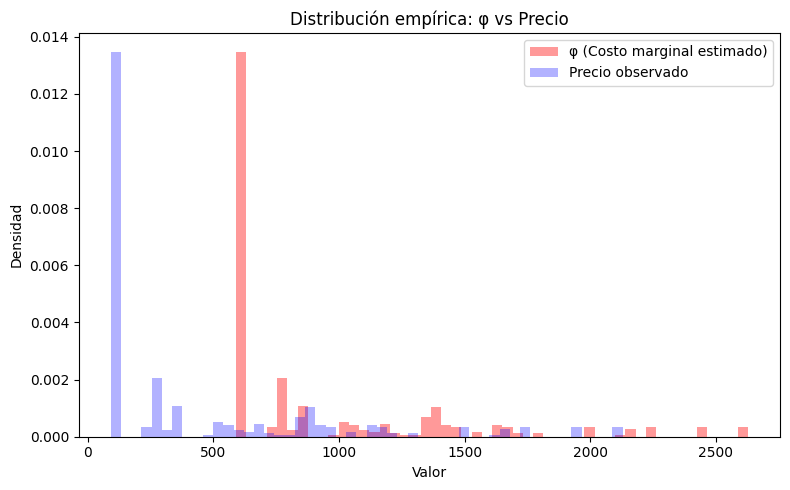

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

phi = pd.to_numeric(df_result2['phi'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
precio = pd.to_numeric(df_result2['precio_d'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(phi, bins=50, density=True, color="red", alpha=0.4, label="φ (Costo marginal estimado)")
plt.hist(precio, bins=50, density=True, color="blue", alpha=0.3, label="Precio observado")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución empírica: φ vs Precio")
plt.legend()
plt.tight_layout()
plt.show()



## Agregar a nivel hora y graficar bids y valuaciones estimadas

In [112]:
import os

# Crear carpeta principal
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calcular número de fechas únicas
n_fechas = df_result2["Fecha"].nunique()

# Crear subcarpeta con el número de fechas únicas
sub_dir = os.path.join(output_dir, f"fechas_{n_fechas}")
os.makedirs(sub_dir, exist_ok=True)

print(f"Carpeta creada: {sub_dir}")


Carpeta creada: results\fechas_6


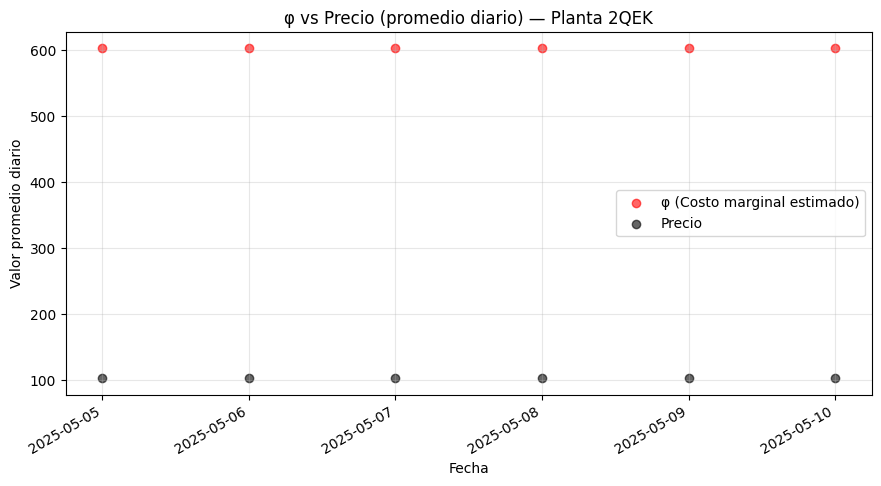

✅ Gráfico guardado: results\phi_precio_2QEK_2025-05-05_to_2025-05-10_M1.png


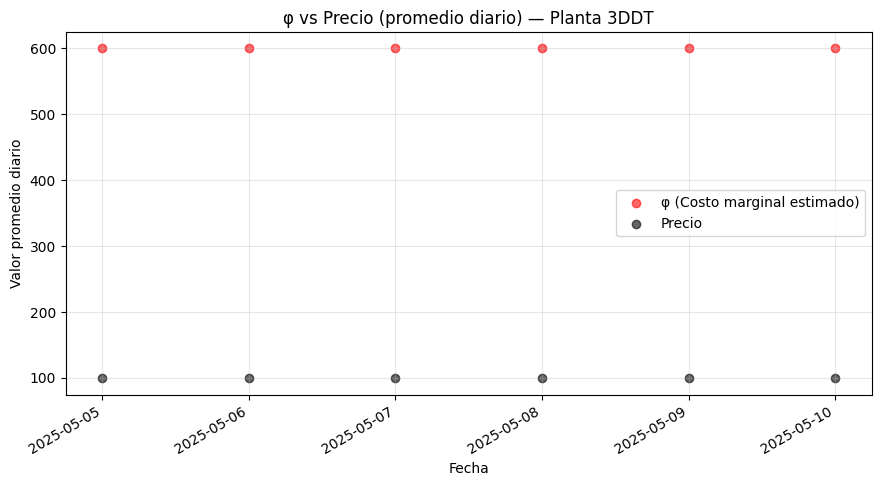

✅ Gráfico guardado: results\phi_precio_3DDT_2025-05-05_to_2025-05-10_M1.png


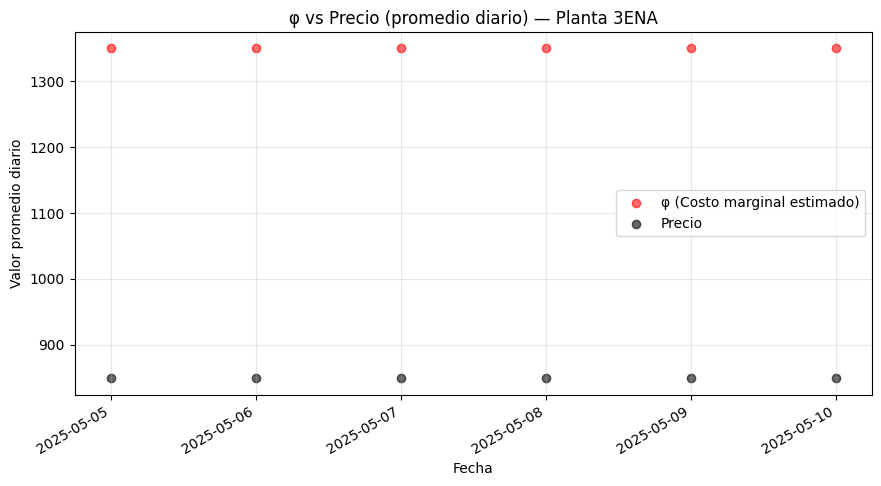

✅ Gráfico guardado: results\phi_precio_3ENA_2025-05-05_to_2025-05-10_M1.png


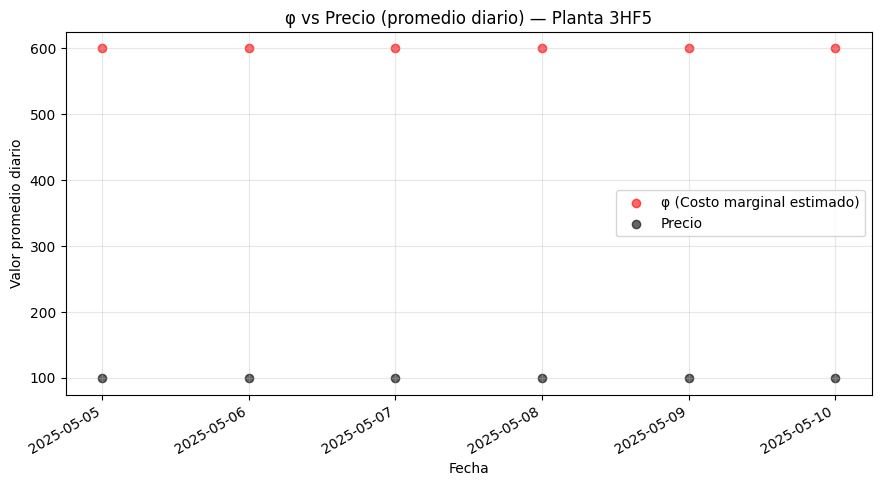

✅ Gráfico guardado: results\phi_precio_3HF5_2025-05-05_to_2025-05-10_M1.png


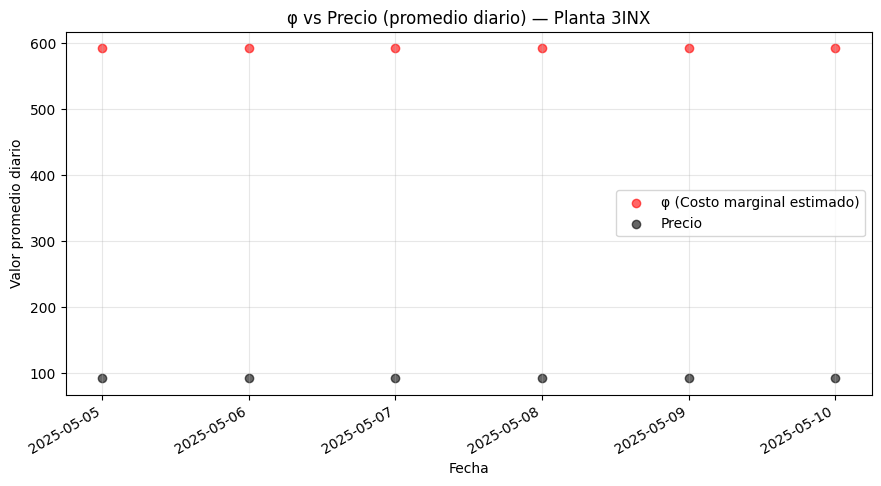

✅ Gráfico guardado: results\phi_precio_3INX_2025-05-05_to_2025-05-10_M1.png


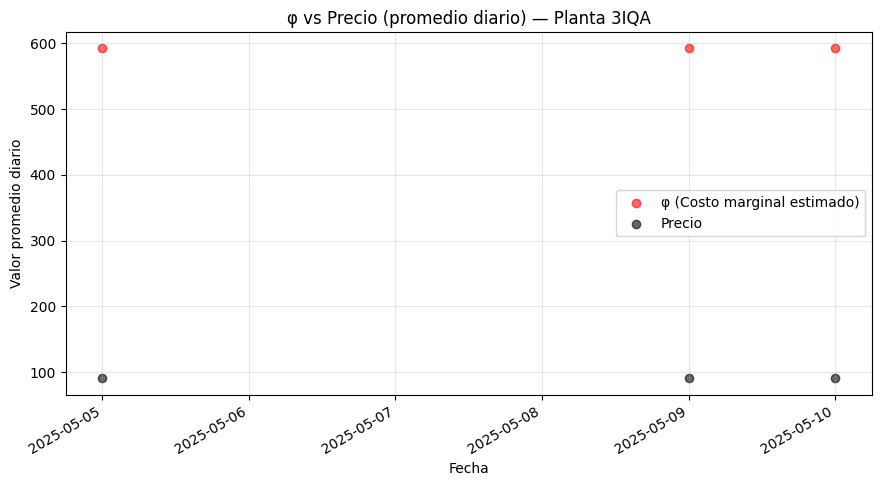

✅ Gráfico guardado: results\phi_precio_3IQA_2025-05-05_to_2025-05-10_M1.png


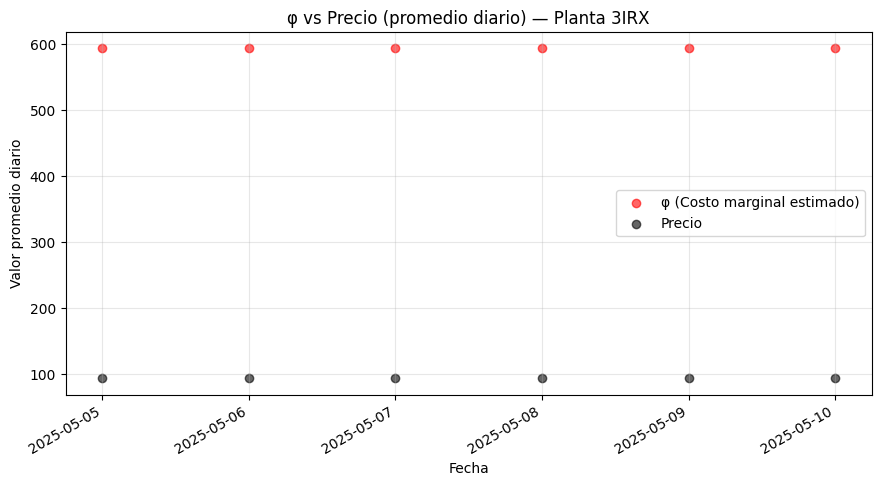

✅ Gráfico guardado: results\phi_precio_3IRX_2025-05-05_to_2025-05-10_M1.png


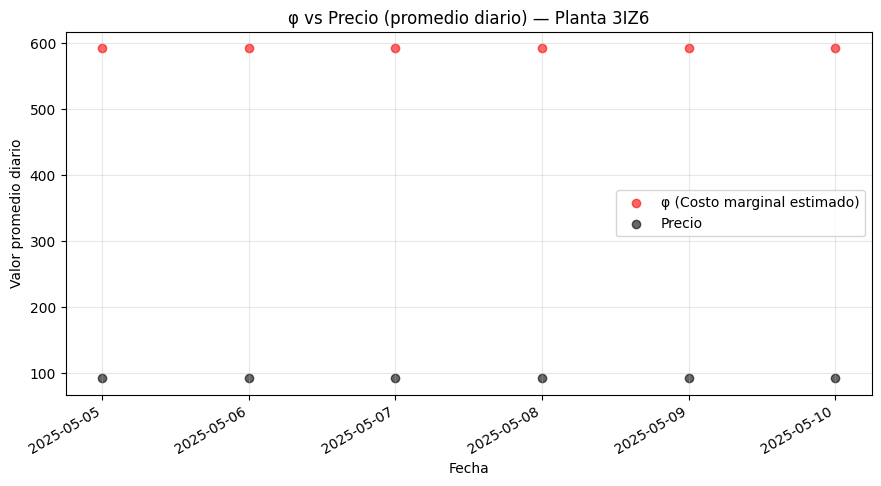

✅ Gráfico guardado: results\phi_precio_3IZ6_2025-05-05_to_2025-05-10_M1.png


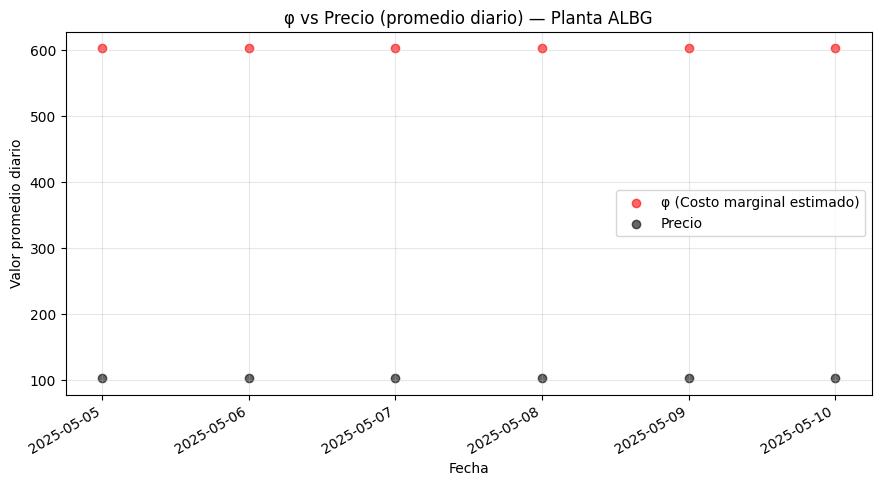

✅ Gráfico guardado: results\phi_precio_ALBG_2025-05-05_to_2025-05-10_M1.png


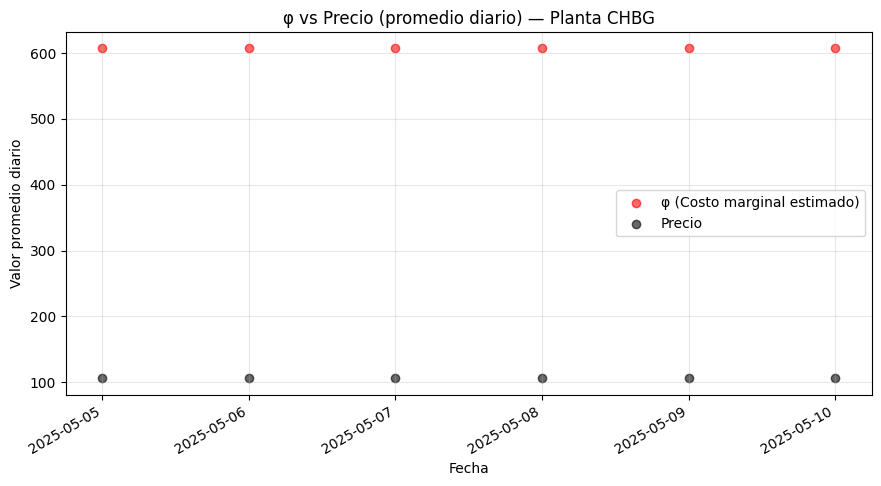

✅ Gráfico guardado: results\phi_precio_CHBG_2025-05-05_to_2025-05-10_M1.png


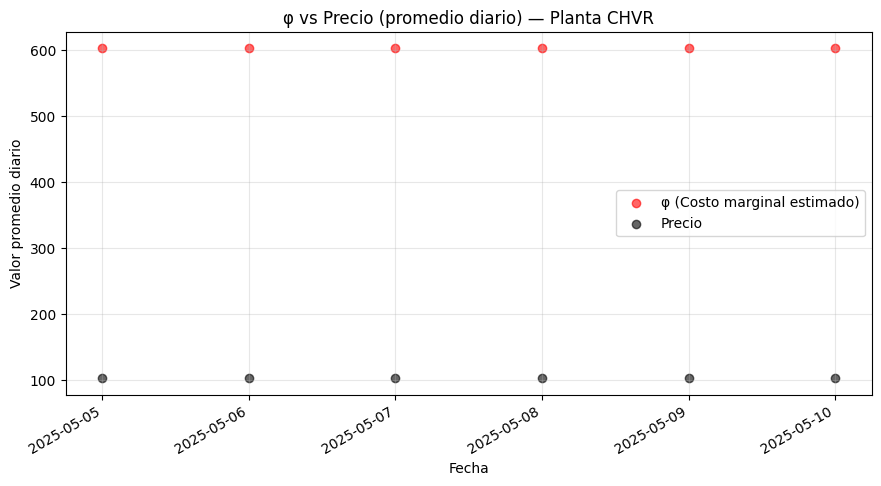

✅ Gráfico guardado: results\phi_precio_CHVR_2025-05-05_to_2025-05-10_M1.png


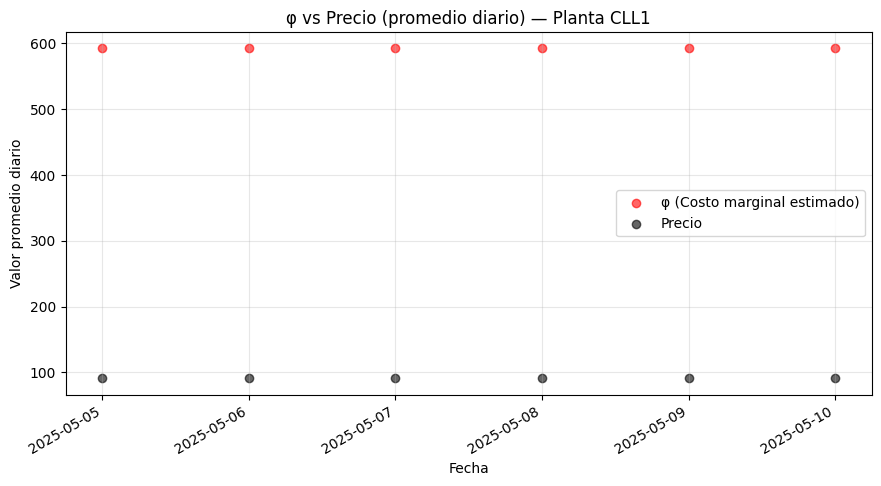

✅ Gráfico guardado: results\phi_precio_CLL1_2025-05-05_to_2025-05-10_M1.png


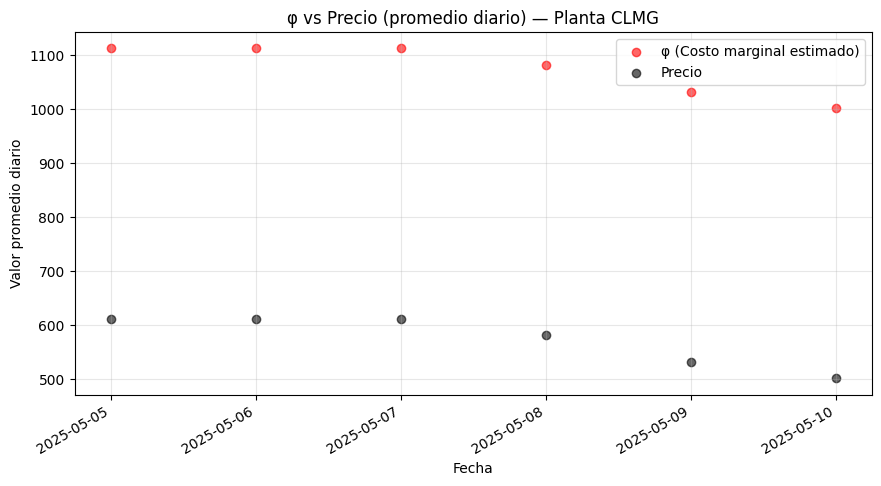

✅ Gráfico guardado: results\phi_precio_CLMG_2025-05-05_to_2025-05-10_M1.png


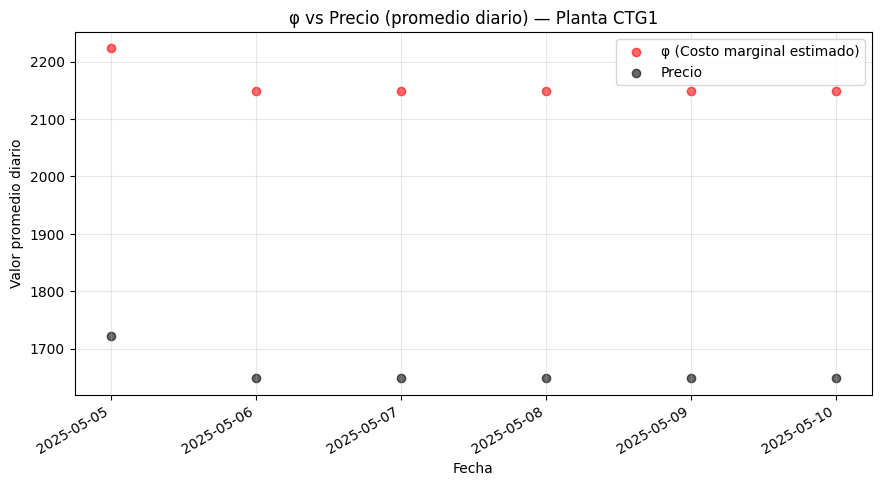

✅ Gráfico guardado: results\phi_precio_CTG1_2025-05-05_to_2025-05-10_M1.png


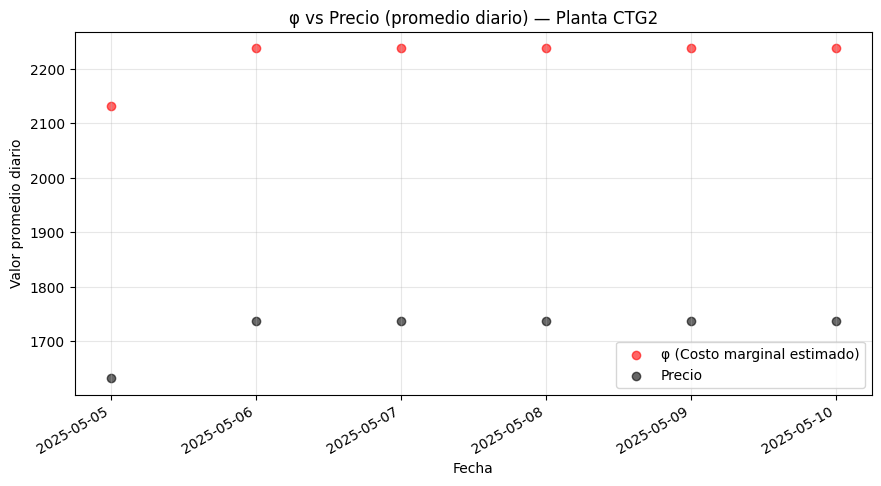

✅ Gráfico guardado: results\phi_precio_CTG2_2025-05-05_to_2025-05-10_M1.png


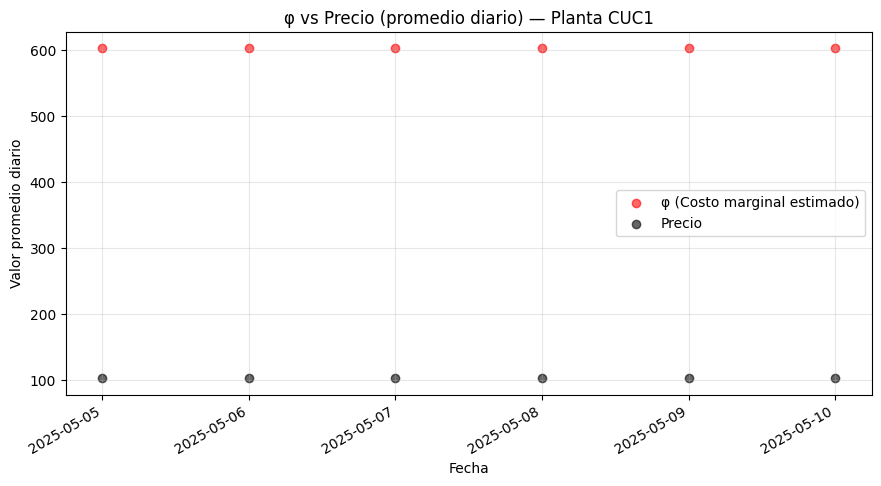

✅ Gráfico guardado: results\phi_precio_CUC1_2025-05-05_to_2025-05-10_M1.png


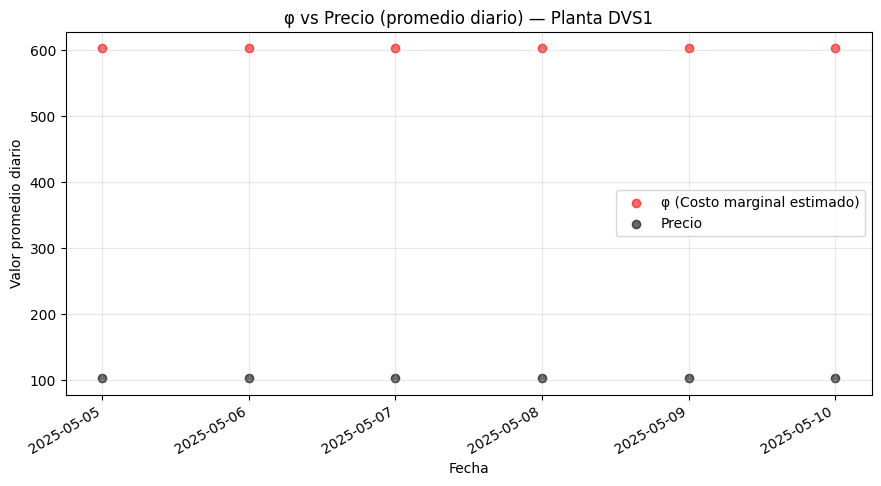

✅ Gráfico guardado: results\phi_precio_DVS1_2025-05-05_to_2025-05-10_M1.png


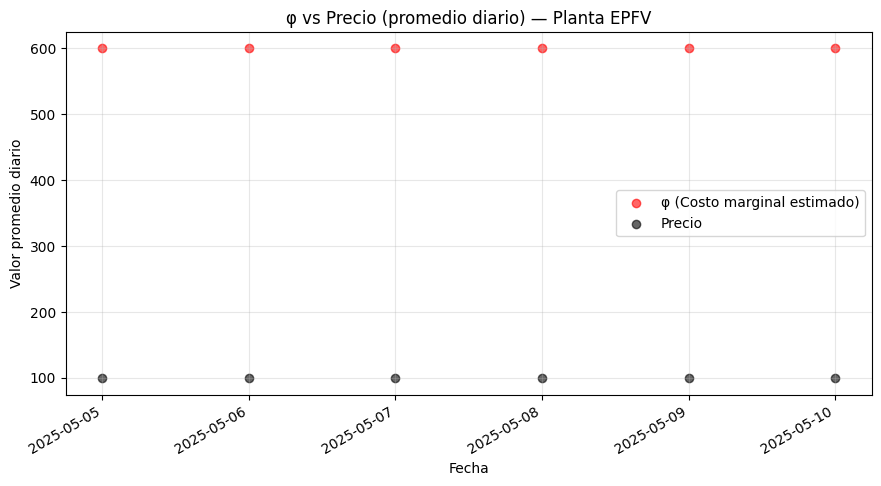

✅ Gráfico guardado: results\phi_precio_EPFV_2025-05-05_to_2025-05-10_M1.png


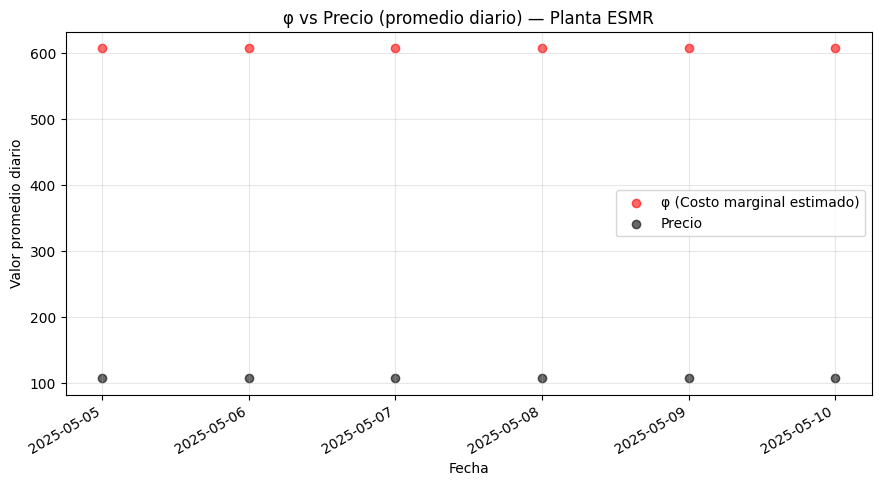

✅ Gráfico guardado: results\phi_precio_ESMR_2025-05-05_to_2025-05-10_M1.png


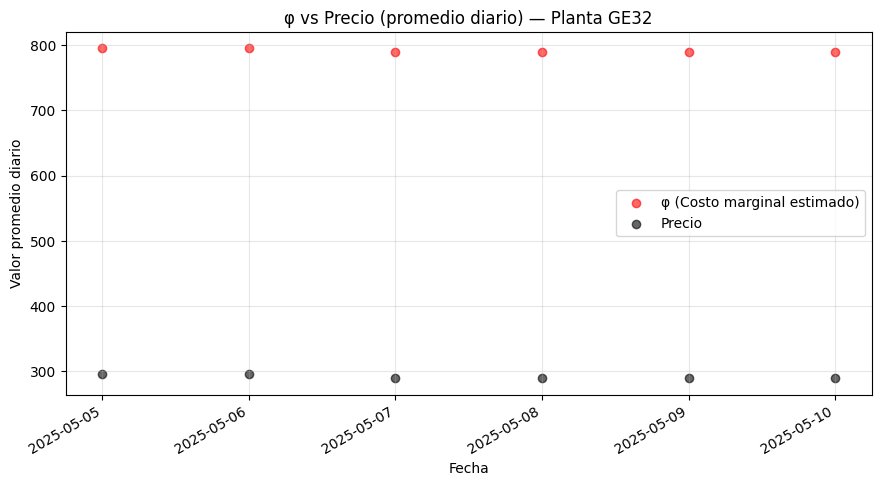

✅ Gráfico guardado: results\phi_precio_GE32_2025-05-05_to_2025-05-10_M1.png


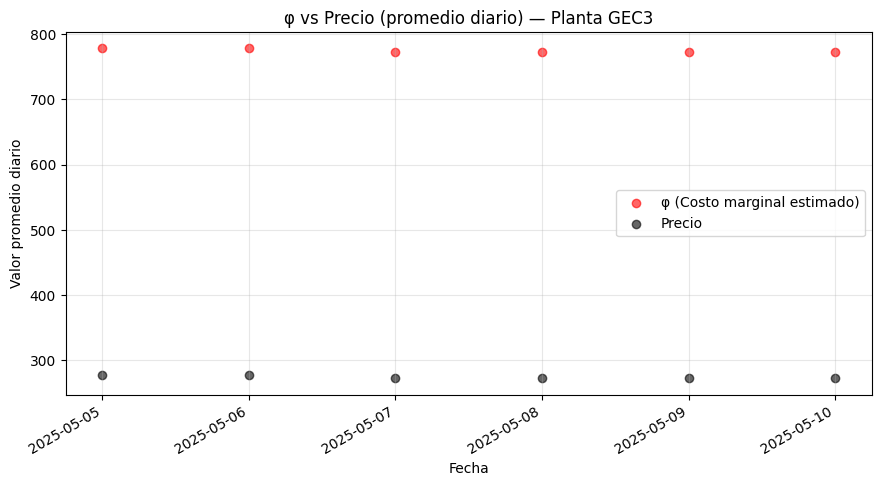

✅ Gráfico guardado: results\phi_precio_GEC3_2025-05-05_to_2025-05-10_M1.png


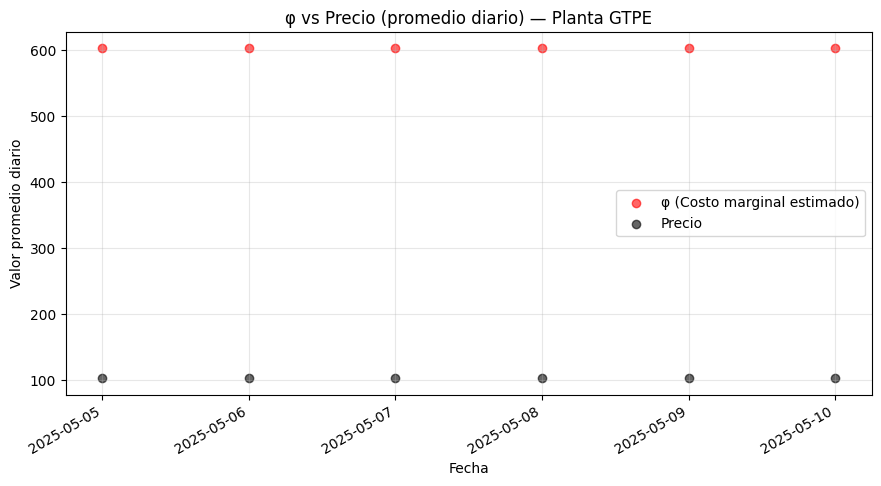

✅ Gráfico guardado: results\phi_precio_GTPE_2025-05-05_to_2025-05-10_M1.png


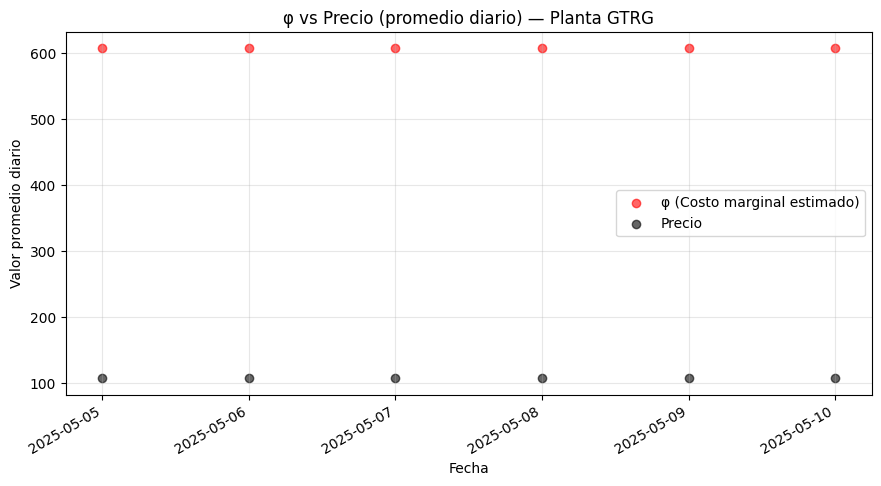

✅ Gráfico guardado: results\phi_precio_GTRG_2025-05-05_to_2025-05-10_M1.png


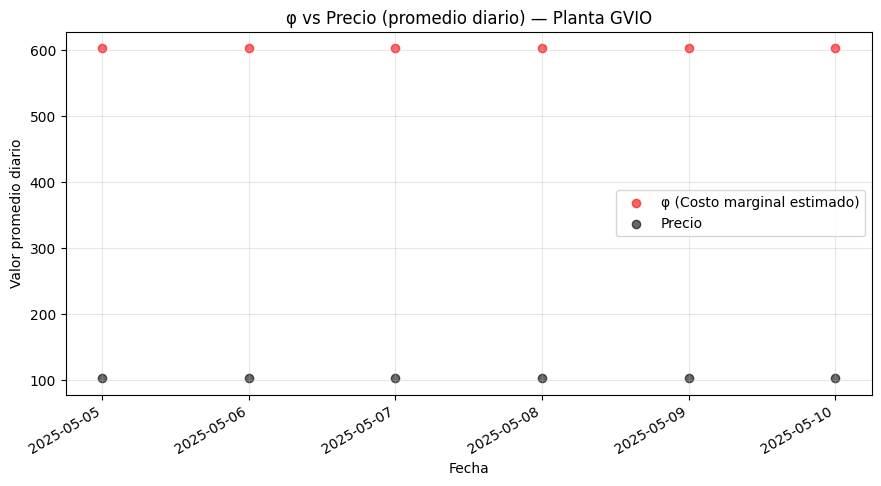

✅ Gráfico guardado: results\phi_precio_GVIO_2025-05-05_to_2025-05-10_M1.png


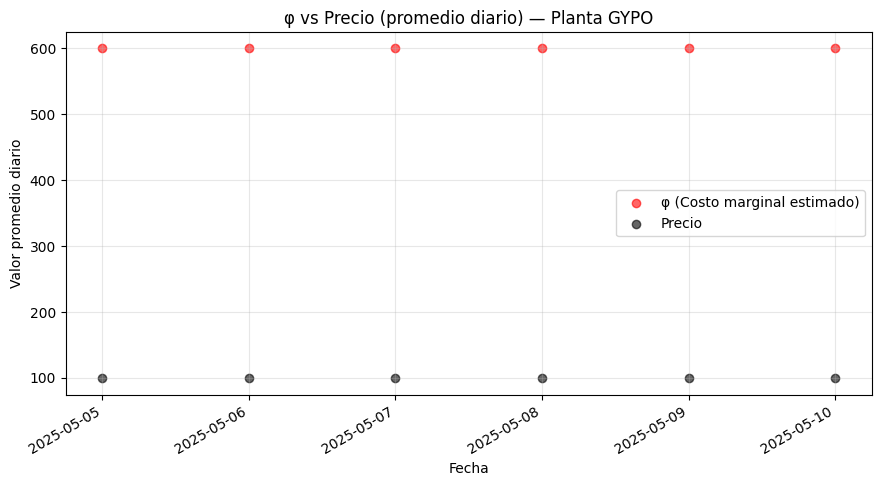

✅ Gráfico guardado: results\phi_precio_GYPO_2025-05-05_to_2025-05-10_M1.png


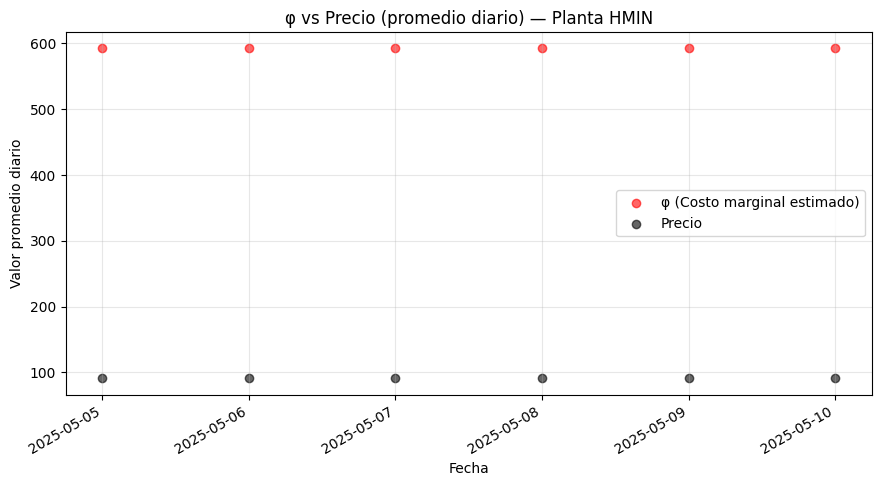

✅ Gráfico guardado: results\phi_precio_HMIN_2025-05-05_to_2025-05-10_M1.png


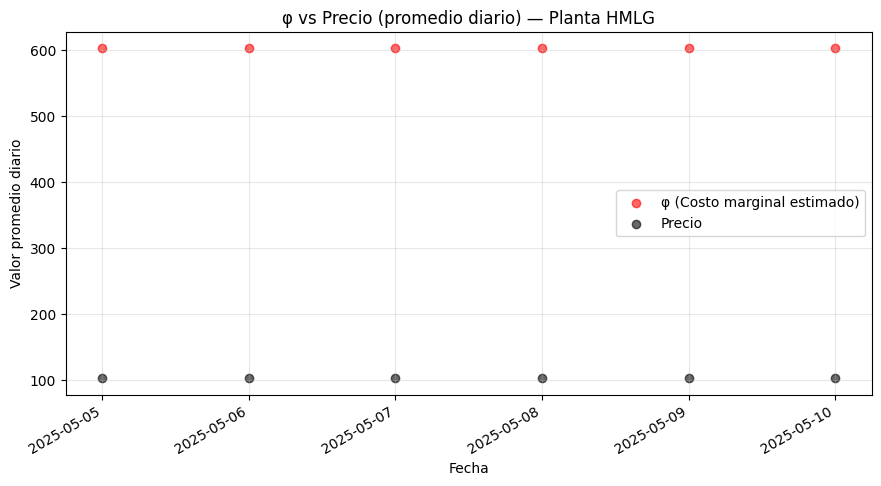

✅ Gráfico guardado: results\phi_precio_HMLG_2025-05-05_to_2025-05-10_M1.png


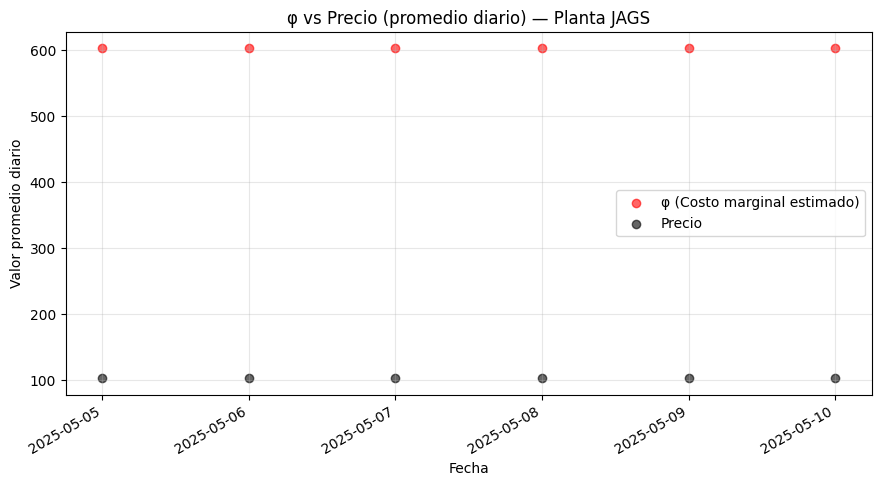

✅ Gráfico guardado: results\phi_precio_JAGS_2025-05-05_to_2025-05-10_M1.png


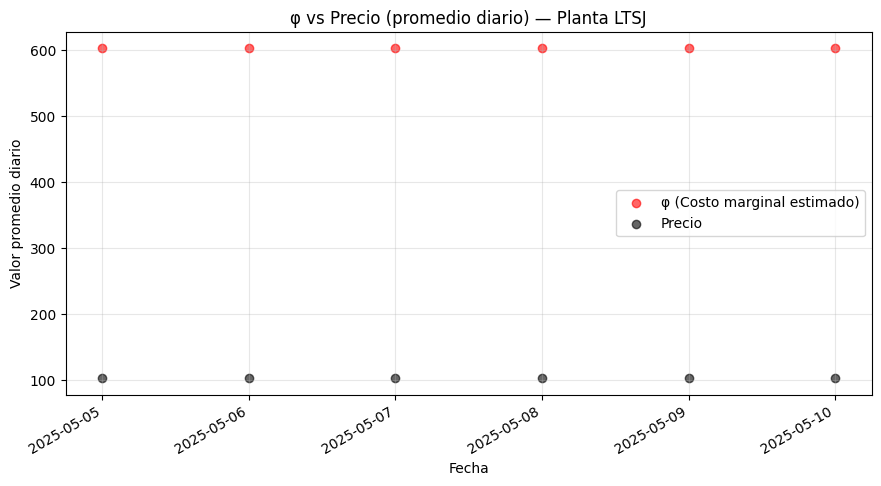

✅ Gráfico guardado: results\phi_precio_LTSJ_2025-05-05_to_2025-05-10_M1.png


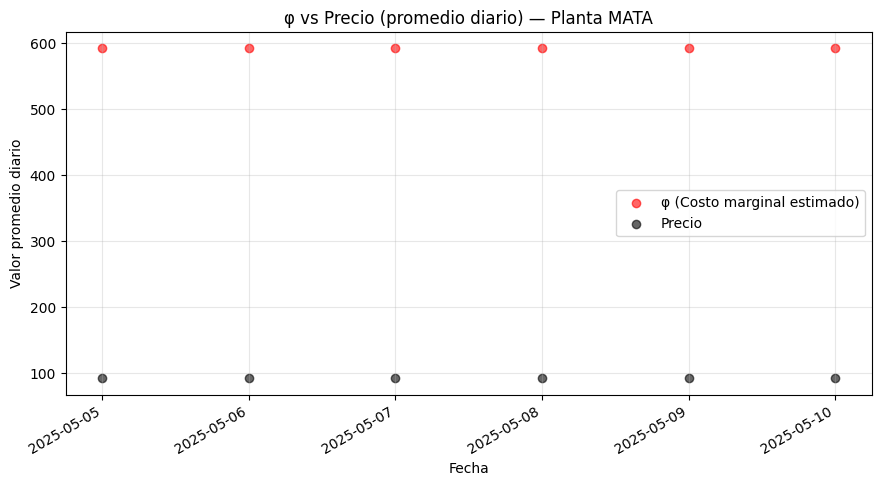

✅ Gráfico guardado: results\phi_precio_MATA_2025-05-05_to_2025-05-10_M1.png


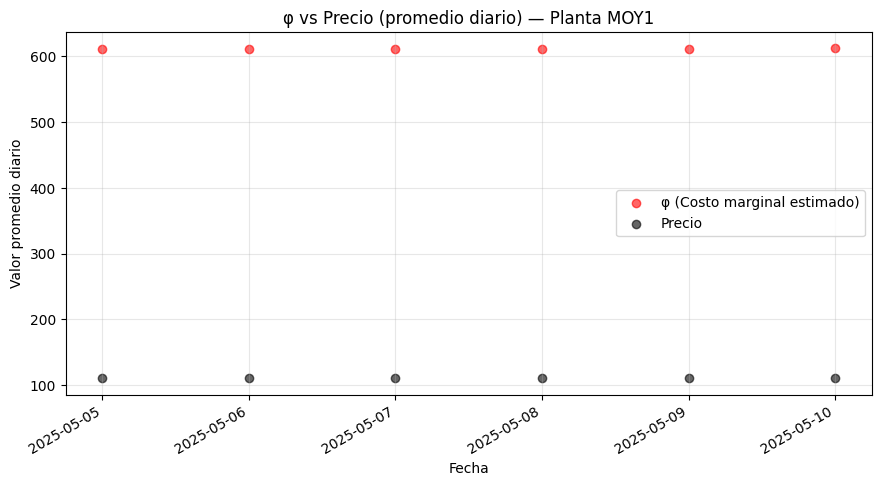

✅ Gráfico guardado: results\phi_precio_MOY1_2025-05-05_to_2025-05-10_M1.png


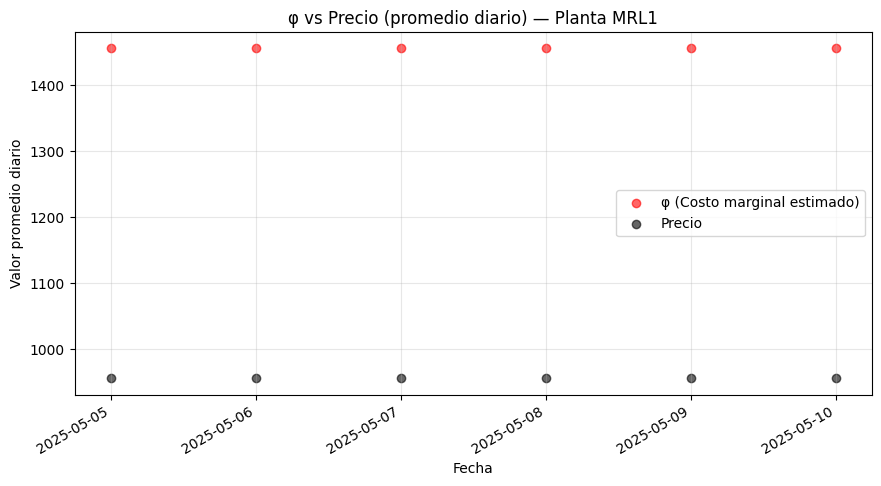

✅ Gráfico guardado: results\phi_precio_MRL1_2025-05-05_to_2025-05-10_M1.png


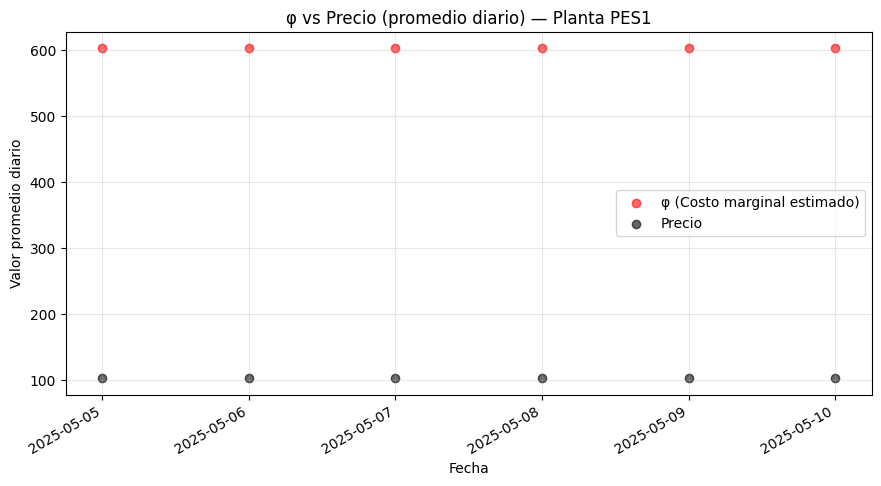

✅ Gráfico guardado: results\phi_precio_PES1_2025-05-05_to_2025-05-10_M1.png


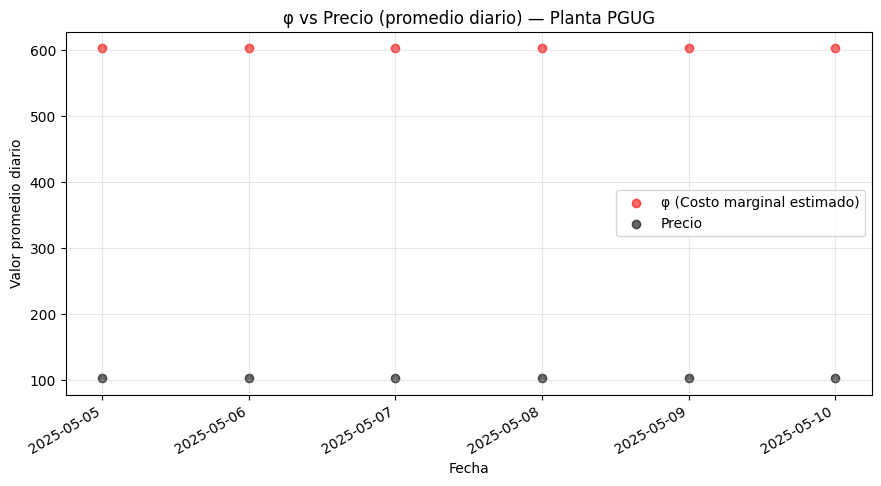

✅ Gráfico guardado: results\phi_precio_PGUG_2025-05-05_to_2025-05-10_M1.png


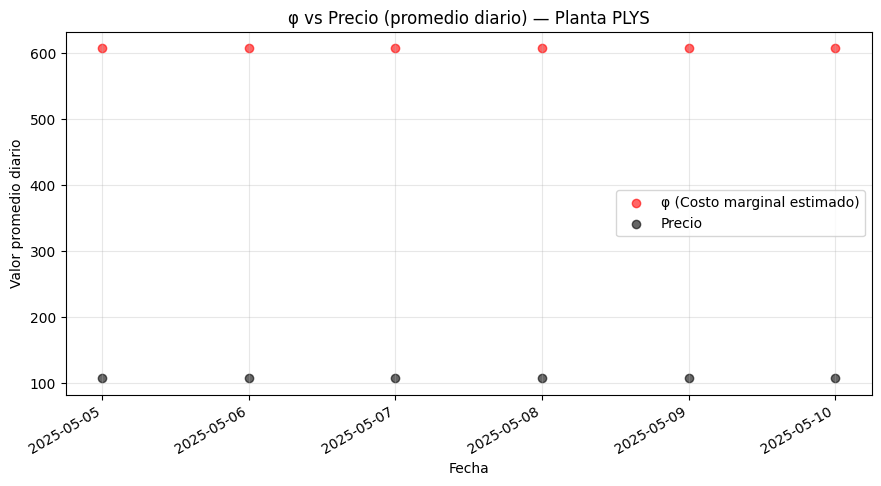

✅ Gráfico guardado: results\phi_precio_PLYS_2025-05-05_to_2025-05-10_M1.png


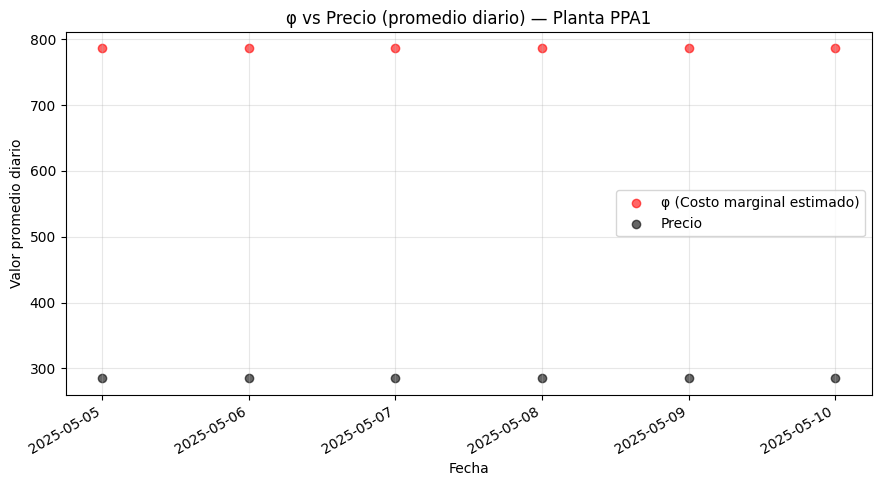

✅ Gráfico guardado: results\phi_precio_PPA1_2025-05-05_to_2025-05-10_M1.png


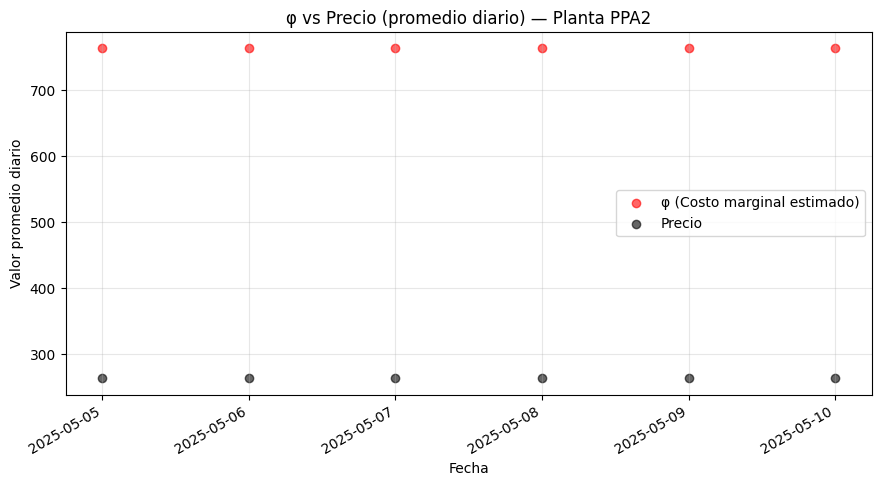

✅ Gráfico guardado: results\phi_precio_PPA2_2025-05-05_to_2025-05-10_M1.png


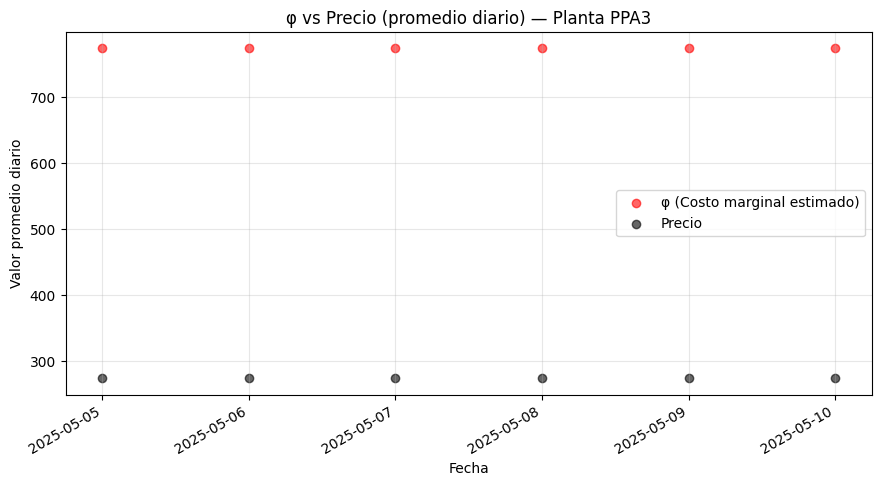

✅ Gráfico guardado: results\phi_precio_PPA3_2025-05-05_to_2025-05-10_M1.png


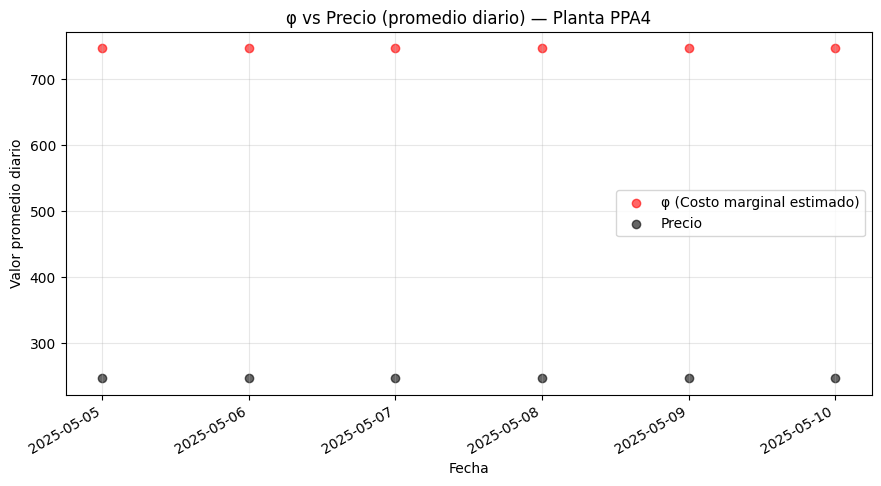

✅ Gráfico guardado: results\phi_precio_PPA4_2025-05-05_to_2025-05-10_M1.png


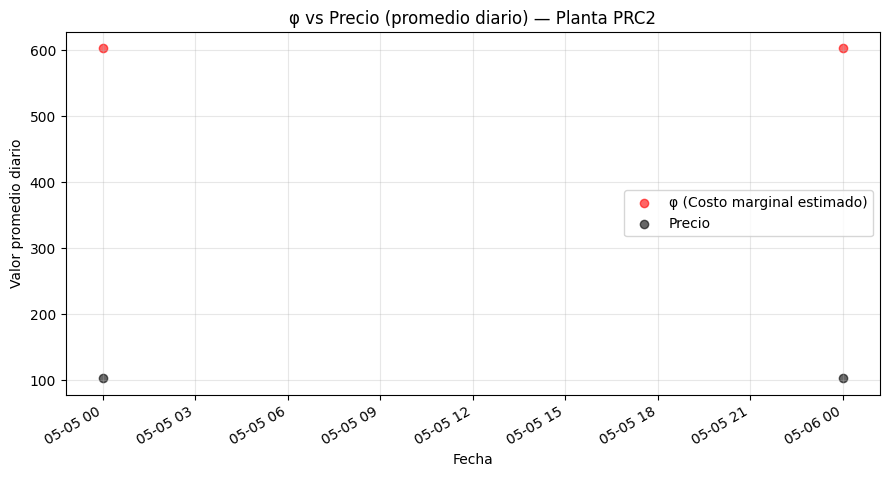

✅ Gráfico guardado: results\phi_precio_PRC2_2025-05-05_to_2025-05-06_M1.png


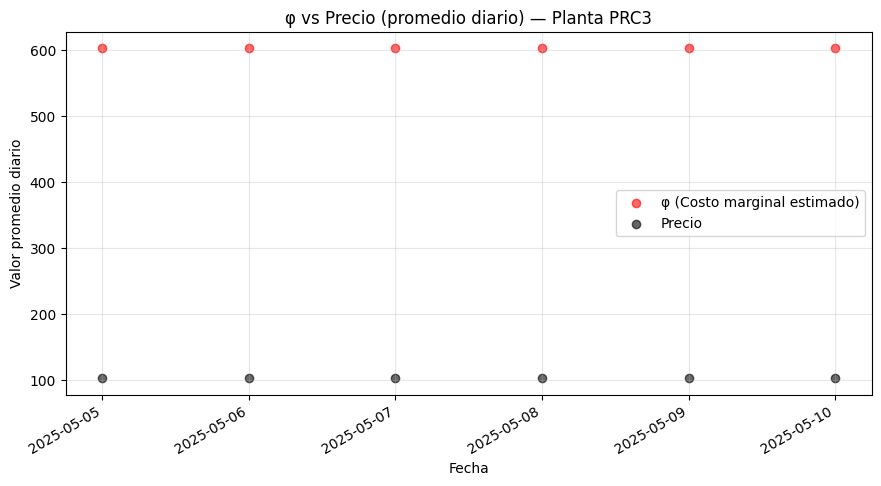

✅ Gráfico guardado: results\phi_precio_PRC3_2025-05-05_to_2025-05-10_M1.png


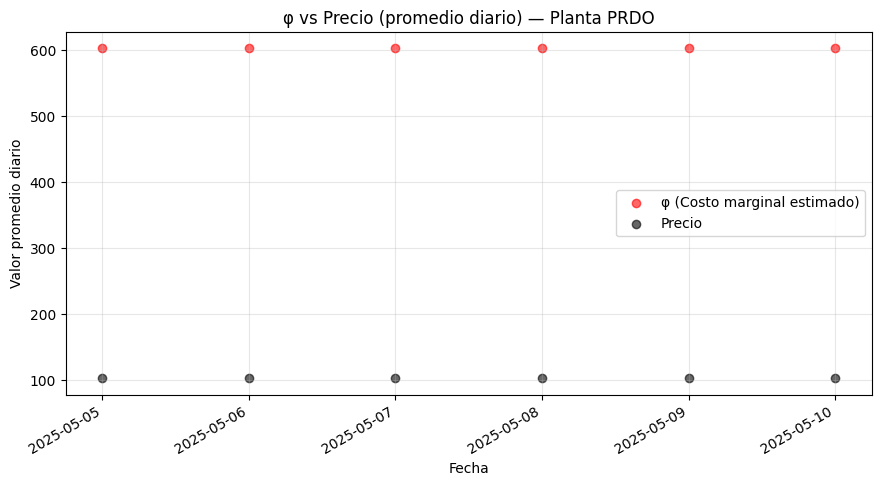

✅ Gráfico guardado: results\phi_precio_PRDO_2025-05-05_to_2025-05-10_M1.png


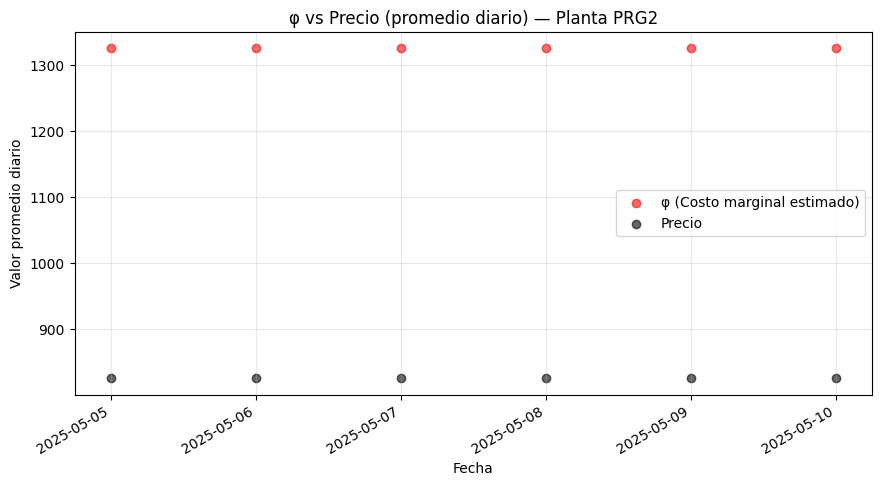

✅ Gráfico guardado: results\phi_precio_PRG2_2025-05-05_to_2025-05-10_M1.png


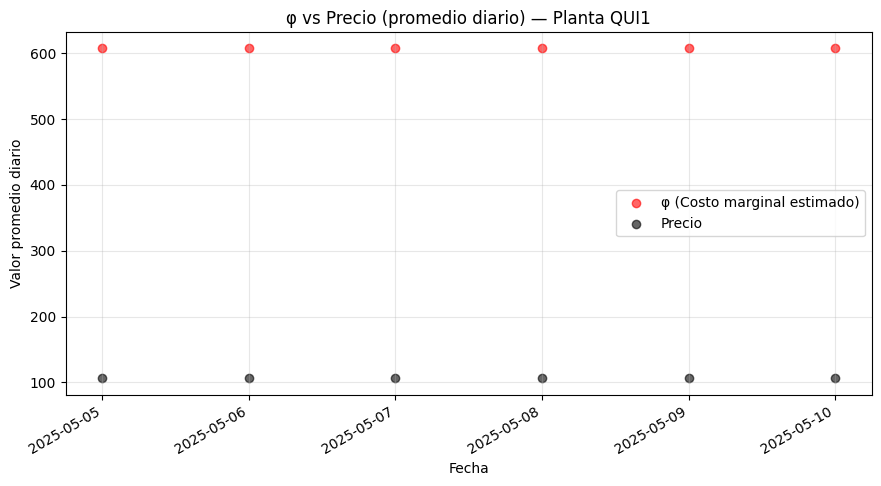

✅ Gráfico guardado: results\phi_precio_QUI1_2025-05-05_to_2025-05-10_M1.png


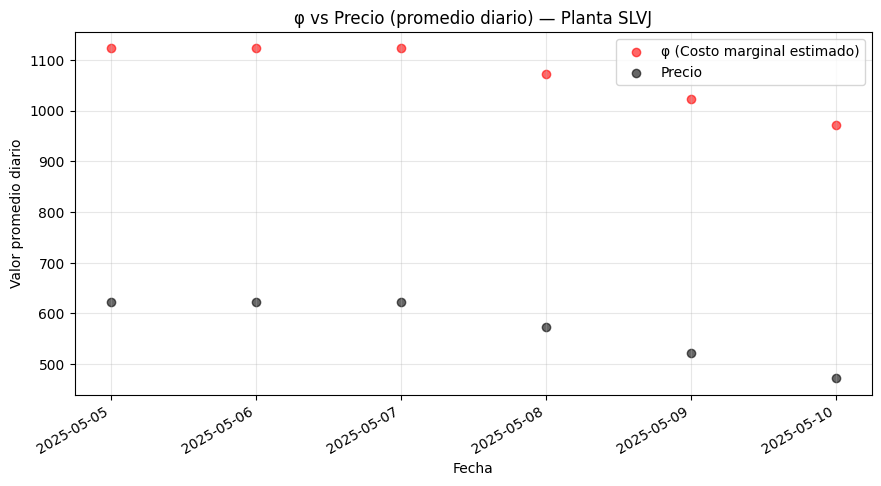

✅ Gráfico guardado: results\phi_precio_SLVJ_2025-05-05_to_2025-05-10_M1.png


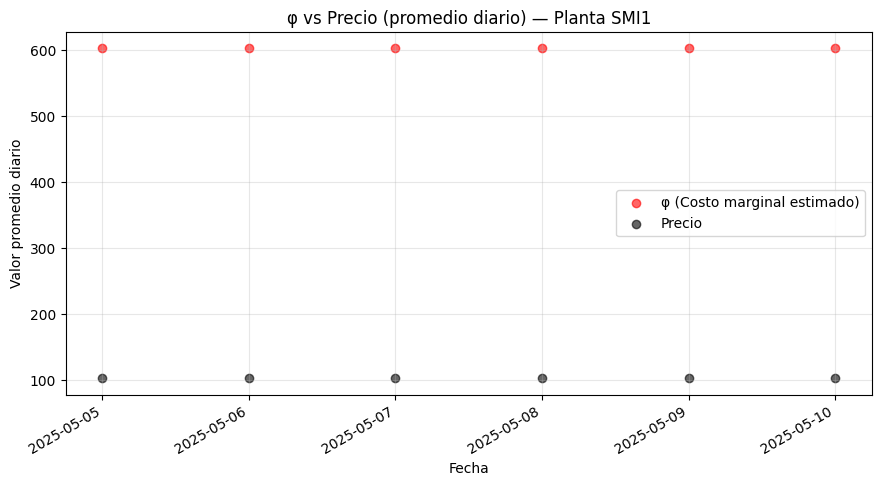

✅ Gráfico guardado: results\phi_precio_SMI1_2025-05-05_to_2025-05-10_M1.png


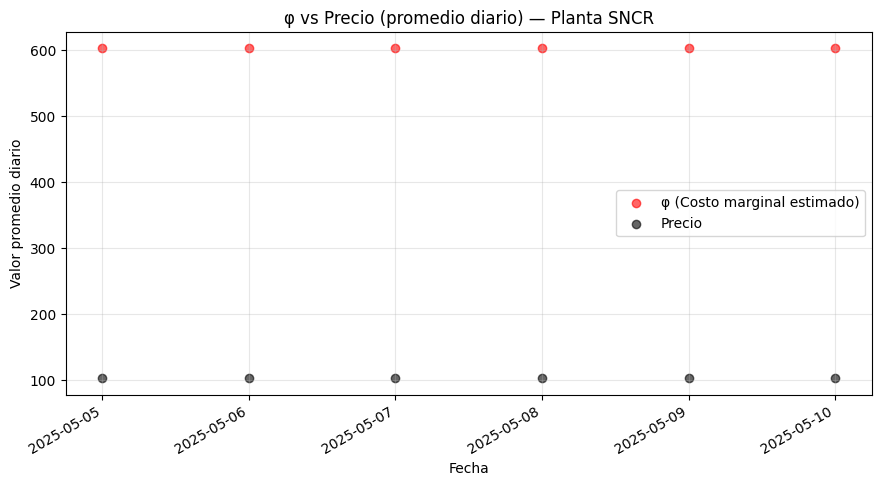

✅ Gráfico guardado: results\phi_precio_SNCR_2025-05-05_to_2025-05-10_M1.png


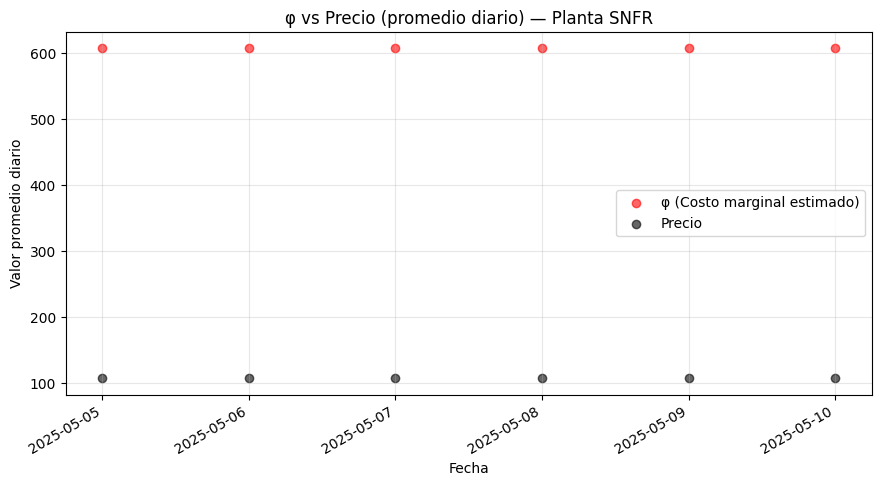

✅ Gráfico guardado: results\phi_precio_SNFR_2025-05-05_to_2025-05-10_M1.png


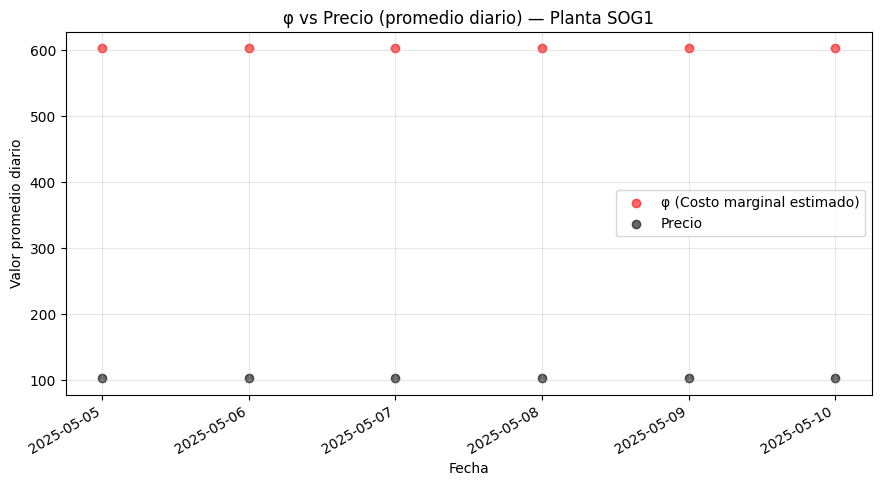

✅ Gráfico guardado: results\phi_precio_SOG1_2025-05-05_to_2025-05-10_M1.png


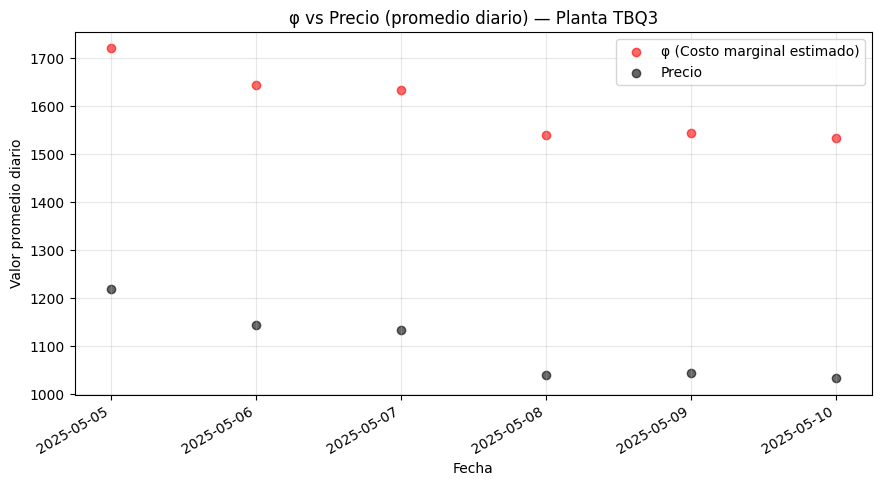

✅ Gráfico guardado: results\phi_precio_TBQ3_2025-05-05_to_2025-05-10_M1.png


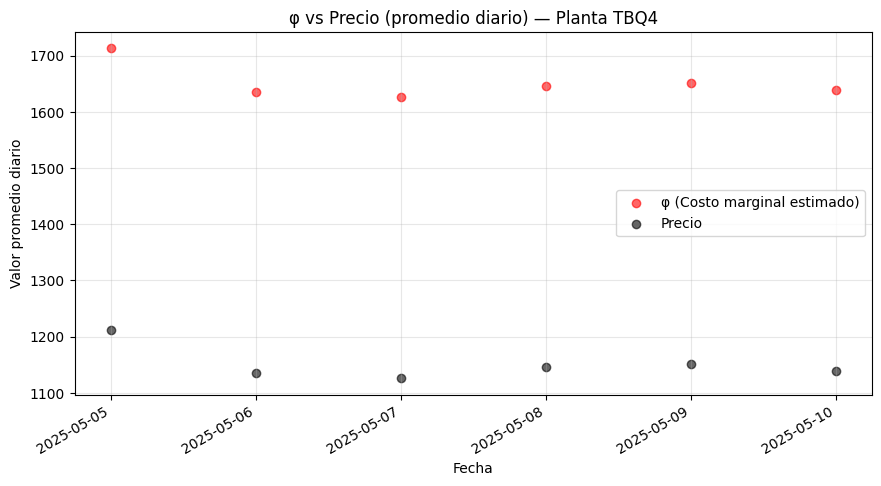

✅ Gráfico guardado: results\phi_precio_TBQ4_2025-05-05_to_2025-05-10_M1.png


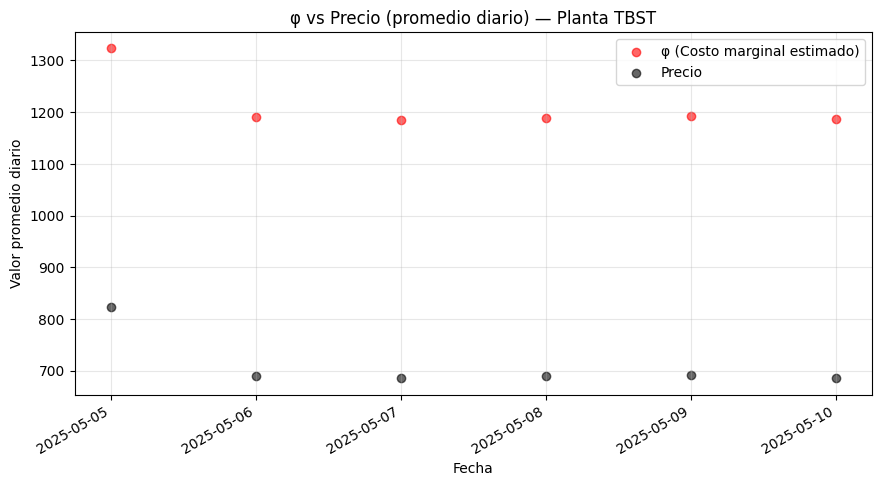

✅ Gráfico guardado: results\phi_precio_TBST_2025-05-05_to_2025-05-10_M1.png


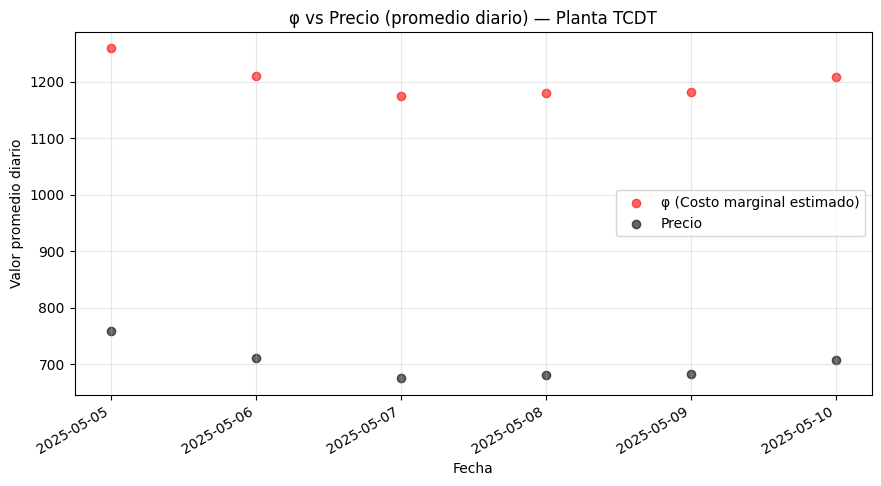

✅ Gráfico guardado: results\phi_precio_TCDT_2025-05-05_to_2025-05-10_M1.png


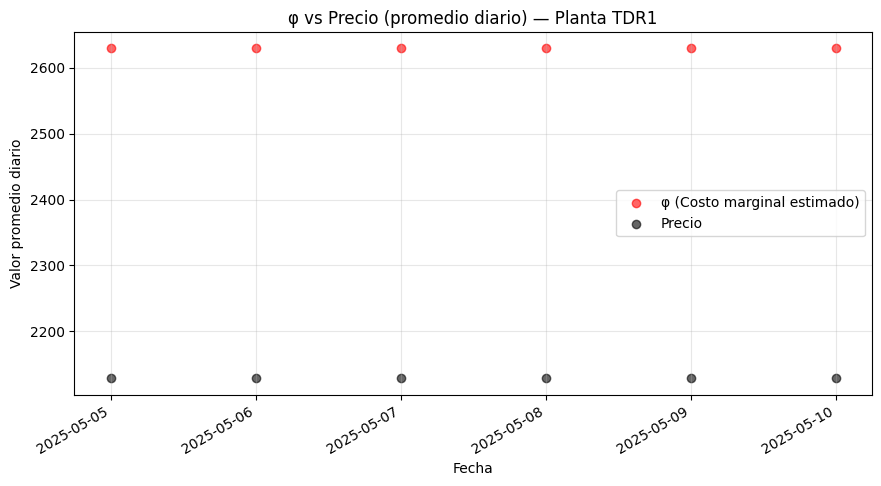

✅ Gráfico guardado: results\phi_precio_TDR1_2025-05-05_to_2025-05-10_M1.png


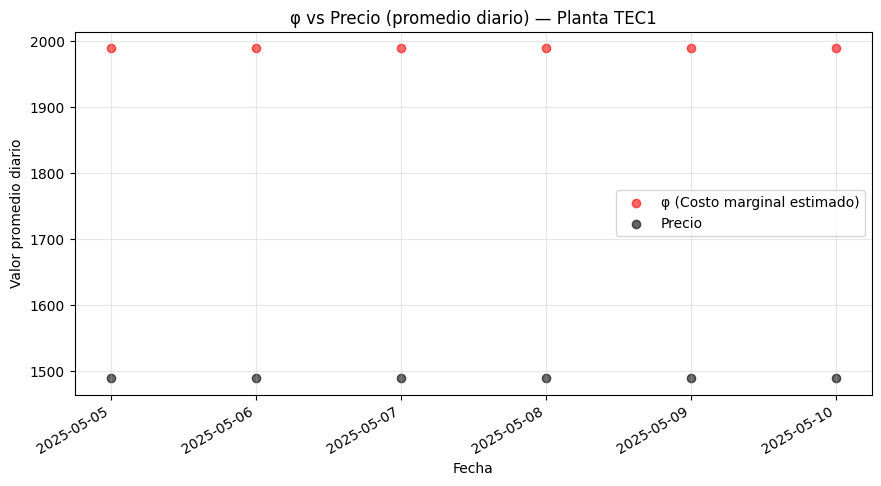

✅ Gráfico guardado: results\phi_precio_TEC1_2025-05-05_to_2025-05-10_M1.png


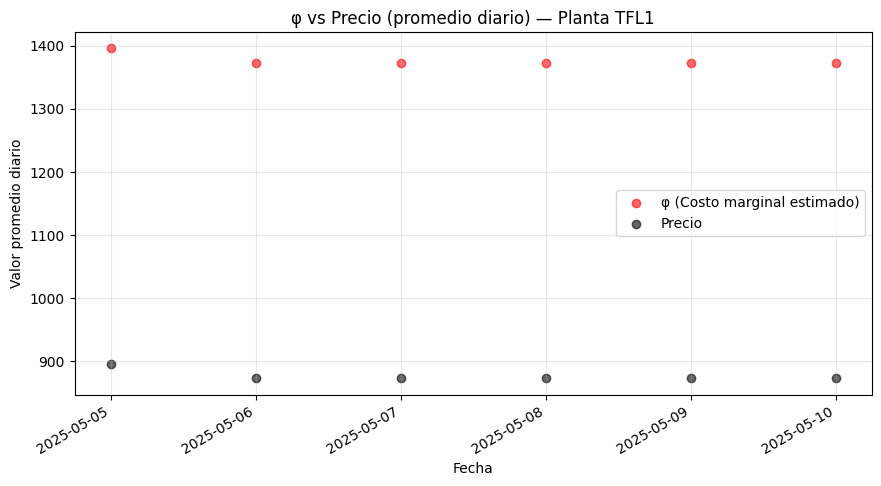

✅ Gráfico guardado: results\phi_precio_TFL1_2025-05-05_to_2025-05-10_M1.png


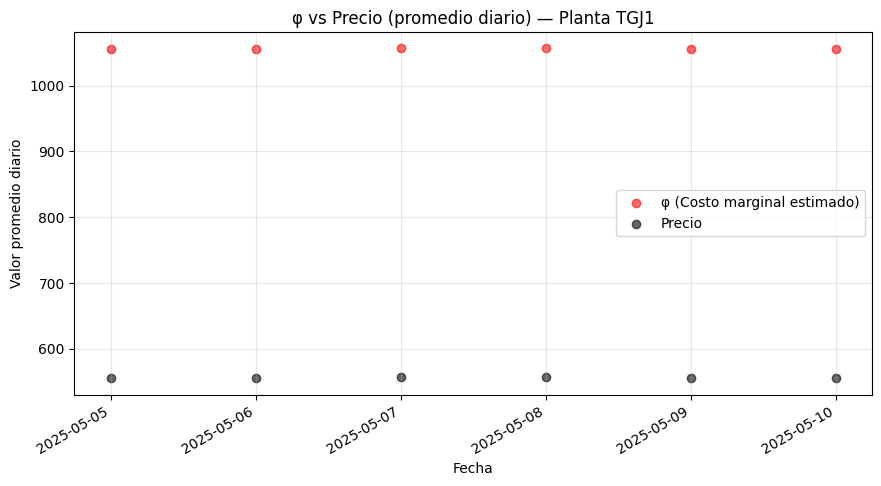

✅ Gráfico guardado: results\phi_precio_TGJ1_2025-05-05_to_2025-05-10_M1.png


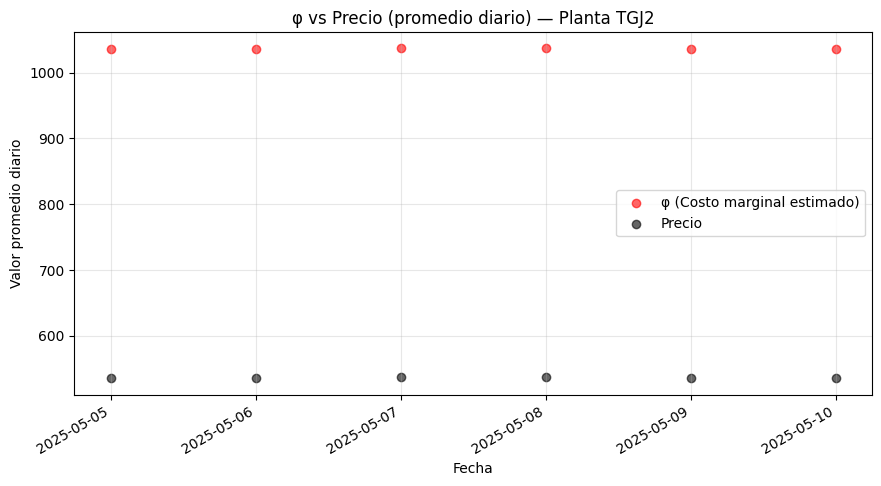

✅ Gráfico guardado: results\phi_precio_TGJ2_2025-05-05_to_2025-05-10_M1.png


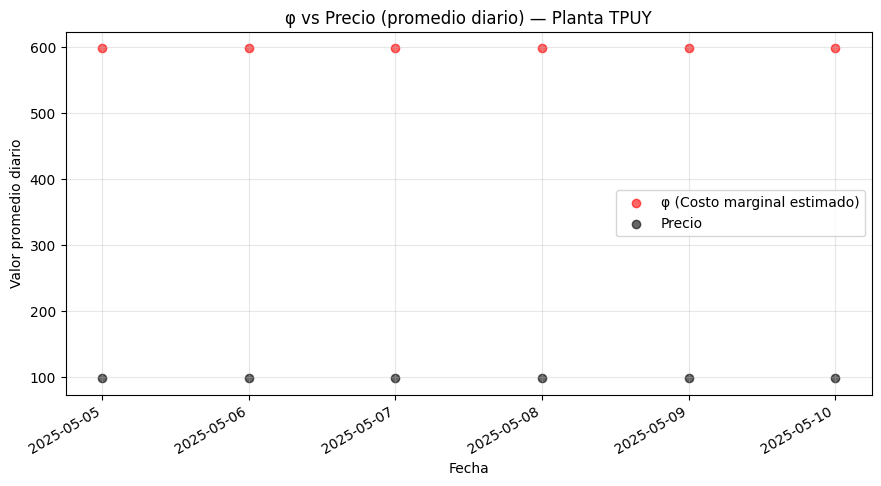

✅ Gráfico guardado: results\phi_precio_TPUY_2025-05-05_to_2025-05-10_M1.png


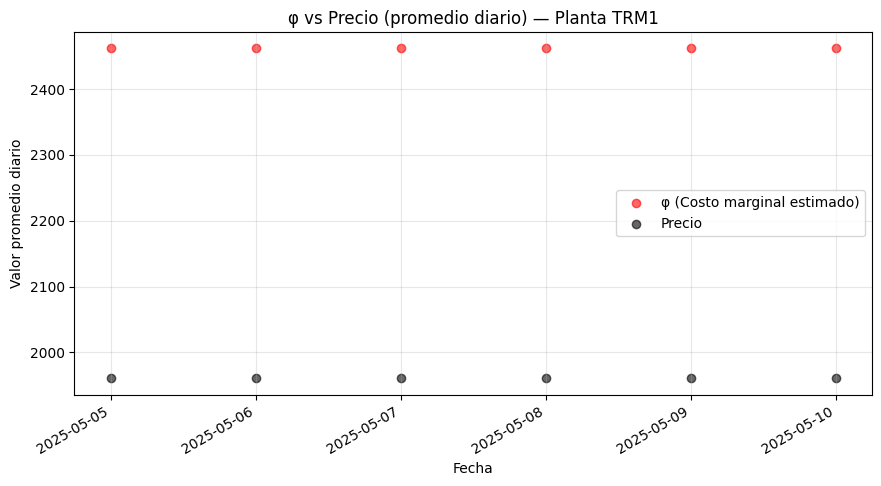

✅ Gráfico guardado: results\phi_precio_TRM1_2025-05-05_to_2025-05-10_M1.png


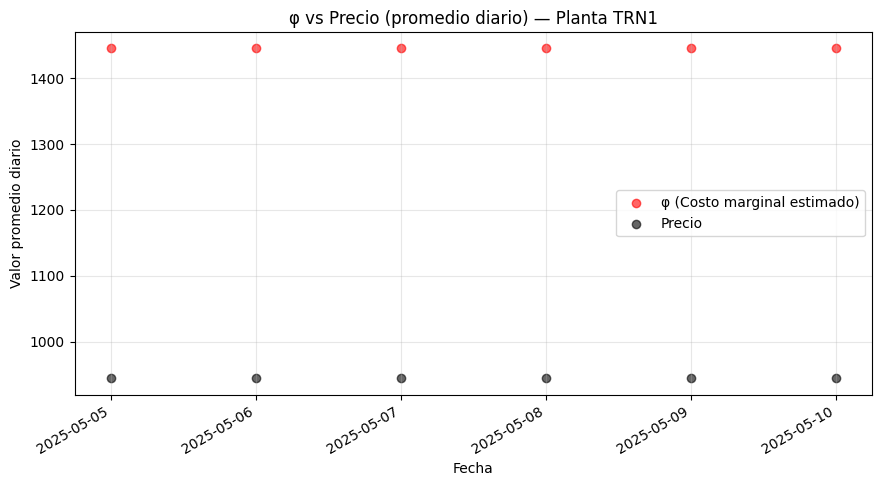

✅ Gráfico guardado: results\phi_precio_TRN1_2025-05-05_to_2025-05-10_M1.png


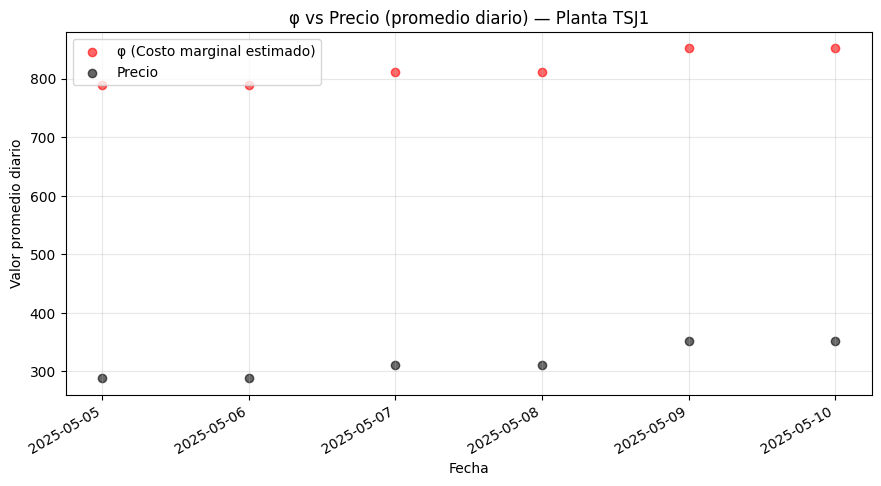

✅ Gráfico guardado: results\phi_precio_TSJ1_2025-05-05_to_2025-05-10_M1.png


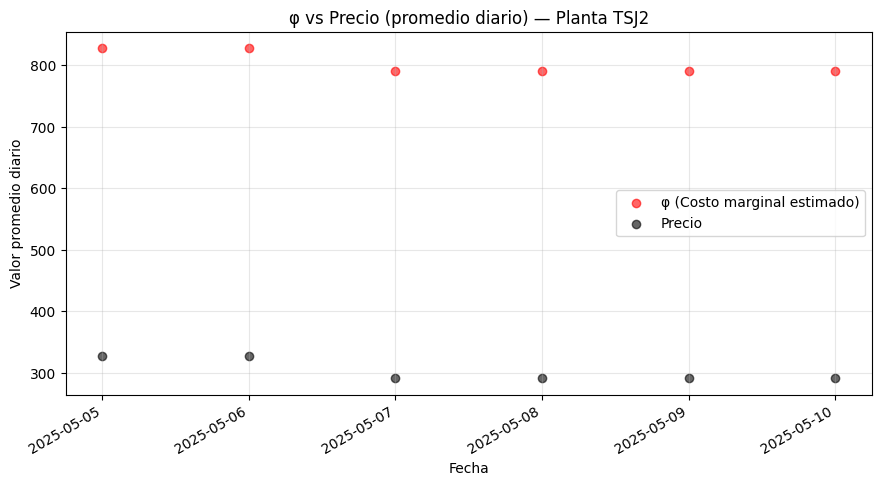

✅ Gráfico guardado: results\phi_precio_TSJ2_2025-05-05_to_2025-05-10_M1.png


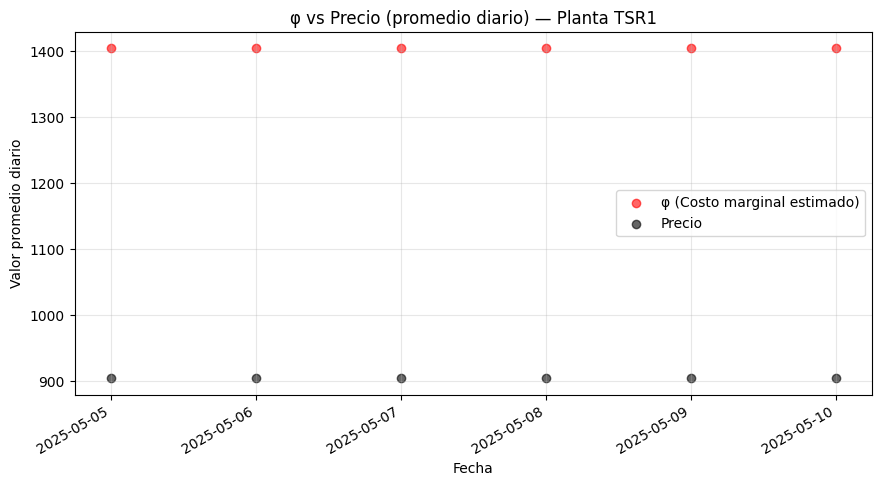

✅ Gráfico guardado: results\phi_precio_TSR1_2025-05-05_to_2025-05-10_M1.png


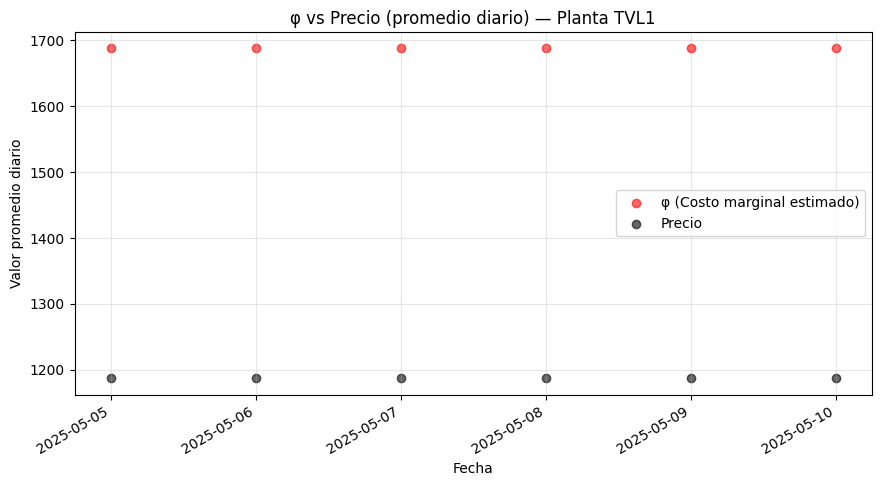

✅ Gráfico guardado: results\phi_precio_TVL1_2025-05-05_to_2025-05-10_M1.png


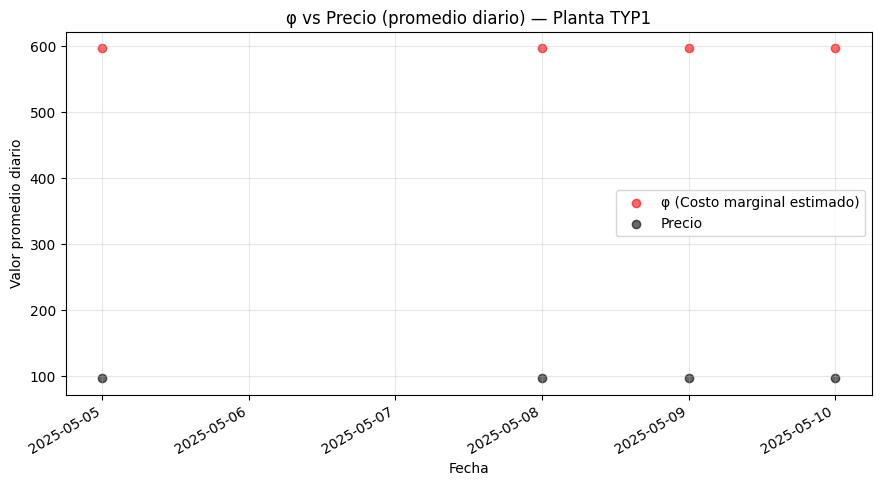

✅ Gráfico guardado: results\phi_precio_TYP1_2025-05-05_to_2025-05-10_M1.png


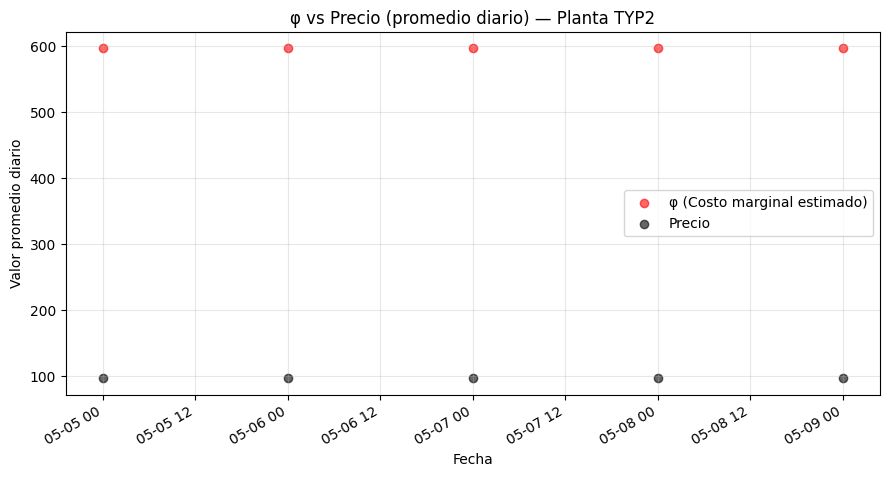

✅ Gráfico guardado: results\phi_precio_TYP2_2025-05-05_to_2025-05-09_M1.png


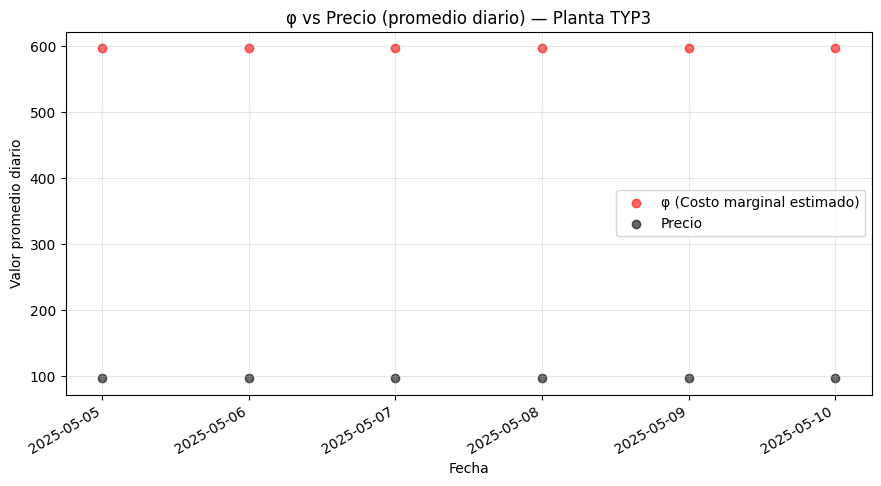

✅ Gráfico guardado: results\phi_precio_TYP3_2025-05-05_to_2025-05-10_M1.png


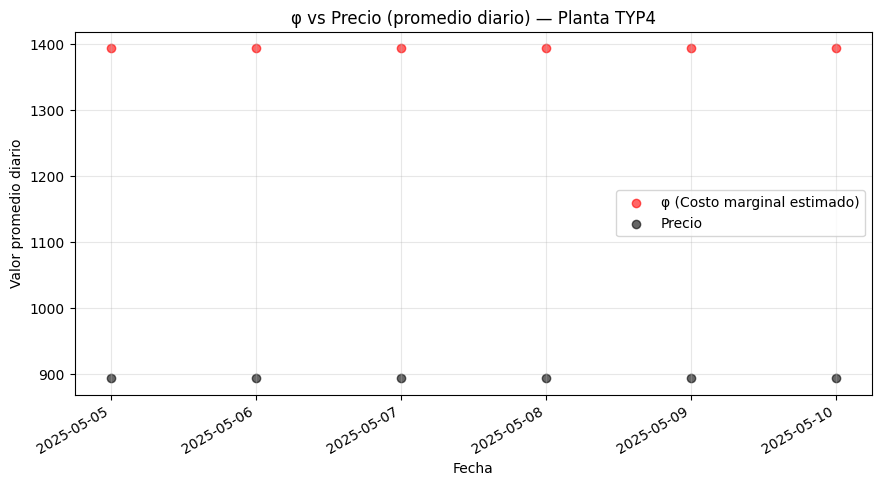

✅ Gráfico guardado: results\phi_precio_TYP4_2025-05-05_to_2025-05-10_M1.png


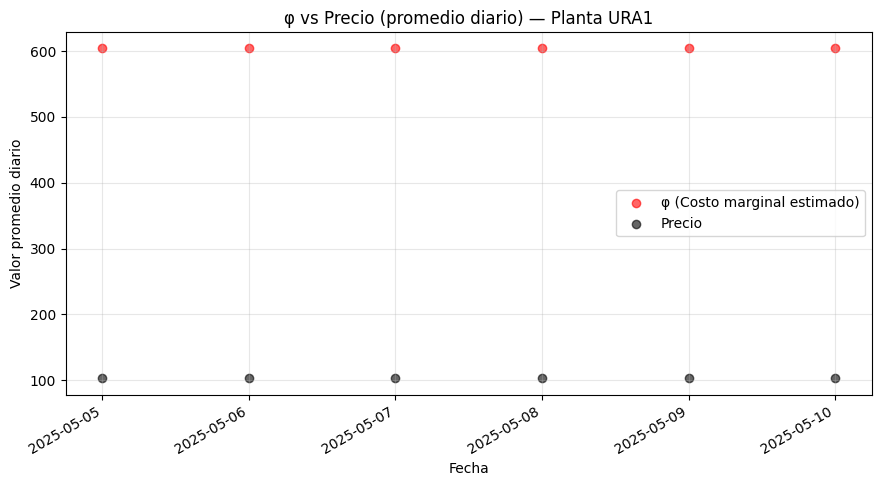

✅ Gráfico guardado: results\phi_precio_URA1_2025-05-05_to_2025-05-10_M1.png


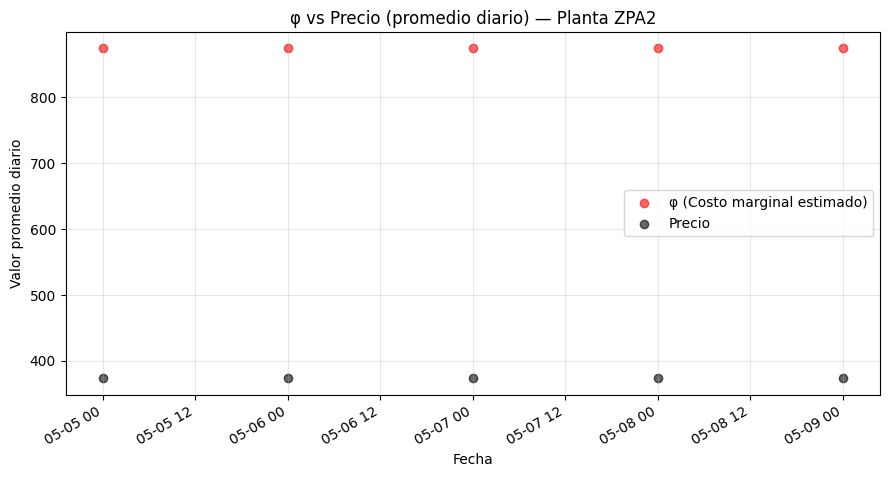

✅ Gráfico guardado: results\phi_precio_ZPA2_2025-05-05_to_2025-05-09_M1.png


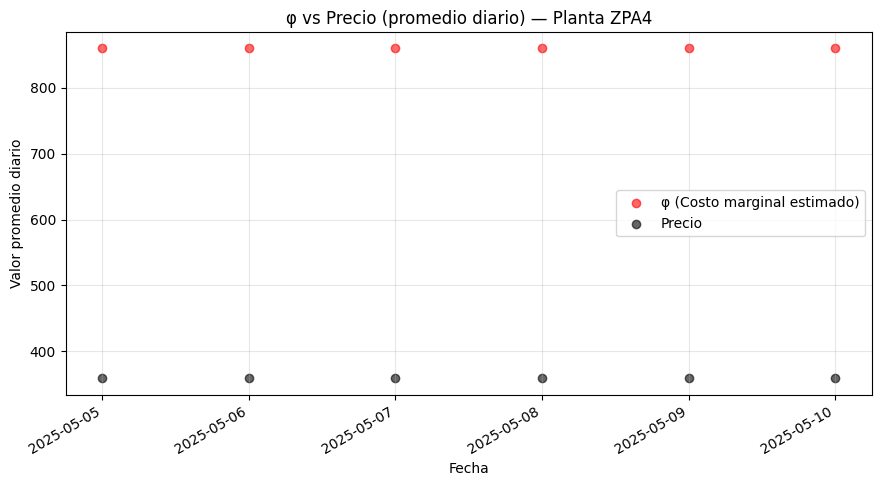

✅ Gráfico guardado: results\phi_precio_ZPA4_2025-05-05_to_2025-05-10_M1.png


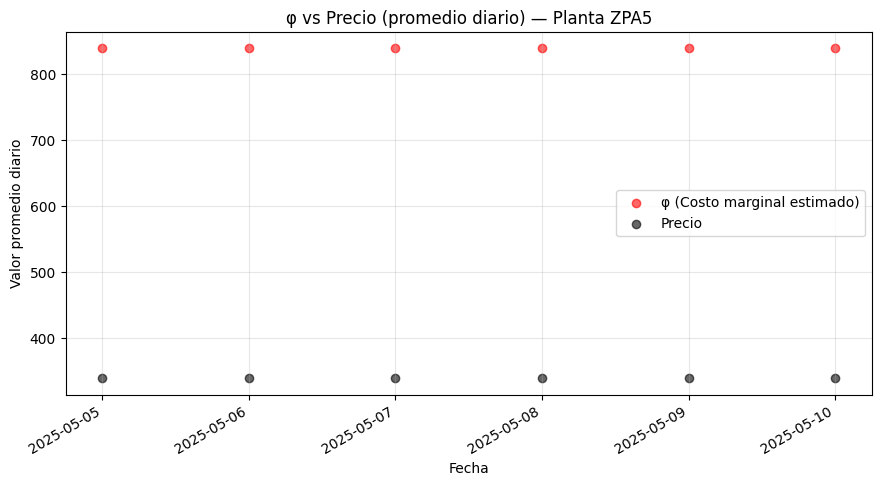

✅ Gráfico guardado: results\phi_precio_ZPA5_2025-05-05_to_2025-05-10_M1.png


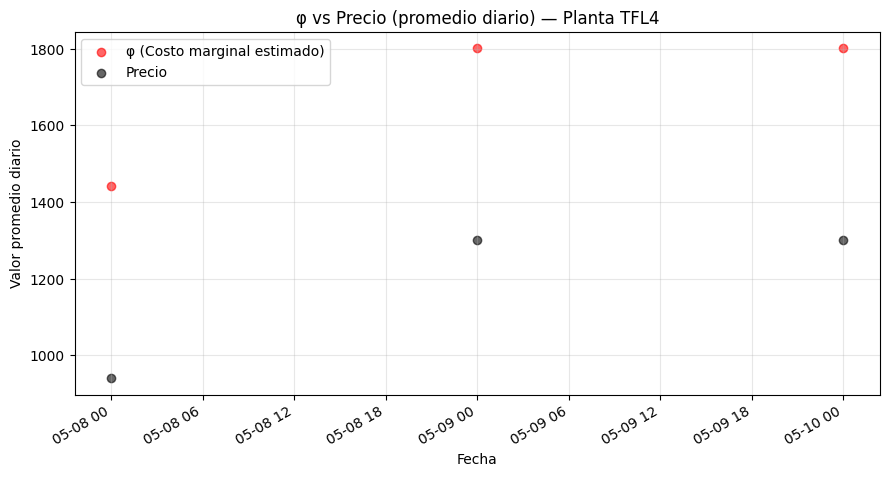

✅ Gráfico guardado: results\phi_precio_TFL4_2025-05-08_to_2025-05-10_M1.png


In [114]:
import os
import matplotlib.pyplot as plt
import pandas as pd

M=1
# --- Asegurar formatos ---
df_result2['phi'] = pd.to_numeric(df_result2['phi'], errors='coerce')
df_result2['precio_d'] = pd.to_numeric(df_result2['precio_d'], errors='coerce')


# --- Filtrar filas válidas ---
df_result2 = df_result2.dropna(subset=['Fecha', 'CodigoPlanta', 'phi', 'precio_d'])

# --- Iterar sobre cada planta ---
for planta in df_result2['CodigoPlanta'].unique():
    df_planta = (
        df_result2[df_result2['CodigoPlanta'] == planta]
        .groupby('Fecha', as_index=False)[['phi', 'precio_d']].mean()
        .sort_values('Fecha')
    )

    plt.figure(figsize=(9, 5))
    plt.scatter(df_planta['Fecha'], df_planta['phi'], color='red', label='φ (Costo marginal estimado)', alpha=0.6)
    plt.scatter(df_planta['Fecha'], df_planta['precio_d'], color='black', label='Precio', alpha=0.6)

    plt.xlabel("Fecha")
    plt.ylabel("Valor promedio diario")
    plt.title(f"φ vs Precio (promedio diario) — Planta {planta}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()

    # --- Guardar figura ---
    fecha_min = df_planta['Fecha'].min()
    fecha_max = df_planta['Fecha'].max()
    filename = f"phi_precio_{planta}_{fecha_min}_to_{fecha_max}_M{M}.png"
    filepath = os.path.join(sub_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.show()

    print(f"✅ Gráfico guardado: {filepath}")




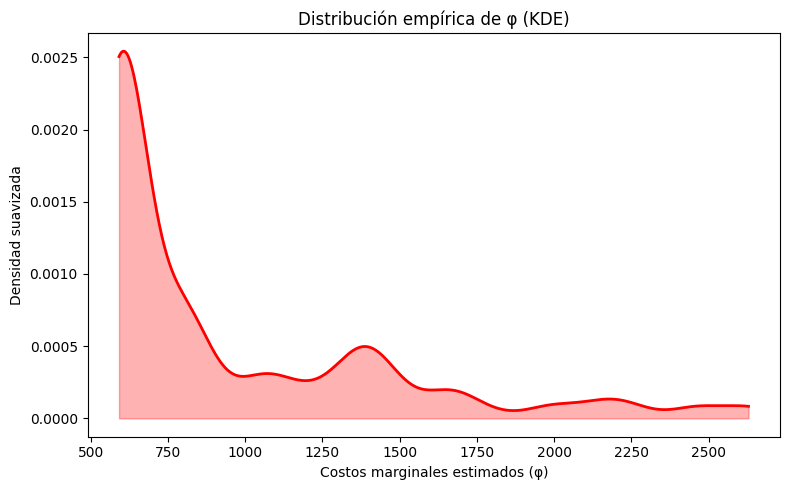

In [188]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

phi = pd.to_numeric(df_result2['phi'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(phi)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Costos marginales estimados (φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de φ (KDE)")
plt.tight_layout()
plt.show()




In [171]:
df_result2['phi'].describe()

count    9449.000000
mean      951.309056
std       508.627593
min       591.300000
25%       602.640000
50%       610.860000
75%      1210.300000
max      2629.060000
Name: phi, dtype: float64